In [1]:
import seaborn as sns  
import matplotlib.pyplot as plt  
import pandas as pd 
from tqdm import tqdm  
import os 
import statsmodels.api as sm  
from scipy import stats
import numpy as np
from scipy.stats import mannwhitneyu,ttest_ind

gut=[
'麦胶蛋白抗体'
,'组织转麸胺酶抗体'
,'分泌型免疫球蛋白'
,'钙卫蛋白'
,'解连蛋白'
,'葡萄糖醛酸酶'
,'胰弹性蛋白酶']

gut_english = ['Anti-gliadin slgA', 'Anti-htTG slgA', 
       'slgA', 'Calprotectin', 'Zonulin', 
       'Beta-Glucuronidase', 'Pancreatic Elastase']
 
organic_acid=['尿肌酐-1073'
,'46. 阿拉伯糖醇'
,'45. 酒石酸'
,'44. 柠苹酸'
,'43. 丙三羧酸'
,'42. 二羟基苯丙酸'
,'41. 吲哚乙酸'
,'40. 4-羟基苯乙酸'
,'39. 4-羟基苯甲酸'
,'38. 苯丙酸'
,'37. 苯乙酸'
,'36. 马尿酸'
,'35. 苯甲酸'
,'34. 乳清酸'
,'33. 焦谷氨酸'
,'32. α-羟丁酸'
,'31. 葡萄糖二酸'
,'30. 苯基乙醛酸'
,'29. 杏仁酸'
,'28. 2-甲基马尿酸'
,'1. 己二酸'
,'2. 辛二酸'
,'3. 乙基丙二酸'
,'4. 丙酮酸'
,'5. 乳酸'
,'6. β-羟基丁酸'
,'7. 柠檬酸'
,'8. 顺式乌头酸'
,'9. 异柠檬酸'
,'10. α-酮戊二酸'
,'11. 琥珀酸'
,'12. 富马酸'
,'13. 苹果酸'
,'14. 羟甲基戊二酸'
,'15. α-酮异戊酸'
,'16. α-酮异己酸'
,'17. α-酮-β-甲基戊酸'
,'18. 黄尿酸'
,'19. β-羟基异戊酸'
,'20. 甲基丙二酸'
,'22. 高香草酸'
,'23. 香草基扁桃酸'
,'24. 5-羟吲哚乙酸'
,'25. 犬尿喹啉酸'
,'26. 吡啶甲酸'
,'27. 喹啉酸'
,'21. 亚胺甲基谷氨酸'
]

organic_acid_english = ['Urinary creatinine', 'Arabitol', 'Tartaric acid', 'Citric acid',
                 'Tricarboxylic acid', 'Dihydroxyphenylacetic acid', 'Indole-3-acetic acid',
                 '4-Hydroxyphenylacetic acid', '4-Hydroxybenzoic acid', 'Phenylpropanoic acid',
                 'Phenylacetic acid', 'Hippuric acid', 'Benzoic acid', 'Lactic acid',
                 'Fumaric acid', 'α-Hydroxybutyric acid', 'Glucaric acid',
                 'Phenylacetaldehyde acid', 'Mandelic acid', '2-Methylhippuric acid',
                 'Hexanedioic acid', 'Octanedioic acid', 'Ethylmalonic acid',
                 'Pyruvic acid', 'Lactic acid', 'β-Hydroxybutyric acid',
                 'Citric acid', 'Cis-aconitic acid', 'Isocitric acid',
                 'α-Ketoglutaric acid', 'Succinic acid', 'Fumaric acid',
                 'Malic acid', 'Hydroxymethyl glutaric acid',
                 'α-Ketoisovaleric acid', 'α-Ketoisocaproic acid',
                 'α-Keto-β-methylvaleric acid', 'Uric acid',
                 'β-Hydroxyisovaleric acid', 'Methylmalonic acid',
                 'Vanillic acid', 'Vanilloylmandelic acid',
                 '5-Hydroxyindole-3-acetic acid', 'Kynurenic acid',
                 'Pyridinecarboxylic acid', 'Quinolinic acid',
                 'Imidazole methyl glutamic acid']

cytokine=['干扰素α'
,'肿瘤坏死因子'
,'干扰素γ'
,'白介素12'
,'白介素1β'
,'白介素17'
,'白介素10'
,'白介素8'
,'白介素6'
,'白介素5'
,'白介素4'
,'白介素2'
]

cytokine_english = [
    'IFN-α', 'TNF', 'IFN-γ',
    'IL-12', 'IL-1β', 'IL-17',
    'IL-10', 'IL-8', 'IL-6',
    'IL-5', 'IL-4', 'IL-2'
]

oxidative=[
'8-羟基脱氧鸟苷'
,'丙二醛'
,'谷胱甘肽'
,'含硫化合物'
,'谷胱甘肽硫转移酶'
,'谷胱甘肽过氧化物酶'
,'超氧化物歧化酶'
,'花生四烯酸过氧化物'
,'硝化酪氨酸']


oxidative_english = [
    '8-OHdG', 
    'MDA', 
    't-GSH', 
    'f-Thiol', 
    'GSTs', 
    'GSHPx', 
    'SOD',  
    'F2-losPs', 
    'Nitrotyrosine'  
]

Hormone=[
'三氯沙'
,'双酚A'
,'单甲基酯'
,'单乙基酯'
,'单丁基酯'
,'单苄基酯'
,'单乙基己基酯'
,'甲酯'
,'乙酯'
,'丙酯'
,'丁酯'
,'壬基苯酯'
,'辛基苯酯'
,'丁基苯酯'
]

Hormone_english = ['Triclosan', 'Bisphenol A', 'Monomethyl ester', 'Monoethyl ester', 'Monobutyl ester', 'Monobenzyl ester', 
            'Monooctyl ester', 'Methyl ester', 'Ethyl ester', 'Propyl ester', 'Butyl ester', 
            'Nonylphenol ester', 'Octylphenol ester', 'Butylphenol ester']

foodallergy=['牛奶'
,'玉米'
,'虾'
,'鳕鱼'
,'猪肉'
,'羊肉'
,'鸡肉'
,'牛肉'
,'蛋黄'
,'蛋白'
,'羊奶'
,'芒果'
,'香蕉'
,'苹果'
,'番茄'
,'土豆'
,'韭菜'
,'芹菜'
,'花生'
,'大豆/毛豆'
,'小麦'
,'鳗鱼'
,'鱿鱼'
,'蛤'
,'蟹'
,'鲍鱼'
,'鸭肉'
,'酸奶'
,'巧达芝士'
,'菠萝'
,'薏仁'
,'燕麦'
,'米'
,'麸质'
,'荞麦'
,'金枪鱼'
,'鱼翅'
,'鲑鱼'
,'牡蛎'
,'海带'
,'生姜'
,'大蒜'
,'辣椒'
,'可可豆'
,'芝麻'
,'核桃'
,'杏仁'
,'葵花籽'
,'绿豆'
,'花豆'
,'包心菜'
,'绿花椰菜'
,'竹笋'
,'芦笋'
,'茶'
,'咖啡'
,'香草'
,'蜂蜜'
,'酵母'
,'胡椒'
,'菠菜'
,'青椒/彩椒'
,'豌豆'
,'洋葱'
,'莴苣'
,'青葱'
,'茄子'
,'小黄瓜'
,'白花椰菜'
,'胡萝卜'
,'龙眼/桂圆'
,'柠檬'
,'奇异果'
,'番石榴'
,'葡萄柚'
,'葡萄'
,'蘑菇'
,'芋头'
,'地瓜'
,'四季豆'
,'酪梨'
,'椰子'
,'西瓜'
,'草莓'
,'樱桃'
,'梨子'
,'桃子'
,'木瓜'
,'柑橘类'
,'橄榄'
,'免疫球蛋白E'
            ]

foodallergy_english= ['Milk', 'Corn', 'Shrimp', 'Cod', 'Pork', 'Lamb', 'Chicken', 'Beef', 'Egg yolk', 'Egg white', 
                'Sheep milk', 'Mango', 'Banana', 'Apple', 'Tomato', 'Potato', 'Garlic chives', 
                'Celery', 'Peanut', 'Soybean/Edamame', 'Wheat', 'Eel', 'Squid', 'Clam', 'Crab', 
                'Abalone', 'Duck', 'Yogurt', 'Cheddar cheese', 'Pineapple', 'Coixseed', 
                'Oats', 'Rice', 'Gluten', 'Buckwheat', 'Tuna', 'Shark fin', 'Salmon', 'Oyster', 
                'Kelp', 'Ginger', 'Garlic', 'Chili', 'Cocoa bean', 'Sesame', 'Walnut', 
                'Almond', 'Sunflower seed', 'Mung bean', 'Scarlet runner bean', 'Cabbage', 
                'Broccoli', 'Bamboo shoots', 'Asparagus', 'Tea', 'Coffee', 'Vanilla', 
                'Honey', 'Yeast', 'Pepper', 'Spinach', 'Bell pepper', 'Pea', 'Onion', 
                'Lettuce', 'Green onion', 'Eggplant', 'Cucumber', 'Cauliflower', 'Carrot', 
                'Longan', 'Lemon', 'Kiwi', 'Guava', 'Grapefruit', 'Grape', 'Mushroom', 
                'Taro', 'Sweet potato', 'Green bean', 'Avocado', 'Coconut', 'Watermelon', 
                'Strawberry', 'Cherry', 'Pear', 'Peach', 'Papaya', 'Citrus fruits', 
                'Olive', 'Immunoglobulin E']

VD=['维生素D'
,'维生素D3'
,'维生素D2']

VD_english=['Vitamin D', 'Vitamin D3', 'Vitamin D2']


eng_chi_dict=dict(zip(gut+organic_acid+cytokine+oxidative+foodallergy+VD+Hormone
,gut_english+organic_acid_english+cytokine_english+oxidative_english+foodallergy_english+VD_english+Hormone_english))

In [5]:
print(list(eng_chi_dict.items())[:5])

[('麦胶蛋白抗体', 'Anti-gliadin slgA'), ('组织转麸胺酶抗体', 'Anti-htTG slgA'), ('分泌型免疫球蛋白', 'slgA'), ('钙卫蛋白', 'Calprotectin'), ('解连蛋白', 'Zonulin')]


In [4]:
path='/home2/zhenglijing/data/su.csv'
dfsu=pd.read_csv(path,encoding='GBK')
dfsu

number       ID  Indicator indicator category        单位   结果数据  \
0     CM202304160097  ASD_B22   尿肌酐-1073      全套有机酸代谢分析(尿液)     mg/dl  118.9   
1     CM202304160097  ASD_B22  46. 阿拉伯糖醇      全套有机酸代谢分析(尿液)  μg/mg-cr  54.67   
2     CM202304160097  ASD_B22    45. 酒石酸      全套有机酸代谢分析(尿液)  μg/mg-cr   3.06   
3     CM202304160097  ASD_B22    44. 柠苹酸      全套有机酸代谢分析(尿液)  μg/mg-cr   3.07   
4     CM202304160097  ASD_B22   43. 丙三羧酸      全套有机酸代谢分析(尿液)  μg/mg-cr   2.43   
...              ...      ...        ...                ...       ...    ...   
7918  CM202304280052  ASD_076       解连蛋白       肠道功能健康评估（粪便）     ng/mL    254   
7919  CM202304280052  ASD_076       钙卫蛋白       肠道功能健康评估（粪便）     mg/kg    208   
7920  CM202304280052  ASD_076   分泌型免疫球蛋白       肠道功能健康评估（粪便）     μg/mL   2977   
7921  CM202304280052  ASD_076   组织转麸胺酶抗体       肠道功能健康评估（粪便）       U/L    629   
7922  CM202304280052  ASD_076     麦胶蛋白抗体       肠道功能健康评估（粪便）       U/L   87.6   

     结果说明  
0      正常  
1      正常  
2      偏高  
3      正常  
4      偏高  
...   ...  
7918   偏高  
7919   偏高  
7920   偏高  
7921   偏高  
7922   正常  

[7923 rows x 7 columns]

In [7]:
dfsu['eng'] = dfsu['Indicator'].map(eng_chi_dict)

In [8]:
dfsu.head()

number       ID  Indicator indicator category        单位   结果数据  \
0  CM202304160097  ASD_B22   尿肌酐-1073      全套有机酸代谢分析(尿液)     mg/dl  118.9   
1  CM202304160097  ASD_B22  46. 阿拉伯糖醇      全套有机酸代谢分析(尿液)  μg/mg-cr  54.67   
2  CM202304160097  ASD_B22    45. 酒石酸      全套有机酸代谢分析(尿液)  μg/mg-cr   3.06   
3  CM202304160097  ASD_B22    44. 柠苹酸      全套有机酸代谢分析(尿液)  μg/mg-cr   3.07   
4  CM202304160097  ASD_B22   43. 丙三羧酸      全套有机酸代谢分析(尿液)  μg/mg-cr   2.43   

  结果说明                 eng  
0   正常  Urinary creatinine  
1   正常            Arabitol  
2   偏高       Tartaric acid  
3   正常         Citric acid  
4   偏高  Tricarboxylic acid

In [11]:
dfsu = dfsu[~dfsu['Indicator'].str.contains('尿肌酐-1131', na=False)]

In [12]:
dfsu.to_csv('dfsueng.csv')

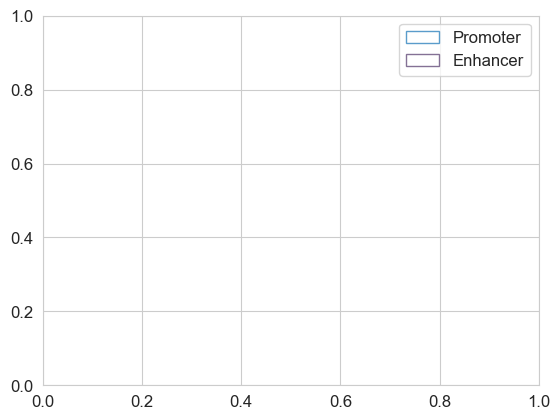

In [67]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots()

red_patch = mpatches.Patch(facecolor='white', edgecolor='#5a9ccb',label='Promoter')
blue_patch = mpatches.Patch(facecolor='white',edgecolor='#847195', label='Enhancer')

ax.legend(handles=[red_patch, blue_patch])

plt.show()

In [68]:
path='Allchip_ORmodif_vaf>0.1.csv'
dfresultR=pd.read_csv(path,index_col=0)
dfresultR = dfresultR.sort_values(by='OR',ascending=False)
dfresultR

OR       LCI         HCI  \
chr5-34191582-34191582-G-A-LOC646652       41.000000  5.639808  298.059776   
chr2-85570186-85570186-G-A-RETSAT          24.000000  3.246813  177.404723   
chrX-73811695-73811695-A-G-RLIM            23.000000  3.106124  170.308719   
chr5-34190915-34190915-C-G-LOC646652       21.000000  5.083524   86.750851   
chr5-122737709-122737709-C-T-CEP120        21.000000  5.083524   86.750851   
...                                              ...       ...         ...   
chr16-32077240-32077240-T-C-LOC102723753    1.789474  1.020737    3.137161   
chr16-32077240-32077240-T-C-ZNF267          1.789474  1.020737    3.137161   
chr1-148891790-148891790-T-A-NBPF25P        1.727273  1.021702    2.920100   
chr1-148891790-148891790-T-A-LOC101927429   1.727273  1.021702    2.920100   
chr1-145304787-145304787-G-T-NBPF25P        1.631579  1.089538    2.443283   

                                                                               index  \
chr5-34191582-34191582-G-A-LOC646652            chr5-34191582-34191582-G-A-LOC646652   
chr2-85570186-85570186-G-A-RETSAT                  chr2-85570186-85570186-G-A-RETSAT   
chrX-73811695-73811695-A-G-RLIM                      chrX-73811695-73811695-A-G-RLIM   
chr5-34190915-34190915-C-G-LOC646652            chr5-34190915-34190915-C-G-LOC646652   
chr5-122737709-122737709-C-T-CEP120              chr5-122737709-122737709-C-T-CEP120   
...                                                                              ...   
chr16-32077240-32077240-T-C-LOC102723753    chr16-32077240-32077240-T-C-LOC102723753   
chr16-32077240-32077240-T-C-ZNF267                chr16-32077240-32077240-T-C-ZNF267   
chr1-148891790-148891790-T-A-NBPF25P            chr1-148891790-148891790-T-A-NBPF25P   
chr1-148891790-148891790-T-A-LOC101927429  chr1-148891790-148891790-T-A-LOC101927429   
chr1-145304787-145304787-G-T-NBPF25P            chr1-145304787-145304787-G-T-NBPF25P   

                                               gene2_formatted  
chr5-34191582-34191582-G-A-LOC646652        chr5:g.34191582G>A  
chr2-85570186-85570186-G-A-RETSAT           chr2:g.85570186G>A  
chrX-73811695-73811695-A-G-RLIM             chrX:g.73811695A>G  
chr5-34190915-34190915-C-G-LOC646652        chr5:g.34190915C>G  
chr5-122737709-122737709-C-T-CEP120        chr5:g.122737709C>T  
...                                                        ...  
chr16-32077240-32077240-T-C-LOC102723753   chr16:g.32077240T>C  
chr16-32077240-32077240-T-C-ZNF267         chr16:g.32077240T>C  
chr1-148891790-148891790-T-A-NBPF25P       chr1:g.148891790T>A  
chr1-148891790-148891790-T-A-LOC101927429  chr1:g.148891790T>A  
chr1-145304787-145304787-G-T-NBPF25P       chr1:g.145304787G>T  

[286 rows x 5 columns]

In [69]:
dfresultR = dfresultR.reset_index().rename(columns={"index": "geneloci"})

In [70]:
dfresultR

level_0         OR       LCI  \
0         chr5-34191582-34191582-G-A-LOC646652  41.000000  5.639808   
1            chr2-85570186-85570186-G-A-RETSAT  24.000000  3.246813   
2              chrX-73811695-73811695-A-G-RLIM  23.000000  3.106124   
3         chr5-34190915-34190915-C-G-LOC646652  21.000000  5.083524   
4          chr5-122737709-122737709-C-T-CEP120  21.000000  5.083524   
..                                         ...        ...       ...   
281   chr16-32077240-32077240-T-C-LOC102723753   1.789474  1.020737   
282         chr16-32077240-32077240-T-C-ZNF267   1.789474  1.020737   
283       chr1-148891790-148891790-T-A-NBPF25P   1.727273  1.021702   
284  chr1-148891790-148891790-T-A-LOC101927429   1.727273  1.021702   
285       chr1-145304787-145304787-G-T-NBPF25P   1.631579  1.089538   

            HCI                                   geneloci  \
0    298.059776       chr5-34191582-34191582-G-A-LOC646652   
1    177.404723          chr2-85570186-85570186-G-A-RETSAT   
2    170.308719            chrX-73811695-73811695-A-G-RLIM   
3     86.750851       chr5-34190915-34190915-C-G-LOC646652   
4     86.750851        chr5-122737709-122737709-C-T-CEP120   
..          ...                                        ...   
281    3.137161   chr16-32077240-32077240-T-C-LOC102723753   
282    3.137161         chr16-32077240-32077240-T-C-ZNF267   
283    2.920100       chr1-148891790-148891790-T-A-NBPF25P   
284    2.920100  chr1-148891790-148891790-T-A-LOC101927429   
285    2.443283       chr1-145304787-145304787-G-T-NBPF25P   

         gene2_formatted  
0     chr5:g.34191582G>A  
1     chr2:g.85570186G>A  
2     chrX:g.73811695A>G  
3     chr5:g.34190915C>G  
4    chr5:g.122737709C>T  
..                   ...  
281  chr16:g.32077240T>C  
282  chr16:g.32077240T>C  
283  chr1:g.148891790T>A  
284  chr1:g.148891790T>A  
285  chr1:g.145304787G>T  

[286 rows x 6 columns]

In [71]:
all_gene_set = set(dfresultR['geneloci'])

In [72]:
combine_snp = {}
for entry in all_gene_set:
    parts = entry.split('-')
    chrom = parts[0]  # chr1
    pos = parts[1]    ref = parts[3]    alt = parts[4]    new_entry = f"{chrom}:g.{pos}{ref}>{alt}"

In [73]:
csv_path='/home2/zhenglijing/work/annovar/data.csv'  
df_alldata = pd.read_csv(csv_path,encoding="GB2312")  
df_alldata

检测项目           检测套餐 性别      病历号  年龄   结果数据 结果说明
0      尿肌酐-1073  全套有机酸代谢分析(尿液)  女  ASD_B22   5  118.9   正常
1     46. 阿拉伯糖醇  全套有机酸代谢分析(尿液)  女  ASD_B22   5  54.67   正常
2       45. 酒石酸  全套有机酸代谢分析(尿液)  女  ASD_B22   5   3.06   偏高
3       44. 柠苹酸  全套有机酸代谢分析(尿液)  女  ASD_B22   5   3.07   正常
4      43. 丙三羧酸  全套有机酸代谢分析(尿液)  女  ASD_B22   5   2.43   偏高
...         ...            ... ..      ...  ..    ...  ...
7918       解连蛋白   肠道功能健康评估（粪便）  男  ASD_076   7    254   偏高
7919       钙卫蛋白   肠道功能健康评估（粪便）  男  ASD_076   7    208   偏高
7920   分泌型免疫球蛋白   肠道功能健康评估（粪便）  男  ASD_076   7   2977   偏高
7921   组织转麸胺酶抗体   肠道功能健康评估（粪便）  男  ASD_076   7    629   偏高
7922     麦胶蛋白抗体   肠道功能健康评估（粪便）  男  ASD_076   7   87.6   正常

[7923 rows x 7 columns]

In [74]:
alldata_pivot=df_alldata[['检测项目','病历号','结果数据']].pivot_table(index='病历号', columns='检测项目', values='结果数据',aggfunc='sum')

alldata_pivot=alldata_pivot.replace('/','0').astype(float)

alldata_pivot=alldata_pivot.reset_index()

In [75]:
folder_path ='/home2/zhenglijing/work/annovar/deleAD/splitgene/'
df_ls=[]
for filename in os.listdir(folder_path):  
    if filename.endswith('.csv'):        file_path = os.path.join(folder_path, filename)  
        df=pd.read_csv(file_path)
        df_ls.append(df)
dfall=pd.concat(df_ls)

In [76]:
dfall['combine']=dfall['Chr'].astype(str)+'-'+dfall['Start'].astype(str)+'-'+dfall['End'].astype(str)+'-'+dfall['Ref'].astype(str)+'-'+dfall['Alt'].astype(str)+'-'+dfall['Gene.refGene'].astype(str)

In [77]:
dfall

Chr     Start       End Ref Alt  Func.refGene  Gene.refGene  \
0     chr1     14815     14815   C   T  ncRNA_exonic        WASH7P   
1     chr1    664468    664468   G   T  ncRNA_exonic  LOC100133331   
2     chr1  12907620  12907620   A   G        exonic      HNRNPCL1   
3     chr1  12907620  12907620   A   G        exonic      HNRNPCL3   
4     chr1  12907620  12907620   A   G        exonic      HNRNPCL4   
..     ...       ...       ...  ..  ..           ...           ...   
144  chr21  10959881  10959881   G   A      intronic          TPTE   
145  chr21  10971453  10971453   T   C      intronic          TPTE   
146  chr21  11114523  11114523   C   T    intergenic          BAGE   
147  chr21  11114523  11114523   C   T    intergenic          NONE   
148  chr21  14414872  14414872   C   T  ncRNA_exonic    ANKRD30BP2   

       GeneDetail.refGene ExonicFunc.refGene  \
0                       .                  .   
1                       .                  .   
2                       .     synonymous SNV   
3                       .     synonymous SNV   
4                       .     synonymous SNV   
..                    ...                ...   
144                     .                  .   
145                     .                  .   
146  dist=15586;dist=NONE                  .   
147  dist=15586;dist=NONE                  .   
148                     .                  .   

                                      AAChange.refGene  ... SAS.sites.2015_08  \
0                                                    .  ...                 .   
1                                                    .  ...                 .   
2    HNRNPCL3:NM_001146181:exon1:c.T523C:p.L175L,HN...  ...                 .   
3    HNRNPCL3:NM_001146181:exon1:c.T523C:p.L175L,HN...  ...                 .   
4    HNRNPCL3:NM_001146181:exon1:c.T523C:p.L175L,HN...  ...                 .   
..                                                 ...  ...               ...   
144                                                  .  ...                 .   
145                                                  .  ...                 .   
146                                                  .  ...                 .   
147                                                  .  ...                 .   
148                                                  .  ...                 .   

    EUR.sites.2015_08 EAS.sites.2015_08       p_value       vaf    typeA age  \
0                   .                 0  5.653146e-08  0.095238  ASD_B26   5   
1                   .                 0  9.105206e-04  0.160000  ASD_B26   5   
2                   .                 0  1.378210e-63  0.024194  ASD_B26   5   
3                   .                 0  1.378210e-63  0.024194  ASD_B26   5   
4                   .                 0  1.378210e-63  0.024194  ASD_B26   5   
..                ...               ...           ...       ...      ...  ..   
144                 .                 0  1.776109e-13  0.229050   TD_078   5   
145                 .                 0  4.327785e-07  0.254717   TD_078   5   
146                 .                 0  1.168419e-04  0.171429   TD_078   5   
147                 .                 0  1.168419e-04  0.171429   TD_078   5   
148                 .                 0  8.594672e-16  0.253846   TD_078   5   

             number type                                 combine  
0    CM202304250141  ASD             chr1-14815-14815-C-T-WASH7P  
1    CM202304250141  ASD     chr1-664468-664468-G-T-LOC100133331  
2    CM202304250141  ASD     chr1-12907620-12907620-A-G-HNRNPCL1  
3    CM202304250141  ASD     chr1-12907620-12907620-A-G-HNRNPCL3  
4    CM202304250141  ASD     chr1-12907620-12907620-A-G-HNRNPCL4  
..              ...  ...                                     ...  
144  CM202304270035   TD        chr21-10959881-10959881-G-A-TPTE  
145  CM202304270035   TD        chr21-10971453-10971453-T-C-TPTE  
146  CM202304270035   TD        chr21-11114523-11114

In [78]:
for i in tqdm(all_gene_set):
    mutls=list(dfall[dfall['combine']==i]['typeA'])
    alldata_pivot[i]='nonmutant'
    alldata_pivot.loc[ alldata_pivot[alldata_pivot['病历号'].isin(mutls)].index  , i] ='mut'

100%|██████████| 286/286 [00:00<00:00, 407.10it/s]


In [79]:
alldata_pivot['type'] = alldata_pivot['病历号'].apply(lambda x: 'ASD' if 'ASD' in x else ('TD' if 'TD' in x else '其他'))

alldata_pivot

检测项目      病历号  1. 己二酸  10. α-酮戊二酸  11. 琥珀酸  12. 富马酸  13. 苹果酸  14. 羟甲基戊二酸  \
0     ASD_051    1.87       33.93     6.95     0.37     0.63       10.62   
1     ASD_052    2.77       20.57     7.80     0.41     0.99        9.85   
2     ASD_053    2.38        7.64     7.58     0.22     0.36        9.21   
3     ASD_054    1.35        7.81     5.75     0.39     0.27        6.66   
4     ASD_055    2.57       16.94    12.35     0.47     0.54       10.66   
..        ...     ...         ...      ...      ...      ...         ...   
64     TD_085    1.04       20.93     3.58     0.55     0.76        3.82   
65     TD_086    1.42        7.87     1.79     0.26     0.51        4.25   
66     TD_087    4.54       21.94    13.79     0.58     0.92       10.99   
67     TD_088    1.13       16.98    15.91     0.71     0.86        5.86   
68     TD_089    0.56       12.58     4.28     0.42     0.51        5.28   

检测项目  15. α-酮异戊酸  16. α-酮异己酸  17. α-酮-β-甲基戊酸  ...  \
0           0.47        0.24            0.68  ...   
1           0.45        0.34            0.49  ...   
2           0.32        0.22            0.44  ...   
3           0.32        0.19            0.55  ...   
4           0.35        0.24            0.66  ...   
..           ...         ...             ...  ...   
64          0.48        0.21            0.98  ...   
65          0.31        0.28            0.93  ...   
66          0.75        0.31            1.15  ...   
67          0.45        0.24            0.98  ...   
68          0.28        0.18            0.51  ...   

检测项目  chr14-19117129-19117129-A---OR11H12  \
0                               nonmutant   
1                               nonmutant   
2                               nonmutant   
3                               nonmutant   
4                                     mut   
..                                    ...   
64                              nonmutant   
65                              nonmutant   
66                              nonmutant   
67                              nonmutant   
68                              nonmutant   

检测项目  chr15-23293713-23293713-C-T-HERC2P2  chr1-16973606-16973606-G-T-MST1P2  \
0                               nonmutant                                mut   
1                                     mut                                mut   
2                               nonmutant                                mut   
3                               nonmutant                                mut   
4                               nonmutant                                mut   
..                                    ...                                ...   
64                              nonmutant                                mut   
65                              nonmutant                                mut   
66                              nonmutant                                mut   
67                              nonmutant                                mut   
68                                    mut                                mut   

检测项目  chr1-148891790-148891790-T-A-NBPF25P  chr5-21492197-21492197-A-G-GUSBP1  \
0                                nonmutant                          nonmutant   
1                                      mut                          nonmutant   
2                                nonmutant                          nonmutant   
3                                nonmutant                          nonmutant   
4                                nonmutant                          nonmutant   
..                                     ...                                ...   
64                               nonmutant                          nonmutant   
65                               nonmutant                          nonmutant   
66                               nonmutant                          nonmutant   
67                                     mut                          nonmutant   
68                               nonmutant               

In [80]:
alldata_pivot.to_csv('alldata_pivot_indicator_gene.csv')

In [81]:
alldata_pivot=pd.read_csv('alldata_pivot_indicator_gene.csv')

In [82]:
alldata_pivot

Unnamed: 0      病历号  1. 己二酸  10. α-酮戊二酸  11. 琥珀酸  12. 富马酸  13. 苹果酸  \
0            0  ASD_051    1.87       33.93     6.95     0.37     0.63   
1            1  ASD_052    2.77       20.57     7.80     0.41     0.99   
2            2  ASD_053    2.38        7.64     7.58     0.22     0.36   
3            3  ASD_054    1.35        7.81     5.75     0.39     0.27   
4            4  ASD_055    2.57       16.94    12.35     0.47     0.54   
..         ...      ...     ...         ...      ...      ...      ...   
64          64   TD_085    1.04       20.93     3.58     0.55     0.76   
65          65   TD_086    1.42        7.87     1.79     0.26     0.51   
66          66   TD_087    4.54       21.94    13.79     0.58     0.92   
67          67   TD_088    1.13       16.98    15.91     0.71     0.86   
68          68   TD_089    0.56       12.58     4.28     0.42     0.51   

    14. 羟甲基戊二酸  15. α-酮异戊酸  16. α-酮异己酸  ...  \
0        10.62        0.47        0.24  ...   
1         9.85        0.45        0.34  ...   
2         9.21        0.32        0.22  ...   
3         6.66        0.32        0.19  ...   
4        10.66        0.35        0.24  ...   
..         ...         ...         ...  ...   
64        3.82        0.48        0.21  ...   
65        4.25        0.31        0.28  ...   
66       10.99        0.75        0.31  ...   
67        5.86        0.45        0.24  ...   
68        5.28        0.28        0.18  ...   

    chr14-19117129-19117129-A---OR11H12  chr15-23293713-23293713-C-T-HERC2P2  \
0                             nonmutant                            nonmutant   
1                             nonmutant                                  mut   
2                             nonmutant                            nonmutant   
3                             nonmutant                            nonmutant   
4                                   mut                            nonmutant   
..                                  ...                                  ...   
64                            nonmutant                            nonmutant   
65                            nonmutant                            nonmutant   
66                            nonmutant                            nonmutant   
67                            nonmutant                            nonmutant   
68                            nonmutant                                  mut   

    chr1-16973606-16973606-G-T-MST1P2  chr1-148891790-148891790-T-A-NBPF25P  \
0                                 mut                             nonmutant   
1                                 mut                                   mut   
2                                 mut                             nonmutant   
3                                 mut                             nonmutant   
4                                 mut                             nonmutant   
..                                ...                                   ...   
64                                mut                             nonmutant   
65                                mut                             nonmutant   
66                                mut                             nonmutant   
67                                mut                                   mut   
68                                mut                             nonmutant   

    chr5-21492197-21492197-A-G-GUSBP1  chr1-1645050-1645050-C-T-CDK11B  \
0                           nonmutant                        nonmutant   
1                           nonmutant                        nonmutant   
2                           nonmutant                              mut   
3                           nonmutant                        nonmutant   
4                           nonmutant                        nonmutant   
..                                ...                              ...   
64                          nonmutant                        nonmutant   
65                          nonmutant           

In [112]:
alldata_pivot

Unnamed: 0      病历号  1. 己二酸  10. α-酮戊二酸  11. 琥珀酸  12. 富马酸  13. 苹果酸  \
0            0  ASD_051    1.87       33.93     6.95     0.37     0.63   
1            1  ASD_052    2.77       20.57     7.80     0.41     0.99   
2            2  ASD_053    2.38        7.64     7.58     0.22     0.36   
3            3  ASD_054    1.35        7.81     5.75     0.39     0.27   
4            4  ASD_055    2.57       16.94    12.35     0.47     0.54   
..         ...      ...     ...         ...      ...      ...      ...   
64          64   TD_085    1.04       20.93     3.58     0.55     0.76   
65          65   TD_086    1.42        7.87     1.79     0.26     0.51   
66          66   TD_087    4.54       21.94    13.79     0.58     0.92   
67          67   TD_088    1.13       16.98    15.91     0.71     0.86   
68          68   TD_089    0.56       12.58     4.28     0.42     0.51   

    14. 羟甲基戊二酸  15. α-酮异戊酸  16. α-酮异己酸  ...  \
0        10.62        0.47        0.24  ...   
1         9.85        0.45        0.34  ...   
2         9.21        0.32        0.22  ...   
3         6.66        0.32        0.19  ...   
4        10.66        0.35        0.24  ...   
..         ...         ...         ...  ...   
64        3.82        0.48        0.21  ...   
65        4.25        0.31        0.28  ...   
66       10.99        0.75        0.31  ...   
67        5.86        0.45        0.24  ...   
68        5.28        0.28        0.18  ...   

    chr14-19117129-19117129-A---OR11H12  chr15-23293713-23293713-C-T-HERC2P2  \
0                             nonmutant                            nonmutant   
1                             nonmutant                                  mut   
2                             nonmutant                            nonmutant   
3                             nonmutant                            nonmutant   
4                                   mut                            nonmutant   
..                                  ...                                  ...   
64                            nonmutant                            nonmutant   
65                            nonmutant                            nonmutant   
66                            nonmutant                            nonmutant   
67                            nonmutant                            nonmutant   
68                            nonmutant                                  mut   

    chr1-16973606-16973606-G-T-MST1P2  chr1-148891790-148891790-T-A-NBPF25P  \
0                                 mut                             nonmutant   
1                                 mut                                   mut   
2                                 mut                             nonmutant   
3                                 mut                             nonmutant   
4                                 mut                             nonmutant   
..                                ...                                   ...   
64                                mut                             nonmutant   
65                                mut                             nonmutant   
66                                mut                             nonmutant   
67                                mut                                   mut   
68                                mut                             nonmutant   

    chr5-21492197-21492197-A-G-GUSBP1  chr1-1645050-1645050-C-T-CDK11B  \
0                           nonmutant                        nonmutant   
1                           nonmutant                        nonmutant   
2                           nonmutant                              mut   
3                           nonmutant                        nonmutant   
4                           nonmutant                        nonmutant   
..                                ...                              ...   
64                          nonmutant                        nonmutant   
65                          nonmutant           

In [118]:
alldata_pivot.iloc[:,188:474]

chr15-22344739-22344739-T-C-LINC02203 chr2-85570186-85570186-G-A-RETSAT  \
0                                    mut                         nonmutant   
1                              nonmutant                         nonmutant   
2                              nonmutant                         nonmutant   
3                              nonmutant                               mut   
4                                    mut                         nonmutant   
..                                   ...                               ...   
64                             nonmutant                         nonmutant   
65                             nonmutant                         nonmutant   
66                             nonmutant                         nonmutant   
67                                   mut                         nonmutant   
68                                   mut                         nonmutant   

   chr1-17030716-17030716-G-A-ESPNP chr7-72081604-72081604-G-T-TYW1B  \
0                         nonmutant                        nonmutant   
1                         nonmutant                        nonmutant   
2                         nonmutant                        nonmutant   
3                               mut                        nonmutant   
4                         nonmutant                        nonmutant   
..                              ...                              ...   
64                        nonmutant                        nonmutant   
65                        nonmutant                        nonmutant   
66                        nonmutant                        nonmutant   
67                        nonmutant                        nonmutant   
68                        nonmutant                        nonmutant   

   chr1-16976223-16976223-C-T-MST1P2 chr2-91766609-91766609-G-A-LOC107985911  \
0                          nonmutant                               nonmutant   
1                          nonmutant                               nonmutant   
2                          nonmutant                               nonmutant   
3                          nonmutant                               nonmutant   
4                          nonmutant                               nonmutant   
..                               ...                                     ...   
64                         nonmutant                               nonmutant   
65                         nonmutant                               nonmutant   
66                         nonmutant                               nonmutant   
67                         nonmutant                               nonmutant   
68                         nonmutant                               nonmutant   

   chr16-33544403-33544403-A-G-LOC390705 chr7-5949865-5949865-C-G-CCZ1  \
0                              nonmutant                           mut   
1                              nonmutant                     nonmutant   
2                              nonmutant                     nonmutant   
3                              nonmutant                     nonmutant   
4                              nonmutant                     nonmutant   
..                                   ...                           ...   
64                                   mut                     nonmutant   
65                             nonmutant                     nonmutant   
66                             nonmutant                     nonmutant   
67                             nonmutant                     nonmutant   
68                             nonmutant                     nonmutant   

   chr5-34193865-34193865-A-G-LOC646652 chr1-16918717-16918717-C-T-NBPF1  ...  \
0                             nonmutant                        nonmutant  ...   
1                             nonmutant                        nonmutant  ...   
2                             nonmutant                        nonmutant  ...   
3                          

In [83]:
len(alldata_pivot[ Hormones + ['type']].dropna())

47

IndexError: index 10 is out of bounds for axis 0 with size 10

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  func(*args, **kwargs)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27695 (\N{CJK UNIFIED IDEOGRAPH-6C2F}) missing from current font.
  func(*args, **kwargs)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27801 (\N{CJK UNIFIED IDEOGRAPH-6C99}) missing from current font.
  func(*args, **kwargs)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21452 (\N{CJK UNIFIED IDEOGRAPH-53CC}) missing from current font.
  func(*args, **kwargs)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 37210 (\N{CJK UNIFIED IDEOGRAPH-915A}) missing from cur

<Figure size 1500x800 with 0 Axes>

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27695 (\N{CJK UNIFIED IDEOGRAPH-6C2F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27801 (\N{CJK UNIFIED IDEOGRAPH-6C99}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21452 (\N{CJK UNIFIED IDEOGRAPH-53CC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/IPython/c

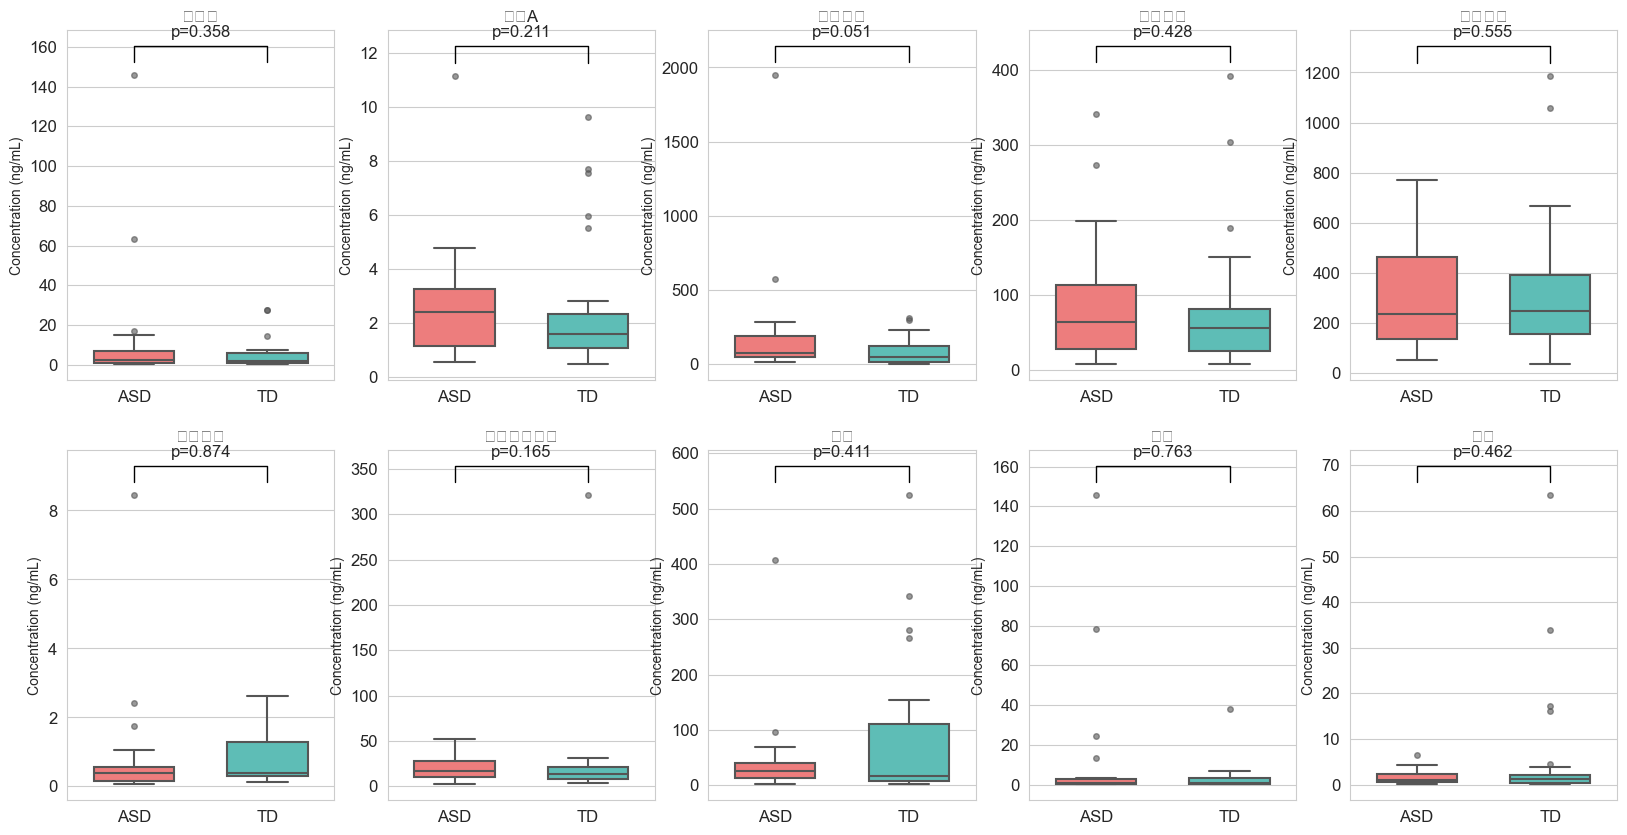

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Hormones = [
'三氯沙'
,'双酚A'
,'单甲基酯'
,'单乙基酯'
,'单丁基酯'
,'单苄基酯'
,'单乙基己基酯'
,'甲酯'
,'乙酯'
,'丙酯'
,'丁酯'
,'壬基苯酯'
,'辛基苯酯'
,'丁基苯酯'
]

plot_data = alldata_pivot[ Hormones + ['type']].dropna().melt(id_vars='type', var_name=' Hormone', value_name='Value')

plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
palette = {"ASD": "
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.ravel()
for i,  Hormone in enumerate( Hormones):
    sns.boxplot(
        data=plot_data[plot_data[' Hormone'] ==  Hormone],
        x='type',
        y='Value',
        ax=axes[i],
        palette=palette,
        linewidth=1.5,
        width=0.6,
        showfliers=True,
        flierprops=dict(marker='o', markersize=4, alpha=0.6)
    )
    
    axes[i].set_title( Hormone, fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Concentration (ng/mL)', fontsize=10)
    
    from scipy import stats
    asd_data = alldata_pivot[ Hormones + ['type']].dropna()[alldata_pivot[ Hormones + ['type']].dropna()['type']=='ASD'][ Hormone]
    td_data = alldata_pivot[ Hormones + ['type']].dropna()[alldata_pivot[ Hormones + ['type']].dropna()['type']=='TD'][ Hormone]
    _, p_value = stats.mannwhitneyu(asd_data, td_data,alternative="greater")    
    y_max = max(alldata_pivot[ Hormone]) * 1.1
    axes[i].plot([0, 0, 1, 1], [y_max*0.95, y_max, y_max, y_max*0.95], lw=1, c='k')
    axes[i].text(0.5, y_max*1.02, f'p={p_value:.3f}', ha='center', va='bottom')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Comparison of Endocrine Disruptors between ASD and TD Groups", y=1.02, fontsize=14)
plt.tight_layout()
plt.savefig('ASD_vs_TD_EDCs_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

## 检测基因突变与否两组队列指标是否有显著差异

In [85]:
'丁基苯酯',
 '丁酯',
 '三氯沙',
 '丙酯',
 '乙酯',
 '单丁基酯',
 '单乙基己基酯',
 '单乙基酯',
 '单甲基酯',
 '单苄基酯',
 '双酚A',
 '壬基苯酯',
 '甲酯',
 '辛基苯酯'

IndentationError: unexpected indent (2991286915.py, line 2)

In [86]:
horlist=set(horlist)

NameError: name 'horlist' is not defined

In [87]:
set(horlist+gutlist+immunelist+antilist+stresslist)

NameError: name 'horlist' is not defined

In [88]:
countesult=[]
for MDA_COL in horlist+gutlist+immunelist+antilist+stresslist:
    GENE_START_COL = 187    GENE_END_COL = 475
    gene_effect_results = {}

    for gene_col in merged_df.columns[GENE_START_COL:GENE_END_COL + 1]:
        mut_group = merged_df[merged_df[gene_col] == 'mut'][MDA_COL].dropna()
        nonmut_group = merged_df[merged_df[gene_col] == 'nonmutant'][MDA_COL].dropna()

        if len(mut_group) > 1 and len(nonmut_group) > 1:            ratio = np.mean(mut_group) / np.mean(nonmut_group)

            from scipy.stats import ttest_ind
            t_stat, p_value = mannwhitneyu(mut_group, nonmut_group,alternative='greater')

            gene_effect_results[gene_col] = {
                'mut_mean': np.mean(mut_group),
                'nonmut_mean': np.mean(nonmut_group),
                'ratio': ratio,
                'p_value': p_value,
                'mut_samples': len(mut_group),
                'nonmut_samples': len(nonmut_group)
            }

    results_merged_df = pd.DataFrame.from_dict(gene_effect_results, orient='index')

    significant_results = results_merged_df[(results_merged_df['p_value'] < 0.05) & (results_merged_df['ratio'] > 1)]

    significant_results = significant_results.sort_values('ratio', ascending=False)

    countesult.append([MDA_COL,len(significant_results),
                       significant_results['ratio'].min(),significant_results['ratio'].max(),
                      eng_chi_dict[MDA_COL]
                      ]
                     )

NameError: name 'horlist' is not defined

In [479]:
countesultdf=pd.DataFrame(countesult)

In [276]:
import pandas as pd
import numpy as np

MDA_COL = '花生四烯酸过氧化物'GENE_START_COL = 187GENE_END_COL = 475
gene_effect_results = {}

for gene_col in merged_df.columns[GENE_START_COL:GENE_END_COL + 1]:
    mut_group = merged_df[merged_df[gene_col] == 'mut'][MDA_COL].dropna()
    nonmut_group = merged_df[merged_df[gene_col] == 'nonmutant'][MDA_COL].dropna()
    
    if len(mut_group) > 1 and len(nonmut_group) > 1:        ratio = np.mean(mut_group) / np.mean(nonmut_group)
        
        from scipy.stats import ttest_ind
        t_stat, p_value = mannwhitneyu(mut_group, nonmut_group,alternative='greater')
        
        gene_effect_results[gene_col] = {
            'mut_mean': np.mean(mut_group),
            'nonmut_mean': np.mean(nonmut_group),
            'ratio': ratio,
            'p_value': p_value,
            'mut_samples': len(mut_group),
            'nonmut_samples': len(nonmut_group)
        }

results_merged_df = pd.DataFrame.from_dict(gene_effect_results, orient='index')

significant_results = results_merged_df[(results_merged_df['p_value'] < 0.05) & (results_merged_df['ratio'] > 1)]

significant_results = significant_results.sort_values('ratio', ascending=False)

print(f"共分析{len(gene_effect_results)}个基因，其中{len(significant_results)}个显示突变显著升高MDA水平")
print("影响最显著的前10个基因：")
print(significant_results.head(10))

共分析230个基因，其中5个显示突变显著升高MDA水平
影响最显著的前10个基因：
                                           mut_mean  nonmut_mean     ratio  \
chr1-16976032-16976032-A-C-MST1P2          4.605000     3.257463  1.413677   
chr17-36353452-36353452-C-T-NPEPPSP1       3.731389     2.822121  1.322193   
chr2-179527910-179527910-A-T-TTN           4.182000     3.227344  1.295802   
chr1-145021024-145021024-G-C-LOC100996724  3.956111     3.063725  1.291275   
chr16-70165793-70165793-G-C-PDPR           3.528400     3.164773  1.114898   

                                            p_value  mut_samples  \
chr1-16976032-16976032-A-C-MST1P2          0.039825            2   
chr17-36353452-36353452-C-T-NPEPPSP1       0.005626           36   
chr2-179527910-179527910-A-T-TTN           0.019695            5   
chr1-145021024-145021024-G-C-LOC100996724  0.030585           18   
chr16-70165793-70165793-G-C-PDPR           0.038651           25   

                                           nonmut_samples  
chr1-16976032-169760

In [277]:
import pandas as pd
import numpy as np

MDA_COL = '丙二醛'GENE_START_COL = 187GENE_END_COL = 475
gene_effect_results = {}

for gene_col in merged_df.columns[GENE_START_COL:GENE_END_COL + 1]:
    mut_group = merged_df[merged_df[gene_col] == 'mut'][MDA_COL].dropna()
    nonmut_group = merged_df[merged_df[gene_col] == 'nonmutant'][MDA_COL].dropna()
    
    if len(mut_group) > 1 and len(nonmut_group) > 1:        ratio = np.mean(mut_group) / np.mean(nonmut_group)
        
        from scipy.stats import ttest_ind
        t_stat, p_value = ttest_ind(mut_group, nonmut_group)
        
        gene_effect_results[gene_col] = {
            'mut_mean': np.mean(mut_group),
            'nonmut_mean': np.mean(nonmut_group),
            'ratio': ratio,
            'p_value': p_value,
            'mut_samples': len(mut_group),
            'nonmut_samples': len(nonmut_group)
        }

results_merged_df = pd.DataFrame.from_dict(gene_effect_results, orient='index')

significant_results = results_merged_df[(results_merged_df['p_value'] < 0.05) & (results_merged_df['ratio'] > 1)]

significant_results = significant_results.sort_values('ratio', ascending=False)

print(f"共分析{len(gene_effect_results)}个基因，其中{len(significant_results)}个显示突变显著升高MDA水平")
print("影响最显著的前10个基因：")
print(significant_results.head(10))

共分析230个基因，其中9个显示突变显著升高MDA水平
影响最显著的前10个基因：
                                        mut_mean  nonmut_mean     ratio  \
chr16-33544403-33544403-A-G-LOC390705   1.311333     0.815127  1.608747   
chr16-33544403-33544403-A-G-ENPP7P13    1.311333     0.815127  1.608747   
chr2-243037022-243037022-A-T-LINC01881  1.250250     0.834154  1.498824   
chr1-17185572-17185572-C-G-MIR3675      1.209286     0.818645  1.477179   
chr1-16973519-16973519-G-A-MST1P2       0.988000     0.689633  1.432645   
chr17-18400868-18400868-C-T-LGALS9C     1.184333     0.827222  1.431699   
chr17-18400868-18400868-C-T-USP32P2     1.184333     0.827222  1.431699   
chr2-112616040-112616040-T-C-ANAPC1     1.006393     0.757122  1.329235   
chr3-195447805-195447805-T-C-MUC20      1.027227     0.779191  1.318325   

                                         p_value  mut_samples  nonmut_samples  
chr16-33544403-33544403-A-G-LOC390705   0.003854            6              63  
chr16-33544403-33544403-A-G-ENPP7P13    0.00385

In [278]:
import pandas as pd
import numpy as np

MDA_COL = '硝化酪氨酸'GENE_START_COL = 187GENE_END_COL = 475
gene_effect_results = {}

for gene_col in merged_df.columns[GENE_START_COL:GENE_END_COL + 1]:
    mut_group = merged_df[merged_df[gene_col] == 'mut'][MDA_COL].dropna()
    nonmut_group = merged_df[merged_df[gene_col] == 'nonmutant'][MDA_COL].dropna()
    
    if len(mut_group) > 1 and len(nonmut_group) > 1:        ratio = np.mean(mut_group) / np.mean(nonmut_group)
        
        from scipy.stats import ttest_ind
        t_stat, p_value = ttest_ind(mut_group, nonmut_group)
        
        gene_effect_results[gene_col] = {
            'mut_mean': np.mean(mut_group),
            'nonmut_mean': np.mean(nonmut_group),
            'ratio': ratio,
            'p_value': p_value,
            'mut_samples': len(mut_group),
            'nonmut_samples': len(nonmut_group)
        }

results_merged_df = pd.DataFrame.from_dict(gene_effect_results, orient='index')

significant_results = results_merged_df[(results_merged_df['p_value'] < 0.05) & (results_merged_df['ratio'] > 1)]

significant_results = significant_results.sort_values('ratio', ascending=False)

print(f"共分析{len(gene_effect_results)}个基因，其中{len(significant_results)}个显示突变显著升高MDA水平")
print("影响最显著的前10个基因：")
print(significant_results.head(10))

共分析230个基因，其中13个显示突变显著升高MDA水平
影响最显著的前10个基因：
                                      mut_mean  nonmut_mean     ratio  \
chr2-107042620-107042620-C-T-RGPD3    0.470000     0.169104  2.779347   
chr2-88019376-88019376-C-T-LOC730268  0.377500     0.165538  2.280437   
chr9-66516728-66516728-G-A-LERFS      0.362500     0.166462  2.177680   
chr11-18290636-18290636-A-T-SAA1      0.310833     0.149825  2.074649   
chr12-55807588-55807588-C-T-OR6C65    0.320000     0.166719  1.919400   
chr12-55807588-55807588-C-T-OR6C76    0.320000     0.166719  1.919400   
chr1-16918255-16918255-A-C-NBPF1      0.205714     0.109500  1.878669   
chr15-20868230-20868230-T-C-GOLGA8CP  0.275556     0.163167  1.688798   
chr15-20868230-20868230-T-C-NBEAP1    0.275556     0.163167  1.688798   
chr7-143964381-143964381-T-C-CTAGE4   0.257692     0.159286  1.617799   

                                       p_value  mut_samples  nonmut_samples  
chr2-107042620-107042620-C-T-RGPD3    0.005218            2              67

## 指标水平与突变负荷是否呈正相关

In [89]:
results_merged_df

NameError: name 'results_merged_df' is not defined

In [874]:
merged_df=pd.read_csv('test_gene.csv',index_col=0) 

In [875]:
merged_df

病历号  1. 己二酸  10. α-酮戊二酸  11. 琥珀酸  12. 富马酸  13. 苹果酸  14. 羟甲基戊二酸  \
0   ASD_051    1.87       33.93     6.95     0.37     0.63       10.62   
1   ASD_052    2.77       20.57     7.80     0.41     0.99        9.85   
2   ASD_053    2.38        7.64     7.58     0.22     0.36        9.21   
3   ASD_054    1.35        7.81     5.75     0.39     0.27        6.66   
4   ASD_055    2.57       16.94    12.35     0.47     0.54       10.66   
..      ...     ...         ...      ...      ...      ...         ...   
64   TD_085    1.04       20.93     3.58     0.55     0.76        3.82   
65   TD_086    1.42        7.87     1.79     0.26     0.51        4.25   
66   TD_087    4.54       21.94    13.79     0.58     0.92       10.99   
67   TD_088    1.13       16.98    15.91     0.71     0.86        5.86   
68   TD_089    0.56       12.58     4.28     0.42     0.51        5.28   

    15. α-酮异戊酸  16. α-酮异己酸  17. α-酮-β-甲基戊酸  ...  \
0         0.47        0.24            0.68  ...   
1         0.45        0.34            0.49  ...   
2         0.32        0.22            0.44  ...   
3         0.32        0.19            0.55  ...   
4         0.35        0.24            0.66  ...   
..         ...         ...             ...  ...   
64        0.48        0.21            0.98  ...   
65        0.31        0.28            0.93  ...   
66        0.75        0.31            1.15  ...   
67        0.45        0.24            0.98  ...   
68        0.28        0.18            0.51  ...   

    chr14-19807178-19807178-C-T-LINC01297-DUXAP10-NBEAP6  \
0                                                 mut      
1                                                 mut      
2                                           nonmutant      
3                                           nonmutant      
4                                           nonmutant      
..                                                ...      
64                                          nonmutant      
65                                          nonmutant      
66                                          nonmutant      
67                                          nonmutant      
68                                          nonmutant      

    chr12-31247819-31247819-A-G-DDX11  \
0                           nonmutant   
1                           nonmutant   
2                           nonmutant   
3                           nonmutant   
4                           nonmutant   
..                                ...   
64                          nonmutant   
65                          nonmutant   
66                                mut   
67                          nonmutant   
68                          nonmutant   

    chr5-99715833-99715833-T-A-LOC100133050  \
0                                 nonmutant   
1                                 nonmutant   
2                                 nonmutant   
3                                 nonmutant   
4                                 nonmutant   
..                                      ...   
64                                nonmutant   
65                                nonmutant   
66                                nonmutant   
67                                nonmutant   
68                                nonmutant   

    chr6-58779097-58779097-A-G-LINC00680-GUSBP4  \
0                                     nonmutant   
1                                     nonmutant   
2                                           mut   
3                                     nonmutant   
4                                     nonmutant   
..                                          ...   
64                                    nonmutant   
65                                    nonmutant   
66                                    nonmutant   
67                                    nonmutant   
68                                    nonmutant   

    chr11-18290636-18290636-A-T-SAA1  chr7-72081604-72081604-G-T-TYW1B  \
0                          nonmutant    

In [193]:
new_df = merged_df.iloc[:, 0:188]

In [195]:
df = new_df.drop('Unnamed: 0', axis=1) 

In [197]:
df.to_csv('indicator.csv')

In [876]:
import pandas as pd
from scipy import stats

gene_sites = alldata_pivot.columns[187:475]indicators = alldata_pivot.columns[1:187]
df=merged_df
t_test_results = {}

for gene_site in gene_sites:
    mutant_data = df[df[gene_site] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = df[df[gene_site] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    gene_site_results = {}
    
    for indicator in indicators:
        mutant_indicator_data = mutant_data[indicator].dropna()
        nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        
        if len(mutant_indicator_data) > 1 and len(nonmutant_indicator_data) > 1:
            t_stat, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data)
            gene_site_results[indicator] = {'t_stat': t_stat, 'p_value': p_value}
        else:
            gene_site_results[indicator] = {'t_stat': None, 'p_value': None}
    
    t_test_results[gene_site] = gene_site_results

KeyError: 'typeA'

In [749]:
significant_results = {}

for gene_site, indicator_results in t_test_results.items():
    significant_indicators = {}
    
    for indicator, stats1 in indicator_results.items():
        if str(stats1['p_value']) !='None':
            if stats1['p_value'] < 0.05:
                significant_indicators[indicator] = stats1
    
    if significant_indicators:
        significant_results[gene_site] = significant_indicators

result_list = []
 
for gene_site, indicators in significant_results.items():
    for indicator, stats1 in indicators.items():
        result_list.append([gene_site, indicator, stats1['p_value']])
 
for item in result_list:
    print(item)

['chr16-21548095-21548095-G-A-SLC7A5P2', '36. 马尿酸', 0.018660262756973738]
['chr16-21548095-21548095-G-A-SLC7A5P2', '大豆/毛豆', 0.04043441938178781]
['chr16-21548095-21548095-G-A-SLC7A5P2', '核桃', 0.0040100250626566416]
['chr16-33380263-33380263-C-G-ENPP7P13', '40. 4-羟基苯乙酸', 0.03074350835209986]
['chr16-33380263-33380263-C-G-ENPP7P13', '丁酯', 0.013752455895183379]
['chr16-33380263-33380263-C-G-ENPP7P13', '单丁基酯', 0.04970092195062882]
['chr16-33380263-33380263-C-G-ENPP7P13', '含硫化合物', 0.015102395290099097]
['chr16-33380263-33380263-C-G-ENPP7P13', '小麦', 0.04300328710476692]
['chr16-33380263-33380263-C-G-ENPP7P13', '杏仁', 0.0286058340702531]
['chr16-33380263-33380263-C-G-ENPP7P13', '燕麦', 0.040100250626566414]
['chr16-33380263-33380263-C-G-ENPP7P13', '白介素2', 0.0484337502648047]
['chr16-33380263-33380263-C-G-ENPP7P13', '羊奶', 0.03512089073431707]
['chr16-33380263-33380263-C-G-ENPP7P13', '葡萄', 0.0286058340702531]
['chr16-33380263-33380263-C-G-ENPP7P13', '谷胱甘肽', 0.0219358851055783]
['chr16-33380263-333

In [22]:
significantdf=pd.DataFrame(result_list,columns=['geneloci','indicator','p_value'])

significantdf

NameError: name 'result_list' is not defined

In [738]:
significantdf=pd.DataFrame(result_list,columns=['geneloci','indicator','p_value'])

significantdf

geneloci    indicator   p_value
0     chr16-21548095-21548095-G-A-SLC7A5P2      36. 马尿酸  0.018660
1     chr16-21548095-21548095-G-A-SLC7A5P2        大豆/毛豆  0.040434
2     chr16-21548095-21548095-G-A-SLC7A5P2           核桃  0.004010
3     chr16-33380263-33380263-C-G-ENPP7P13  40. 4-羟基苯乙酸  0.030744
4     chr16-33380263-33380263-C-G-ENPP7P13           丁酯  0.013752
...                                    ...          ...       ...
1628    chr2-97712581-97712581-A-C-FAM178B    25. 犬尿喹啉酸  0.025030
1629    chr2-97712581-97712581-A-C-FAM178B       4. 丙酮酸  0.010303
1630    chr2-97712581-97712581-A-C-FAM178B     分泌型免疫球蛋白  0.045099
1631    chr2-97712581-97712581-A-C-FAM178B       葡萄糖醛酸酶  0.002966
1632    chr2-97712581-97712581-A-C-FAM178B       麦胶蛋白抗体  0.040007

[1633 rows x 3 columns]

In [699]:
significantdf_old.head()

geneloci    indicator   p_value
0  chr16-21548095-21548095-G-A-SLC7A5P2      36. 马尿酸  0.018660
1  chr16-21548095-21548095-G-A-SLC7A5P2        大豆/毛豆  0.040434
2  chr16-21548095-21548095-G-A-SLC7A5P2           核桃  0.004010
3  chr16-33380263-33380263-C-G-ENPP7P13  40. 4-羟基苯乙酸  0.025131
4  chr16-33380263-33380263-C-G-ENPP7P13           丁酯  0.013752

In [713]:
"""overlap_count=0
nonoverlap_count=0
for index in significantdf.index:
    loci=significantdf.loc[index,'geneloci']
    indicator=significantdf.loc[index,'indicator']
    valuep=significantdf.loc[index,'p_value']
    dfold=significantdf_old[(significantdf_old['geneloci']==loci)&(significantdf_old['indicator']==indicator)]
    if len(dfold)>0:
        valueold=dfold['p_value'].values[0]
        if round(valuep,4)==round(valueold,4):
            overlap_count+=1
        else:
            nonoverlap_count+=1
        
    else:
        nonoverlap_count+=1"""

In [23]:
significantdf=pd.read_csv("significant_gene_test_mannwhitneyu_p_ne")

In [24]:
def format_gene2(row):
    parts = row.split('-')    chrom = parts[0]    pos = parts[1]    ref = parts[3]    alt = parts[4]    return f"{chrom}:g.{pos}{ref}>{alt}"
significantdf['gene2_formatted'] = significantdf['geneloci'].apply(format_gene2)

significantdf

Unnamed: 0                              geneloci    indicator   p_value  \
0              0  chr16-21548095-21548095-G-A-SLC7A5P2      36. 马尿酸  0.018660   
1              1  chr16-21548095-21548095-G-A-SLC7A5P2        大豆/毛豆  0.040434   
2              2  chr16-21548095-21548095-G-A-SLC7A5P2           核桃  0.004010   
3              3  chr16-33380263-33380263-C-G-ENPP7P13  40. 4-羟基苯乙酸  0.030744   
4              4  chr16-33380263-33380263-C-G-ENPP7P13           丁酯  0.013752   
...          ...                                   ...          ...       ...   
1628        1628    chr2-97712581-97712581-A-C-FAM178B    25. 犬尿喹啉酸  0.025030   
1629        1629    chr2-97712581-97712581-A-C-FAM178B       4. 丙酮酸  0.010303   
1630        1630    chr2-97712581-97712581-A-C-FAM178B     分泌型免疫球蛋白  0.045099   
1631        1631    chr2-97712581-97712581-A-C-FAM178B       葡萄糖醛酸酶  0.002966   
1632        1632    chr2-97712581-97712581-A-C-FAM178B       麦胶蛋白抗体  0.040007   

          gene2_formatted  
0     chr16:g.21548095G>A  
1     chr16:g.21548095G>A  
2     chr16:g.21548095G>A  
3     chr16:g.33380263C>G  
4     chr16:g.33380263C>G  
...                   ...  
1628   chr2:g.97712581A>C  
1629   chr2:g.97712581A>C  
1630   chr2:g.97712581A>C  
1631   chr2:g.97712581A>C  
1632   chr2:g.97712581A>C  

[1633 rows x 5 columns]

In [25]:
loci_dict2=dict(zip(significantdf['geneloci'],significantdf['gene2_formatted']))

In [26]:
Hormonedf=significantdf[significantdf['indicator'].isin(Hormone)]

In [27]:
Hormonedf

Unnamed: 0                               geneloci indicator   p_value  \
4              4   chr16-33380263-33380263-C-G-ENPP7P13        丁酯  0.013752   
5              5   chr16-33380263-33380263-C-G-ENPP7P13      单丁基酯  0.049701   
14            14   chr16-33380263-33380263-C-G-ENPP7P13      辛基苯酯  0.002719   
16            16        chr6-58779121-58779121-C-T-NONE      单甲基酯  0.019857   
34            34  chr15-21937168-21937168-C-T-LOC646214      丁基苯酯  0.008686   
...          ...                                    ...       ...       ...   
1552        1552   chr5-34191582-34191582-G-A-LOC646652      单丁基酯  0.002467   
1553        1553   chr5-34191582-34191582-G-A-LOC646652      单苄基酯  0.004650   
1570        1570   chr15-22482721-22482721-T-C-MIR1268A      辛基苯酯  0.047222   
1591        1591    chr7-143964381-143964381-T-C-CTAGE8       双酚A  0.015504   
1615        1615   chr17-36361992-36361992-C-T-NPEPPSP1        乙酯  0.007453   

          gene2_formatted  
4     chr16:g.33380263C>G  
5     chr16:g.33380263C>G  
14    chr16:g.33380263C>G  
16     chr6:g.58779121C>T  
34    chr15:g.21937168C>T  
...                   ...  
1552   chr5:g.34191582G>A  
1553   chr5:g.34191582G>A  
1570  chr15:g.22482721T>C  
1591  chr7:g.143964381T>C  
1615  chr17:g.36361992C>T  

[137 rows x 5 columns]

In [28]:
loci_dict=dict(zip(significantdf['geneloci'],significantdf['gene2_formatted']))

In [29]:
Hormonedf['indicator'].value_counts()

单丁基酯      20
辛基苯酯      15
单乙基己基酯    13
单甲基酯      12
乙酯        12
单乙基酯      11
单苄基酯      10
甲酯         9
丁基苯酯       8
三氯沙        8
丙酯         8
丁酯         7
双酚A        4
Name: indicator, dtype: int64

In [30]:
Hormonedf[Hormonedf['indicator']=='三氯沙']['geneloci'].tolist()

['chr1-144994902-144994902-G-A-LOC100996724',
 'chr14-19117129-19117129-A---NONE',
 'chr14-19117129-19117129-A---OR11H12',
 'chr1-248247308-248247308-A-C-OR2L13',
 'chr7-5949865-5949865-C-G-CCZ1',
 'chr14-19807329-19807329-G-C-LNCRNA-ATB',
 'chr14-19807329-19807329-G-C-LINC01297-DUXAP10-NBEAP6',
 'chr1-16973519-16973519-G-A-MST1P2']

In [31]:
Hormonedf[Hormonedf['indicator']=='单丁基酯']['geneloci'].tolist()

['chr16-33380263-33380263-C-G-ENPP7P13',
 'chr17-62952732-62952732-C-A-LRRC37A3',
 'chr1-148891790-148891790-T-A-NBPF25P',
 'chr16-33380263-33380263-C-G-LOC390705',
 'chr12-55807588-55807588-C-T-OR6C76',
 'chr1-142799560-142799560-A-T-LOC102723769',
 'chr1-148891790-148891790-T-A-LOC101927429',
 'chr17-62952732-62952732-C-A-AMZ2P1',
 'chr1-248247308-248247308-A-C-OR2L13',
 'chr15-22345038-22345038-T-C-LINC02203',
 'chr1-143210303-143210303-T-G-RNVU1-1',
 'chr12-55807588-55807588-C-T-OR6C65',
 'chr1-1645050-1645050-C-T-CDK11A',
 'chr15-22345038-22345038-T-C-LOC101927079',
 'chr17-21201579-21201579-C-T-MAP2K3',
 'chr3-10091252-10091252-A-C-FANCD2',
 'chr1-1645050-1645050-C-T-CDK11B',
 'chr1-143210303-143210303-T-G-LOC102723769',
 'chr1-142799560-142799560-A-T-ANKRD20A12P',
 'chr5-34191582-34191582-G-A-LOC646652']

In [32]:
merged_df.head()

病历号  1. 己二酸  10. α-酮戊二酸  11. 琥珀酸  12. 富马酸  13. 苹果酸  14. 羟甲基戊二酸  \
0  ASD_051    1.87       33.93     6.95     0.37     0.63       10.62   
1  ASD_052    2.77       20.57     7.80     0.41     0.99        9.85   
2  ASD_053    2.38        7.64     7.58     0.22     0.36        9.21   
3  ASD_054    1.35        7.81     5.75     0.39     0.27        6.66   
4  ASD_055    2.57       16.94    12.35     0.47     0.54       10.66   

   15. α-酮异戊酸  16. α-酮异己酸  17. α-酮-β-甲基戊酸  ...  \
0        0.47        0.24            0.68  ...   
1        0.45        0.34            0.49  ...   
2        0.32        0.22            0.44  ...   
3        0.32        0.19            0.55  ...   
4        0.35        0.24            0.66  ...   

   chr14-19807178-19807178-C-T-LINC01297-DUXAP10-NBEAP6  \
0                                                mut      
1                                                mut      
2                                          nonmutant      
3                                          nonmutant      
4                                          nonmutant      

   chr12-31247819-31247819-A-G-DDX11  chr5-99715833-99715833-T-A-LOC100133050  \
0                          nonmutant                                nonmutant   
1                          nonmutant                                nonmutant   
2                          nonmutant                                nonmutant   
3                          nonmutant                                nonmutant   
4                          nonmutant                                nonmutant   

   chr6-58779097-58779097-A-G-LINC00680-GUSBP4  \
0                                    nonmutant   
1                                    nonmutant   
2                                          mut   
3                                    nonmutant   
4                                    nonmutant   

   chr11-18290636-18290636-A-T-SAA1  chr7-72081604-72081604-G-T-TYW1B  \
0                         nonmutant                         nonmutant   
1                         nonmutant                         nonmutant   
2                         nonmutant                         nonmutant   
3                         nonmutant                         nonmutant   
4                         nonmutant                         nonmutant   

   chr2-112616040-112616040-T-C-ANAPC1  chr6-58779097-58779097-A-G-NONE  \
0                            nonmutant                        nonmutant   
1                            nonmutant                        nonmutant   
2                            nonmutant                              mut   
3                                  mut                        nonmutant   
4                                  mut                        nonmutant   

   chr1-121484945-121484945-T-C-NONE  type  
0                          nonmutant   ASD  
1                          nonmutant   ASD  
2                          nonmutant   ASD  
3                          nonmutant   ASD  
4                          nonmutant   ASD  

[5 rows x 475 columns]

In [33]:
dfg=significantdf[significantdf['indicator'].isin (gut)]
dfg['indicator'].value_counts()

解连蛋白        18
组织转麸胺酶抗体    13
麦胶蛋白抗体      13
葡萄糖醛酸酶      12
分泌型免疫球蛋白    11
胰弹性蛋白酶      10
钙卫蛋白         8
Name: indicator, dtype: int64

In [34]:
gut+organic_acid+cytokine+oxidative+foodallergy+VD+Hormone

['麦胶蛋白抗体',
 '组织转麸胺酶抗体',
 '分泌型免疫球蛋白',
 '钙卫蛋白',
 '解连蛋白',
 '葡萄糖醛酸酶',
 '胰弹性蛋白酶',
 '尿肌酐-1073',
 '46. 阿拉伯糖醇',
 '45. 酒石酸',
 '44. 柠苹酸',
 '43. 丙三羧酸',
 '42. 二羟基苯丙酸',
 '41. 吲哚乙酸',
 '40. 4-羟基苯乙酸',
 '39. 4-羟基苯甲酸',
 '38. 苯丙酸',
 '37. 苯乙酸',
 '36. 马尿酸',
 '35. 苯甲酸',
 '34. 乳清酸',
 '33. 焦谷氨酸',
 '32. α-羟丁酸',
 '31. 葡萄糖二酸',
 '30. 苯基乙醛酸',
 '29. 杏仁酸',
 '28. 2-甲基马尿酸',
 '1. 己二酸',
 '2. 辛二酸',
 '3. 乙基丙二酸',
 '4. 丙酮酸',
 '5. 乳酸',
 '6. β-羟基丁酸',
 '7. 柠檬酸',
 '8. 顺式乌头酸',
 '9. 异柠檬酸',
 '10. α-酮戊二酸',
 '11. 琥珀酸',
 '12. 富马酸',
 '13. 苹果酸',
 '14. 羟甲基戊二酸',
 '15. α-酮异戊酸',
 '16. α-酮异己酸',
 '17. α-酮-β-甲基戊酸',
 '18. 黄尿酸',
 '19. β-羟基异戊酸',
 '20. 甲基丙二酸',
 '22. 高香草酸',
 '23. 香草基扁桃酸',
 '24. 5-羟吲哚乙酸',
 '25. 犬尿喹啉酸',
 '26. 吡啶甲酸',
 '27. 喹啉酸',
 '21. 亚胺甲基谷氨酸',
 '干扰素α',
 '肿瘤坏死因子',
 '干扰素γ',
 '白介素12',
 '白介素1β',
 '白介素17',
 '白介素10',
 '白介素8',
 '白介素6',
 '白介素5',
 '白介素4',
 '白介素2',
 '8-羟基脱氧鸟苷',
 '丙二醛',
 '谷胱甘肽',
 '含硫化合物',
 '谷胱甘肽硫转移酶',
 '谷胱甘肽过氧化物酶',
 '超氧化物歧化酶',
 '花生四烯酸过氧化物',
 '硝化酪氨酸',
 '牛奶',
 '玉米',
 '虾',
 '鳕鱼',
 '猪肉',
 '羊肉',
 '鸡肉',
 '牛肉',
 '蛋黄',
 '蛋白',
 '羊奶',
 

In [35]:
dfj=pd.DataFrame(significantdf['indicator'].value_counts())

dfj['type']='other'
dfj.loc [ dfj.index.isin(gut)   ,   'type'  ] = 'gut'
dfj.loc [ dfj.index.isin(organic_acid)   ,   'type'  ] = 'organic_acid'
dfj.loc [ dfj.index.isin(cytokine)   ,   'type'  ] = 'cytokine'
dfj.loc [ dfj.index.isin(oxidative)   ,   'type'  ] = 'oxidative'
dfj.loc [ dfj.index.isin(foodallergy)   ,   'type'  ] = 'foodallergy'
dfj.loc [ dfj.index.isin(VD)   ,   'type'  ] = 'VD'
dfj.loc [ dfj.index.isin(Hormone)   ,   'type'  ] = 'Hormone'

<AxesSubplot:xlabel='type', ylabel='indicator'>

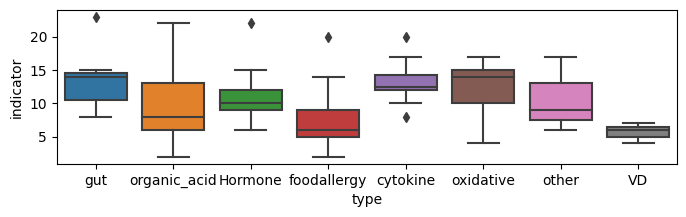

In [427]:
plt.figure(figsize=(8,2))
sns.boxplot(data=dfj,x='type',y='indicator')

In [ ]:
dfh=significantdf[significantdf['indicator'].isin (Hormone)]

In [402]:
dfh['indicator'].value_counts()

单丁基酯      22
乙酯        15
辛基苯酯      13
单甲基酯      12
单乙基己基酯    11
单苄基酯      10
丙酯        10
三氯沙        9
甲酯         9
单乙基酯       9
丁基苯酯       8
丁酯         6
双酚A        6
Name: indicator, dtype: int64

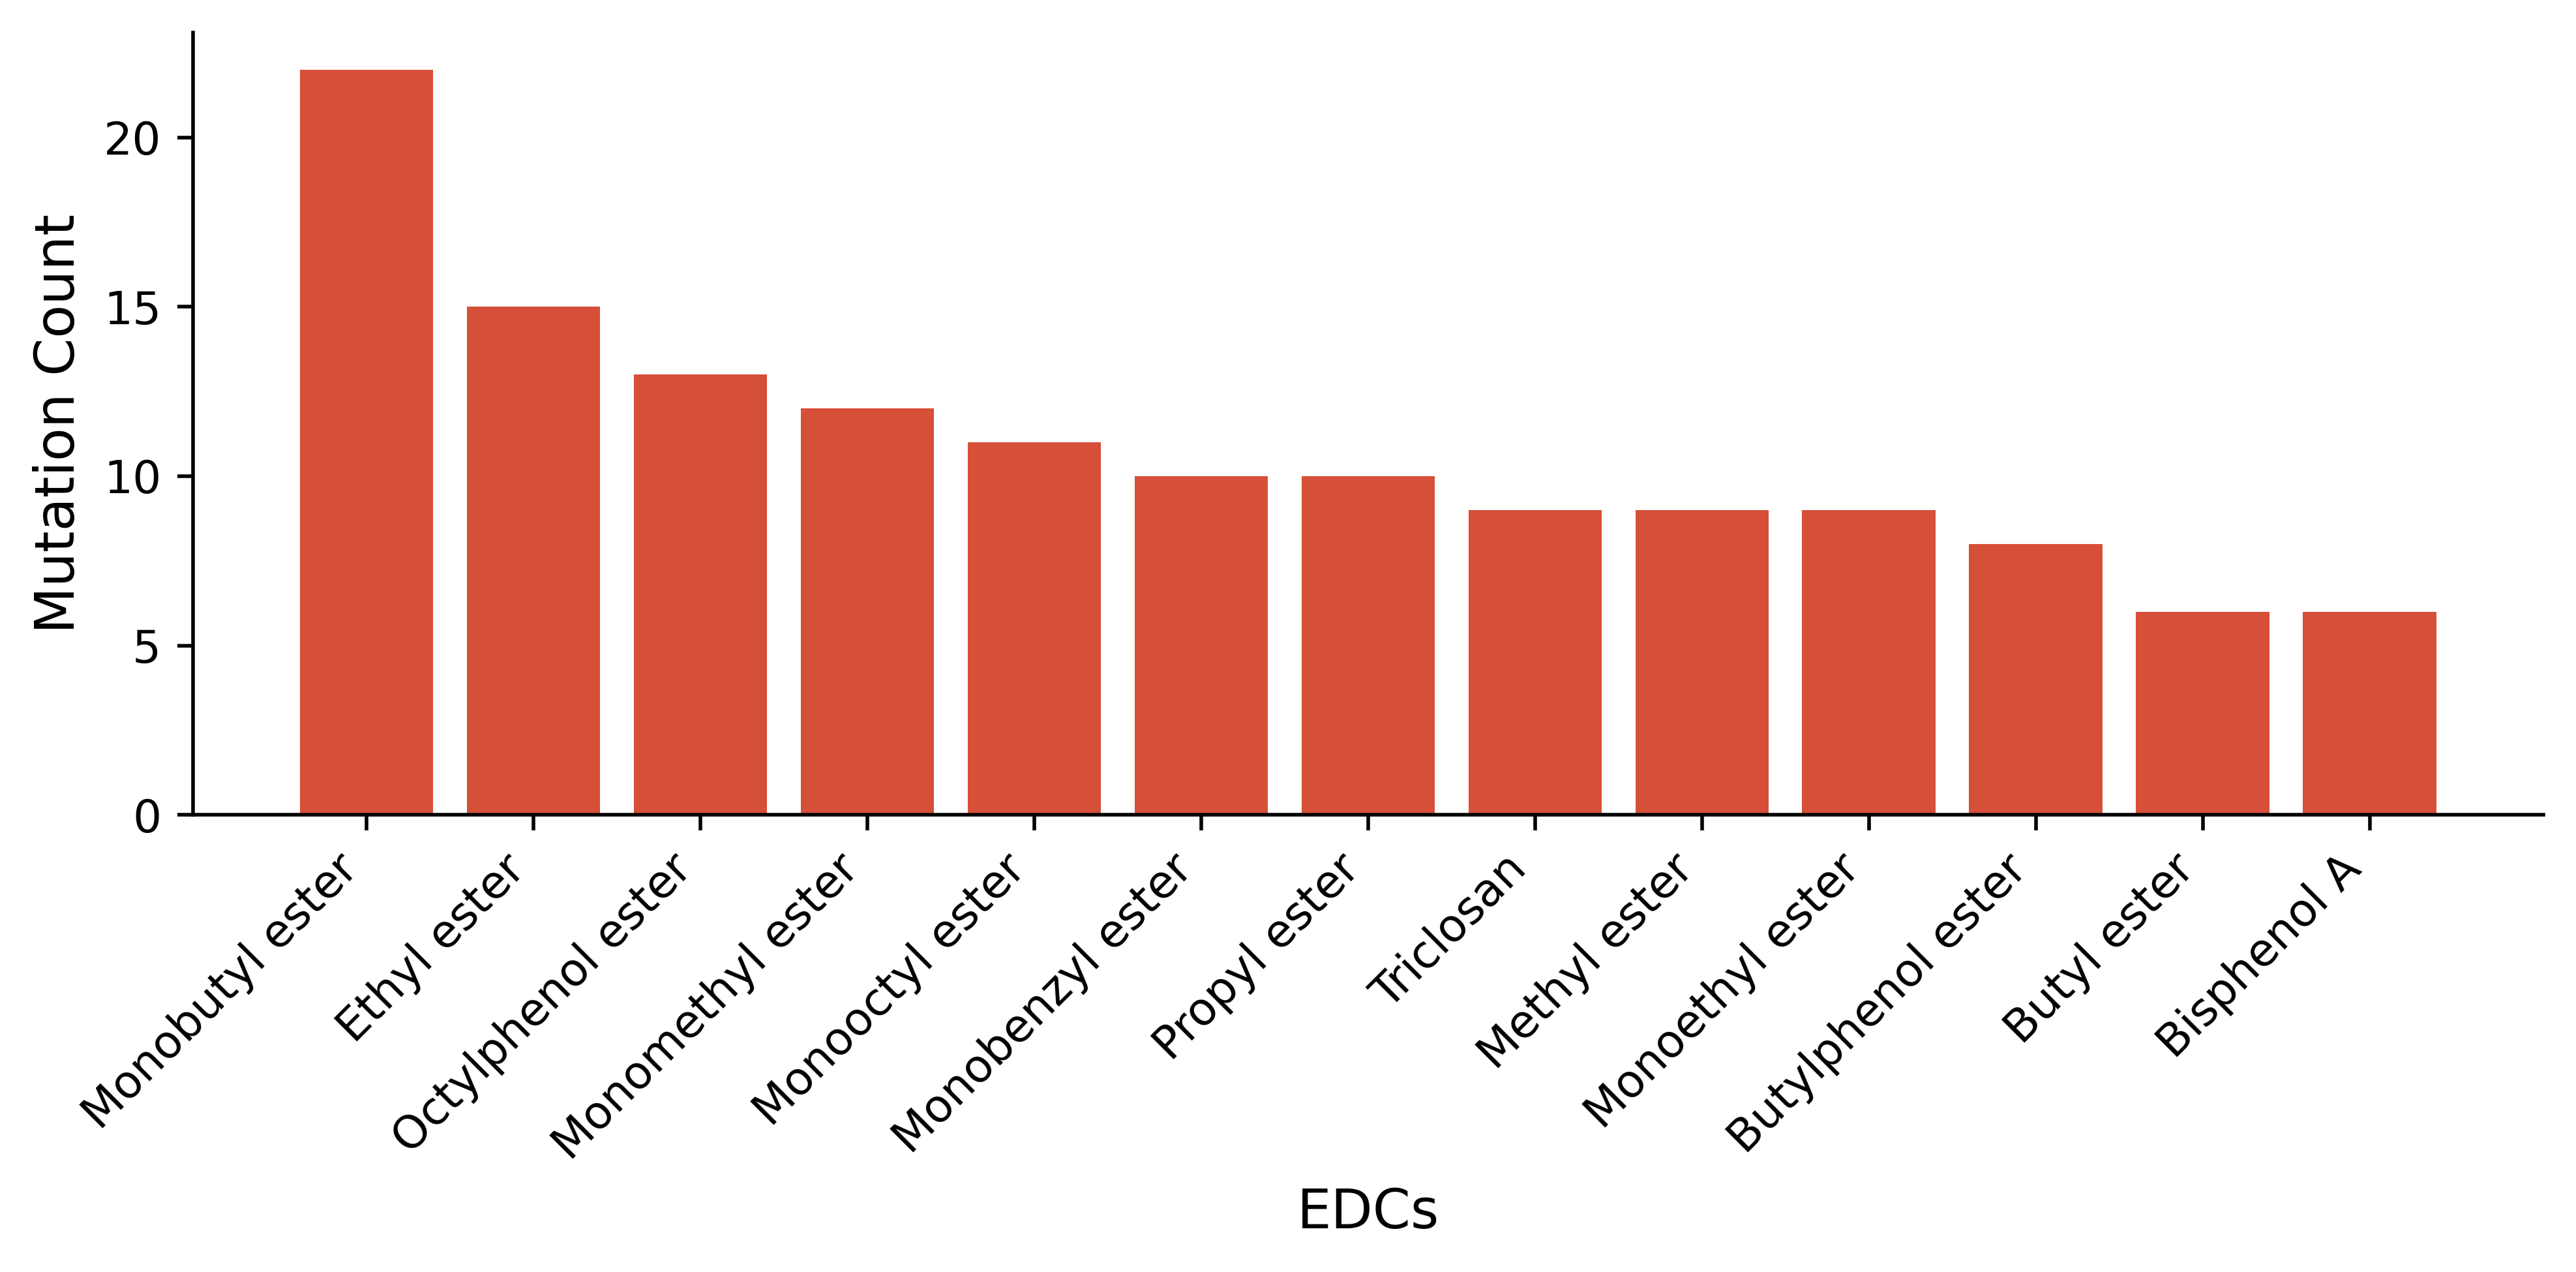

In [413]:
import matplotlib.pyplot as plt
eng_chi_dict=dict(zip(gut+organic_acid+cytokine+oxidative+foodallergy+VD+Hormone
,gut_english+organic_acid_english+cytokine_english+oxidative_english+foodallergy_english+VD_english+Hormone_english))
compounds = ['单丁基酯', '乙酯', '辛基苯酯', '单甲基酯', '单乙基己基酯', 
             '单苄基酯', '丙酯', '三氯沙', '甲酯', '单乙基酯', 
             '丁基苯酯', '丁酯', '双酚A']
counts = [22, 15, 13, 12, 11, 10, 10, 9, 9, 9, 8, 6, 6]

plt.figure(figsize=(8,4),dpi=500)
plt.bar(compounds, counts, color='#d64f38')

plt.title('', fontsize=14)
plt.xlabel('EDCs', fontsize=12)
plt.ylabel('Mutation Count', fontsize=12)

plt.xticks(range(0,13),[eng_chi_dict[i] for i in compounds],rotation=45, ha='right')
sns.despine()
plt.tight_layout()

plt.show()

## 环境内分泌干扰物和基因突变的关系

In [148]:
merged_df=alldata_pivot

In [151]:
alldata_pivot.columns[188:475]

Index(['chr15-22344739-22344739-T-C-LINC02203',
       'chr2-85570186-85570186-G-A-RETSAT', 'chr1-17030716-17030716-G-A-ESPNP',
       'chr7-72081604-72081604-G-T-TYW1B', 'chr1-16976223-16976223-C-T-MST1P2',
       'chr2-91766609-91766609-G-A-LOC107985911',
       'chr16-33544403-33544403-A-G-LOC390705',
       'chr7-5949865-5949865-C-G-CCZ1', 'chr5-34193865-34193865-A-G-LOC646652',
       'chr1-16918717-16918717-C-T-NBPF1',
       ...
       'chr14-19117129-19117129-A---OR11H12',
       'chr15-23293713-23293713-C-T-HERC2P2',
       'chr1-16973606-16973606-G-T-MST1P2',
       'chr1-148891790-148891790-T-A-NBPF25P',
       'chr5-21492197-21492197-A-G-GUSBP1', 'chr1-1645050-1645050-C-T-CDK11B',
       'chr15-32717010-32717010-G-A-ULK4P1',
       'chr5-99715833-99715833-T-A-LOC100133050',
       'chr1-148932713-148932713-C-T-NBPF25P', 'type'],
      dtype='object', length=287)

In [123]:
import pandas as pd
from scipy import stats

gene_sites = alldata_pivot.columns[188:474]indicators = Hormone
df=alldata_pivot
t_test_results = {}

for gene_site in gene_sites:
    mutant_data = df[df[gene_site] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = df[df[gene_site] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    gene_site_results = {}
    
    for indicator in indicators:
        mutant_indicator_data = mutant_data[indicator].dropna()
        nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        
        if len(mutant_indicator_data) > 1 and len(nonmutant_indicator_data) > 1:
            t_stat, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
            gene_site_results[indicator] = {'t_stat': t_stat, 'p_value': p_value}
        else:
            gene_site_results[indicator] = {'t_stat': None, 'p_value': None}
    
    t_test_results[gene_site] = gene_site_results

In [124]:
significant_results = {}

for gene_site, indicator_results in t_test_results.items():
    significant_indicators = {}
    
    for indicator, stats1 in indicator_results.items():
        if str(stats1['p_value']) !='None':
            if stats1['p_value'] < 0.05:
                significant_indicators[indicator] = stats1
    
    if significant_indicators:
        significant_results[gene_site] = significant_indicators

result_list = []
 
for gene_site, indicators in significant_results.items():
    for indicator, stats1 in indicators.items():
        result_list.append([gene_site, indicator, stats1['p_value']])
 


In [125]:
significantdf2=pd.DataFrame(result_list,columns=['geneloci','indicator','p_value'])

significantdf2

geneloci indicator   p_value
0      chr15-22344739-22344739-T-C-LINC02203      壬基苯酯  0.027867
1          chr2-85570186-85570186-G-A-RETSAT        甲酯  0.038853
2    chr2-91766609-91766609-G-A-LOC107985911       三氯沙  0.025680
3              chr7-5949865-5949865-C-G-CCZ1       三氯沙  0.008074
4              chr7-5949865-5949865-C-G-CCZ1      壬基苯酯  0.028983
..                                       ...       ...       ...
162      chr15-23293713-23293713-C-T-HERC2P2      壬基苯酯  0.038861
163        chr1-16973606-16973606-G-T-MST1P2    单乙基己基酯  0.009066
164     chr1-148891790-148891790-T-A-NBPF25P      单丁基酯  0.000689
165     chr1-148891790-148891790-T-A-NBPF25P      单苄基酯  0.049463
166       chr15-32717010-32717010-G-A-ULK4P1    单乙基己基酯  0.035415

[167 rows x 3 columns]

In [378]:
def format_gene2(row):
    parts = row.split('-')    chrom = parts[0]    pos = parts[1]    ref = parts[3]    alt = parts[4]    return f"{chrom}:g.{pos}{ref}>{alt}"
significantdf2['gene2_formatted'] = significantdf2['geneloci'].apply(format_gene2)

significantdf2

geneloci indicator   p_value  \
0         chr5-34182642-34182642-G-A-LOC646652      单甲基酯  0.042801   
1        chr15-22345490-22345490-A-G-LINC02203      辛基苯酯  0.032650   
2              chr1-1581713-1581713-A-G-CDK11B        丁酯  0.037365   
3              chr1-1581713-1581713-A-G-CDK11B      辛基苯酯  0.025469   
4          chr2-130988410-130988410-G-A-TUBA3E        甲酯  0.045532   
..                                         ...       ...       ...   
159  chr1-145021024-145021024-G-C-LOC100996724    单乙基己基酯  0.014875   
160  chr1-145021024-145021024-G-C-LOC100996724        甲酯  0.008789   
161  chr1-145021024-145021024-G-C-LOC100996724        丙酯  0.025002   
162      chr14-19476226-19476226-C-T-LINC02297      单甲基酯  0.010905   
163         chr2-131936113-131936113-G-C-POTEE      单甲基酯  0.031093   

         gene2_formatted  
0     chr5:g.34182642G>A  
1    chr15:g.22345490A>G  
2      chr1:g.1581713A>G  
3      chr1:g.1581713A>G  
4    chr2:g.130988410G>A  
..                   ...  
159  chr1:g.145021024G>C  
160  chr1:g.145021024G>C  
161  chr1:g.145021024G>C  
162  chr14:g.19476226C>T  
163  chr2:g.131936113G>C  

[164 rows x 4 columns]

In [130]:
significantdf2

Unnamed: 0                                   geneloci indicator  \
0             0       chr5-34182642-34182642-G-A-LOC646652      单甲基酯   
1             1      chr15-22345490-22345490-A-G-LINC02203      辛基苯酯   
2             2            chr1-1581713-1581713-A-G-CDK11B        丁酯   
3             3            chr1-1581713-1581713-A-G-CDK11B      辛基苯酯   
4             4        chr2-130988410-130988410-G-A-TUBA3E        甲酯   
..          ...                                        ...       ...   
159         159  chr1-145021024-145021024-G-C-LOC100996724    单乙基己基酯   
160         160  chr1-145021024-145021024-G-C-LOC100996724        甲酯   
161         161  chr1-145021024-145021024-G-C-LOC100996724        丙酯   
162         162      chr14-19476226-19476226-C-T-LINC02297      单甲基酯   
163         163         chr2-131936113-131936113-G-C-POTEE      单甲基酯   

      p_value      gene2_formatted  
0    0.042801   chr5:g.34182642G>A  
1    0.032650  chr15:g.22345490A>G  
2    0.037365    chr1:g.1581713A>G  
3    0.025469    chr1:g.1581713A>G  
4    0.045532  chr2:g.130988410G>A  
..        ...                  ...  
159  0.014875  chr1:g.145021024G>C  
160  0.008789  chr1:g.145021024G>C  
161  0.025002  chr1:g.145021024G>C  
162  0.010905  chr14:g.19476226C>T  
163  0.031093  chr2:g.131936113G>C  

[164 rows x 5 columns]

In [131]:
horlist=significantdf2['indicator'].tolist()

In [132]:
horlist=list(set(horlist))

In [133]:
horlist

['丁基苯酯',
 '单乙基酯',
 '丙酯',
 '单苄基酯',
 '双酚A',
 '单丁基酯',
 '单甲基酯',
 '乙酯',
 '辛基苯酯',
 '三氯沙',
 '甲酯',
 '壬基苯酯',
 '丁酯',
 '单乙基己基酯']

In [134]:
for i in horset:
    print(eng_chi_dict[i])

NameError: name 'horset' is not defined

In [135]:
eng_chi_dict=dict(zip(gut+organic_acid+cytokine+oxidative+foodallergy+VD+Hormone
,gut_english+organic_acid_english+cytokine_english+oxidative_english+foodallergy_english+VD_english+Hormone_english))

In [136]:
len(significantdf2['geneloci'].drop_duplicates())

107

In [137]:
significantdf2['indicator'].drop_duplicates()

0       单甲基酯
1       辛基苯酯
2         丁酯
4         甲酯
5         乙酯
7       壬基苯酯
8       单乙基酯
9         丙酯
10      单苄基酯
13      单丁基酯
29      丁基苯酯
32       三氯沙
45    单乙基己基酯
51       双酚A
Name: indicator, dtype: object

In [129]:
significantdf2=pd.read_csv('significant_gene_test_mannwhitneyu_p_hormone.csv')

In [138]:
Hormonedf=significantdf2[significantdf2['indicator'].isin(Hormone)]

In [139]:
Hormonedf

Unnamed: 0                                   geneloci indicator  \
0             0       chr5-34182642-34182642-G-A-LOC646652      单甲基酯   
1             1      chr15-22345490-22345490-A-G-LINC02203      辛基苯酯   
2             2            chr1-1581713-1581713-A-G-CDK11B        丁酯   
3             3            chr1-1581713-1581713-A-G-CDK11B      辛基苯酯   
4             4        chr2-130988410-130988410-G-A-TUBA3E        甲酯   
..          ...                                        ...       ...   
159         159  chr1-145021024-145021024-G-C-LOC100996724    单乙基己基酯   
160         160  chr1-145021024-145021024-G-C-LOC100996724        甲酯   
161         161  chr1-145021024-145021024-G-C-LOC100996724        丙酯   
162         162      chr14-19476226-19476226-C-T-LINC02297      单甲基酯   
163         163         chr2-131936113-131936113-G-C-POTEE      单甲基酯   

      p_value      gene2_formatted  
0    0.042801   chr5:g.34182642G>A  
1    0.032650  chr15:g.22345490A>G  
2    0.037365    chr1:g.1581713A>G  
3    0.025469    chr1:g.1581713A>G  
4    0.045532  chr2:g.130988410G>A  
..        ...                  ...  
159  0.014875  chr1:g.145021024G>C  
160  0.008789  chr1:g.145021024G>C  
161  0.025002  chr1:g.145021024G>C  
162  0.010905  chr14:g.19476226C>T  
163  0.031093  chr2:g.131936113G>C  

[164 rows x 5 columns]

In [140]:
loci_dict=dict(zip(significantdf2['geneloci'],significantdf2['gene2_formatted']))

In [141]:
significantdf2['indicator'].value_counts()

辛基苯酯      22
单甲基酯      16
壬基苯酯      14
三氯沙       14
单乙基己基酯    13
丁酯        11
单乙基酯      11
甲酯        10
单苄基酯      10
乙酯         9
丙酯         9
单丁基酯       9
丁基苯酯       9
双酚A        7
Name: indicator, dtype: int64

In [142]:
count1=pd.DataFrame(significantdf2['indicator'].value_counts())
count1['eng']=count1.index.map(eng_chi_dict)
count1

indicator                eng
辛基苯酯           22  Octylphenol ester
单甲基酯           16   Monomethyl ester
壬基苯酯           14  Nonylphenol ester
三氯沙            14          Triclosan
单乙基己基酯         13    Monooctyl ester
丁酯             11        Butyl ester
单乙基酯           11    Monoethyl ester
甲酯             10       Methyl ester
单苄基酯           10   Monobenzyl ester
乙酯              9        Ethyl ester
丙酯              9       Propyl ester
单丁基酯            9    Monobutyl ester
丁基苯酯            9  Butylphenol ester
双酚A             7        Bisphenol A

In [143]:
Hormonedf[Hormonedf['indicator']=='双酚A']['geneloci'].tolist()

['chr1-148582481-148582481-A-G-NBPF15',
 'chr6-58779097-58779097-A-G-NONE',
 'chr6-58779097-58779097-A-G-LINC00680-GUSBP4',
 'chr17-16624049-16624049-T-C-CCDC144A',
 'chr5-122737709-122737709-C-T-CEP120',
 'chr7-143964381-143964381-T-C-CTAGE8',
 'chr7-143964381-143964381-T-C-CTAGE4']

In [144]:
Hormonedf[Hormonedf['indicator']=='三氯沙']['geneloci'].tolist()

['chr2-91766609-91766609-G-A-NONE',
 'chr7-5949865-5949865-C-G-CCZ1',
 'chr5-34190915-34190915-C-G-LOC646652',
 'chr1-16918717-16918717-C-T-NBPF1',
 'chr1-16973519-16973519-G-A-MST1P2',
 'chr2-91766609-91766609-G-A-LOC107985911',
 'chr14-19117129-19117129-A---NONE',
 'chr1-16918734-16918734-G-C-NBPF1',
 'chr1-248247308-248247308-A-C-OR2L13',
 'chr1-144994902-144994902-G-A-LOC100996724',
 'chr2-131984320-131984320-C-T-POTEE',
 'chr17-15508447-15508447-C-A-CDRT1',
 'chr14-19117129-19117129-A---OR11H12',
 'chr1-17185572-17185572-C-G-MIR3675']

In [145]:
len(Hormonedf[Hormonedf['indicator']=='三氯沙']['geneloci'].tolist())

14

In [146]:
len(Hormonedf[Hormonedf['indicator']=='辛基苯酯']['geneloci'].tolist())

22

In [152]:
targetdf3=merged_df[[
 'chr14-19117129-19117129-A---OR11H12',
 'chr1-16918734-16918734-G-C-NBPF1',
 'chr1-248247308-248247308-A-C-OR2L13',
 'chr7-5949865-5949865-C-G-CCZ1',
 'chr2-131984320-131984320-C-T-POTEE',
 'chr17-15508447-15508447-C-A-CDRT1',
'三氯沙']]

In [153]:
targetdf2=merged_df[[
  'chr7-48886193-48886193-G-A-ABCA13',
 'chr1-1581713-1581713-A-G-CDK11B',
 'chr2-109278823-109278823-T-C-LIMS1',
 'chr4-122997459-122997459-G-A-TRPC3',
 'chr2-179527910-179527910-A-T-TTN',
 'chr4-122997459-122997459-G-A-KIAA1109',
'辛基苯酯']]

In [154]:
targetdf1=merged_df[[
 'chr9-66516728-66516728-G-A-LERFS',
 'chr2-131936113-131936113-G-C-POTEE',
 'chr14-19476226-19476226-C-T-POTEG',
'单甲基酯']]

In [155]:
listenviro=[
    "三氯沙",
    "双酚A",
    "单甲基酯",
    "单乙基酯",
    "单丁基酯",
    "单苄基酯",
    "单乙基己基酯",
    "甲酯",
    "乙酯",
    "丙酯",
    "丁酯",
    "壬基苯酯",
    "辛基苯酯",
    "丁基苯酯",
    "尿肌酐-1055"]\
+list(alldata_pivot.columns[187:475])

In [156]:
dictunit={"甲酯":'μg/g',"三氯沙": 'μg/g','胰弹性蛋白酶':'μg/g','麦胶蛋白抗体':'U/L','分泌型免疫球蛋白':'μg/ml','钙卫蛋白':'mg/kg','白介素2':'pg/ml','干扰素γ':'pg/ml', '白介素4':'pg/ml',
          '组织转麸胺酶抗体':'U/L',"丙二醛":'nmol/mL','解连蛋白': 'ng/mL','葡萄糖醛酸酶':'U/g','白介素17':'pg/ml','干扰素α':'pg/ml','白介素12':'pg/ml',
         "花生四烯酸过氧化物":'ug/g',"8-羟基脱氧鸟苷":'ug/g',"硝化酪氨酸":'ng/ml','白介素1β':'pg/ml','白介素6':'pg/ml','白介素5':'pg/ml','白介素8':'pg/ml',
          "乙酯": 'μg/g',"单苄基酯": 'μg/g',"单乙基酯": 'μg/g',"丙酯": 'μg/g','壬基苯酯':'μg/g',"辛基苯酯": 'μg/g', '丁基苯酯':'μg/g',"单乙基己基酯": 'μg/g',"双酚A": 'μg/g',"丁酯": 'μg/g',"超氧化物歧化酶":'U/mg-p',"谷胱甘肽过氧化物酶":'U/g-Hb',
         "谷胱甘肽硫转移酶":'U/g-Hb', "含硫化合物":'μg/mL',"谷胱甘肽":'μg/mL','单丁基酯':'μg/g','单甲基酯':'μg/g','肿瘤坏死因子':'pg/ml',}
dictlower={'胰弹性蛋白酶':200,'麦胶蛋白抗体':0,'分泌型免疫球蛋白':510,'组织转麸胺酶抗体':0,"丙二醛": 0, "花生四烯酸过氧化物":0, "硝化酪氨酸":0,"乙酯": 0,'单丁基酯':0,'单甲基酯':0,
          "超氧化物歧化酶":65 ,"谷胱甘肽过氧化物酶":41.2,"谷胱甘肽硫转移酶":4.38,'葡萄糖醛酸酶':337,'钙卫蛋白':0,
           "含硫化合物":238,"谷胱甘肽":18,"8-羟基脱氧鸟苷":0,"丁酯": 0,"双酚A": 0,'单乙基己基酯': 0,'解连蛋白': 15,'白介素1β':0,}
dicthigh={'胰弹性蛋白酶':-100,'麦胶蛋白抗体':100,'分泌型免疫球蛋白':2040,'组织转麸胺酶抗体':100,"单甲基酯": 34,
        "单乙基酯": 42,"单丁基酯": 26,"单苄基酯": 0.5,"单乙基己基酯": 10,"甲酯": 240,'辛基苯酯':0.4,'壬基苯酯':3,
        '丁基苯酯':6,'葡萄糖醛酸酶':4433, '钙卫蛋白':100,'白介素1β':12.2,'白介素6':20.1,'白介素17':20.7,'白介素5':3.5,'白介素12':3.3,'白介素8':21.5,
        "乙酯": 16,'白介素2': 11.5,'白介素4':13.0,'干扰素α':8,
        "丙酯": 16,'肿瘤坏死因子': 5.6,
        "丁酯": 1.6,"壬基苯酚": 3,
        "辛基苯酚": 0.4,'干扰素γ': 17.4,
        "丁基苯酚": 6,
        "双酚A": 6,
        "三氯沙": 16,
        "丙二醛": 1.31,
         "花生四烯酸过氧化物":3.35,
         "8-羟基脱氧鸟苷":5.6,
         "硝化酪氨酸":10,
         "超氧化物歧化酶":109,
         "谷胱甘肽过氧化物酶":74.2,
         "谷胱甘肽硫转移酶":9.84, "含硫化合物":391,'解连蛋白': 107,
         "谷胱甘肽":329}

In [158]:
for i in listA:
    if i[1] not in dictlower.keys():
        dictlower[  i[1]  ] = 0

NameError: name 'listA' is not defined

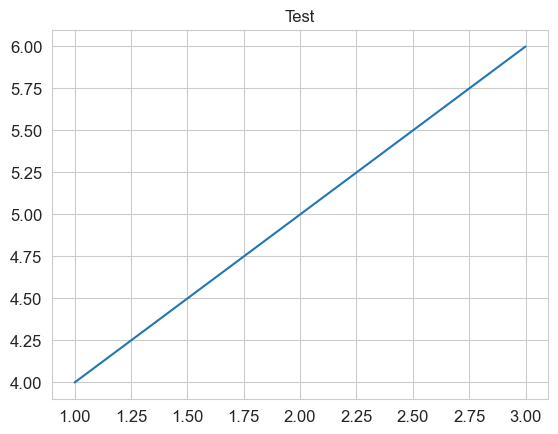

In [159]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams["font.family"] = "Arial"

font = FontProperties(family='Arial', size=12, weight='normal')

plt.plot([1, 2, 3], [4, 5, 6])
plt.title('Test', fontproperties=font)plt.show()

In [160]:
eng_chi_dict=dict(zip(gut+organic_acid+cytokine+oxidative+foodallergy+VD+Hormone
,gut_english+organic_acid_english+cytokine_english+oxidative_english+foodallergy_english+VD_english+Hormone_english))

In [161]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42

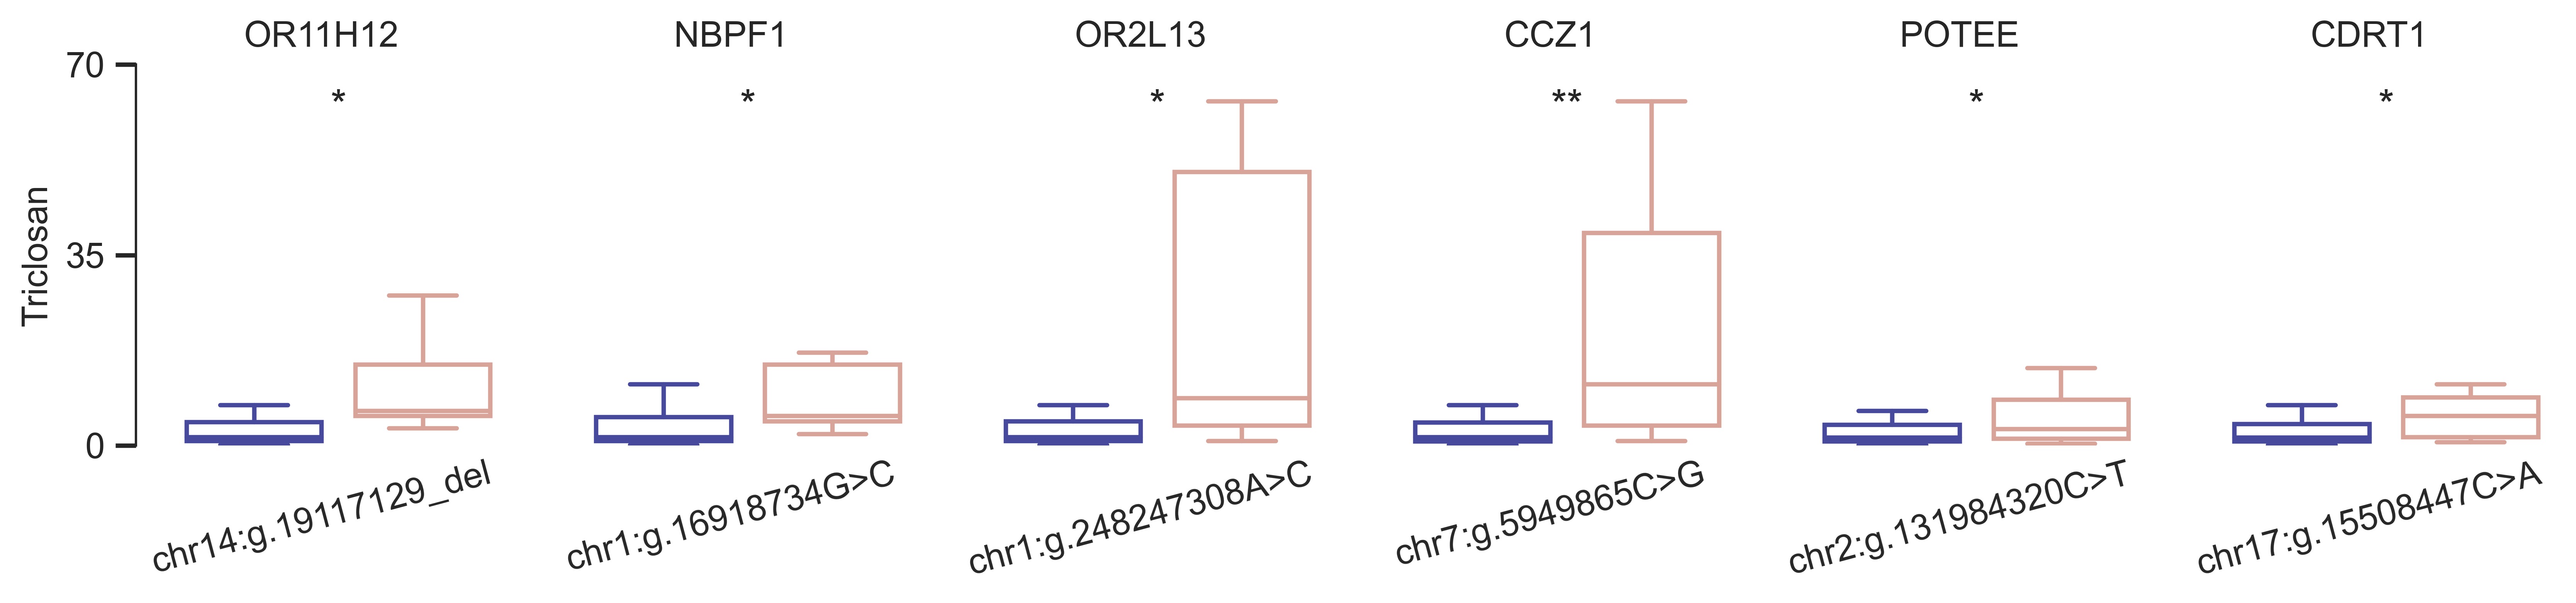

In [183]:
listA=result_list
plt.rcParams['font.family'] = 'Arial'
plt.subplots(figsize=(20,3),dpi=550)
for j,i in enumerate([ 
'chr14-19117129-19117129-A---OR11H12',
 'chr1-16918734-16918734-G-C-NBPF1',
 'chr1-248247308-248247308-A-C-OR2L13',
 'chr7-5949865-5949865-C-G-CCZ1',
 'chr2-131984320-131984320-C-T-POTEE',
 'chr17-15508447-15508447-C-A-CDRT1',
]
                      ):
    plt.subplot(1,10,j+1)
   
    colors=['grey','red']
    clsls=['nonmutant','mut']
    
    data=[ 
    targetdf3[targetdf3[ i ]=='nonmutant'][ '三氯沙' ].dropna().tolist(),
    targetdf3[targetdf3[ i ]==      'mut'][ '三氯沙' ].dropna().tolist(),
    ]
    colors =['#46499c','#d8a398']
    wkls1=[]
    wkls2=[]
    for num, d in enumerate(data):
        box=plt.boxplot(d, positions=[num + 1], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor='white',edgecolor =colors[num],linewidth=1.5),
                    medianprops=dict(color=colors[num],linewidth=1.5),
                    whiskerprops={'color': colors[num],'linewidth':1.5},
                    capprops={'color': colors[num],'linewidth':1.5},
                    flierprops=dict(marker='o', color='black', markersize=0))
        
        lower_whisker = box['whiskers'][0].get_ydata()[1]        upper_whisker = box['whiskers'][1].get_ydata()[1]        wkls1.append(lower_whisker)
        wkls2.append(upper_whisker)

    plt.ylim(np.min(wkls1)*0.9-0.1*np.max(wkls2),np.max(wkls2)*1.1)

    u_statistic, p_value = stats.mannwhitneyu(data[0],data[1],alternative='less')
    if p_value>0.05:
        star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
        star='*'
    elif (p_value <=0.01) &(p_value >0.001):
        star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
        star='***'
    else:
        star='****'
    plt.text(1.5,60, star, ha='center', fontsize=14)
    plt.title(i.split('-')[-1], fontsize=12)
    plt.xticks([])
    plt.ylabel(eng_chi_dict['三氯沙'],fontsize=12)
    plt.xlim(0.3,len(clsls)+0.5)
    plt.ylim(-0,70)
    plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
    if i =='chr14-19117129-19117129-A---OR11H12':
        plt.xlabel('chr14:g.19117129_del', fontsize=12,rotation=15)
    else:
        plt.xlabel(loci_dict[i], fontsize=12,rotation=15)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.yticks([0,35,70])
    if j>0:
        plt.gca().spines['left'].set_visible(False)
        plt.yticks([])
        plt.ylabel('', fontsize=12)
plt.tight_layout()
plt.savefig('Fig5b1.pdf', bbox_inches='tight')  
plt.show()

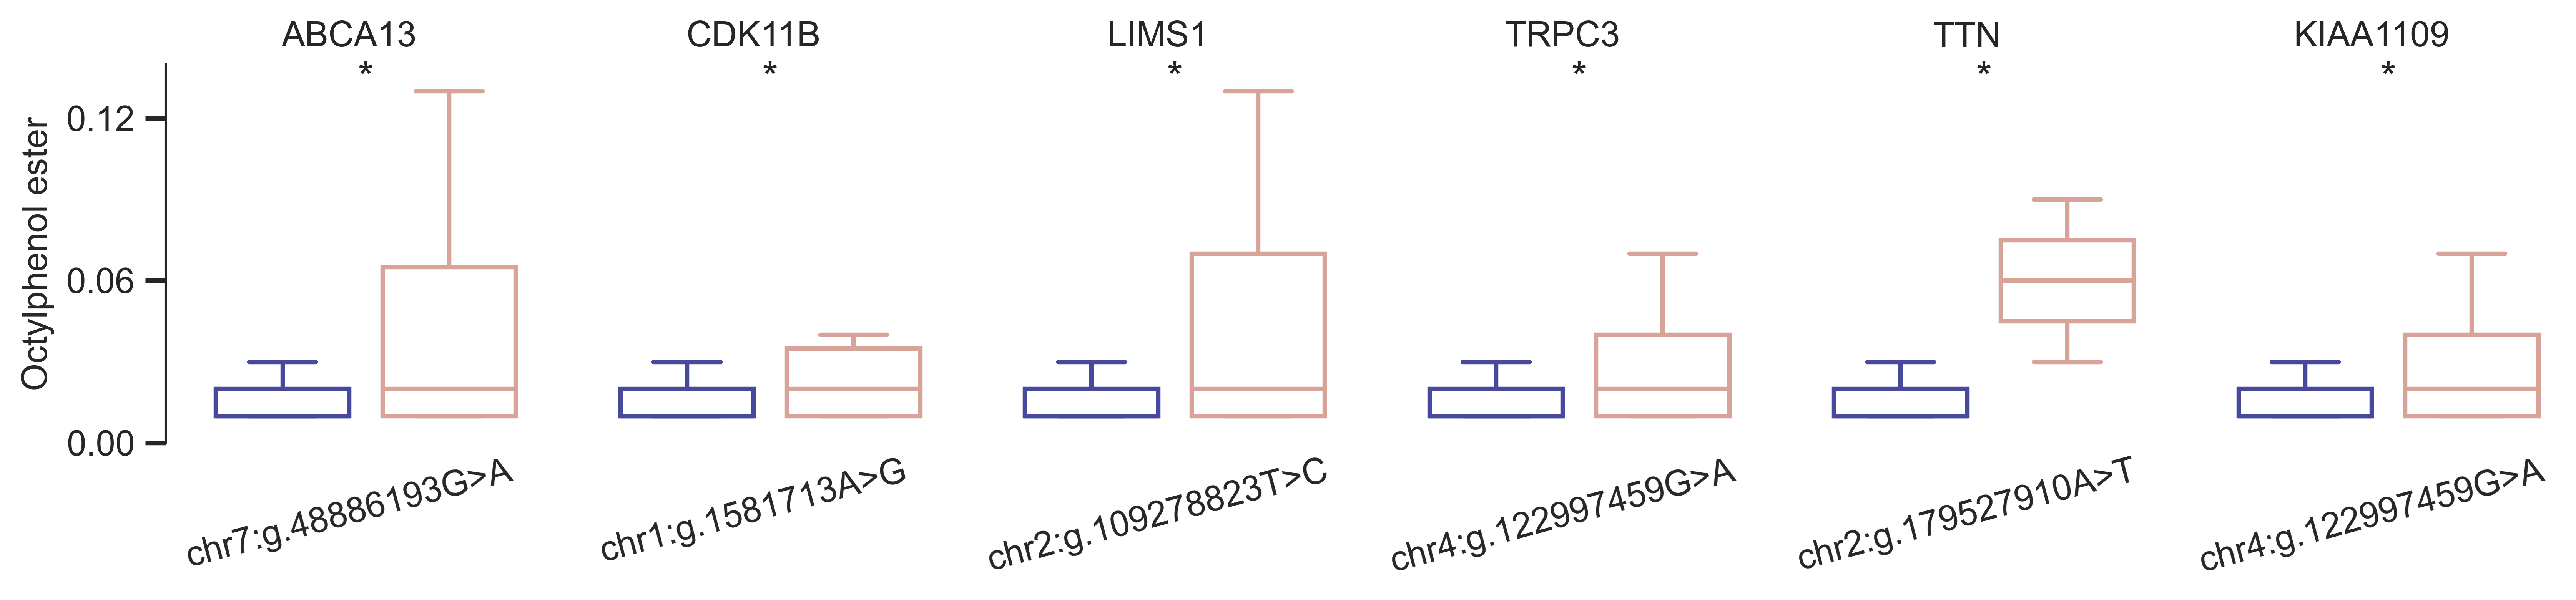

In [182]:
listA=result_list
plt.rcParams['font.family'] = 'Arial'
plt.subplots(figsize=(20,3),dpi=550)
for j,i in enumerate([ 
  'chr7-48886193-48886193-G-A-ABCA13',
 'chr1-1581713-1581713-A-G-CDK11B',
 'chr2-109278823-109278823-T-C-LIMS1',
 'chr4-122997459-122997459-G-A-TRPC3',
 'chr2-179527910-179527910-A-T-TTN',
 'chr4-122997459-122997459-G-A-KIAA1109',
]
                      ):
    plt.subplot(1,10,j+1)
   
    colors=['grey','red']
    clsls=['nonmutant','mut']
    
    data=[ 
    targetdf2[targetdf2[ i ]=='nonmutant'][ '辛基苯酯' ].dropna().tolist(),
    targetdf2[targetdf2[ i ]==      'mut'][ '辛基苯酯' ].dropna().tolist(),
    ]
    colors =['#46499c','#d8a398']
    wkls1=[]
    wkls2=[]
    for num, d in enumerate(data):
        box=plt.boxplot(d, positions=[num + 1], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor='white',edgecolor =colors[num],linewidth=1.5),
                    medianprops=dict(color=colors[num],linewidth=1.5),
                    whiskerprops={'color': colors[num],'linewidth':1.5},
                    capprops={'color': colors[num],'linewidth':1.5},
                    flierprops=dict(marker='o', color='black', markersize=0))
        
        lower_whisker = box['whiskers'][0].get_ydata()[1]        upper_whisker = box['whiskers'][1].get_ydata()[1]        wkls1.append(lower_whisker)
        wkls2.append(upper_whisker)

    plt.ylim(np.min(wkls1)*0.9-0.1*np.max(wkls2),np.max(wkls2)*1.1)

    u_statistic, p_value = stats.mannwhitneyu(data[0],data[1],alternative='less')
    if p_value>0.05:
        star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
        star='*'
    elif (p_value <=0.01) &(p_value >0.001):
        star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
        star='***'
    else:
        star='****'
    plt.text(1.5,0.13, star, ha='center', fontsize=14)
    plt.title(i.split('-')[-1], fontsize=12)
    plt.xticks([])
    plt.ylabel(eng_chi_dict['辛基苯酯'],fontsize=12)
    plt.xlim(0.3,len(clsls)+0.5)
    plt.ylim(-0,0.14)
    plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
    plt.xlabel(loci_dict[i], fontsize=12,rotation=15)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.yticks([0,0.06,0.12])
    if j>0:
        plt.gca().spines['left'].set_visible(False)
        plt.yticks([])
        plt.ylabel('', fontsize=12)
sns.set_style('ticks')
plt.tight_layout()
plt.savefig('Fig5b2.pdf', bbox_inches='tight') 
plt.show()


fig, ax = plt.subplots(dpi=450)
red_patch = mpatches.Patch(facecolor='white', edgecolor='#46499c',label='unaffected')
blue_patch = mpatches.Patch(facecolor='white',edgecolor='#d8a398', label='affected')

##添加图例
ax.legend(handles=[red_patch, blue_patch])
sns.despine(bottom=True,left=True)
plt.xticks([])
plt.yticks([])
##显示图形
plt.show()

##  肠道和基因突变的关系


In [889]:
alldata_pivot

检测项目      病历号  1. 己二酸  10. α-酮戊二酸  11. 琥珀酸  12. 富马酸  13. 苹果酸  14. 羟甲基戊二酸  \
0     ASD_051    1.87       33.93     6.95     0.37     0.63       10.62   
1     ASD_052    2.77       20.57     7.80     0.41     0.99        9.85   
2     ASD_053    2.38        7.64     7.58     0.22     0.36        9.21   
3     ASD_054    1.35        7.81     5.75     0.39     0.27        6.66   
4     ASD_055    2.57       16.94    12.35     0.47     0.54       10.66   
..        ...     ...         ...      ...      ...      ...         ...   
64     TD_085    1.04       20.93     3.58     0.55     0.76        3.82   
65     TD_086    1.42        7.87     1.79     0.26     0.51        4.25   
66     TD_087    4.54       21.94    13.79     0.58     0.92       10.99   
67     TD_088    1.13       16.98    15.91     0.71     0.86        5.86   
68     TD_089    0.56       12.58     4.28     0.42     0.51        5.28   

检测项目  15. α-酮异戊酸  16. α-酮异己酸  17. α-酮-β-甲基戊酸  ...  \
0           0.47        0.24            0.68  ...   
1           0.45        0.34            0.49  ...   
2           0.32        0.22            0.44  ...   
3           0.32        0.19            0.55  ...   
4           0.35        0.24            0.66  ...   
..           ...         ...             ...  ...   
64          0.48        0.21            0.98  ...   
65          0.31        0.28            0.93  ...   
66          0.75        0.31            1.15  ...   
67          0.45        0.24            0.98  ...   
68          0.28        0.18            0.51  ...   

检测项目  chr16-70165793-70165793-G-C-PDPR  \
0                            nonmutant   
1                                  mut   
2                                  mut   
3                            nonmutant   
4                                  mut   
..                                 ...   
64                           nonmutant   
65                                 mut   
66                                 mut   
67                                 mut   
68                                 mut   

检测项目  chr14-106919301-106919301-T-C-LINC00226  \
0                                   nonmutant   
1                                         mut   
2                                   nonmutant   
3                                   nonmutant   
4                                   nonmutant   
..                                        ...   
64                                  nonmutant   
65                                  nonmutant   
66                                  nonmutant   
67                                  nonmutant   
68                                  nonmutant   

检测项目  chr1-206567084-206567084-C-T-SRGAP2D  \
0                                nonmutant   
1                                nonmutant   
2                                nonmutant   
3                                nonmutant   
4                                      mut   
..                                     ...   
64                               nonmutant   
65                               nonmutant   
66                               nonmutant   
67                               nonmutant   
68                               nonmutant   

检测项目  chr14-19476226-19476226-C-T-LINC02297  \
0                                 nonmutant   
1                                 nonmutant   
2                                 nonmutant   
3                                 nonmutant   
4                                       mut   
..                                      ...   
64                                nonmutant   
65                                nonmutant   
66                                nonmutant   
67                                nonmutant   
68                                      mut   

检测项目  chr2-131936113-131936113-G-C-POTEE  chr1-16959698-16959698-G-A-CROCCP2  \
0                              nonmutant                           nonmutant   
1                              nonmutant                           nonmutant  

In [895]:
import pandas as pd
from scipy import stats

gene_sites = alldata_pivot.columns[187:475]indicators = gut
df=merged_df
t_test_results = {}

for gene_site in gene_sites:
    mutant_data = df[df[gene_site] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = df[df[gene_site] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    gene_site_results = {}
    
    for indicator in indicators:
        mutant_indicator_data = mutant_data[indicator].dropna()
        nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        
        if len(mutant_indicator_data) > 1 and len(nonmutant_indicator_data) > 1:
            t_stat, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
            gene_site_results[indicator] = {'t_stat': t_stat, 'p_value': p_value}
        else:
            gene_site_results[indicator] = {'t_stat': None, 'p_value': None}
    
    t_test_results[gene_site] = gene_site_results

In [896]:
significant_results = {}

for gene_site, indicator_results in t_test_results.items():
    significant_indicators = {}
    
    for indicator, stats1 in indicator_results.items():
        if str(stats1['p_value']) !='None':
            if stats1['p_value'] < 0.05:
                significant_indicators[indicator] = stats1
    
    if significant_indicators:
        significant_results[gene_site] = significant_indicators

result_list = []
 
for gene_site, indicators in significant_results.items():
    for indicator, stats1 in indicators.items():
        result_list.append([gene_site, indicator, stats1['p_value']])
 
for item in result_list:
    print(item)

['chr15-20868230-20868230-T-C-GOLGA8CP', '分泌型免疫球蛋白', 0.018546776260806842]
['chr2-109278823-109278823-T-C-LIMS1', '钙卫蛋白', 0.0022612148311252625]
['chr16-32077240-32077240-T-C-ZNF267', '解连蛋白', 0.020565871482034974]
['chr15-20433733-20433733-A-C-NONE', '解连蛋白', 0.004810641375993797]
['chr16-72088652-72088652-C-T-HP', '解连蛋白', 0.03628959194312794]
['chr7-76796928-76796928-A-G-CCDC146', '解连蛋白', 0.030046722590469067]
['chr3-195709088-195709088-T-C-SDHAP1', '分泌型免疫球蛋白', 0.007606088831901648]
['chr14-20147838-20147838-A-G-OR11H2', '钙卫蛋白', 0.02657924114760939]
['chr7-48886193-48886193-G-A-ABCA13', '解连蛋白', 0.002344758534585418]
['chr16-32077240-32077240-T-C-LOC102723753', '解连蛋白', 0.020565871482034974]
['chr1-16969246-16969246-G-A-CROCCP2', '解连蛋白', 0.03471550723592343]
['chr15-20433733-20433733-A-C-CHEK2P2', '解连蛋白', 0.004810641375993797]
['chr1-16890320-16890320-T-C-NBPF1', '钙卫蛋白', 0.032830964322773555]
['chr14-19117129-19117129-A---NONE', '钙卫蛋白', 0.004237224516207647]
['chr1-16918734-16918734-G-C-

In [897]:
significantdf3=pd.DataFrame(result_list,columns=['geneloci','indicator','p_value'])

significantdf3

geneloci indicator   p_value
0       chr15-20868230-20868230-T-C-GOLGA8CP  分泌型免疫球蛋白  0.018547
1         chr2-109278823-109278823-T-C-LIMS1      钙卫蛋白  0.002261
2         chr16-32077240-32077240-T-C-ZNF267      解连蛋白  0.020566
3           chr15-20433733-20433733-A-C-NONE      解连蛋白  0.004811
4             chr16-72088652-72088652-C-T-HP      解连蛋白  0.036290
5         chr7-76796928-76796928-A-G-CCDC146      解连蛋白  0.030047
6        chr3-195709088-195709088-T-C-SDHAP1  分泌型免疫球蛋白  0.007606
7         chr14-20147838-20147838-A-G-OR11H2      钙卫蛋白  0.026579
8          chr7-48886193-48886193-G-A-ABCA13      解连蛋白  0.002345
9   chr16-32077240-32077240-T-C-LOC102723753      解连蛋白  0.020566
10        chr1-16969246-16969246-G-A-CROCCP2      解连蛋白  0.034716
11       chr15-20433733-20433733-A-C-CHEK2P2      解连蛋白  0.004811
12          chr1-16890320-16890320-T-C-NBPF1      钙卫蛋白  0.032831
13          chr14-19117129-19117129-A---NONE      钙卫蛋白  0.004237
14          chr1-16918734-16918734-G-C-NBPF1      钙卫蛋白  0.024509
15        chr15-20868230-20868230-T-C-NBEAP1  分泌型免疫球蛋白  0.018547
16         chr2-85570186-85570186-G-A-RETSAT      解连蛋白  0.038317
17        chr7-151970695-151970695-A-T-KMT2C      钙卫蛋白  0.043823
18         chr1-16969246-16969246-G-A-MST1P2      解连蛋白  0.034716
19         chr14-20147838-20147838-A-G-POTEM      钙卫蛋白  0.026579
20       chr14-19117129-19117129-A---OR11H12      钙卫蛋白  0.004237
21         chr7-48886193-48886193-G-A-CDC14C      解连蛋白  0.002345
22    chr1-120539213-120539213-G-T-NOTCH2NLC      解连蛋白  0.037756
23          chr11-18290636-18290636-A-T-SAA1  分泌型免疫球蛋白  0.000342
24       chr13-24893113-24893113-C-T-C1QTNF9      解连蛋白  0.009975

In [898]:
gutlist=significantdf3['indicator'].tolist()
gutlist=list(set(gutlist))

In [899]:
len(significantdf3['geneloci'].drop_duplicates())

25

In [657]:
listgut=['麦胶蛋白抗体'
,'组织转麸胺酶抗体'
,'分泌型免疫球蛋白'
,'钙卫蛋白'
,'解连蛋白'
,'葡萄糖醛酸酶'
,'胰弹性蛋白酶']+list(alldata_pivot.columns[187:475] )

In [909]:
def format_gene2(row):
    parts = row.split('-')    chrom = parts[0]    pos = parts[1]    ref = parts[3]    alt = parts[4]    return f"{chrom}:g.{pos}{ref}>{alt}"
significantdf3['gene2_formatted'] = significantdf3['geneloci'].apply(format_gene2)

significantdf3

geneloci indicator   p_value  \
0       chr15-20868230-20868230-T-C-GOLGA8CP  分泌型免疫球蛋白  0.018547   
1         chr2-109278823-109278823-T-C-LIMS1      钙卫蛋白  0.002261   
2         chr16-32077240-32077240-T-C-ZNF267      解连蛋白  0.020566   
3           chr15-20433733-20433733-A-C-NONE      解连蛋白  0.004811   
4             chr16-72088652-72088652-C-T-HP      解连蛋白  0.036290   
5         chr7-76796928-76796928-A-G-CCDC146      解连蛋白  0.030047   
6        chr3-195709088-195709088-T-C-SDHAP1  分泌型免疫球蛋白  0.007606   
7         chr14-20147838-20147838-A-G-OR11H2      钙卫蛋白  0.026579   
8          chr7-48886193-48886193-G-A-ABCA13      解连蛋白  0.002345   
9   chr16-32077240-32077240-T-C-LOC102723753      解连蛋白  0.020566   
10        chr1-16969246-16969246-G-A-CROCCP2      解连蛋白  0.034716   
11       chr15-20433733-20433733-A-C-CHEK2P2      解连蛋白  0.004811   
12          chr1-16890320-16890320-T-C-NBPF1      钙卫蛋白  0.032831   
13          chr14-19117129-19117129-A---NONE      钙卫蛋白  0.004237   
14          chr1-16918734-16918734-G-C-NBPF1      钙卫蛋白  0.024509   
15        chr15-20868230-20868230-T-C-NBEAP1  分泌型免疫球蛋白  0.018547   
16         chr2-85570186-85570186-G-A-RETSAT      解连蛋白  0.038317   
17        chr7-151970695-151970695-A-T-KMT2C      钙卫蛋白  0.043823   
18         chr1-16969246-16969246-G-A-MST1P2      解连蛋白  0.034716   
19         chr14-20147838-20147838-A-G-POTEM      钙卫蛋白  0.026579   
20       chr14-19117129-19117129-A---OR11H12      钙卫蛋白  0.004237   
21         chr7-48886193-48886193-G-A-CDC14C      解连蛋白  0.002345   
22    chr1-120539213-120539213-G-T-NOTCH2NLC      解连蛋白  0.037756   
23          chr11-18290636-18290636-A-T-SAA1  分泌型免疫球蛋白  0.000342   
24       chr13-24893113-24893113-C-T-C1QTNF9      解连蛋白  0.009975   

        gene2_formatted  
0   chr15:g.20868230T>C  
1   chr2:g.109278823T>C  
2   chr16:g.32077240T>C  
3   chr15:g.20433733A>C  
4   chr16:g.72088652C>T  
5    chr7:g.76796928A>G  
6   chr3:g.195709088T>C  
7   chr14:g.20147838A>G  
8    chr7:g.48886193G>A  
9   chr16:g.32077240T>C  
10   chr1:g.16969246G>A  
11  chr15:g.20433733A>C  
12   chr1:g.16890320T>C  
13   chr14:g.19117129A>  
14   chr1:g.16918734G>C  
15  chr15:g.20868230T>C  
16   chr2:g.85570186G>A  
17  chr7:g.151970695A>T  
18   chr1:g.16969246G>A  
19  chr14:g.20147838A>G  
20   chr14:g.19117129A>  
21   chr7:g.48886193G>A  
22  chr1:g.120539213G>T  
23  chr11:g.18290636A>T  
24  chr13:g.24893113C>T

In [910]:
significantdf3.head()

geneloci indicator   p_value  \
0  chr15-20868230-20868230-T-C-GOLGA8CP  分泌型免疫球蛋白  0.018547   
1    chr2-109278823-109278823-T-C-LIMS1      钙卫蛋白  0.002261   
2    chr16-32077240-32077240-T-C-ZNF267      解连蛋白  0.020566   
3      chr15-20433733-20433733-A-C-NONE      解连蛋白  0.004811   
4        chr16-72088652-72088652-C-T-HP      解连蛋白  0.036290   

       gene2_formatted  
0  chr15:g.20868230T>C  
1  chr2:g.109278823T>C  
2  chr16:g.32077240T>C  
3  chr15:g.20433733A>C  
4  chr16:g.72088652C>T

In [911]:
significantdf3[significantdf3['indicator']=="钙卫蛋白"]

geneloci indicator   p_value  \
1    chr2-109278823-109278823-T-C-LIMS1      钙卫蛋白  0.002261   
7    chr14-20147838-20147838-A-G-OR11H2      钙卫蛋白  0.026579   
12     chr1-16890320-16890320-T-C-NBPF1      钙卫蛋白  0.032831   
13     chr14-19117129-19117129-A---NONE      钙卫蛋白  0.004237   
14     chr1-16918734-16918734-G-C-NBPF1      钙卫蛋白  0.024509   
17   chr7-151970695-151970695-A-T-KMT2C      钙卫蛋白  0.043823   
19    chr14-20147838-20147838-A-G-POTEM      钙卫蛋白  0.026579   
20  chr14-19117129-19117129-A---OR11H12      钙卫蛋白  0.004237   

        gene2_formatted  
1   chr2:g.109278823T>C  
7   chr14:g.20147838A>G  
12   chr1:g.16890320T>C  
13   chr14:g.19117129A>  
14   chr1:g.16918734G>C  
17  chr7:g.151970695A>T  
19  chr14:g.20147838A>G  
20   chr14:g.19117129A>

In [912]:
significantdf3[significantdf3['indicator']=="分泌型免疫球蛋白"]

geneloci indicator   p_value  \
0   chr15-20868230-20868230-T-C-GOLGA8CP  分泌型免疫球蛋白  0.018547   
6    chr3-195709088-195709088-T-C-SDHAP1  分泌型免疫球蛋白  0.007606   
15    chr15-20868230-20868230-T-C-NBEAP1  分泌型免疫球蛋白  0.018547   
23      chr11-18290636-18290636-A-T-SAA1  分泌型免疫球蛋白  0.000342   

        gene2_formatted  
0   chr15:g.20868230T>C  
6   chr3:g.195709088T>C  
15  chr15:g.20868230T>C  
23  chr11:g.18290636A>T

In [913]:
significantdf3['indicator'].drop_duplicates

<bound method Series.drop_duplicates of 0     分泌型免疫球蛋白
1         钙卫蛋白
2         解连蛋白
3         解连蛋白
4         解连蛋白
5         解连蛋白
6     分泌型免疫球蛋白
7         钙卫蛋白
8         解连蛋白
9         解连蛋白
10        解连蛋白
11        解连蛋白
12        钙卫蛋白
13        钙卫蛋白
14        钙卫蛋白
15    分泌型免疫球蛋白
16        解连蛋白
17        钙卫蛋白
18        解连蛋白
19        钙卫蛋白
20        钙卫蛋白
21        解连蛋白
22        解连蛋白
23    分泌型免疫球蛋白
24        解连蛋白
Name: indicator, dtype: object>

In [904]:
loci_dict3=dict(zip(significantdf3['geneloci'],significantdf3['gene2_formatted']))

In [915]:
gutdf=significantdf3[significantdf3['indicator'].isin(gut)]

In [916]:
gutdf

geneloci indicator   p_value  \
0       chr15-20868230-20868230-T-C-GOLGA8CP  分泌型免疫球蛋白  0.018547   
1         chr2-109278823-109278823-T-C-LIMS1      钙卫蛋白  0.002261   
2         chr16-32077240-32077240-T-C-ZNF267      解连蛋白  0.020566   
3           chr15-20433733-20433733-A-C-NONE      解连蛋白  0.004811   
4             chr16-72088652-72088652-C-T-HP      解连蛋白  0.036290   
5         chr7-76796928-76796928-A-G-CCDC146      解连蛋白  0.030047   
6        chr3-195709088-195709088-T-C-SDHAP1  分泌型免疫球蛋白  0.007606   
7         chr14-20147838-20147838-A-G-OR11H2      钙卫蛋白  0.026579   
8          chr7-48886193-48886193-G-A-ABCA13      解连蛋白  0.002345   
9   chr16-32077240-32077240-T-C-LOC102723753      解连蛋白  0.020566   
10        chr1-16969246-16969246-G-A-CROCCP2      解连蛋白  0.034716   
11       chr15-20433733-20433733-A-C-CHEK2P2      解连蛋白  0.004811   
12          chr1-16890320-16890320-T-C-NBPF1      钙卫蛋白  0.032831   
13          chr14-19117129-19117129-A---NONE      钙卫蛋白  0.004237   
14          chr1-16918734-16918734-G-C-NBPF1      钙卫蛋白  0.024509   
15        chr15-20868230-20868230-T-C-NBEAP1  分泌型免疫球蛋白  0.018547   
16         chr2-85570186-85570186-G-A-RETSAT      解连蛋白  0.038317   
17        chr7-151970695-151970695-A-T-KMT2C      钙卫蛋白  0.043823   
18         chr1-16969246-16969246-G-A-MST1P2      解连蛋白  0.034716   
19         chr14-20147838-20147838-A-G-POTEM      钙卫蛋白  0.026579   
20       chr14-19117129-19117129-A---OR11H12      钙卫蛋白  0.004237   
21         chr7-48886193-48886193-G-A-CDC14C      解连蛋白  0.002345   
22    chr1-120539213-120539213-G-T-NOTCH2NLC      解连蛋白  0.037756   
23          chr11-18290636-18290636-A-T-SAA1  分泌型免疫球蛋白  0.000342   
24       chr13-24893113-24893113-C-T-C1QTNF9      解连蛋白  0.009975   

        gene2_formatted  
0   chr15:g.20868230T>C  
1   chr2:g.109278823T>C  
2   chr16:g.32077240T>C  
3   chr15:g.20433733A>C  
4   chr16:g.72088652C>T  
5    chr7:g.76796928A>G  
6   chr3:g.195709088T>C  
7   chr14:g.20147838A>G  
8    chr7:g.48886193G>A  
9   chr16:g.32077240T>C  
10   chr1:g.16969246G>A  
11  chr15:g.20433733A>C  
12   chr1:g.16890320T>C  
13   chr14:g.19117129A>  
14   chr1:g.16918734G>C  
15  chr15:g.20868230T>C  
16   chr2:g.85570186G>A  
17  chr7:g.151970695A>T  
18   chr1:g.16969246G>A  
19  chr14:g.20147838A>G  
20   chr14:g.19117129A>  
21   chr7:g.48886193G>A  
22  chr1:g.120539213G>T  
23  chr11:g.18290636A>T  
24  chr13:g.24893113C>T

In [917]:
gutdf[gutdf['indicator']=='钙卫蛋白']

geneloci indicator   p_value  \
1    chr2-109278823-109278823-T-C-LIMS1      钙卫蛋白  0.002261   
7    chr14-20147838-20147838-A-G-OR11H2      钙卫蛋白  0.026579   
12     chr1-16890320-16890320-T-C-NBPF1      钙卫蛋白  0.032831   
13     chr14-19117129-19117129-A---NONE      钙卫蛋白  0.004237   
14     chr1-16918734-16918734-G-C-NBPF1      钙卫蛋白  0.024509   
17   chr7-151970695-151970695-A-T-KMT2C      钙卫蛋白  0.043823   
19    chr14-20147838-20147838-A-G-POTEM      钙卫蛋白  0.026579   
20  chr14-19117129-19117129-A---OR11H12      钙卫蛋白  0.004237   

        gene2_formatted  
1   chr2:g.109278823T>C  
7   chr14:g.20147838A>G  
12   chr1:g.16890320T>C  
13   chr14:g.19117129A>  
14   chr1:g.16918734G>C  
17  chr7:g.151970695A>T  
19  chr14:g.20147838A>G  
20   chr14:g.19117129A>

In [918]:
gutdf['geneloci'].value_counts().iloc[:30]


chr15-20868230-20868230-T-C-GOLGA8CP        1
chr14-19117129-19117129-A---NONE            1
chr11-18290636-18290636-A-T-SAA1            1
chr1-120539213-120539213-G-T-NOTCH2NLC      1
chr7-48886193-48886193-G-A-CDC14C           1
chr14-19117129-19117129-A---OR11H12         1
chr14-20147838-20147838-A-G-POTEM           1
chr1-16969246-16969246-G-A-MST1P2           1
chr7-151970695-151970695-A-T-KMT2C          1
chr2-85570186-85570186-G-A-RETSAT           1
chr15-20868230-20868230-T-C-NBEAP1          1
chr1-16918734-16918734-G-C-NBPF1            1
chr1-16890320-16890320-T-C-NBPF1            1
chr2-109278823-109278823-T-C-LIMS1          1
chr15-20433733-20433733-A-C-CHEK2P2         1
chr1-16969246-16969246-G-A-CROCCP2          1
chr16-32077240-32077240-T-C-LOC102723753    1
chr7-48886193-48886193-G-A-ABCA13           1
chr14-20147838-20147838-A-G-OR11H2          1
chr3-195709088-195709088-T-C-SDHAP1         1
chr7-76796928-76796928-A-G-CCDC146          1
chr16-72088652-72088652-C-T-HP    

In [919]:
chr11-18290636-18290636-A-T-SAA1            2
chr1-16890320-16890320-T-C-NBPF1            2
chr2-109278823-109278823-T-C-LIMS1          2
chr15-22332859-22332859-G-T-LOC101927079    2
chr14-19117129-19117129-A---OR11H12         2
chr15-22332859-22332859-G-T-LINC02203       2
chr7-76796928-76796928-A-G-CCDC146          2
chr14-19117129-19117129-A---NONE            2
chr1-664468-664468-G-T-LOC100133331         2
chr1-16976032-16976032-A-C-MST1P2           2
chr1-144816621-144816621-A-G-NBPF9          1
chr2-131984320-131984320-C-T-POTEE          1
chr14-20147838-20147838-A-G-OR11H2          1
chr14-20147838-20147838-A-G-POTEM           1
chr1-17185602-17185602-A-G-MIR3675          1
chr17-15508447-15508447-C-A-CDRT1           1
chr5-34193865-34193865-A-G-LOC646652        1
chr16-32077240-32077240-T-C-LOC102723753    1
chr16-72088652-72088652-C-T-HP              1
chr1-120539213-120539213-G-T-NOTCH2NLC      1
chr16-32077240-32077240-T-C-ZNF267          1
chr13-24893113-24893113-C-T-C1QTNF9         1
chr15-20433733-20433733-A-C-CHEK2P2         1
chr7-48886193-48886193-G-A-CDC14C           1
chr2-85570186-85570186-G-A-RETSAT           1
chr15-21937964-21937964-A-G-LOC646214       1
chr14-20228424-20228424-G-A-OR4Q3           1

SyntaxError: invalid syntax (3835742153.py, line 1)

In [668]:
gutdf['indicator'].value_counts().iloc[:30]

解连蛋白        13
组织转麸胺酶抗体    12
麦胶蛋白抗体      10
胰弹性蛋白酶      10
葡萄糖醛酸酶      10
钙卫蛋白         8
分泌型免疫球蛋白     4
Name: indicator, dtype: int64

In [669]:
SAA1  2 930
FAM178B  3  1
   LIMS1  3  189
MST1P2    4  3
  CEP120  1 48
    CDK11B  2 27

SyntaxError: invalid syntax (1533427775.py, line 1)

In [670]:
gutdf[gutdf['geneloci'].str.contains('SAA1')]  930

SyntaxError: invalid syntax (4069679855.py, line 1)

In [920]:
alldata_pivot.iloc

In [921]:
[i  for i in  set(merged_df.columns) if i not in set(alldata_pivot.columns)]

['number']

In [922]:
merged_df

病历号  1. 己二酸  10. α-酮戊二酸  11. 琥珀酸  12. 富马酸  13. 苹果酸  14. 羟甲基戊二酸  \
0   ASD_051    1.87       33.93     6.95     0.37     0.63       10.62   
1   ASD_052    2.77       20.57     7.80     0.41     0.99        9.85   
2   ASD_053    2.38        7.64     7.58     0.22     0.36        9.21   
3   ASD_054    1.35        7.81     5.75     0.39     0.27        6.66   
4   ASD_055    2.57       16.94    12.35     0.47     0.54       10.66   
..      ...     ...         ...      ...      ...      ...         ...   
64   TD_085    1.04       20.93     3.58     0.55     0.76        3.82   
65   TD_086    1.42        7.87     1.79     0.26     0.51        4.25   
66   TD_087    4.54       21.94    13.79     0.58     0.92       10.99   
67   TD_088    1.13       16.98    15.91     0.71     0.86        5.86   
68   TD_089    0.56       12.58     4.28     0.42     0.51        5.28   

    15. α-酮异戊酸  16. α-酮异己酸  17. α-酮-β-甲基戊酸  ...  \
0         0.47        0.24            0.68  ...   
1         0.45        0.34            0.49  ...   
2         0.32        0.22            0.44  ...   
3         0.32        0.19            0.55  ...   
4         0.35        0.24            0.66  ...   
..         ...         ...             ...  ...   
64        0.48        0.21            0.98  ...   
65        0.31        0.28            0.93  ...   
66        0.75        0.31            1.15  ...   
67        0.45        0.24            0.98  ...   
68        0.28        0.18            0.51  ...   

    chr14-19807178-19807178-C-T-LINC01297-DUXAP10-NBEAP6  \
0                                                 mut      
1                                                 mut      
2                                           nonmutant      
3                                           nonmutant      
4                                           nonmutant      
..                                                ...      
64                                          nonmutant      
65                                          nonmutant      
66                                          nonmutant      
67                                          nonmutant      
68                                          nonmutant      

    chr12-31247819-31247819-A-G-DDX11  \
0                           nonmutant   
1                           nonmutant   
2                           nonmutant   
3                           nonmutant   
4                           nonmutant   
..                                ...   
64                          nonmutant   
65                          nonmutant   
66                                mut   
67                          nonmutant   
68                          nonmutant   

    chr5-99715833-99715833-T-A-LOC100133050  \
0                                 nonmutant   
1                                 nonmutant   
2                                 nonmutant   
3                                 nonmutant   
4                                 nonmutant   
..                                      ...   
64                                nonmutant   
65                                nonmutant   
66                                nonmutant   
67                                nonmutant   
68                                nonmutant   

    chr6-58779097-58779097-A-G-LINC00680-GUSBP4  \
0                                     nonmutant   
1                                     nonmutant   
2                                           mut   
3                                     nonmutant   
4                                     nonmutant   
..                                          ...   
64                                    nonmutant   
65                                    nonmutant   
66                                    nonmutant   
67                                    nonmutant   
68                                    nonmutant   

    chr11-18290636-18290636-A-T-SAA1  chr7-72081604-72081604-G-T-TYW1B  \
0                          nonmutant    

In [73]:
alldata_pivot['chr11-18290636-18290636-A-T-SAA1'].unique()

array(['nonmutant', 'mut'], dtype=object)

In [674]:
alldata_pivot[alldata_pivot['chr11-18290636-18290636-A-T-SAA1']=='mut'][['chr11-18290636-18290636-A-T-SAA1','分泌型免疫球蛋白']]

Empty DataFrame
Columns: [chr11-18290636-18290636-A-T-SAA1, 分泌型免疫球蛋白]
Index: []

In [923]:
alldata_pivot

检测项目      病历号  1. 己二酸  10. α-酮戊二酸  11. 琥珀酸  12. 富马酸  13. 苹果酸  14. 羟甲基戊二酸  \
0     ASD_051    1.87       33.93     6.95     0.37     0.63       10.62   
1     ASD_052    2.77       20.57     7.80     0.41     0.99        9.85   
2     ASD_053    2.38        7.64     7.58     0.22     0.36        9.21   
3     ASD_054    1.35        7.81     5.75     0.39     0.27        6.66   
4     ASD_055    2.57       16.94    12.35     0.47     0.54       10.66   
..        ...     ...         ...      ...      ...      ...         ...   
64     TD_085    1.04       20.93     3.58     0.55     0.76        3.82   
65     TD_086    1.42        7.87     1.79     0.26     0.51        4.25   
66     TD_087    4.54       21.94    13.79     0.58     0.92       10.99   
67     TD_088    1.13       16.98    15.91     0.71     0.86        5.86   
68     TD_089    0.56       12.58     4.28     0.42     0.51        5.28   

检测项目  15. α-酮异戊酸  16. α-酮异己酸  17. α-酮-β-甲基戊酸  ...  \
0           0.47        0.24            0.68  ...   
1           0.45        0.34            0.49  ...   
2           0.32        0.22            0.44  ...   
3           0.32        0.19            0.55  ...   
4           0.35        0.24            0.66  ...   
..           ...         ...             ...  ...   
64          0.48        0.21            0.98  ...   
65          0.31        0.28            0.93  ...   
66          0.75        0.31            1.15  ...   
67          0.45        0.24            0.98  ...   
68          0.28        0.18            0.51  ...   

检测项目  chr16-70165793-70165793-G-C-PDPR  \
0                            nonmutant   
1                                  mut   
2                                  mut   
3                            nonmutant   
4                                  mut   
..                                 ...   
64                           nonmutant   
65                                 mut   
66                                 mut   
67                                 mut   
68                                 mut   

检测项目  chr14-106919301-106919301-T-C-LINC00226  \
0                                   nonmutant   
1                                         mut   
2                                   nonmutant   
3                                   nonmutant   
4                                   nonmutant   
..                                        ...   
64                                  nonmutant   
65                                  nonmutant   
66                                  nonmutant   
67                                  nonmutant   
68                                  nonmutant   

检测项目  chr1-206567084-206567084-C-T-SRGAP2D  \
0                                nonmutant   
1                                nonmutant   
2                                nonmutant   
3                                nonmutant   
4                                      mut   
..                                     ...   
64                               nonmutant   
65                               nonmutant   
66                               nonmutant   
67                               nonmutant   
68                               nonmutant   

检测项目  chr14-19476226-19476226-C-T-LINC02297  \
0                                 nonmutant   
1                                 nonmutant   
2                                 nonmutant   
3                                 nonmutant   
4                                       mut   
..                                      ...   
64                                nonmutant   
65                                nonmutant   
66                                nonmutant   
67                                nonmutant   
68                                      mut   

检测项目  chr2-131936113-131936113-G-C-POTEE  chr1-16959698-16959698-G-A-CROCCP2  \
0                              nonmutant                           nonmutant   
1                              nonmutant                           nonmutant  

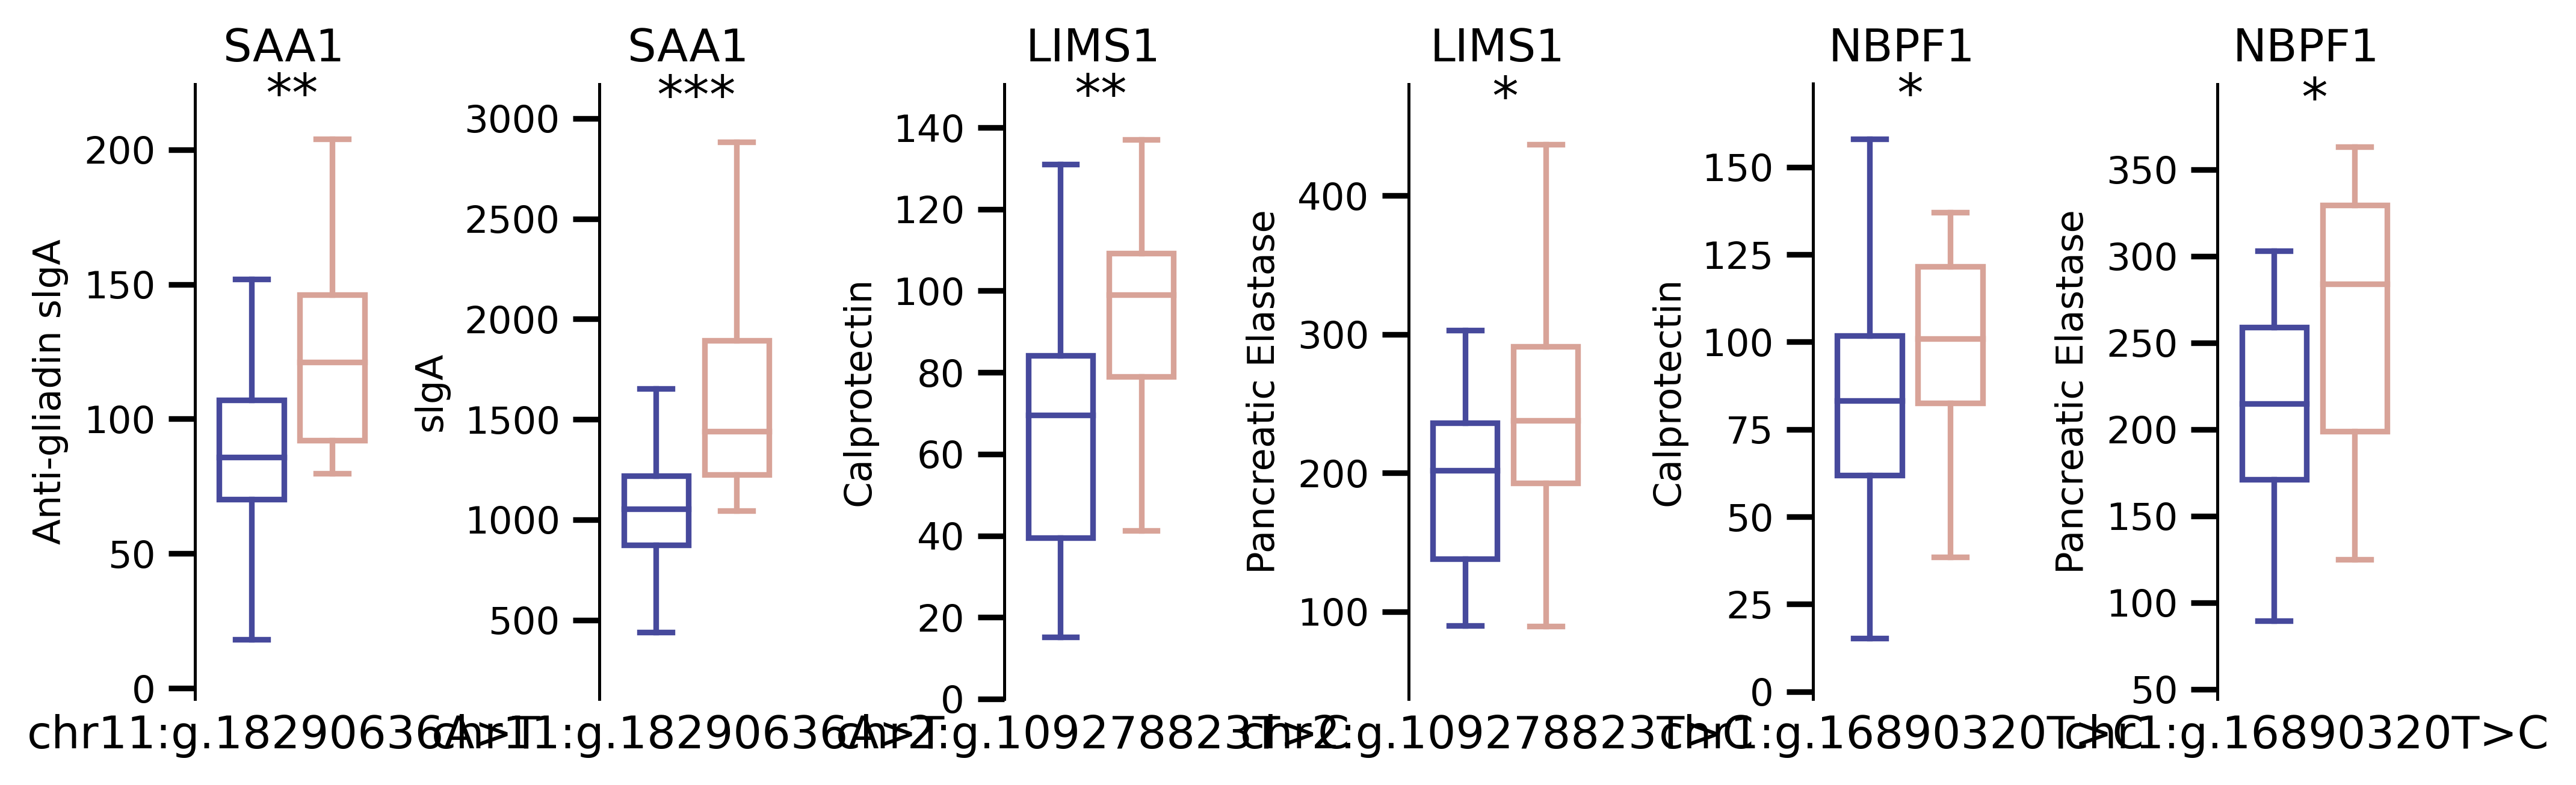

In [852]:
"""listA=result_list

plt.subplots(figsize=(15,3),dpi=450)
count=0
for j,i in enumerate(['chr11-18290636-18290636-A-T-SAA1','chr2-109278823-109278823-T-C-LIMS1','chr1-16890320-16890320-T-C-NBPF1']
                      ):
    for indicator in gutdf[gutdf['geneloci'].str.contains(i)]['indicator'].tolist():
        
        count+=1
        plt.subplot(1,10,count)
        plt.rcParams['font.family'] = 'Arial'
        colors=['grey','red']
        clsls=['nonmutant','mut']

        data=[ 
        merged_df[merged_df[ i ]=='nonmutant'][ indicator ].dropna().tolist(),
        merged_df[merged_df[ i ]==      'mut'][ indicator ].dropna().tolist(),
        ]
        colors =['#46499c','#d8a398']
        wkls1=[]
        wkls2=[]
        for num, d in enumerate(data):
            box=plt.boxplot(d, positions=[num + 1], widths=0.8, patch_artist=True,
                        boxprops=dict(facecolor='white',edgecolor =colors[num],linewidth=1.5),
                        medianprops=dict(color=colors[num],linewidth=1.5),
                        whiskerprops={'color': colors[num],'linewidth':1.5},
                        capprops={'color': colors[num],'linewidth':1.5},
                        flierprops=dict(marker='o', color='black', markersize=0))

            lower_whisker = box['whiskers'][0].get_ydata()[1]            upper_whisker = box['whiskers'][1].get_ydata()[1]            wkls1.append(lower_whisker)
            wkls2.append(upper_whisker)

        plt.ylim(np.min(wkls1)*0.9-0.1*np.max(wkls2),np.max(wkls2)*1.1)

        u_statistic, p_value = stats.mannwhitneyu(data[0],data[1],alternative='less')
        if p_value>0.05:
            star='n.s.'
        elif (p_value <=0.05) &(p_value >0.01):
            star='*'
        elif (p_value <=0.01) &(p_value >0.001):
            star='**'
        elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
        else:
            star='****'
        plt.text(1.5, np.max(wkls2)*1.05, star, ha='center', fontsize=14)
        plt.title(i.split('-')[-1], fontsize=12)
        plt.xticks([])
        plt.xlim(0.3,len(clsls)+0.5)
        plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
        plt.xlabel(loci_dict2[i], fontsize=12,rotation=0)
        plt.ylabel(eng_chi_dict[indicator], fontsize=10)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)

        if j>10:
            plt.gca().spines['left'].set_visible(False)
            plt.yticks([])
            plt.ylabel('', fontsize=10)
plt.tight_layout()
plt.show()"""

In [855]:
merged_df.iloc[:,1:187]

1. 己二酸  10. α-酮戊二酸  11. 琥珀酸  12. 富马酸  13. 苹果酸  14. 羟甲基戊二酸  15. α-酮异戊酸  \
0     1.87       33.93     6.95     0.37     0.63       10.62        0.47   
1     2.77       20.57     7.80     0.41     0.99        9.85        0.45   
2     2.38        7.64     7.58     0.22     0.36        9.21        0.32   
3     1.35        7.81     5.75     0.39     0.27        6.66        0.32   
4     2.57       16.94    12.35     0.47     0.54       10.66        0.35   
..     ...         ...      ...      ...      ...         ...         ...   
64    1.04       20.93     3.58     0.55     0.76        3.82        0.48   
65    1.42        7.87     1.79     0.26     0.51        4.25        0.31   
66    4.54       21.94    13.79     0.58     0.92       10.99        0.75   
67    1.13       16.98    15.91     0.71     0.86        5.86        0.45   
68    0.56       12.58     4.28     0.42     0.51        5.28        0.28   

    16. α-酮异己酸  17. α-酮-β-甲基戊酸  18. 黄尿酸  ...    鱿鱼    鲍鱼    鲑鱼    鳕鱼    鳗鱼  \
0         0.24            0.68     0.90  ...  47.1  18.2  24.6  31.4  41.3   
1         0.34            0.49     0.24  ...  45.3  34.7  39.2  36.5  40.7   
2         0.22            0.44     0.51  ...  33.4  30.5  23.5  33.0  36.0   
3         0.19            0.55     0.16  ...  49.2  24.7  23.4  31.0  45.0   
4         0.24            0.66     0.34  ...  42.7  34.4  41.6  39.0  39.5   
..         ...             ...      ...  ...   ...   ...   ...   ...   ...   
64        0.21            0.98     0.27  ...   NaN   NaN   NaN   NaN   NaN   
65        0.28            0.93     0.53  ...   NaN   NaN   NaN   NaN   NaN   
66        0.31            1.15     0.38  ...   NaN   NaN   NaN   NaN   NaN   
67        0.24            0.98     0.28  ...   NaN   NaN   NaN   NaN   NaN   
68        0.18            0.51     0.56  ...   NaN   NaN   NaN   NaN   NaN   

      鸡肉    鸭肉  麦胶蛋白抗体     麸质  龙眼/桂圆  
0   33.5  32.4    22.8  135.0   17.9  
1   38.0  41.0   165.0  124.0   46.2  
2   33.5  44.6    69.4  285.0   30.0  
3   31.5  42.9    81.8  289.0   39.0  
4   84.4  38.5    82.6  171.0   36.1  
..   ...   ...     ...    ...    ...  
64   NaN   NaN   118.0    NaN    NaN  
65   NaN   NaN   101.0    NaN    NaN  
66   NaN   NaN    78.5    NaN    NaN  
67   NaN   NaN    92.8    NaN    NaN  
68   NaN   NaN   110.0    NaN    NaN  

[69 rows x 186 columns]

In [924]:
from sklearn.preprocessing import StandardScaler

data_to_scale = merged_df.iloc[:,1:187]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_to_scale)

scaled_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns, index=data_to_scale.index)



In [925]:
 merged_df.iloc[:,187:]

number chr17-36361992-36361992-C-T-LOC101929950  \
0   CM202304230077                                      mut   
1   CM202304270022                                nonmutant   
2   CM202304250143                                      mut   
3   CM202304260010                                nonmutant   
4   CM202304250144                                      mut   
..             ...                                      ...   
64  CM202304260059                                      mut   
65  CM202304270037                                nonmutant   
66  CM202304270038                                nonmutant   
67  CM202304270039                                nonmutant   
68  CM202304270040                                      mut   

   chr16-21548095-21548095-G-A-SLC7A5P2 chr1-144816621-144816621-A-G-NBPF8  \
0                             nonmutant                                mut   
1                                   mut                                mut   
2                             nonmutant                                mut   
3                             nonmutant                          nonmutant   
4                             nonmutant                                mut   
..                                  ...                                ...   
64                            nonmutant                                mut   
65                            nonmutant                          nonmutant   
66                            nonmutant                                mut   
67                            nonmutant                                mut   
68                            nonmutant                                mut   

   chrX-146341299-146341299-G-A-MIR509-3  \
0                                    mut   
1                              nonmutant   
2                              nonmutant   
3                              nonmutant   
4                              nonmutant   
..                                   ...   
64                             nonmutant   
65                             nonmutant   
66                                   mut   
67                             nonmutant   
68                             nonmutant   

   chr16-33379851-33379851-G-A-LOC390705 chr1-16976223-16976223-C-T-MST1P2  \
0                              nonmutant                         nonmutant   
1                              nonmutant                         nonmutant   
2                              nonmutant                         nonmutant   
3                              nonmutant                         nonmutant   
4                              nonmutant                         nonmutant   
..                                   ...                               ...   
64                             nonmutant                         nonmutant   
65                             nonmutant                         nonmutant   
66                             nonmutant                         nonmutant   
67                             nonmutant                         nonmutant   
68                             nonmutant                         nonmutant   

   chr1-145282093-145282093-G-A-NOTCH2NLC  \
0                                     mut   
1                                     mut   
2                                     mut   
3                                     mut   
4                                     mut   
..                                    ...   
64                                    mut   
65                                    mut   
66                                    mut   
67                                    mut   
68                                    mut   

   chr16-33380263-33380263-C-G-LOC390705  \
0                              nonmutant   
1                              nonmutant   
2                                    mut   
3                              nonmutant   
4                                    mut   
..                                   ...   
64 

In [926]:
scaled_df2=pd.concat([scaled_df, merged_df.iloc[:,187:]],axis=1)

In [927]:
gutdf[gutdf['indicator']=='钙卫蛋白']['geneloci'].tolist()

['chr2-109278823-109278823-T-C-LIMS1',
 'chr14-20147838-20147838-A-G-OR11H2',
 'chr1-16890320-16890320-T-C-NBPF1',
 'chr14-19117129-19117129-A---NONE',
 'chr1-16918734-16918734-G-C-NBPF1',
 'chr7-151970695-151970695-A-T-KMT2C',
 'chr14-20147838-20147838-A-G-POTEM',
 'chr14-19117129-19117129-A---OR11H12']

In [98]:
targetdf4=merged_df[[
 'chr2-109278823-109278823-T-C-LIMS1',
 'chr14-20147838-20147838-A-G-POTEM',
 'chr7-151970695-151970695-A-T-KMT2C',
 'chr1-16918734-16918734-G-C-NBPF1',
 'chr14-19117129-19117129-A---OR11H12',
'钙卫蛋白']]

In [ ]:
loci_dict=dict(zip(significantdf2['geneloci'],significantdf2['gene2_formatted']))

In [705]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42

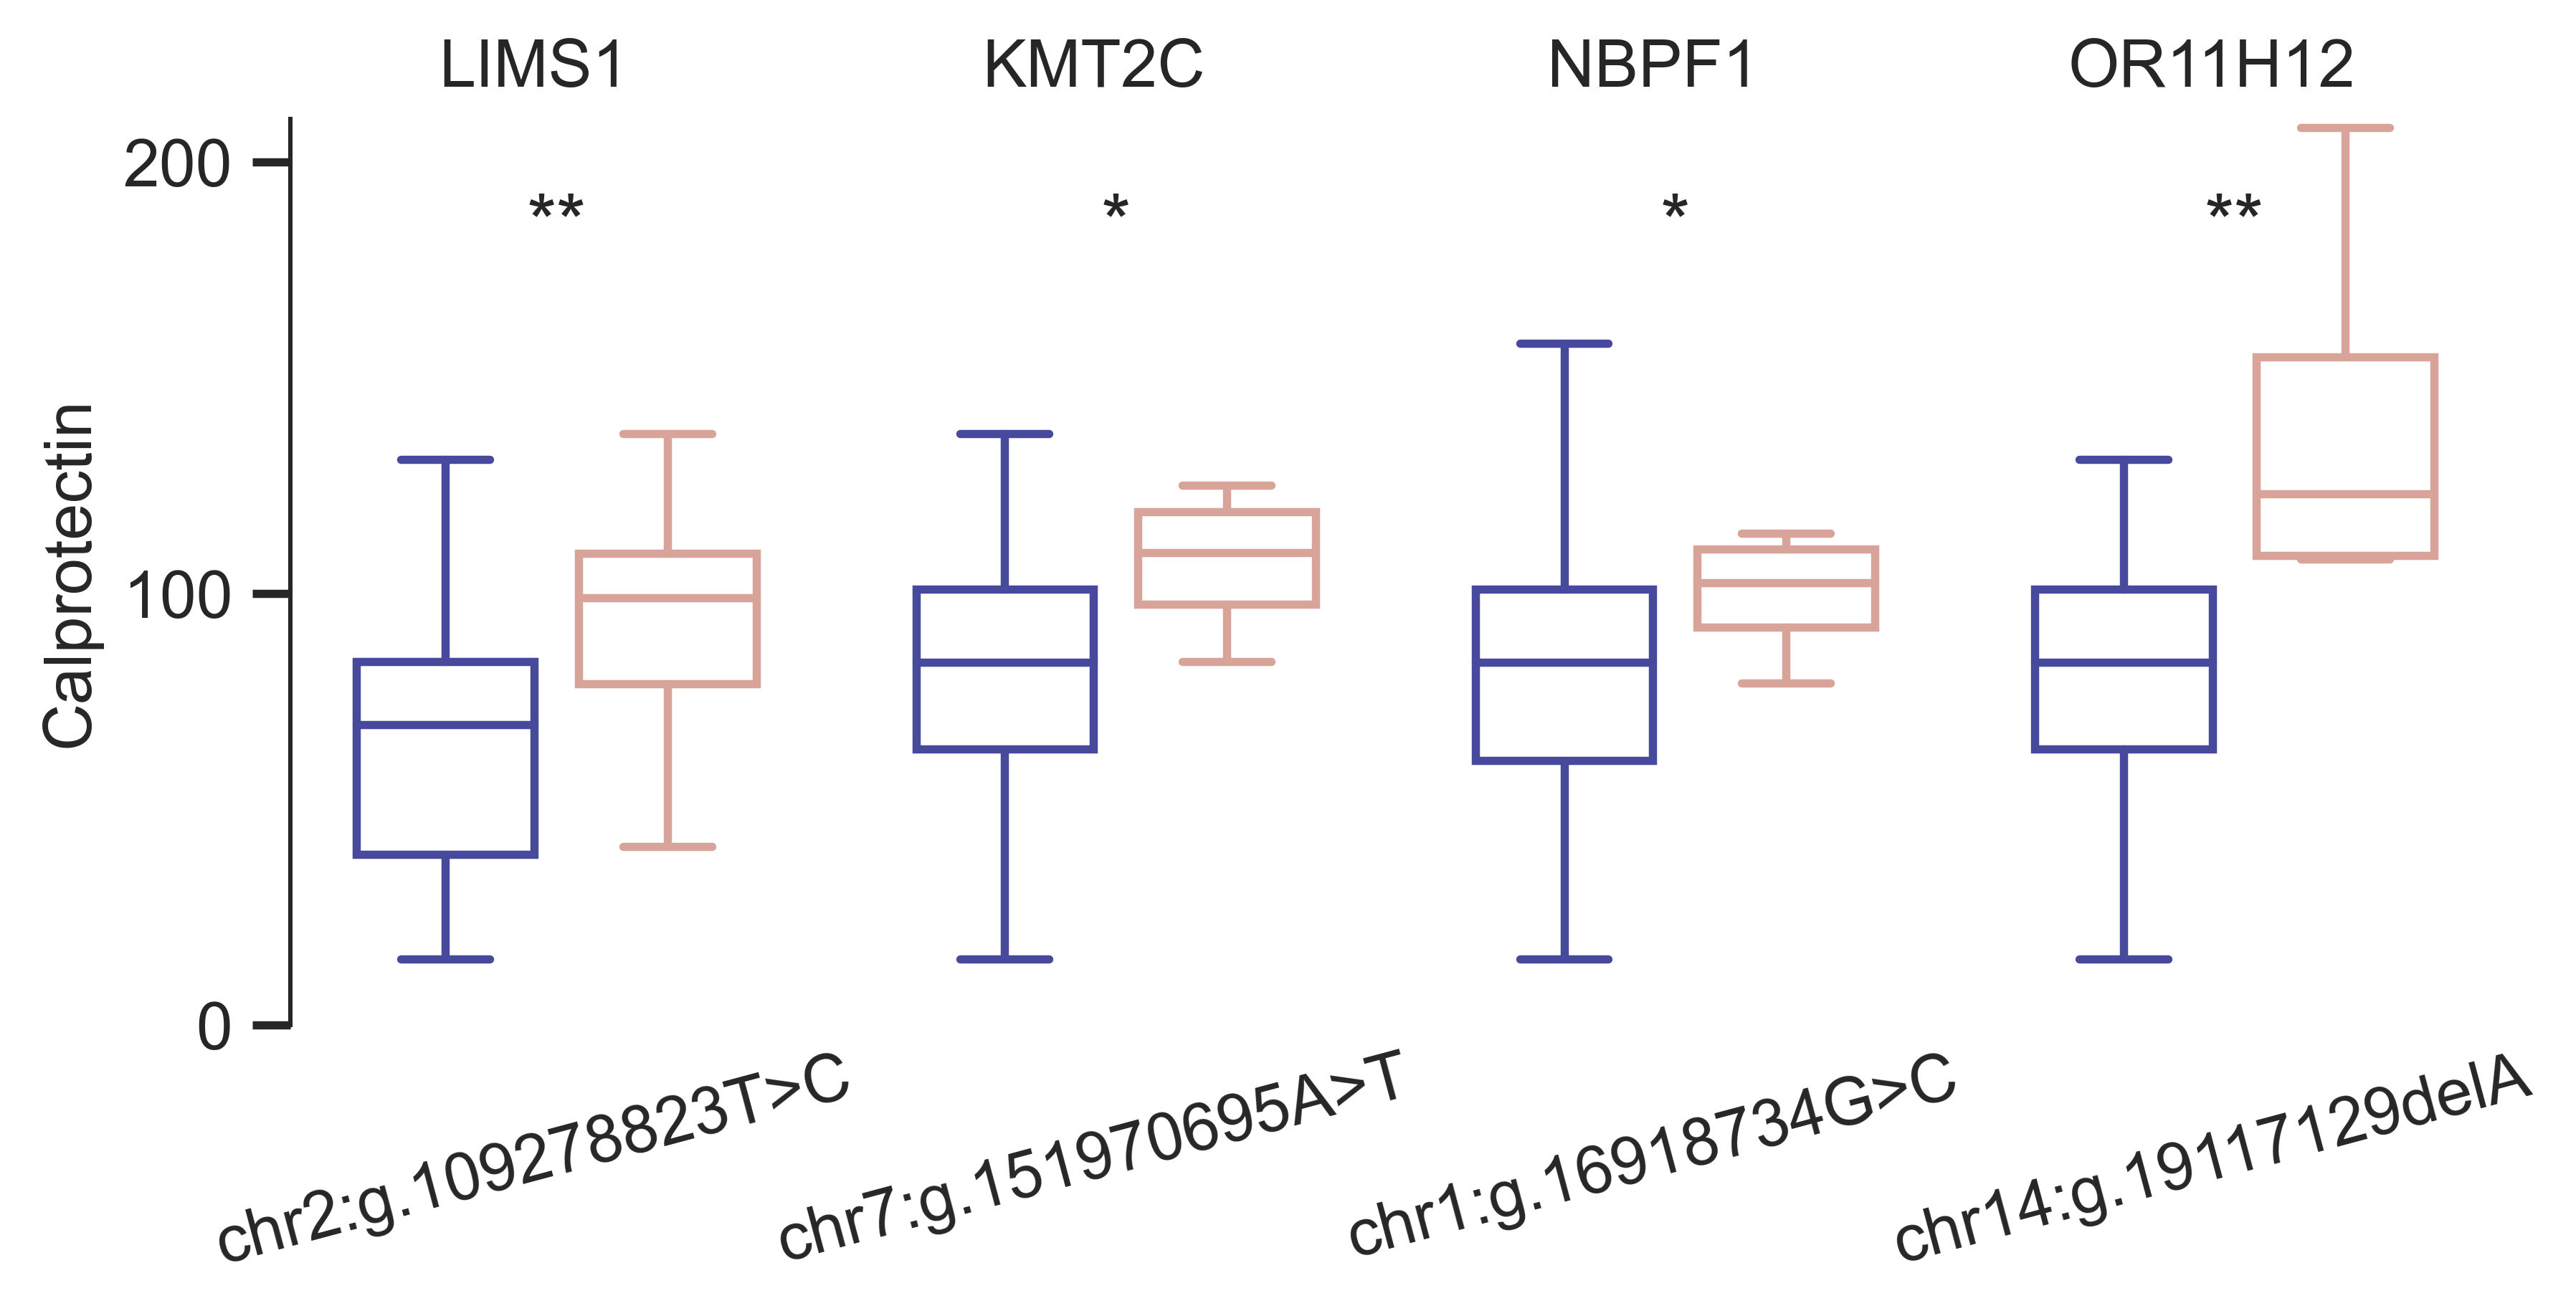

In [1008]:
listA=result_list
plt.rcParams['font.family'] = 'Arial'
plt.subplots(figsize=(15,3.5),dpi=550)
for j,i in enumerate([
 'chr2-109278823-109278823-T-C-LIMS1',
 'chr7-151970695-151970695-A-T-KMT2C',
 'chr1-16918734-16918734-G-C-NBPF1',
 'chr14-19117129-19117129-A---OR11H12']
                      ):
    plt.subplot(1,10,j+1)

    colors=['grey','red']
    clsls=['nonmutant','mut']
    data=[ 
    targetdf4[targetdf4[ i ]=='nonmutant'][ '钙卫蛋白' ].dropna().tolist(),
    targetdf4[targetdf4[ i ]==      'mut'][ '钙卫蛋白' ].dropna().tolist(),
    ]
    colors =['#46499c','#d8a398']
    wkls1=[]
    wkls2=[]
    for num, d in enumerate(data):
        box=plt.boxplot(d, positions=[num + 1], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor='white',edgecolor =colors[num],linewidth=1.5),
                    medianprops=dict(color=colors[num],linewidth=1.5),
                    whiskerprops={'color': colors[num],'linewidth':1.5},
                    capprops={'color': colors[num],'linewidth':1.5},
                    flierprops=dict(marker='o', color='black', markersize=0))
        
        lower_whisker = box['whiskers'][0].get_ydata()[1]        upper_whisker = box['whiskers'][1].get_ydata()[1]        wkls1.append(lower_whisker)
        wkls2.append(upper_whisker)

    plt.ylim(np.min(wkls1)*0.9-0.1*np.max(wkls2),np.max(wkls2)*1.1)

    u_statistic, p_value = stats.mannwhitneyu(data[0],data[1],alternative='less')
    if p_value>0.05:
        star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
        star='*'
    elif (p_value <=0.01) &(p_value >0.001):
        star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
        star='***'
    else:
        star='****'
    plt.text(1.5,180, star, ha='center', fontsize=14)
    plt.title(i.split('-')[-1], fontsize=12)
    plt.xticks([])
    plt.ylabel(eng_chi_dict['钙卫蛋白'],fontsize=12)
    plt.xlim(0.3,len(clsls)+0.5)
    plt.ylim(-0,210)
    plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
    if i =='chr14-19117129-19117129-A---OR11H12':
        plt.xlabel('chr14:g.19117129delA', fontsize=12,rotation=15)
    else:
        plt.xlabel(loci_dict3[i], fontsize=12,rotation=15)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.yticks([0,100,200])
    if j>0:
        plt.gca().spines['left'].set_visible(False)
        plt.yticks([])
        plt.ylabel('', fontsize=12)
plt.tight_layout()
plt.savefig('Fig3C1.pdf', bbox_inches='tight')
plt.show()

In [101]:
gutdf[gutdf['indicator']=='分泌型免疫球蛋白']['geneloci'].tolist()

['chr15-20868230-20868230-T-C-GOLGA8CP',
 'chr3-195709088-195709088-T-C-SDHAP1',
 'chr15-20868230-20868230-T-C-NBEAP1',
 'chr11-18290636-18290636-A-T-SAA1']

In [102]:
targetdf5=merged_df[['chr15-20868230-20868230-T-C-GOLGA8CP',
 'chr3-195709088-195709088-T-C-SDHAP1',
 'chr15-20868230-20868230-T-C-NBEAP1',
 'chr11-18290636-18290636-A-T-SAA1','分泌型免疫球蛋白']]

In [103]:
targetdf4=merged_df[['chr14-20147838-20147838-A-G-OR11H2',
 'chr2-109278823-109278823-T-C-LIMS1',
 'chr14-20147838-20147838-A-G-POTEM',
 'chr7-151970695-151970695-A-T-KMT2C',
 'chr1-16918734-16918734-G-C-NBPF1',
 'chr14-19117129-19117129-A---OR11H12',
 'chr1-16890320-16890320-T-C-NBPF1','钙卫蛋白']]

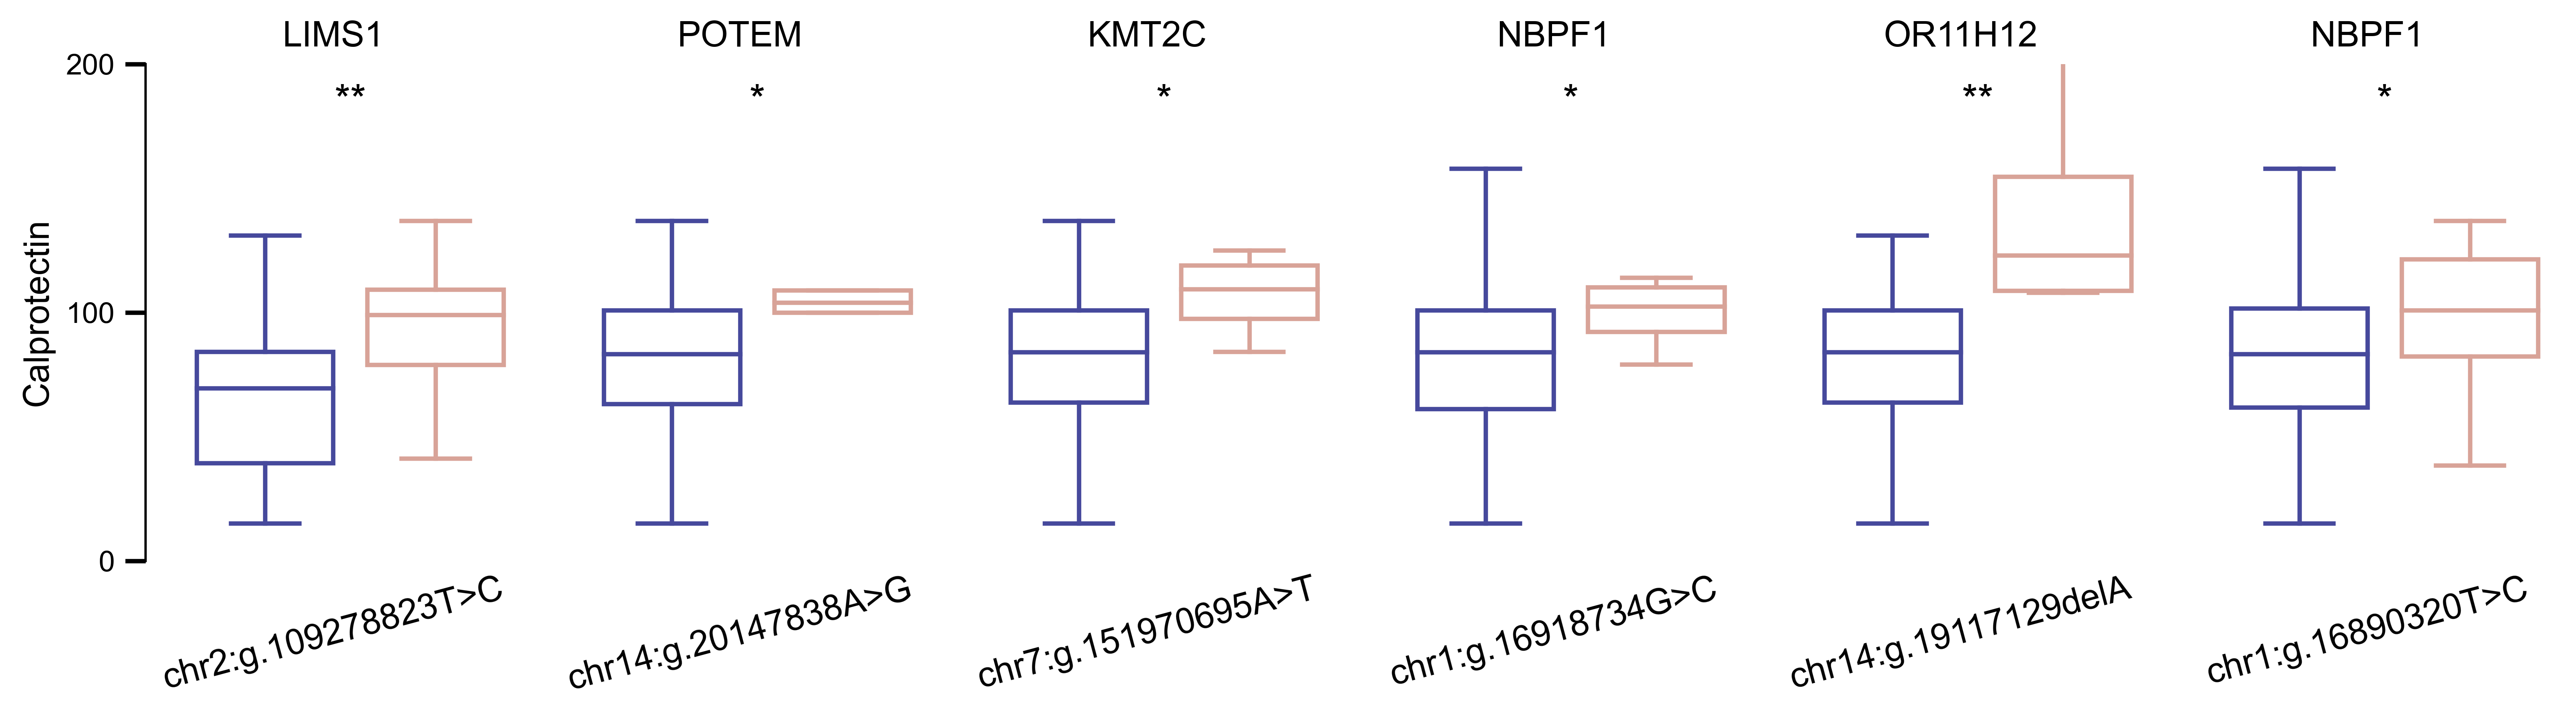

In [105]:
listA=result_list
plt.rcParams["font.family"] = "Arial"
plt.subplots(figsize=(20,3.5),dpi=550)
for j,i in enumerate([
 'chr2-109278823-109278823-T-C-LIMS1',
 'chr14-20147838-20147838-A-G-POTEM',
 'chr7-151970695-151970695-A-T-KMT2C',
 'chr1-16918734-16918734-G-C-NBPF1',
 'chr14-19117129-19117129-A---OR11H12',
 'chr1-16890320-16890320-T-C-NBPF1']
                      ):
    plt.subplot(1,10,j+1)

    colors=['grey','red']
    clsls=['nonmutant','mut']
    data=[ 
    targetdf4[targetdf4[ i ]=='nonmutant'][ '钙卫蛋白' ].dropna().tolist(),
    targetdf4[targetdf4[ i ]==      'mut'][ '钙卫蛋白' ].dropna().tolist(),
    ]
    colors =['#46499c','#d8a398']
    wkls1=[]
    wkls2=[]
    for num, d in enumerate(data):
        box=plt.boxplot(d, positions=[num + 1], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor='white',edgecolor =colors[num],linewidth=1.5),
                    medianprops=dict(color=colors[num],linewidth=1.5),
                    whiskerprops={'color': colors[num],'linewidth':1.5},
                    capprops={'color': colors[num],'linewidth':1.5},
                    flierprops=dict(marker='o', color='black', markersize=0))
        
        lower_whisker = box['whiskers'][0].get_ydata()[1]        upper_whisker = box['whiskers'][1].get_ydata()[1]        wkls1.append(lower_whisker)
        wkls2.append(upper_whisker)

    plt.ylim(np.min(wkls1)*0.9-0.1*np.max(wkls2),np.max(wkls2)*1.1)

    u_statistic, p_value = stats.mannwhitneyu(data[0],data[1],alternative='less')
    if p_value>0.05:
        star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
        star='*'
    elif (p_value <=0.01) &(p_value >0.001):
        star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
        star='***'
    else:
        star='****'
    plt.text(1.5,180, star, ha='center', fontsize=14)
    plt.title(i.split('-')[-1], fontsize=12)
    plt.xticks([])
    plt.ylabel(eng_chi_dict['钙卫蛋白'],fontsize=12)
    plt.xlim(0.3,len(clsls)+0.5)
    plt.ylim(-0,200)
    plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
    if i =='chr14-19117129-19117129-A---OR11H12':
        plt.xlabel('chr14:g.19117129delA', fontsize=12,rotation=15)
    else:
        plt.xlabel(loci_dict3[i], fontsize=12,rotation=15)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.yticks([0,100,200])
    if j>0:
        plt.gca().spines['left'].set_visible(False)
        plt.yticks([])
        plt.ylabel('', fontsize=12)
plt.tight_layout()
plt.show()

In [106]:
targetdf4=merged_df[['chr14-20147838-20147838-A-G-OR11H2',
 'chr2-109278823-109278823-T-C-LIMS1',
 'chr14-20147838-20147838-A-G-POTEM',
 'chr7-151970695-151970695-A-T-KMT2C',
 'chr1-16918734-16918734-G-C-NBPF1',
 'chr14-19117129-19117129-A---OR11H12',
 'chr1-16890320-16890320-T-C-NBPF1','钙卫蛋白']]

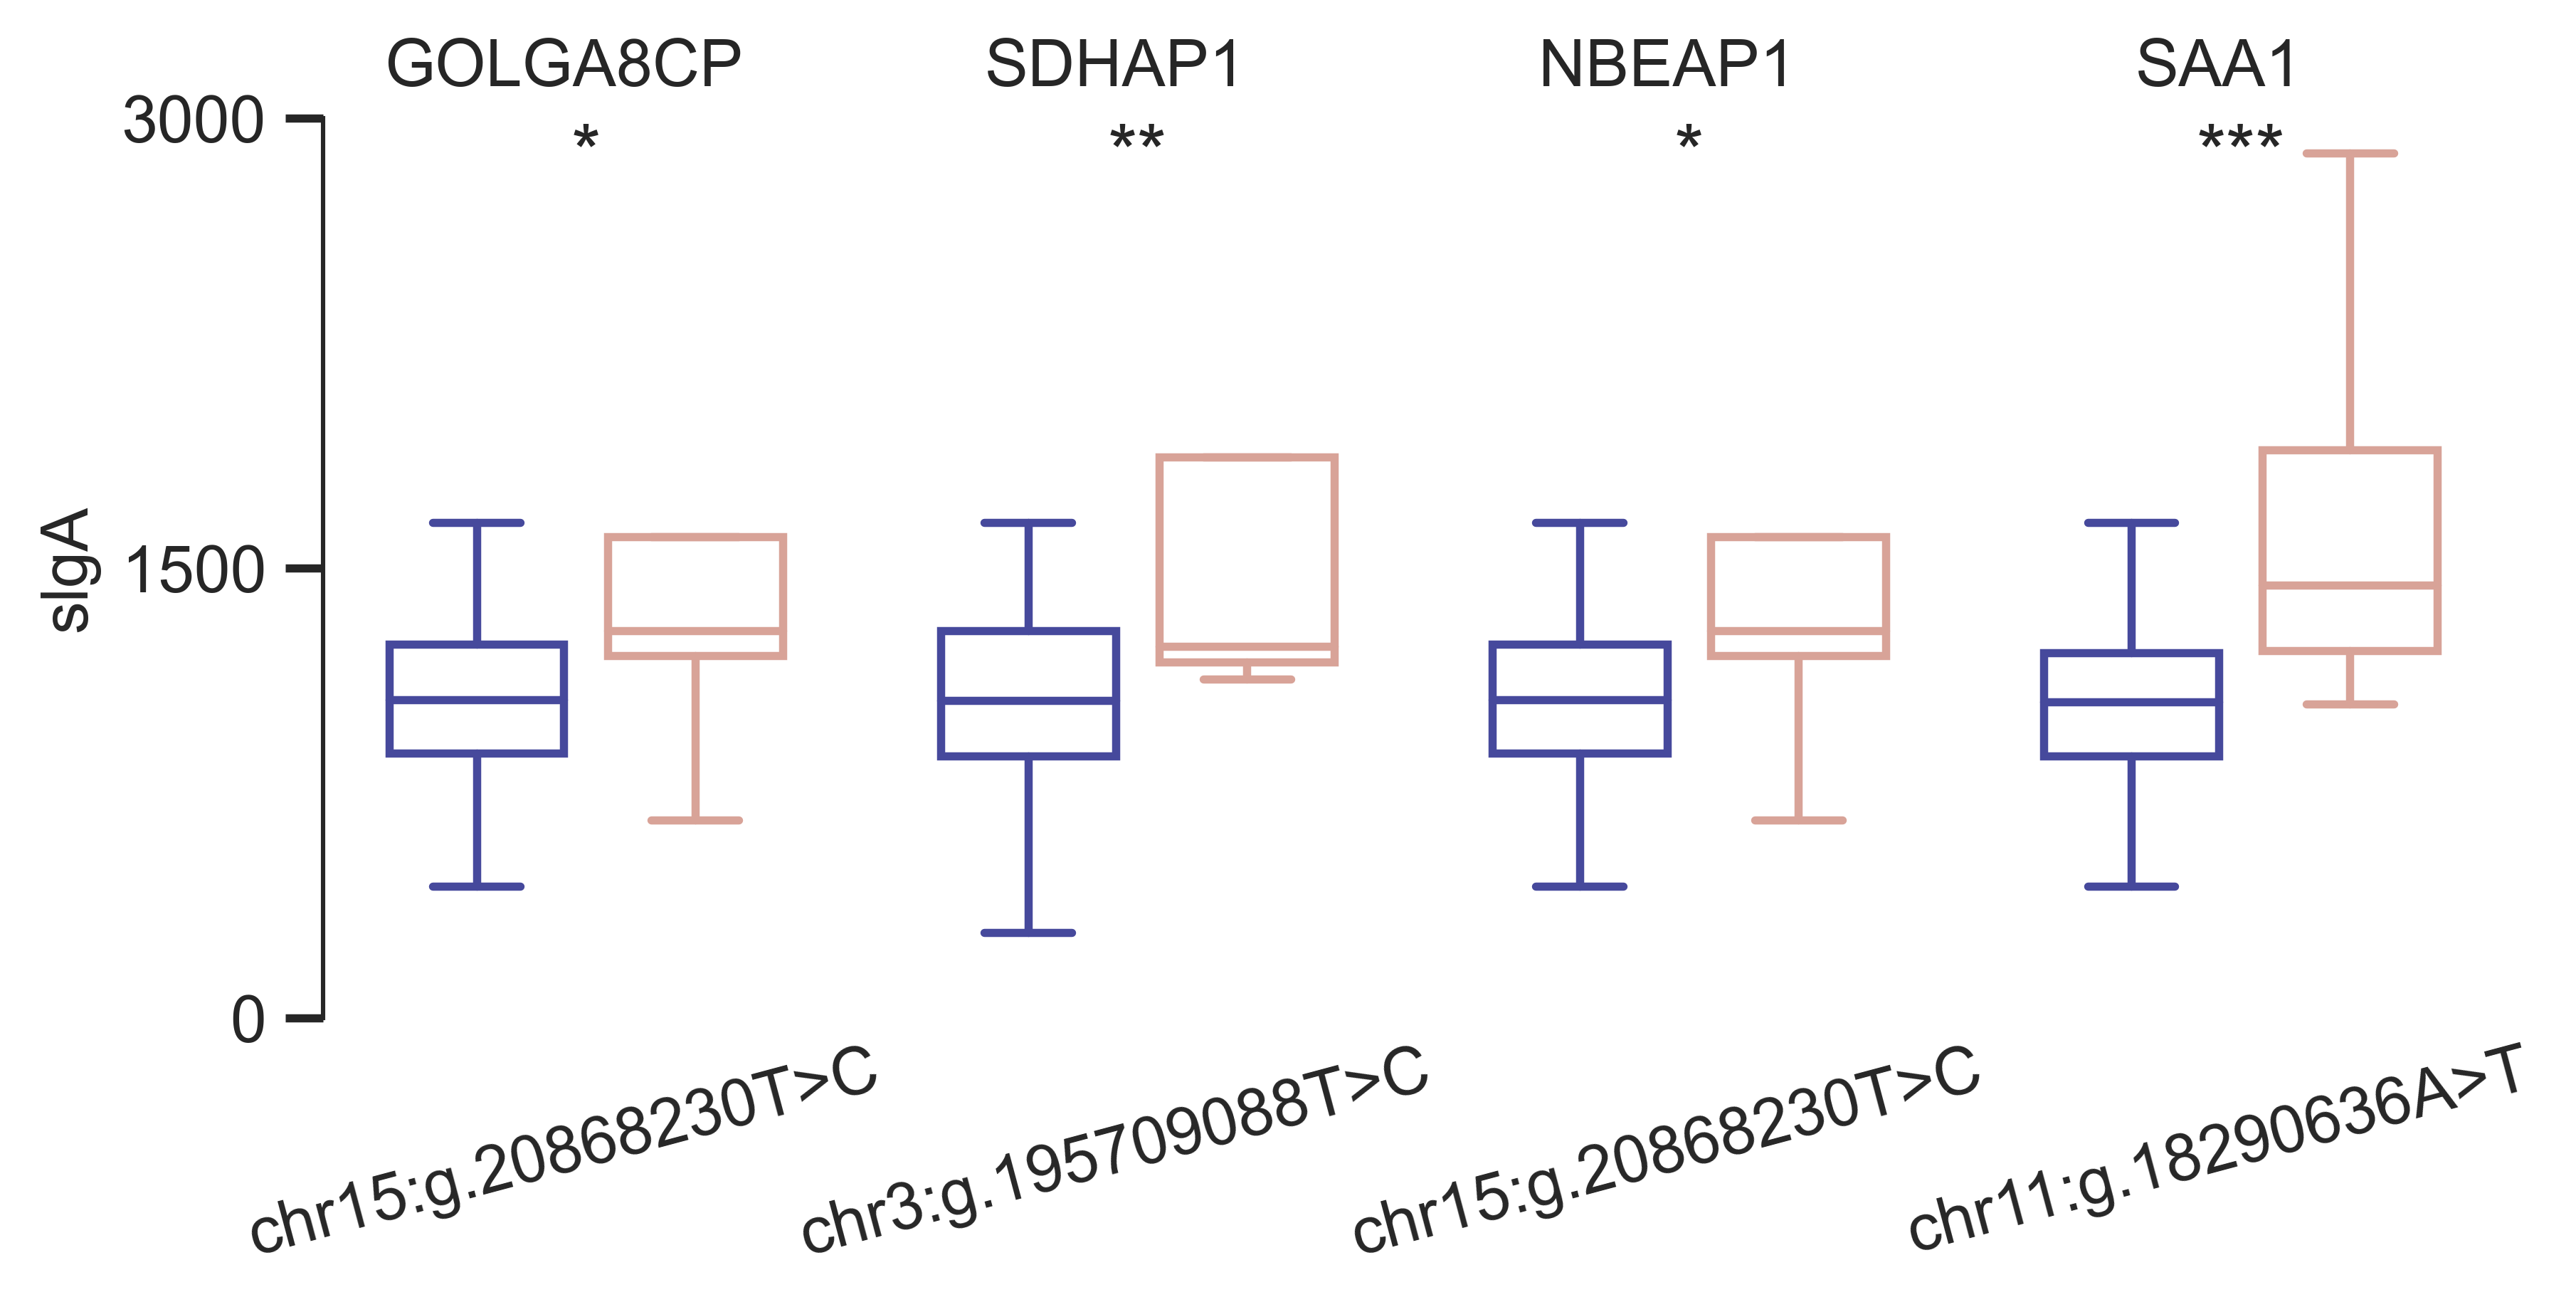

In [1009]:
listA=result_list
plt.rcParams['font.family'] = 'Arial'
plt.subplots(figsize=(15,3.5),dpi=550)
for j,i in enumerate(['chr15-20868230-20868230-T-C-GOLGA8CP',
 'chr3-195709088-195709088-T-C-SDHAP1',
 'chr15-20868230-20868230-T-C-NBEAP1',
 'chr11-18290636-18290636-A-T-SAA1']
                      ):
    plt.subplot(1,10,j+1)
   
    colors=['grey','red']
    clsls=['nonmutant','mut']
    
    data=[ 
    targetdf5[targetdf5[ i ]=='nonmutant'][ '分泌型免疫球蛋白' ].dropna().tolist(),
    targetdf5[targetdf5[ i ]==      'mut'][ '分泌型免疫球蛋白' ].dropna().tolist(),
    ]
    colors =['#46499c','#d8a398']
    wkls1=[]
    wkls2=[]
    for num, d in enumerate(data):
        box=plt.boxplot(d, positions=[num + 1], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor='white',edgecolor =colors[num],linewidth=1.5),
                    medianprops=dict(color=colors[num],linewidth=1.5),
                    whiskerprops={'color': colors[num],'linewidth':1.5},
                    capprops={'color': colors[num],'linewidth':1.5},
                    flierprops=dict(marker='o', color='black', markersize=0))
        
        lower_whisker = box['whiskers'][0].get_ydata()[1]        upper_whisker = box['whiskers'][1].get_ydata()[1]        wkls1.append(lower_whisker)
        wkls2.append(upper_whisker)

    plt.ylim(np.min(wkls1)*0.9-0.1*np.max(wkls2),np.max(wkls2)*1.1)

    u_statistic, p_value = stats.mannwhitneyu(data[0],data[1],alternative='less')
    if p_value>0.05:
        star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
        star='*'
    elif (p_value <=0.01) &(p_value >0.001):
        star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
        star='***'
    else:
        star='****'
    plt.text(1.5,2800, star, ha='center', fontsize=14)
    plt.title(i.split('-')[-1], fontsize=12)
    plt.xticks([])
    plt.ylabel(eng_chi_dict['分泌型免疫球蛋白'],fontsize=12)
    plt.xlim(0.3,len(clsls)+0.5)
    plt.ylim(-0,3000)
    plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
    plt.xlabel(loci_dict3[i], fontsize=12,rotation=15)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.yticks([0,1500,3000])
    if j>0:
        plt.gca().spines['left'].set_visible(False)
        plt.yticks([])
        plt.ylabel('', fontsize=12)
plt.tight_layout()
plt.savefig('Fig3C2.pdf', bbox_inches='tight')
plt.show()

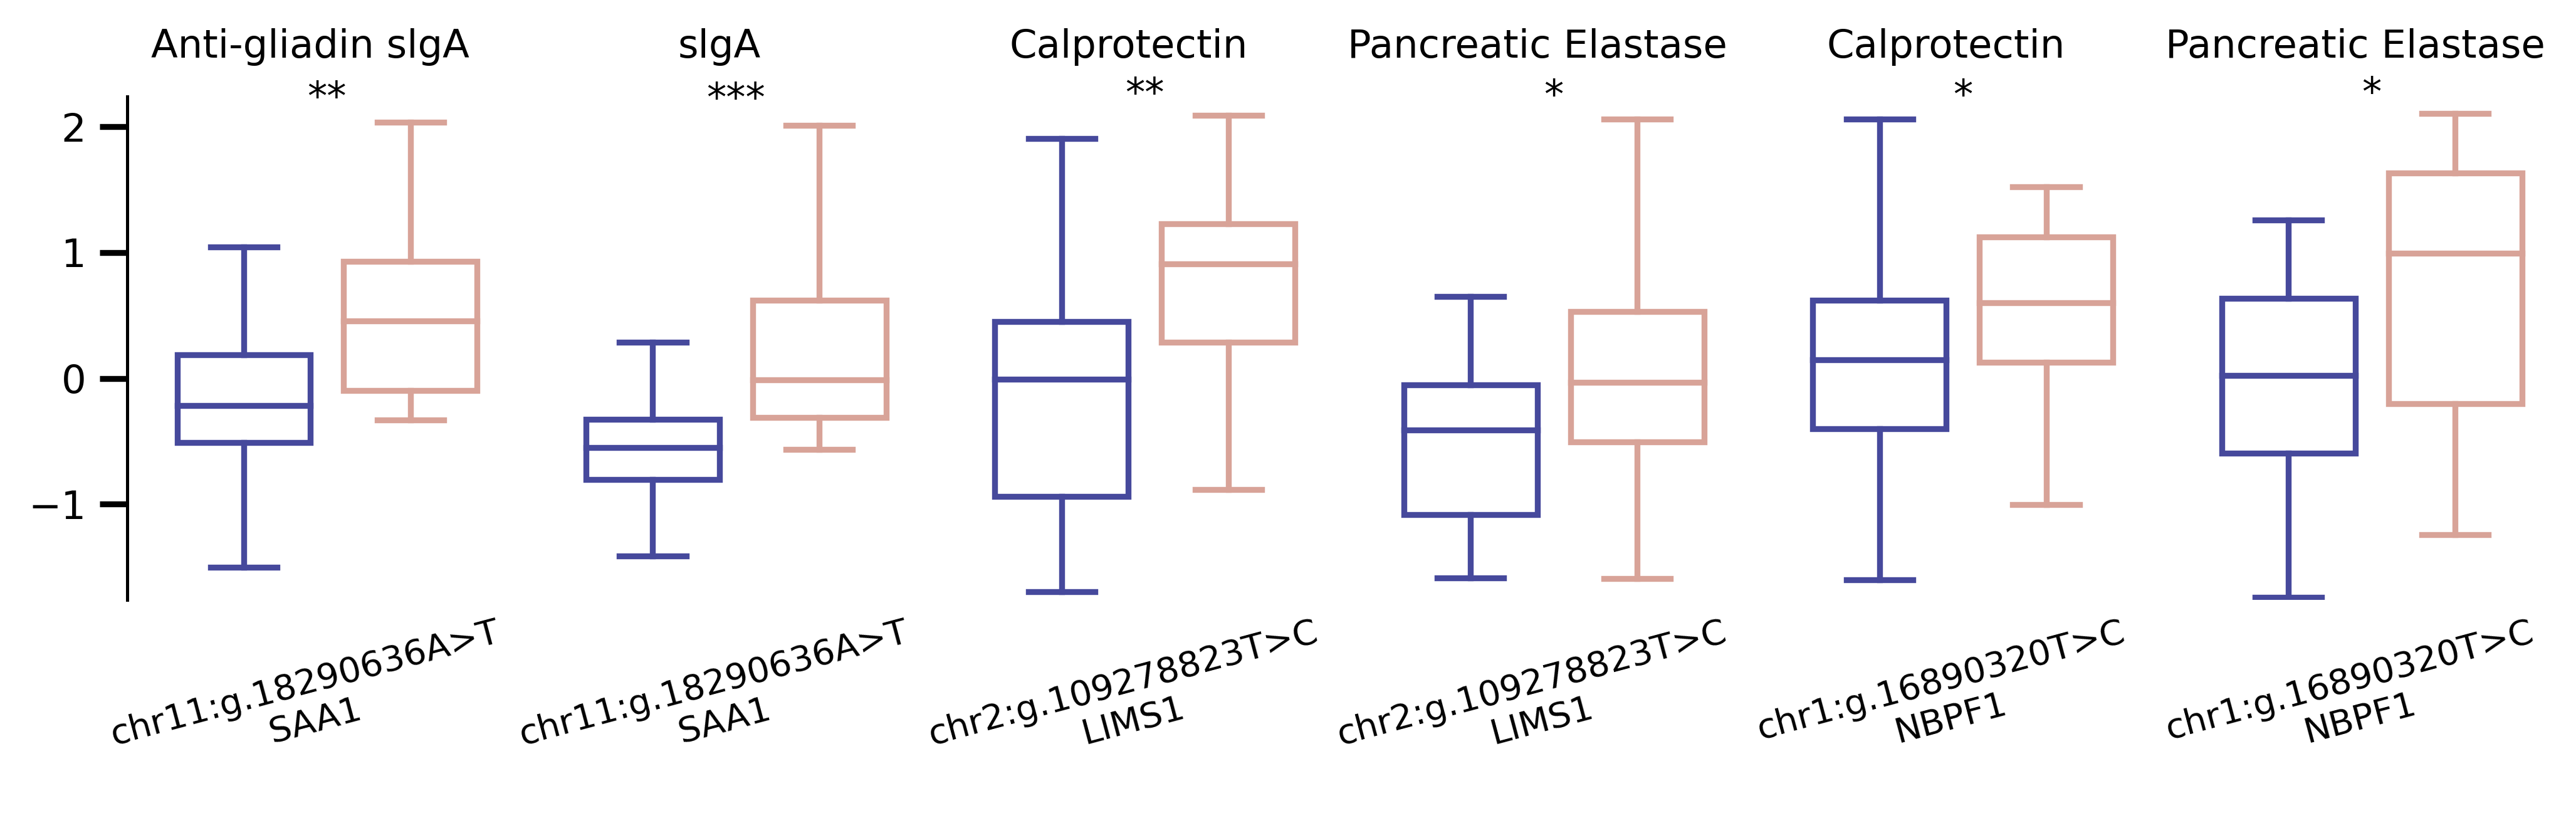

In [880]:
"""listA=result_list

plt.subplots(figsize=(15,3),dpi=450)
count=0
for j,i in enumerate(['chr11-18290636-18290636-A-T-SAA1','chr2-109278823-109278823-T-C-LIMS1','chr1-16890320-16890320-T-C-NBPF1']
                      ):
    for indicator in gutdf[gutdf['geneloci'].str.contains(i)]['indicator'].tolist():
        
        count+=1
        plt.subplot(1,10,count)
        plt.rcParams['font.family'] = 'Arial'
        colors=['grey','red']
        clsls=['nonmutant','mut']

        data=[ 
        scaled_df2[scaled_df2[ i ]=='nonmutant'][ indicator ].dropna().tolist(),
        scaled_df2[scaled_df2[ i ]==      'mut'][ indicator ].dropna().tolist(),
        ]
        colors =['#46499c','#d8a398']
        wkls1=[]
        wkls2=[]
        for num, d in enumerate(data):
            box=plt.boxplot(d, positions=[num + 1], widths=0.8, patch_artist=True,
                        boxprops=dict(facecolor='white',edgecolor =colors[num],linewidth=1.5),
                        medianprops=dict(color=colors[num],linewidth=1.5),
                        whiskerprops={'color': colors[num],'linewidth':1.5},
                        capprops={'color': colors[num],'linewidth':1.5},
                        flierprops=dict(marker='o', color='black', markersize=0))

            lower_whisker = box['whiskers'][0].get_ydata()[1]            upper_whisker = box['whiskers'][1].get_ydata()[1]            wkls1.append(lower_whisker)
            wkls2.append(upper_whisker)

        plt.ylim(np.min(wkls1)*0.9-0.2*np.max(wkls2),np.max(wkls2)*1.1)

        u_statistic, p_value = stats.mannwhitneyu(data[0],data[1],alternative='less')
        if p_value>0.05:
            star='n.s.'
        elif (p_value <=0.05) &(p_value >0.01):
            star='*'
        elif (p_value <=0.01) &(p_value >0.001):
            star='**'
        elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
        else:
            star='****'
        plt.text(1.5, np.max(wkls2)*1.05, star, ha='center', fontsize=10)
        plt.xticks([])
        plt.xlim(0.3,len(clsls)+0.5)
        plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
        plt.xlabel(loci_dict2[i]+'\n'+i.split('-')[-1], fontsize=9,rotation=15)
        plt.title(eng_chi_dict[indicator], fontsize=10,pad=10)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)

        if count>1:
            plt.gca().spines['left'].set_visible(False)
            plt.yticks([])
            plt.ylabel('', fontsize=10)
        plt.tight_layout()
plt.show()"""

## 免疫与基因突变的关系

In [928]:
import pandas as pd
from scipy import stats

gene_sites = alldata_pivot.columns[187:475]indicators = cytokine
df=merged_df
t_test_results = {}

for gene_site in gene_sites:
    mutant_data = df[df[gene_site] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = df[df[gene_site] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    gene_site_results = {}
    
    for indicator in indicators:
        mutant_indicator_data = mutant_data[indicator].dropna()
        nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        
        if len(mutant_indicator_data) > 1 and len(nonmutant_indicator_data) > 1:
            t_stat, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
            gene_site_results[indicator] = {'t_stat': t_stat, 'p_value': p_value}
        else:
            gene_site_results[indicator] = {'t_stat': None, 'p_value': None}
    
    t_test_results[gene_site] = gene_site_results

In [929]:
significant_results = {}

for gene_site, indicator_results in t_test_results.items():
    significant_indicators = {}
    
    for indicator, stats1 in indicator_results.items():
        if str(stats1['p_value']) !='None':
            if stats1['p_value'] < 0.05:
                significant_indicators[indicator] = stats1
    
    if significant_indicators:
        significant_results[gene_site] = significant_indicators

result_list = []
 
for gene_site, indicators in significant_results.items():
    for indicator, stats1 in indicators.items():
        result_list.append([gene_site, indicator, stats1['p_value']])
 
for item in result_list:
    print(item)

['chr2-130988410-130988410-G-A-TUBA3E', '干扰素α', 0.04411474261725093]
['chr2-130988410-130988410-G-A-TUBA3E', '肿瘤坏死因子', 0.019556987909481564]
['chr2-130988410-130988410-G-A-TUBA3E', '白介素1β', 0.008432966153128154]
['chr2-130988410-130988410-G-A-TUBA3E', '白介素10', 0.005121009308096141]
['chr2-130988410-130988410-G-A-TUBA3E', '白介素6', 0.04887338541852718]
['chr1-16976193-16976193-C-T-MST1P2', '干扰素α', 0.018956880318815747]
['chr1-16976193-16976193-C-T-MST1P2', '肿瘤坏死因子', 0.012468329923334114]
['chr1-16976193-16976193-C-T-MST1P2', '白介素1β', 0.03882788251857387]
['chr15-21937964-21937964-A-G-LOC646214', '肿瘤坏死因子', 0.0047832770860709115]
['chr15-21937964-21937964-A-G-LOC646214', '白介素12', 0.001677599230285619]
['chr15-21937964-21937964-A-G-LOC646214', '白介素10', 0.004072347910819138]
['chr15-21937964-21937964-A-G-LOC646214', '白介素8', 0.020511309541939922]
['chr15-21937964-21937964-A-G-LOC646214', '白介素4', 0.025044791387825293]
['chr15-21937964-21937964-A-G-LOC646214', '白介素2', 0.04587121811728075]
['chr1

In [930]:
significantdf4=pd.DataFrame(result_list,columns=['geneloci','indicator','p_value'])

significantdf4

geneloci indicator   p_value
0        chr2-130988410-130988410-G-A-TUBA3E      干扰素α  0.044115
1        chr2-130988410-130988410-G-A-TUBA3E    肿瘤坏死因子  0.019557
2        chr2-130988410-130988410-G-A-TUBA3E     白介素1β  0.008433
3        chr2-130988410-130988410-G-A-TUBA3E     白介素10  0.005121
4        chr2-130988410-130988410-G-A-TUBA3E      白介素6  0.048873
..                                       ...       ...       ...
190         chr16-70165793-70165793-G-C-PDPR      白介素8  0.011727
191         chr16-70165793-70165793-G-C-PDPR      白介素4  0.005045
192  chr14-106919301-106919301-T-C-LINC00226      白介素4  0.030201
193     chr1-206567084-206567084-C-T-SRGAP2D      干扰素α  0.042319
194     chr1-206567084-206567084-C-T-SRGAP2D      白介素5  0.035829

[195 rows x 3 columns]

In [931]:
def format_gene2(row):
    parts = row.split('-')    chrom = parts[0]    pos = parts[1]    ref = parts[3]    alt = parts[4]    return f"{chrom}:g.{pos}{ref}>{alt}"
significantdf4['gene2_formatted'] = significantdf4['geneloci'].apply(format_gene2)

significantdf4

geneloci indicator   p_value  \
0        chr2-130988410-130988410-G-A-TUBA3E      干扰素α  0.044115   
1        chr2-130988410-130988410-G-A-TUBA3E    肿瘤坏死因子  0.019557   
2        chr2-130988410-130988410-G-A-TUBA3E     白介素1β  0.008433   
3        chr2-130988410-130988410-G-A-TUBA3E     白介素10  0.005121   
4        chr2-130988410-130988410-G-A-TUBA3E      白介素6  0.048873   
..                                       ...       ...       ...   
190         chr16-70165793-70165793-G-C-PDPR      白介素8  0.011727   
191         chr16-70165793-70165793-G-C-PDPR      白介素4  0.005045   
192  chr14-106919301-106919301-T-C-LINC00226      白介素4  0.030201   
193     chr1-206567084-206567084-C-T-SRGAP2D      干扰素α  0.042319   
194     chr1-206567084-206567084-C-T-SRGAP2D      白介素5  0.035829   

          gene2_formatted  
0     chr2:g.130988410G>A  
1     chr2:g.130988410G>A  
2     chr2:g.130988410G>A  
3     chr2:g.130988410G>A  
4     chr2:g.130988410G>A  
..                    ...  
190   chr16:g.70165793G>C  
191   chr16:g.70165793G>C  
192  chr14:g.106919301T>C  
193   chr1:g.206567084C>T  
194   chr1:g.206567084C>T  

[195 rows x 4 columns]

In [932]:
immunelist=significantdf4['indicator'].tolist()
immunelist=list(set(immunelist))
immunelist

['白介素6',
 '白介素17',
 '干扰素γ',
 '白介素8',
 '白介素2',
 '白介素5',
 '干扰素α',
 '白介素4',
 '白介素12',
 '肿瘤坏死因子',
 '白介素1β',
 '白介素10']

In [933]:
immunelist

['白介素6',
 '白介素17',
 '干扰素γ',
 '白介素8',
 '白介素2',
 '白介素5',
 '干扰素α',
 '白介素4',
 '白介素12',
 '肿瘤坏死因子',
 '白介素1β',
 '白介素10']

In [934]:
significantdf4['geneloci'].drop_duplicates()

0          chr2-130988410-130988410-G-A-TUBA3E
5            chr1-16976193-16976193-C-T-MST1P2
8        chr15-21937964-21937964-A-G-LOC646214
14         chr14-19114642-19114642-A-G-OR11H12
15      chr1-143743325-143743325-C-A-LINC01138
                        ...                   
185        chr13-24893113-24893113-C-T-C1QTNF9
187           chr16-21747881-21747881-G-A-OTOA
188           chr16-70165793-70165793-G-C-PDPR
192    chr14-106919301-106919301-T-C-LINC00226
193       chr1-206567084-206567084-C-T-SRGAP2D
Name: geneloci, Length: 81, dtype: object

In [935]:
significantdf4['indicator'].drop_duplicates()

0       干扰素α
1     肿瘤坏死因子
2      白介素1β
3      白介素10
4       白介素6
9      白介素12
11      白介素8
12      白介素4
13      白介素2
14      白介素5
30     白介素17
70      干扰素γ
Name: indicator, dtype: object

In [936]:
immunedf=significantdf4[significantdf4['indicator'].isin(cytokine)]

In [937]:
immunedf

geneloci indicator   p_value  \
0        chr2-130988410-130988410-G-A-TUBA3E      干扰素α  0.044115   
1        chr2-130988410-130988410-G-A-TUBA3E    肿瘤坏死因子  0.019557   
2        chr2-130988410-130988410-G-A-TUBA3E     白介素1β  0.008433   
3        chr2-130988410-130988410-G-A-TUBA3E     白介素10  0.005121   
4        chr2-130988410-130988410-G-A-TUBA3E      白介素6  0.048873   
..                                       ...       ...       ...   
190         chr16-70165793-70165793-G-C-PDPR      白介素8  0.011727   
191         chr16-70165793-70165793-G-C-PDPR      白介素4  0.005045   
192  chr14-106919301-106919301-T-C-LINC00226      白介素4  0.030201   
193     chr1-206567084-206567084-C-T-SRGAP2D      干扰素α  0.042319   
194     chr1-206567084-206567084-C-T-SRGAP2D      白介素5  0.035829   

          gene2_formatted  
0     chr2:g.130988410G>A  
1     chr2:g.130988410G>A  
2     chr2:g.130988410G>A  
3     chr2:g.130988410G>A  
4     chr2:g.130988410G>A  
..                    ...  
190   chr16:g.70165793G>C  
191   chr16:g.70165793G>C  
192  chr14:g.106919301T>C  
193   chr1:g.206567084C>T  
194   chr1:g.206567084C>T  

[195 rows x 4 columns]

In [938]:
immunedf['geneloci'].value_counts().iloc[:30]


chr1-16953672-16953672-C-T-CROCCP2                                                                                                  7
chr1-16972920-16972920-C-T-MST1P2                                                                                                   7
chr1-16969246-16969246-G-A-CROCCP2                                                                                                  6
chr15-21937964-21937964-A-G-LOC646214                                                                                               6
chr1-16973606-16973606-G-T-MST1P2                                                                                                   6
chr1-144994902-144994902-G-A-LOC100996724                                                                                           6
chr1-16969246-16969246-G-A-MST1P2                                                                                                   6
chr2-97749417-97749417-C-T-FAHD2B                             

In [293]:
chr1-16953672-16953672-C-T-CROCCP2           7
chr1-16969246-16969246-G-A-CROCCP2           6

chr2-130988410-130988410-G-A-TUBA3E          5通过对预先筛选的多重近亲家系进行全外显子组测序，加速神经遗传学疾病中新的候选基因发现
chr2-130988410-130988410-G-A-CCDC115         5ok

chr16-70165793-70165793-G-C-PDPR             4
chr1-148903313-148903313-T-C-LOC101060524    3
chr15-21937168-21937168-C-T-LOC646214        3
chr1-148903313-148903313-T-C-DRD5P2          3
chr17-16624049-16624049-T-C-CCDC144A         3
chr1-16976193-16976193-C-T-MST1P2            3
chr16-33534075-33534075-C-T-LOC390705        2
chr1-148021700-148021700-G-A-LOC100996740    2
chr1-120539213-120539213-G-T-NOTCH2NLC       2
chr13-24893113-24893113-C-T-C1QTNF9          2
Name: geneloci, dtype: int64

SyntaxError: invalid syntax (1782839553.py, line 1)

In [939]:
significantdf4[significantdf4['geneloci']=='chr2-130988410-130988410-G-A-TUBA3E']

geneloci indicator   p_value  \
0  chr2-130988410-130988410-G-A-TUBA3E      干扰素α  0.044115   
1  chr2-130988410-130988410-G-A-TUBA3E    肿瘤坏死因子  0.019557   
2  chr2-130988410-130988410-G-A-TUBA3E     白介素1β  0.008433   
3  chr2-130988410-130988410-G-A-TUBA3E     白介素10  0.005121   
4  chr2-130988410-130988410-G-A-TUBA3E      白介素6  0.048873   

       gene2_formatted  
0  chr2:g.130988410G>A  
1  chr2:g.130988410G>A  
2  chr2:g.130988410G>A  
3  chr2:g.130988410G>A  
4  chr2:g.130988410G>A

In [940]:
immunedf[immunedf['geneloci']=="chr1-16953672-16953672-C-T-CROCCP2"]

geneloci indicator   p_value  \
108  chr1-16953672-16953672-C-T-CROCCP2      干扰素α  0.036801   
109  chr1-16953672-16953672-C-T-CROCCP2    肿瘤坏死因子  0.014013   
110  chr1-16953672-16953672-C-T-CROCCP2     白介素12  0.019046   
111  chr1-16953672-16953672-C-T-CROCCP2     白介素1β  0.006756   
112  chr1-16953672-16953672-C-T-CROCCP2     白介素10  0.002414   
113  chr1-16953672-16953672-C-T-CROCCP2      白介素6  0.003637   
114  chr1-16953672-16953672-C-T-CROCCP2      白介素5  0.008451   

        gene2_formatted  
108  chr1:g.16953672C>T  
109  chr1:g.16953672C>T  
110  chr1:g.16953672C>T  
111  chr1:g.16953672C>T  
112  chr1:g.16953672C>T  
113  chr1:g.16953672C>T  
114  chr1:g.16953672C>T

In [964]:
significantdf4[significantdf4['geneloci']=='chr16-70165793-70165793-G-C-PDPR']

geneloci indicator   p_value      gene2_formatted
188  chr16-70165793-70165793-G-C-PDPR     白介素12  0.006214  chr16:g.70165793G>C
189  chr16-70165793-70165793-G-C-PDPR     白介素1β  0.025489  chr16:g.70165793G>C
190  chr16-70165793-70165793-G-C-PDPR      白介素8  0.011727  chr16:g.70165793G>C
191  chr16-70165793-70165793-G-C-PDPR      白介素4  0.005045  chr16:g.70165793G>C

In [996]:
plot6=scaled_df2[['干扰素α',"肿瘤坏死因子",'白介素6','白介素12','chr1-16953672-16953672-C-T-CROCCP2']].\
melt(id_vars='chr1-16953672-16953672-C-T-CROCCP2')
plot6['eng']=plot6['variable'].map(eng_chi_dict)
plot6

chr1-16953672-16953672-C-T-CROCCP2 variable     value    eng
0                            nonmutant     干扰素α  0.401435  IFN-α
1                            nonmutant     干扰素α  0.057716  IFN-α
2                                  mut     干扰素α  0.911910  IFN-α
3                            nonmutant     干扰素α  1.109293  IFN-α
4                                  mut     干扰素α  5.581049  IFN-α
..                                 ...      ...       ...    ...
271                          nonmutant    白介素12  0.751299  IL-12
272                          nonmutant    白介素12  0.133460  IL-12
273                          nonmutant    白介素12  0.476704  IL-12
274                          nonmutant    白介素12 -1.102218  IL-12
275                          nonmutant    白介素12  0.614001  IL-12

[276 rows x 4 columns]

In [943]:
plot5=scaled_df2[['白介素1β','干扰素α','白介素6','肿瘤坏死因子','chr2-130988410-130988410-G-A-CCDC115']].\
melt(id_vars='chr2-130988410-130988410-G-A-CCDC115')
plot5['eng']=plot5['variable'].map(eng_chi_dict)
plot5

chr2-130988410-130988410-G-A-CCDC115 variable     value    eng
0                              nonmutant    白介素1β -0.224793  IL-1β
1                                    mut    白介素1β -0.290732  IL-1β
2                              nonmutant    白介素1β  2.154062  IL-1β
3                                    mut    白介素1β  0.287497  IL-1β
4                              nonmutant    白介素1β  4.877826  IL-1β
..                                   ...      ...       ...    ...
271                            nonmutant   肿瘤坏死因子 -0.215386    TNF
272                            nonmutant   肿瘤坏死因子  0.488067    TNF
273                            nonmutant   肿瘤坏死因子 -0.221830    TNF
274                            nonmutant   肿瘤坏死因子 -0.233644    TNF
275                            nonmutant   肿瘤坏死因子 -0.165984    TNF

[276 rows x 4 columns]

In [949]:
plot4=scaled_df2[['干扰素α','肿瘤坏死因子','白介素10','白介素6','chr2-130988410-130988410-G-A-TUBA3E']].\
melt(id_vars='chr2-130988410-130988410-G-A-TUBA3E')
plot4['eng']=plot4['variable'].map(eng_chi_dict)
plot4

chr2-130988410-130988410-G-A-TUBA3E variable     value    eng
0                             nonmutant     干扰素α  0.401435  IFN-α
1                                   mut     干扰素α  0.057716  IFN-α
2                             nonmutant     干扰素α  0.911910  IFN-α
3                                   mut     干扰素α  1.109293  IFN-α
4                             nonmutant     干扰素α  5.581049  IFN-α
..                                  ...      ...       ...    ...
271                           nonmutant     白介素6 -0.221712   IL-6
272                           nonmutant     白介素6 -0.415912   IL-6
273                           nonmutant     白介素6  0.030224   IL-6
274                           nonmutant     白介素6 -0.120238   IL-6
275                           nonmutant     白介素6 -0.128985   IL-6

[276 rows x 4 columns]

In [956]:
plot7=scaled_df2[['白介素12','白介素1β','白介素8','白介素4','chr16-70165793-70165793-G-C-PDPR']].\
melt(id_vars='chr16-70165793-70165793-G-C-PDPR')
plot7['eng']=plot7['variable'].map(eng_chi_dict)
plot7

chr16-70165793-70165793-G-C-PDPR variable     value    eng
0                          nonmutant    白介素12 -0.219591  IL-12
1                                mut    白介素12 -0.621676  IL-12
2                                mut    白介素12  0.682650  IL-12
3                          nonmutant    白介素12  0.192302  IL-12
4                                mut    白介素12  0.545353  IL-12
..                               ...      ...       ...    ...
271                        nonmutant     白介素4 -0.443031   IL-4
272                              mut     白介素4  0.239854   IL-4
273                              mut     白介素4 -0.001164   IL-4
274                        nonmutant     白介素4  0.139430   IL-4
275                              mut     白介素4  0.440703   IL-4

[276 rows x 4 columns]

In [946]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42

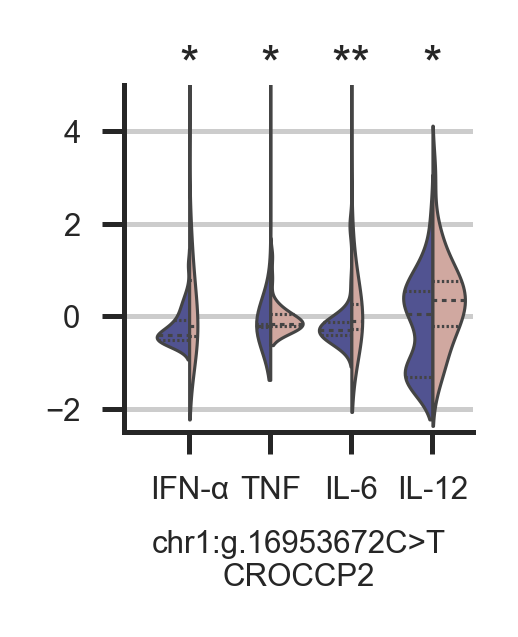

In [998]:
mutant_data =    merged_df[merged_df['chr1-16953672-16953672-C-T-CROCCP2'] == 'mut']#.drop(columns=gene_sites + ['type'])
nonmutant_data = merged_df[merged_df['chr1-16953672-16953672-C-T-CROCCP2'] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
plt.subplots(figsize=(1,1),dpi=450)
sns.violinplot(data=plot6,x='eng',hue='chr1-16953672-16953672-C-T-CROCCP2',y='value',dodge=True,size=6,palette=['#46499c','#d8a398'],
              split=True, inner="quart", legend=False, hue_order=['nonmutant','mut',],linewidth=0.5
              )

for i,indicator in enumerate(['干扰素α',"肿瘤坏死因子",'白介素6','白介素12']):
    mutant_indicator_data = mutant_data[indicator].dropna()
    nonmutant_indicator_data = nonmutant_data[indicator].dropna()#.drop(columns=gene_sites + ['type'])

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 5.1, star, ha='center', fontsize=8)
plt.yticks([-2,0,2,4],fontsize=5)
plt.xticks(fontsize=5)
"""plt.xticks(range(3),[
    loci_dict2[x] for x in ['chr11-18290636-18290636-A-T-SAA1',
 'chr1-16918255-16918255-A-C-NBPF1',
 'chr2-179527910-179527910-A-T-TTN'] ],rotation=15)"""
plt.ylim(-2.5,5)
plt.xlim(-0.8,3.5)
plt.xlabel(loci_dict2['chr1-16953672-16953672-C-T-CROCCP2']+"\nCROCCP2",fontsize=5)
plt.ylabel("")
sns.despine(bottom=False)
plt.grid(axis='y')
ax = plt.gca()if ax.get_legend(): 
    ax.get_legend().remove()
plt.legend().remove()
plt.savefig('Fig3A1.pdf', bbox_inches='tight')
plt.show()

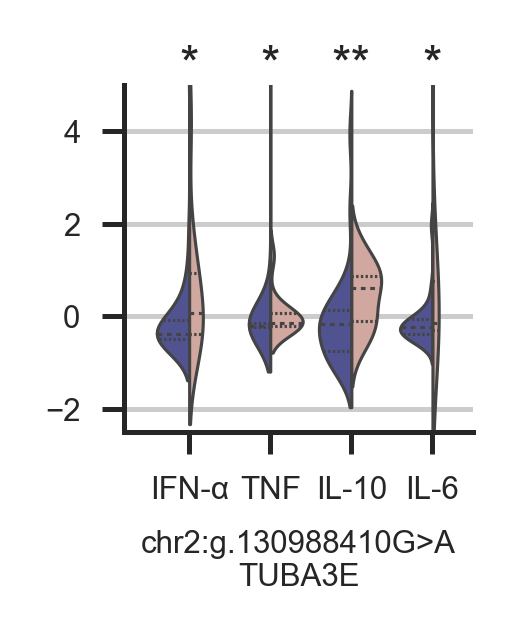

In [952]:
mutant_data =    merged_df[merged_df['chr2-130988410-130988410-G-A-TUBA3E'] == 'mut']#.drop(columns=gene_sites + ['type'])
nonmutant_data = merged_df[merged_df['chr2-130988410-130988410-G-A-TUBA3E'] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
plt.subplots(figsize=(1,1),dpi=450)
sns.violinplot(data=plot4,x='eng',hue='chr2-130988410-130988410-G-A-TUBA3E',y='value',dodge=True,size=6,palette=['#46499c','#d8a398'],
              split=True, inner="quart", legend=False, hue_order=['nonmutant','mut',],linewidth=0.5
              )

for i,indicator in enumerate(['干扰素α','肿瘤坏死因子','白介素10','白介素6',]):
    mutant_indicator_data = mutant_data[indicator].dropna()
    nonmutant_indicator_data = nonmutant_data[indicator].dropna()#.drop(columns=gene_sites + ['type'])

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 5.1, star, ha='center', fontsize=8)
plt.yticks([-2,0,2,4],fontsize=5)
plt.xticks(fontsize=5)

plt.ylim(-2.5,5)
plt.xlim(-0.8,3.5)
plt.xlabel(loci_dict2['chr2-130988410-130988410-G-A-TUBA3E']+"\nTUBA3E",fontsize=5)
plt.ylabel("")
sns.despine(bottom=False)
plt.grid(axis='y')
ax = plt.gca()if ax.get_legend(): 
    ax.get_legend().remove()
plt.legend().remove()
plt.savefig('Fig3A2.pdf', bbox_inches='tight')
plt.show()

In [ ]:
'白介素1β','干扰素α','白介素6','肿瘤坏死因子','chr2-130988410-130988410-G-A-CCDC115'

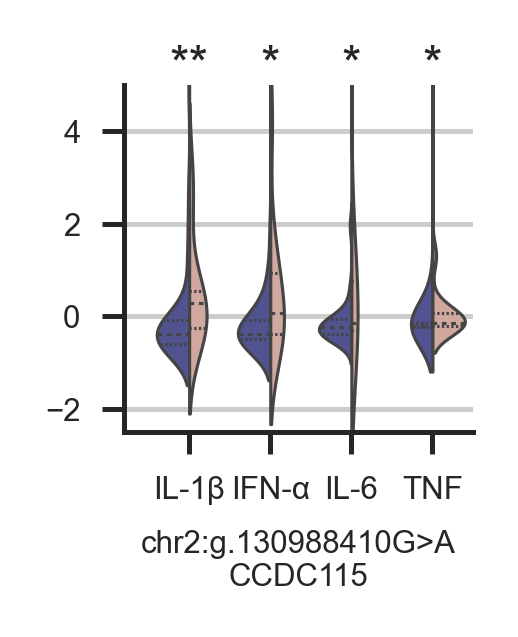

In [965]:
mutant_data =    merged_df[merged_df['chr2-130988410-130988410-G-A-CCDC115'] == 'mut']#.drop(columns=gene_sites + ['type'])
nonmutant_data = merged_df[merged_df['chr2-130988410-130988410-G-A-CCDC115'] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
plt.subplots(figsize=(1,1),dpi=450)
sns.violinplot(data=plot5,x='eng',hue='chr2-130988410-130988410-G-A-CCDC115',y='value',dodge=True,size=6,palette=['#46499c','#d8a398'],
              split=True, inner="quart", legend=False, hue_order=['nonmutant','mut',],linewidth=0.5
              )

for i,indicator in enumerate(['白介素1β','干扰素α','白介素6','肿瘤坏死因子',]):
    mutant_indicator_data = mutant_data[indicator].dropna()
    nonmutant_indicator_data = nonmutant_data[indicator].dropna()#.drop(columns=gene_sites + ['type'])

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 5.1, star, ha='center', fontsize=8)
plt.yticks([-2,0,2,4],fontsize=5)
plt.xticks(fontsize=5)

plt.ylim(-2.5,5)
plt.xlim(-0.8,3.5)
plt.xlabel(loci_dict2['chr2-130988410-130988410-G-A-CCDC115']+"\nCCDC115",fontsize=5)
plt.ylabel("")
sns.despine(bottom=False)
plt.grid(axis='y')
ax = plt.gca()if ax.get_legend(): 
    ax.get_legend().remove()
plt.legend().remove()
plt.savefig('Fig3A3.pdf', bbox_inches='tight')
plt.show()

In [ ]:
'白介素12','白介素1β','白介素8','白介素4','chr16-70165793-70165793-G-C-PDPR'

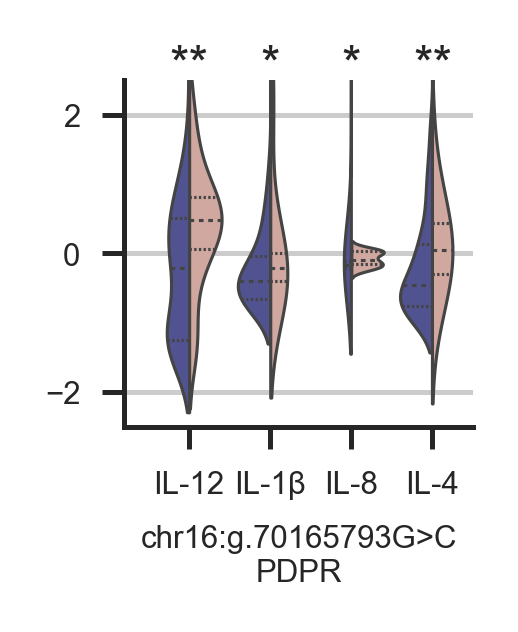

In [966]:
mutant_data =    merged_df[merged_df['chr16-70165793-70165793-G-C-PDPR'] == 'mut']#.drop(columns=gene_sites + ['type'])
nonmutant_data = merged_df[merged_df['chr16-70165793-70165793-G-C-PDPR'] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
plt.subplots(figsize=(1,1),dpi=450)
sns.violinplot(data=plot7,x='eng',hue='chr16-70165793-70165793-G-C-PDPR',y='value',dodge=True,size=6,palette=['#46499c','#d8a398'],
              split=True, inner="quart", legend=False, hue_order=['nonmutant','mut',],linewidth=0.5
              )

for i,indicator in enumerate(['白介素12','白介素1β','白介素8','白介素4']):
    mutant_indicator_data = mutant_data[indicator].dropna()
    nonmutant_indicator_data = nonmutant_data[indicator].dropna()#.drop(columns=gene_sites + ['type'])

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 2.5, star, ha='center', fontsize=8)
plt.yticks([-2,0,2],fontsize=5)
plt.xticks(fontsize=5)

plt.ylim(-2.5,2.5)
plt.xlim(-0.8,3.5)
plt.xlabel(loci_dict2['chr16-70165793-70165793-G-C-PDPR']+"\nPDPR",fontsize=5)
plt.ylabel("")
sns.despine(bottom=False)
plt.grid(axis='y')
ax = plt.gca()if ax.get_legend(): 
    ax.get_legend().remove()
plt.legend().remove()
plt.savefig('Fig3A4.pdf', bbox_inches='tight')
plt.show()

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


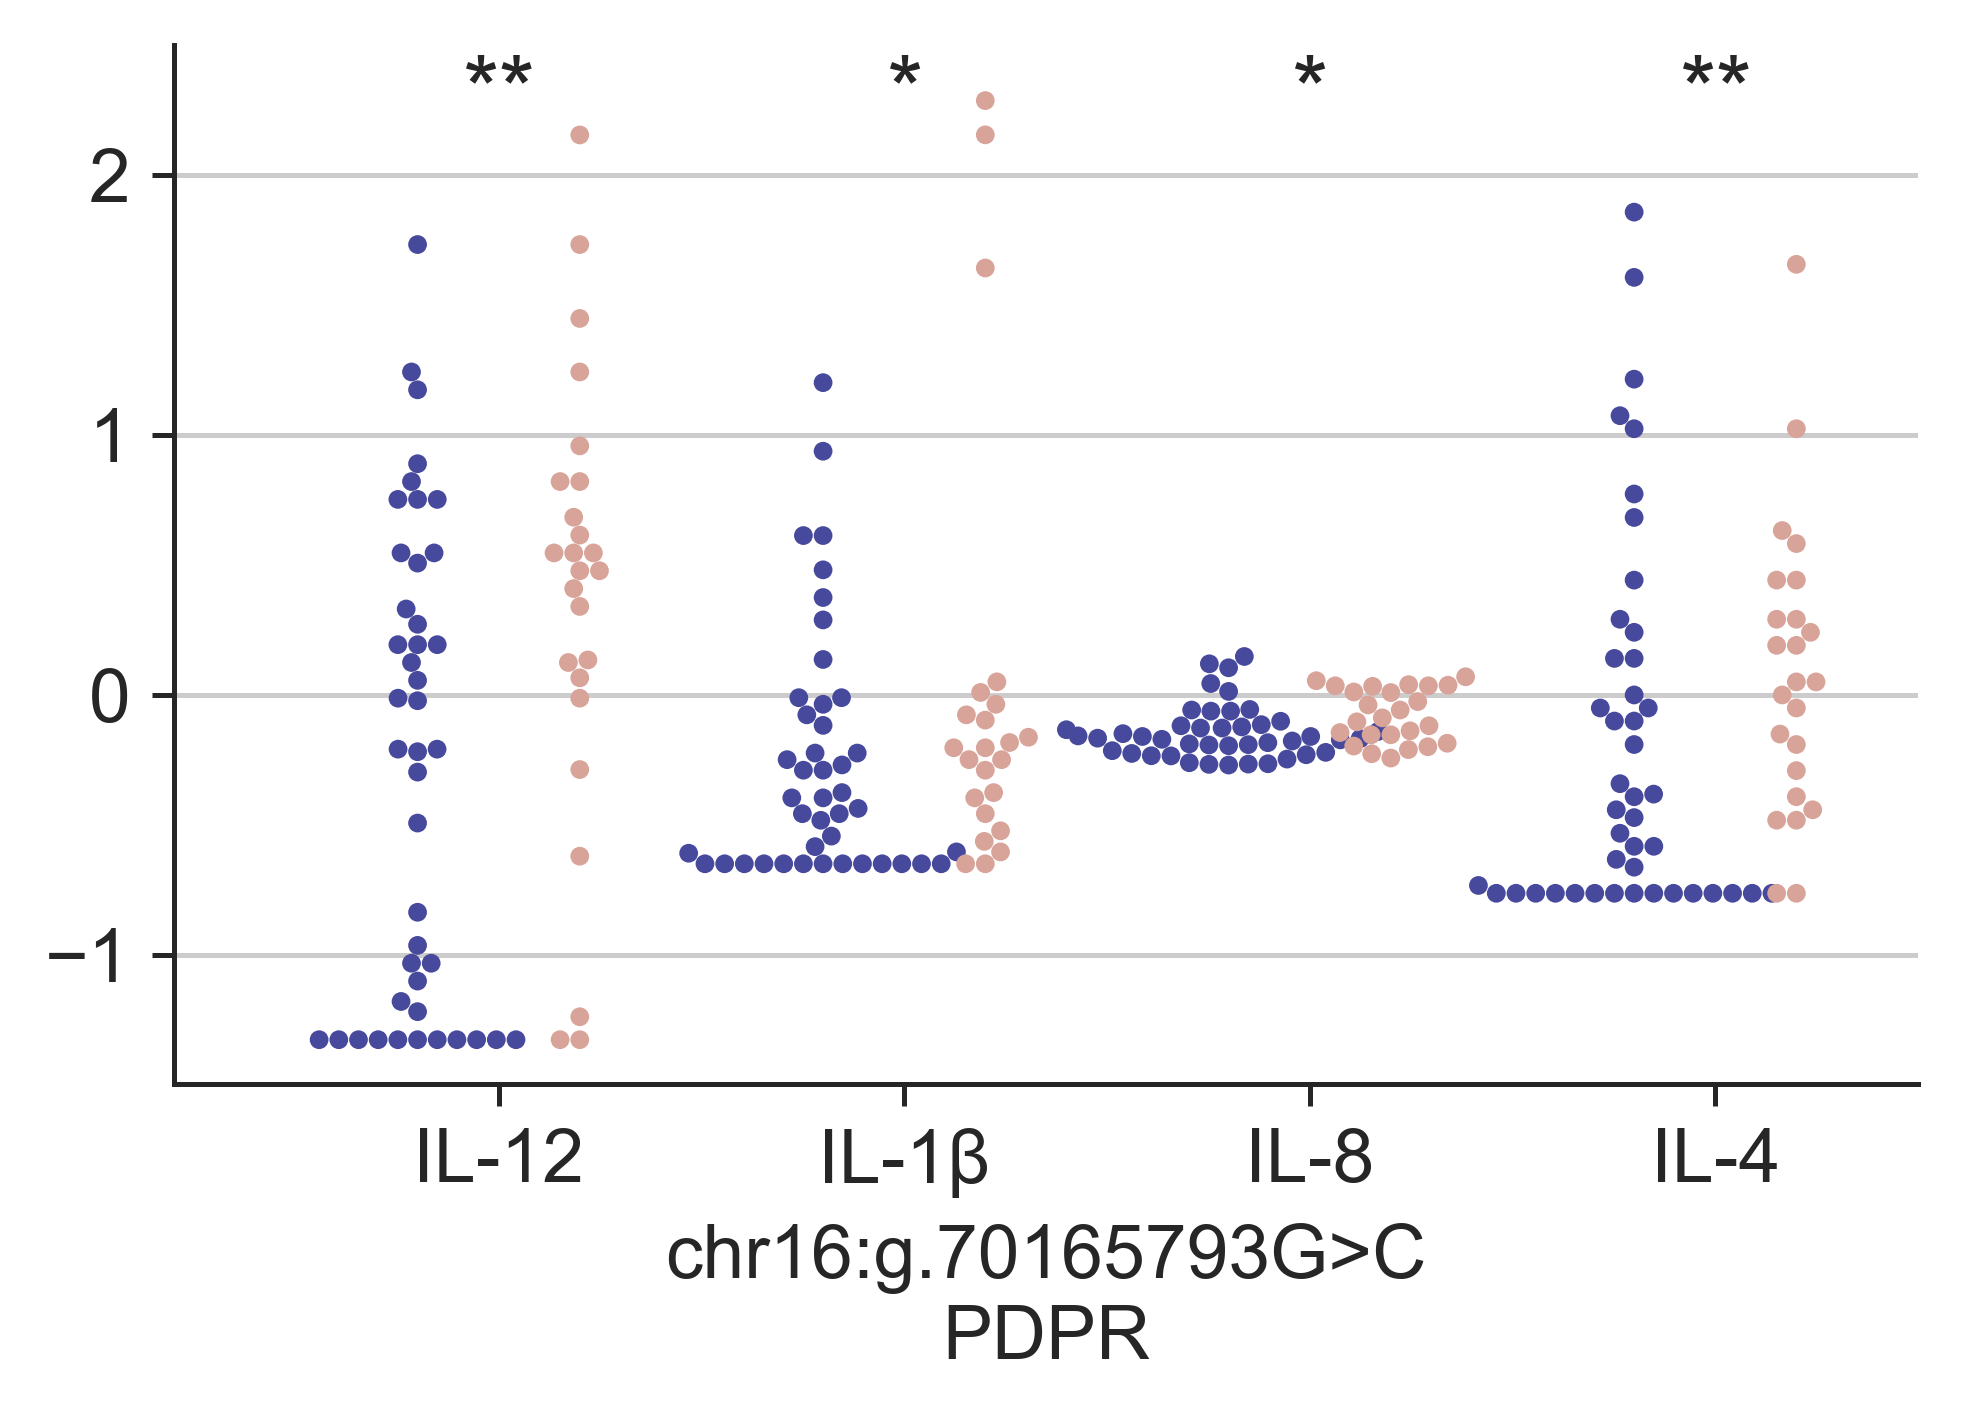

In [957]:
mutant_data =    merged_df[merged_df['chr1-16953672-16953672-C-T-CROCCP2'] == 'mut']#.drop(columns=gene_sites + ['type'])
nonmutant_data = merged_df[merged_df['chr1-16953672-16953672-C-T-CROCCP2'] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    

plt.subplots(figsize=(5,3),dpi=450)
sns.swarmplot(data=plot6,x='eng',hue='chr1-16953672-16953672-C-T-CROCCP2',y='value',dodge=True,size=3,palette=['#46499c','#d8a398'])
for i,indicator in enumerate(['干扰素α',"肿瘤坏死因子",'白介素6','白介素12']):
    
    
    mutant_indicator_data = mutant_data[indicator].dropna()
    nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 2.2, star, ha='center', fontsize=15)
plt.yticks([-1,0,1,2])
plt.ylim(-1.5,2.5)
plt.xlim(-0.8,3.5)
plt.xlabel(loci_dict2['chr1-16953672-16953672-C-T-CROCCP2']+"\nCROCCP2")
plt.ylabel("")
sns.despine(bottom=False
           )
plt.legend(loc=[0,1.1])
plt.grid(axis='y')
ax = plt.gca()if ax.get_legend():    ax.get_legend().remove()
plt.savefig('Fig3A.pdf', bbox_inches='tight')
plt.show()

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

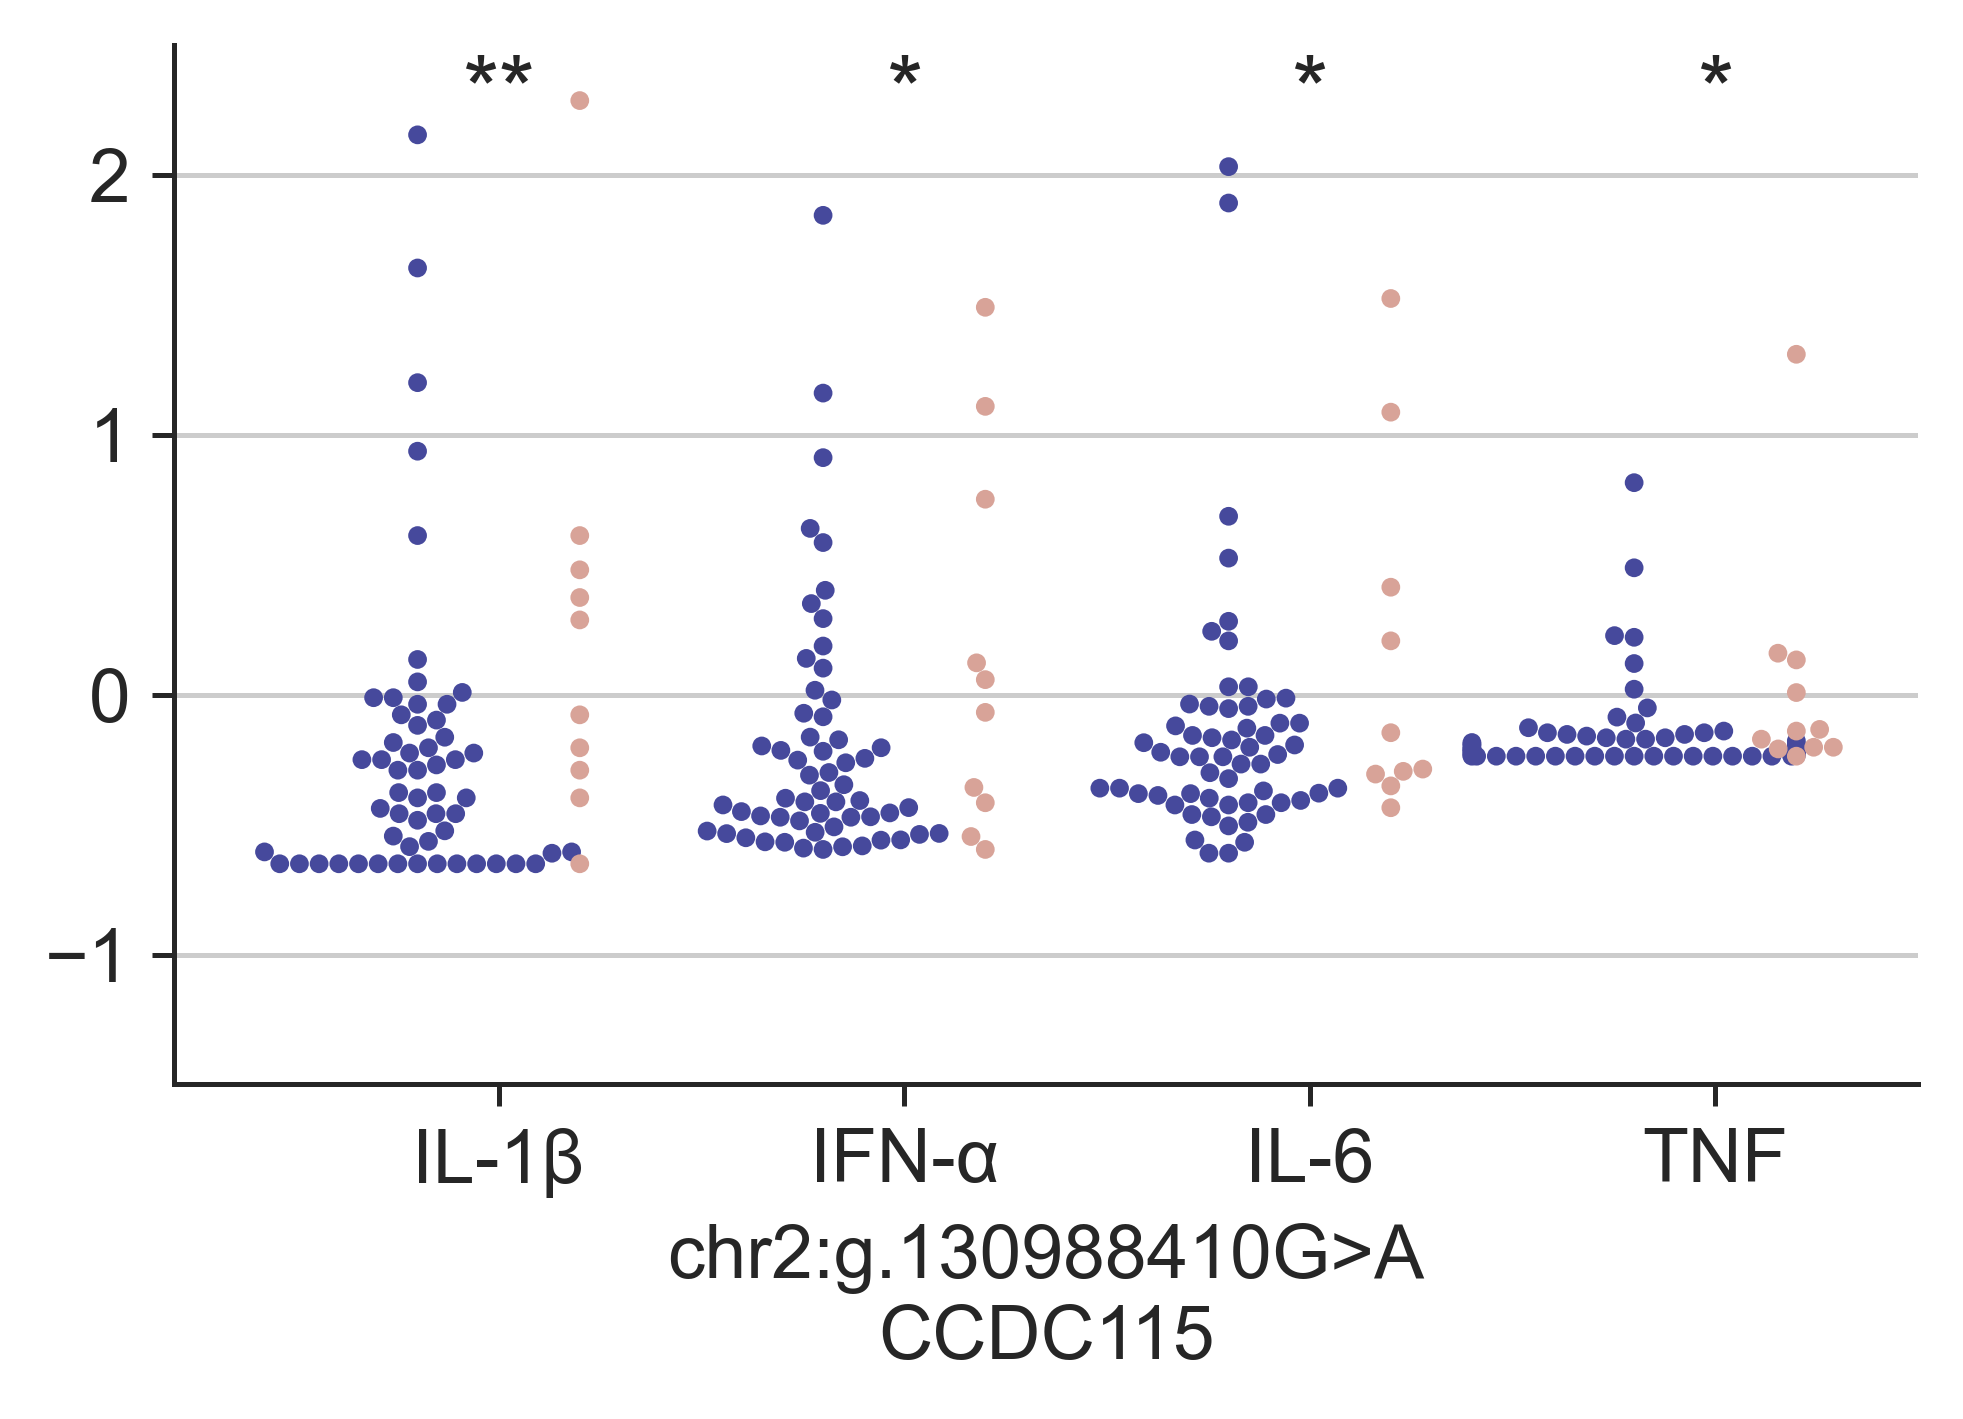

In [494]:
mutant_data =    merged_df[merged_df['chr2-130988410-130988410-G-A-CCDC115'] == 'mut']#.drop(columns=gene_sites + ['type'])
nonmutant_data = merged_df[merged_df['chr2-130988410-130988410-G-A-CCDC115'] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    

plt.subplots(figsize=(5,3),dpi=450)
sns.swarmplot(data=plot5,x='eng',hue='chr2-130988410-130988410-G-A-CCDC115',y='value',dodge=True,size=3,palette=['#46499c','#d8a398'])
for i,indicator in enumerate(['白介素1β','干扰素α','白介素6','肿瘤坏死因子']):
    
    
    mutant_indicator_data = mutant_data[indicator].dropna()
    nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 2.2, star, ha='center', fontsize=15)
plt.yticks([-1,0,1,2])
plt.ylim(-1.5,2.5)
plt.xlim(-0.8,3.5)
plt.xlabel(loci_dict2['chr2-130988410-130988410-G-A-CCDC115']+"\nCCDC115")
plt.ylabel("")
sns.despine(bottom=False
           )
plt.legend(loc=[0,1.1])
plt.grid(axis='y')
ax = plt.gca()if ax.get_legend():    ax.get_legend().remove()
plt.savefig('Fig3A2.pdf', bbox_inches='tight')
plt.show()

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

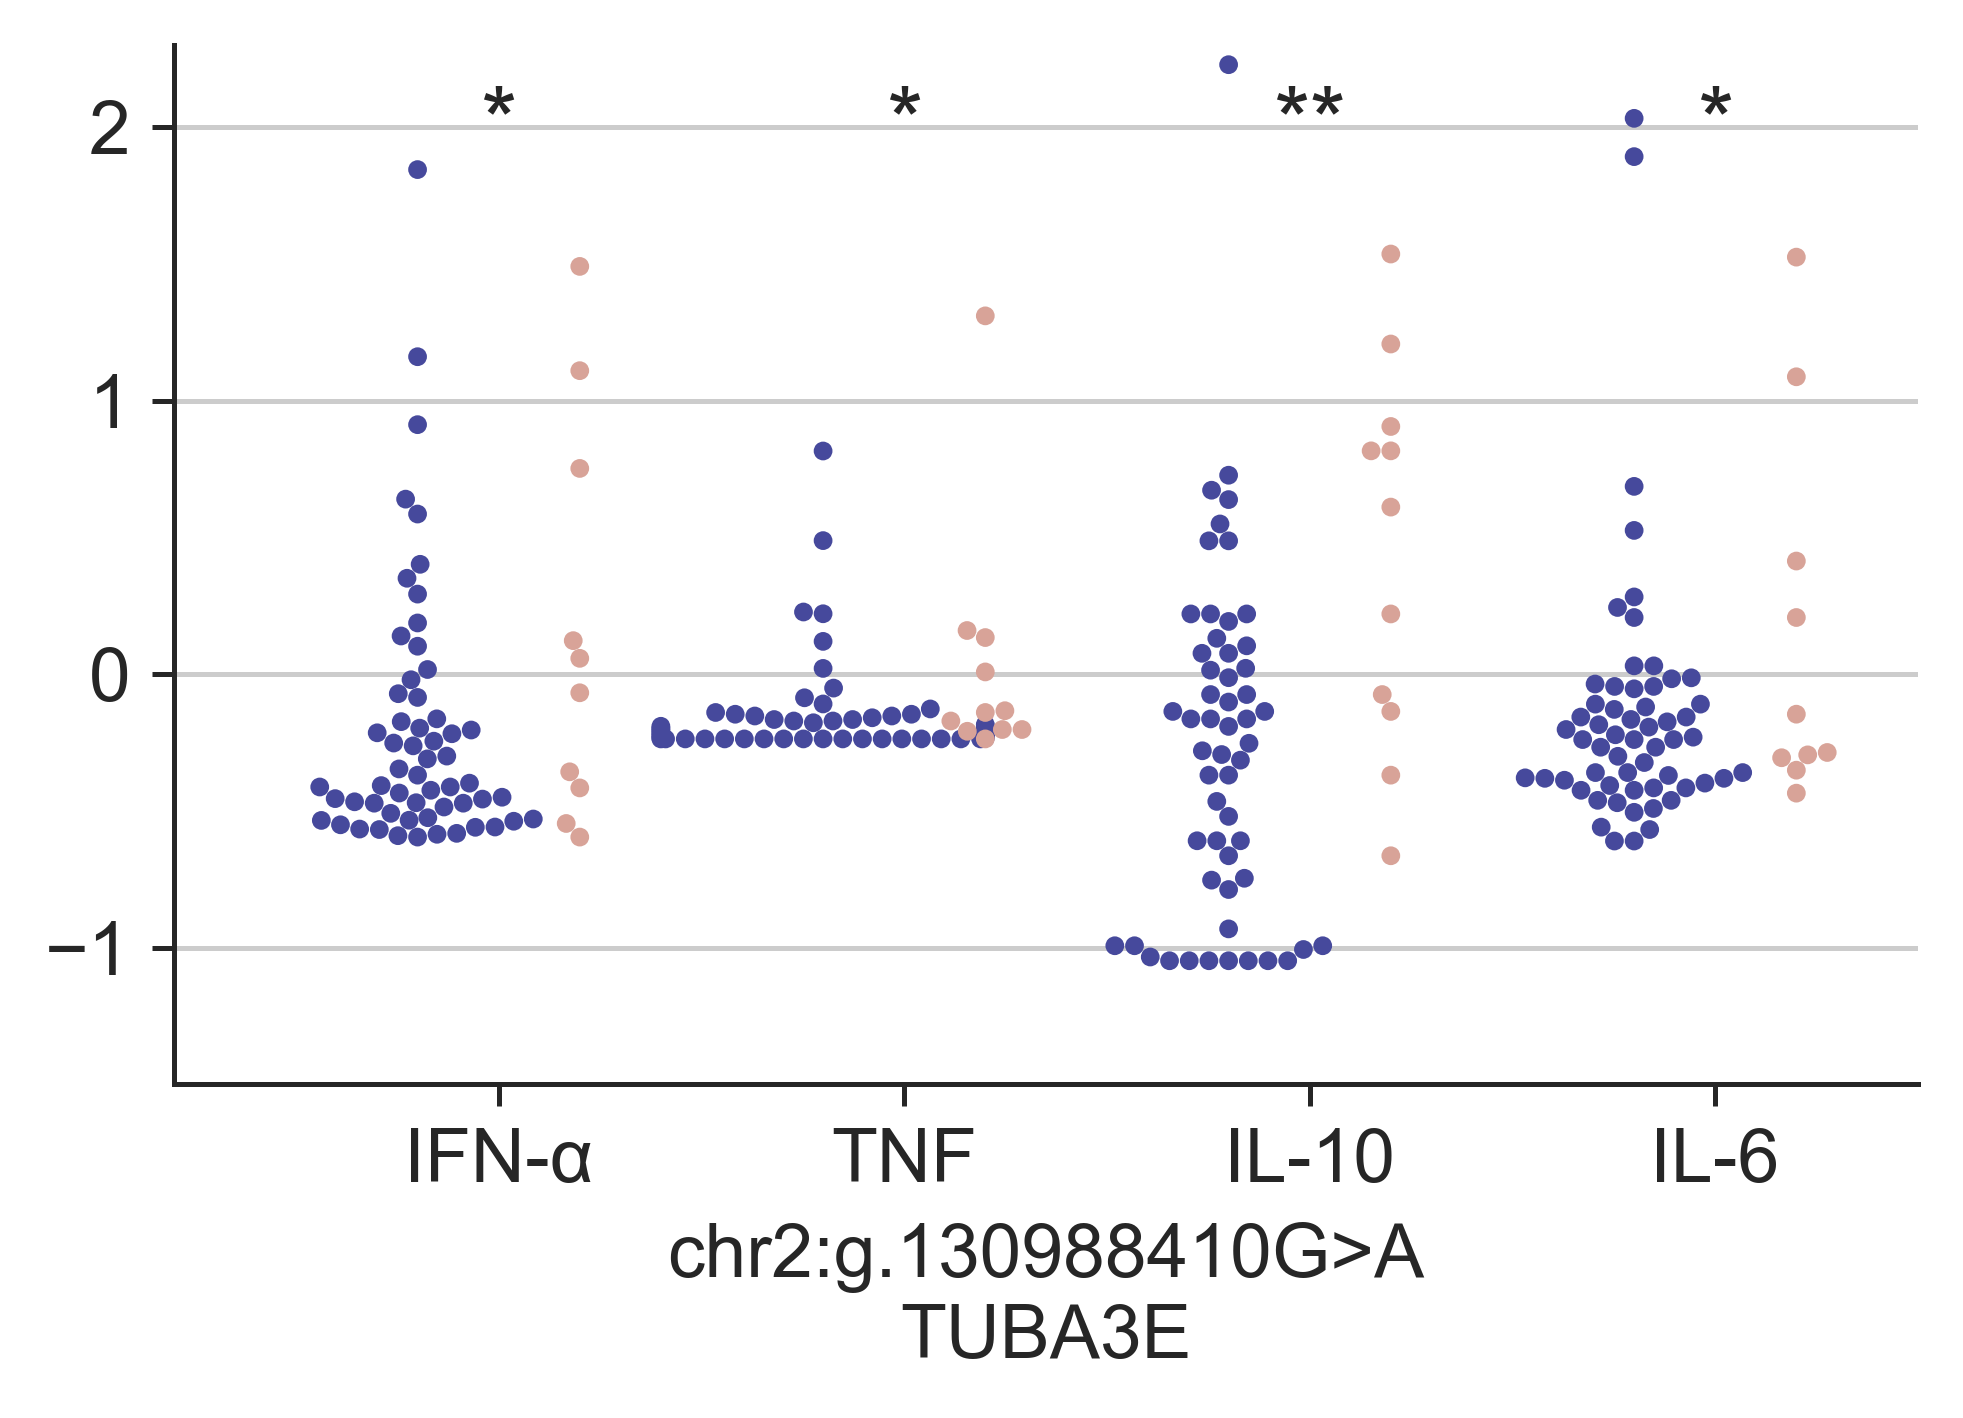

In [568]:
mutant_data =    merged_df[merged_df['chr2-130988410-130988410-G-A-TUBA3E'] == 'mut']#.drop(columns=gene_sites + ['type'])
nonmutant_data = merged_df[merged_df['chr2-130988410-130988410-G-A-TUBA3E'] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    

plt.subplots(figsize=(5,3),dpi=450)
sns.swarmplot(data=plot4,x='eng',hue='chr2-130988410-130988410-G-A-TUBA3E',y='value',dodge=True,size=3,palette=['#46499c','#d8a398'])
for i,indicator in enumerate(['干扰素α','肿瘤坏死因子','白介素10','白介素6',]):
    
    
    mutant_indicator_data = mutant_data[indicator].dropna()
    nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 1.9, star, ha='center', fontsize=15)
plt.yticks([-1,0,1,2])
plt.ylim(-1.5,2.3)
plt.xlim(-0.8,3.5)
plt.xlabel(loci_dict2['chr2-130988410-130988410-G-A-TUBA3E']+"\nTUBA3E")
plt.ylabel("")
sns.despine(bottom=False
           )
plt.legend(loc=[0,1.1])
plt.grid(axis='y')
ax = plt.gca()if ax.get_legend():    ax.get_legend().remove()
plt.savefig('Fig3A3.pdf', bbox_inches='tight')
plt.show()

In [306]:
significantdf4[significantdf4['geneloci']=='chr16-70165793-70165793-G-C-PDPR']

geneloci indicator   p_value
188  chr16-70165793-70165793-G-C-PDPR     白介素12  0.006214
189  chr16-70165793-70165793-G-C-PDPR     白介素1β  0.025489
190  chr16-70165793-70165793-G-C-PDPR      白介素8  0.011727
191  chr16-70165793-70165793-G-C-PDPR      白介素4  0.005045

In [570]:
plot5=scaled_df2[['白介素12','白介素1β','白介素8','白介素4','chr16-70165793-70165793-G-C-PDPR']].\
melt(id_vars='chr16-70165793-70165793-G-C-PDPR')
plot5['eng']=plot5['variable'].map(eng_chi_dict)
plot5

chr16-70165793-70165793-G-C-PDPR variable     value    eng
0                          nonmutant    白介素12 -0.219591  IL-12
1                                mut    白介素12 -0.621676  IL-12
2                                mut    白介素12  0.682650  IL-12
3                          nonmutant    白介素12  0.192302  IL-12
4                                mut    白介素12  0.545353  IL-12
..                               ...      ...       ...    ...
271                        nonmutant     白介素4 -0.443031   IL-4
272                              mut     白介素4  0.239854   IL-4
273                              mut     白介素4 -0.001164   IL-4
274                        nonmutant     白介素4  0.139430   IL-4
275                              mut     白介素4  0.440703   IL-4

[276 rows x 4 columns]

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


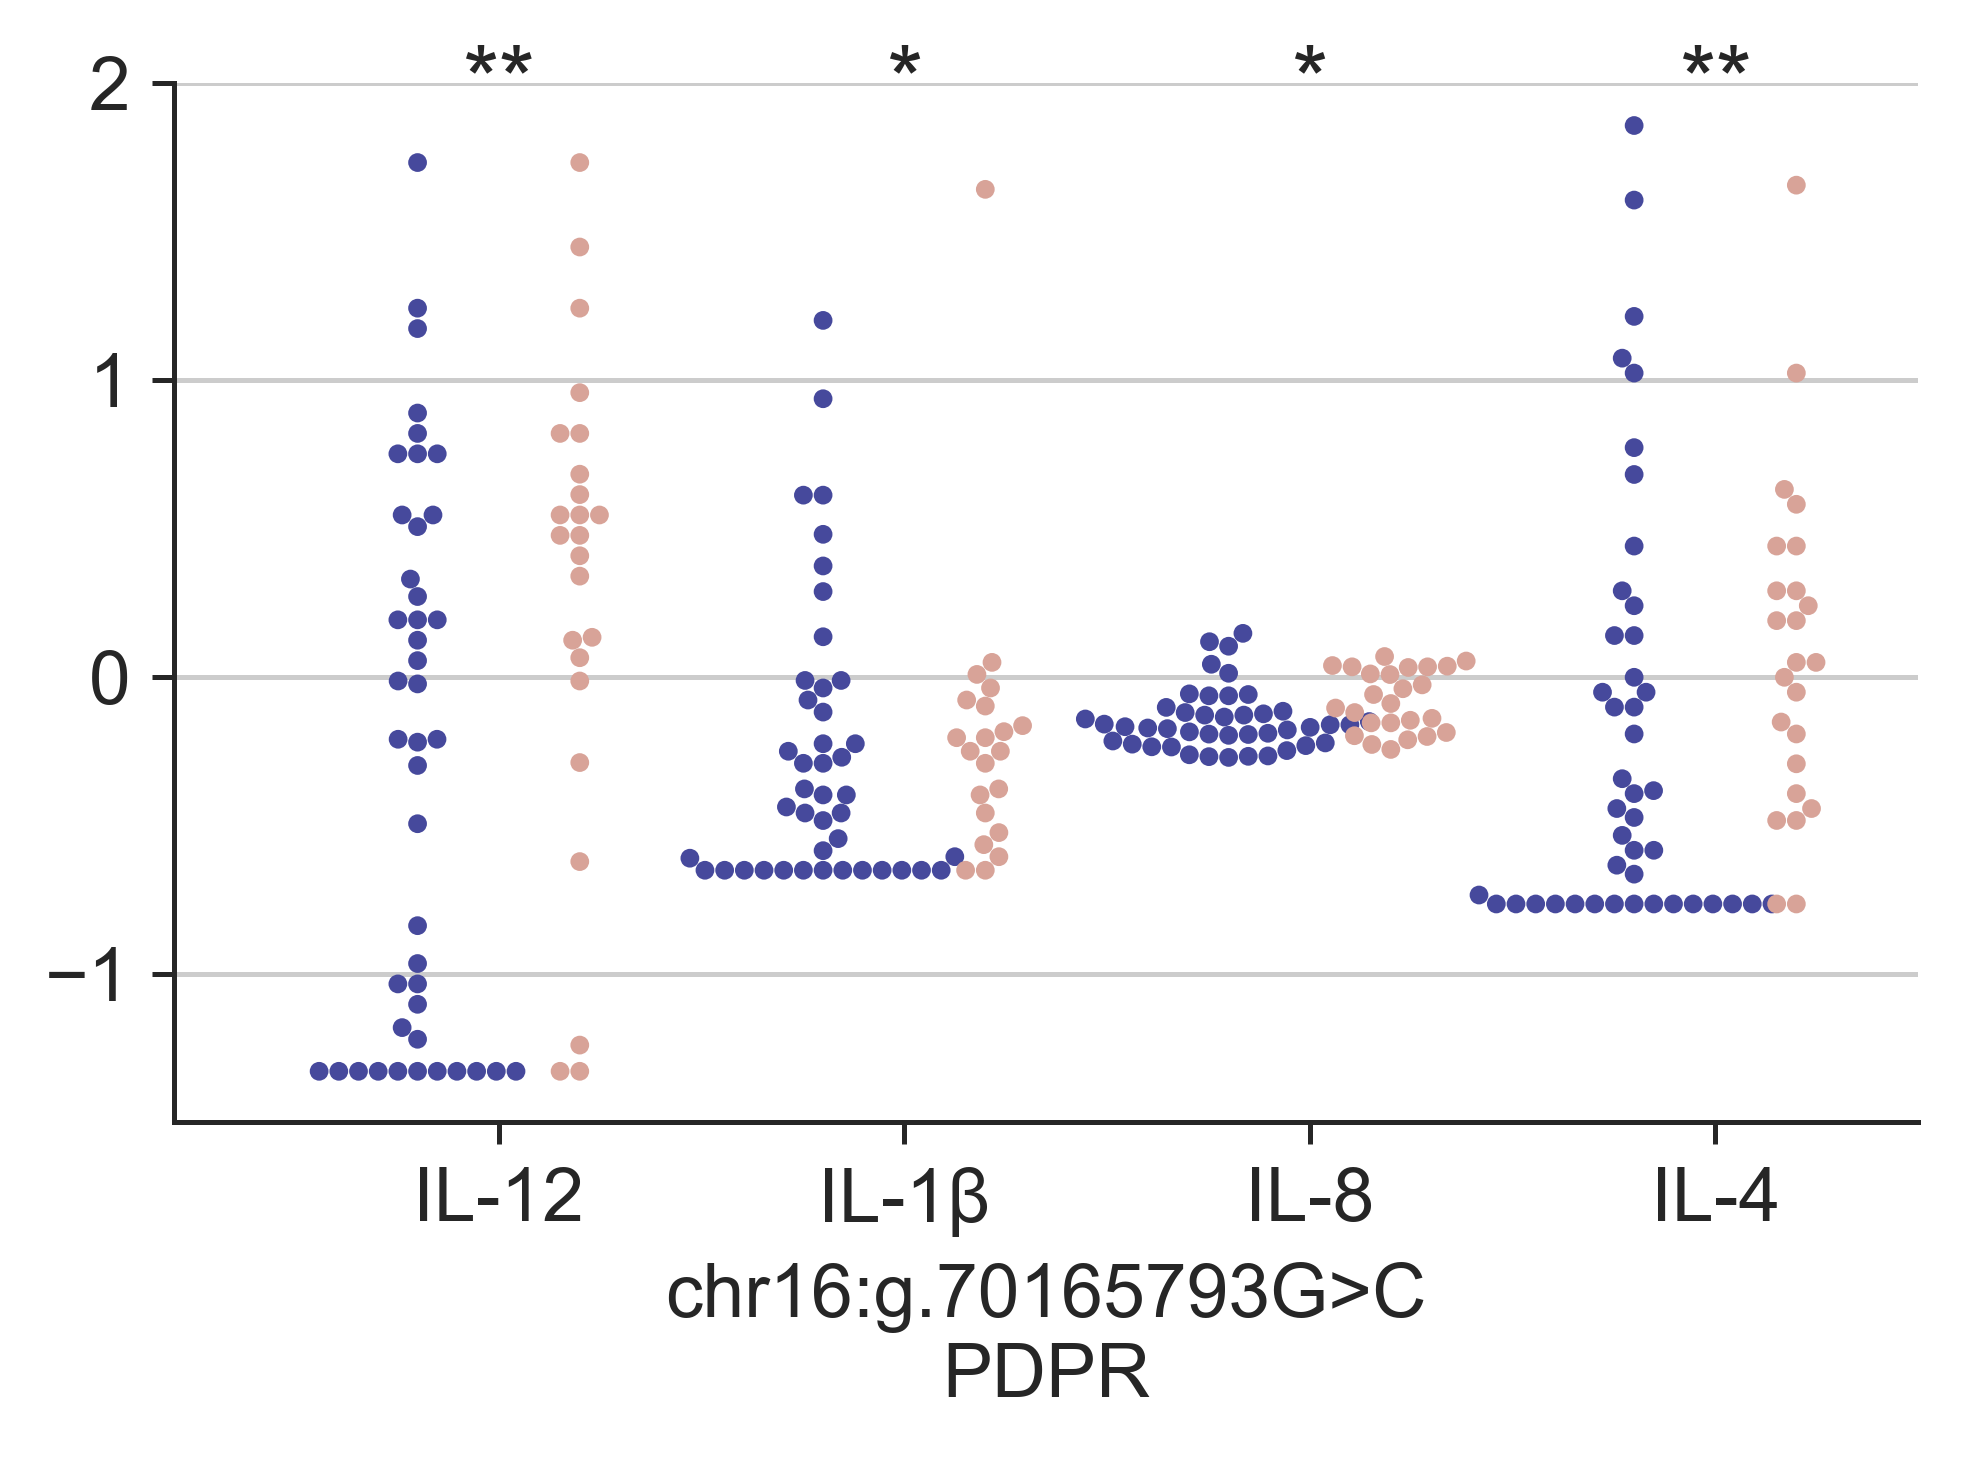

In [571]:
mutant_data =    merged_df[merged_df['chr16-70165793-70165793-G-C-PDPR'] == 'mut']#.drop(columns=gene_sites + ['type'])
nonmutant_data = merged_df[merged_df['chr16-70165793-70165793-G-C-PDPR'] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    

plt.subplots(figsize=(5,3),dpi=450)
sns.swarmplot(data=plot5,x='eng',hue='chr16-70165793-70165793-G-C-PDPR',y='value',dodge=True,size=3,palette=['#46499c','#d8a398'])
for i,indicator in enumerate(['白介素12','白介素1β','白介素8','白介素4']):
    
    
    mutant_indicator_data = mutant_data[indicator].dropna()
    nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 1.9, star, ha='center', fontsize=15)
plt.xlabel(loci_dict2['chr16-70165793-70165793-G-C-PDPR']+"\nPDPR")
plt.yticks([-1,0,1,2])
plt.ylim(-1.5,2)
plt.xlim(-0.8,3.5)
plt.ylabel("")

sns.despine(bottom=False
           )
plt.legend(loc=[0,1.1])
plt.grid(axis='y')
ax = plt.gca()if ax.get_legend():    ax.get_legend().remove()
plt.savefig('Fig3B4.pdf', bbox_inches='tight')
plt.show()

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


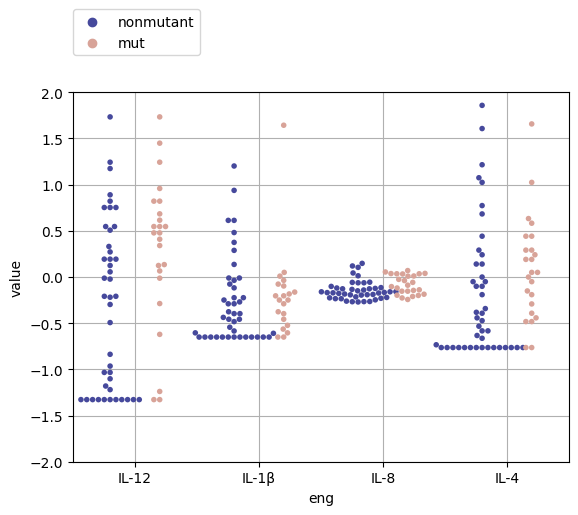

In [933]:
sns.swarmplot(data=plot5,x='eng',hue='chr16-70165793-70165793-G-C-PDPR',y='value',dodge=True,size=4,palette=['#46499c','#d8a398'])


plt.ylim(-2,2)
plt.legend(loc=[0,1.1])
plt.grid()
plt.show()

In [603]:
immunedf['indicator'].value_counts().iloc[:30]

白介素5      20
白介素17     17
白介素6      15
白介素10     14
白介素12     14
白介素4      13
白介素8      12
干扰素α      12
肿瘤坏死因子    12
白介素1β     12
干扰素γ      10
白介素2       8
Name: indicator, dtype: int64

In [126]:
listimmune=['干扰素α',
'肿瘤坏死因子',
'干扰素γ',
'白介素12',
'白介素1β',
'白介素17',
'白介素10',
'白介素8',
'白介素6',
'白介素5',
'白介素4',
'白介素2']+list(alldata_pivot.columns[187:475] )

In [127]:
listA=[i for i in  result_list if (i[1] in listimmune)]
for i in listA:
    if i[1] not in dictlower.keys():
        dictlower[  i[1]  ] = 0
plt.subplots(figsize=(18,4),dpi=450)
for j,i in enumerate(listA[:18]):
    plt.subplot(2,9,j+1)
    plt.rcParams['font.family'] = 'Arial'
    colors=['grey','red']
    clsls=['nonmutant','mut']
    
    data=[ 
    alldata_pivot[alldata_pivot[ i[0] ]=='nonmutant'][ i[1] ].dropna().tolist(),
    alldata_pivot[alldata_pivot[ i[0] ]==      'mut'][ i[1] ].dropna().tolist(),
    ]
    colors =['#46499c','#d8a398']
    wkls1=[]
    wkls2=[]
    for num, d in enumerate(data):
        box=plt.boxplot(d, positions=[num + 1], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor='white',edgecolor =colors[num],linewidth=1.5),
                    medianprops=dict(color=colors[num],linewidth=1.5),
                    whiskerprops={'color': colors[num],'linewidth':1.5},
                    capprops={'color': colors[num],'linewidth':1.5},
                    flierprops=dict(marker='o', color='black', markersize=0))
        
        lower_whisker = box['whiskers'][0].get_ydata()[1]        upper_whisker = box['whiskers'][1].get_ydata()[1]        wkls1.append(lower_whisker)
        wkls2.append(upper_whisker)

    plt.ylim(np.min(wkls1)*0.9-0.1*np.max(wkls2),np.max(wkls2)*1.1)

    u_statistic, p_value = stats.ttest_ind(data[0],data[1])
    if p_value>0.05:
        star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
        star='*'
    elif (p_value <=0.01) &(p_value >0.001):
        star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
        star='***'
    else:
        star='****'
    plt.text(1.5, np.max(wkls2)*1.05, star, ha='center', fontsize=14)
    plt.text(1.5, np.max(wkls2)*1.20, i[0].split('-')[-1], ha='center', fontsize=8)
    plt.xticks([])
    plt.xlim(0.3,len(clsls)+0.5)
    plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
    plt.xlabel(combine_snp[i[0]], fontsize=8)
    plt.ylabel(eng_chi_dict[i[1]], fontsize=10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.hlines(dictlower[i[1]],-1,3,lw=1,color='grey',ls='--')
    plt.hlines(dicthigh[i[1]],-1,3,lw=1,color='pink',ls='--')
    plt.text(-.4,np.max(wkls2)*1.15,dictunit[i[1]],fontsize=8)
plt.tight_layout()
plt.show()

NameError: name 'dictlower' is not defined

 ## 氧化应激与基因突变的关系

In [587]:
import pandas as pd
from scipy import stats

gene_sites = alldata_pivot.columns[187:475]indicators = oxidative
df=merged_df
t_test_results = {}

for gene_site in gene_sites:
    mutant_data = df[df[gene_site] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = df[df[gene_site] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    gene_site_results = {}
    
    for indicator in indicators:
        mutant_indicator_data = mutant_data[indicator].dropna()
        nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        
        if len(mutant_indicator_data) > 1 and len(nonmutant_indicator_data) > 1:
            t_stat, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='less')
            gene_site_results[indicator] = {'t_stat': t_stat, 'p_value': p_value}
        else:
            gene_site_results[indicator] = {'t_stat': None, 'p_value': None}
    
    t_test_results[gene_site] = gene_site_results

In [588]:
significant_results = {}

for gene_site, indicator_results in t_test_results.items():
    significant_indicators = {}
    
    for indicator, stats1 in indicator_results.items():
        if str(stats1['p_value']) !='None':
            if stats1['p_value'] < 0.05:
                significant_indicators[indicator] = stats1
    
    if significant_indicators:
        significant_results[gene_site] = significant_indicators

result_list = []
 
for gene_site, indicators in significant_results.items():
    for indicator, stats1 in indicators.items():
        result_list.append([gene_site, indicator, stats1['p_value']])
 
for item in result_list:
    print(item)

['chr1-145281247-145281247-T-A-NOTCH2NLR', '硝化酪氨酸', 0.04471497100537528]
['chr15-21937964-21937964-A-G-LOC646214', '硝化酪氨酸', 0.040368698934122094]
['chr1-206567165-206567165-T-A-SRGAP2D', '超氧化物歧化酶', 0.016074055100324967]
['chr14-19114642-19114642-A-G-OR11H12', '丙二醛', 0.036899276242384524]
['chr7-72081604-72081604-G-T-TYW1B', '硝化酪氨酸', 0.017147329038870732]
['chr15-102312009-102312009-G-A-OR4F6', '8-羟基脱氧鸟苷', 0.03504277279500868]
['chr6-116774616-116774616-A-G-DSE', '丙二醛', 0.031982160889615835]
['chr6-116774616-116774616-A-G-DSE', '花生四烯酸过氧化物', 0.049727785834697925]
['chr17-18395647-18395647-G-T-LGALS9C', '8-羟基脱氧鸟苷', 0.01867343219579612]
['chr16-70177618-70177618-G-A-PDPR', '8-羟基脱氧鸟苷', 0.023499086850693848]
['chr1-13418-13418-G-A-LOC102725121', '8-羟基脱氧鸟苷', 0.03347148022921099]
['chr16-32077240-32077240-T-C-ZNF267', '硝化酪氨酸', 0.009816724026565374]
['chr7-149990333-149990333-A-T-ACTR3C', '谷胱甘肽过氧化物酶', 0.005324056445689042]
['chr17-36361992-36361992-C-T-NPEPPSP1', '硝化酪氨酸', 0.01072461648152669]
[

In [589]:
significantdfkangyang=pd.DataFrame(result_list,columns=['geneloci','indicator','p_value'])

significantdfkangyang

geneloci  indicator   p_value
0    chr1-145281247-145281247-T-A-NOTCH2NLR      硝化酪氨酸  0.044715
1     chr15-21937964-21937964-A-G-LOC646214      硝化酪氨酸  0.040369
2      chr1-206567165-206567165-T-A-SRGAP2D    超氧化物歧化酶  0.016074
3       chr14-19114642-19114642-A-G-OR11H12        丙二醛  0.036899
4          chr7-72081604-72081604-G-T-TYW1B      硝化酪氨酸  0.017147
..                                      ...        ...       ...
76      chr1-248738183-248738183-G-T-OR2T34       谷胱甘肽  0.032851
77      chr1-248738183-248738183-G-T-OR2T34   谷胱甘肽硫转移酶  0.031593
78      chr1-248738183-248738183-G-T-OR2T34  谷胱甘肽过氧化物酶  0.036767
79  chr14-106919301-106919301-T-C-LINC00226      硝化酪氨酸  0.003650
80     chr1-206567084-206567084-C-T-SRGAP2D   8-羟基脱氧鸟苷  0.047796

[81 rows x 3 columns]

In [590]:
def format_gene2(row):
    parts = row.split('-')    chrom = parts[0]    pos = parts[1]    ref = parts[3]    alt = parts[4]    return f"{chrom}:g.{pos}{ref}>{alt}"
significantdfkangyang['gene2_formatted'] = significantdf5['geneloci'].apply(format_gene2)

significantdfkangyang

geneloci  indicator   p_value  \
0    chr1-145281247-145281247-T-A-NOTCH2NLR      硝化酪氨酸  0.044715   
1     chr15-21937964-21937964-A-G-LOC646214      硝化酪氨酸  0.040369   
2      chr1-206567165-206567165-T-A-SRGAP2D    超氧化物歧化酶  0.016074   
3       chr14-19114642-19114642-A-G-OR11H12        丙二醛  0.036899   
4          chr7-72081604-72081604-G-T-TYW1B      硝化酪氨酸  0.017147   
..                                      ...        ...       ...   
76      chr1-248738183-248738183-G-T-OR2T34       谷胱甘肽  0.032851   
77      chr1-248738183-248738183-G-T-OR2T34   谷胱甘肽硫转移酶  0.031593   
78      chr1-248738183-248738183-G-T-OR2T34  谷胱甘肽过氧化物酶  0.036767   
79  chr14-106919301-106919301-T-C-LINC00226      硝化酪氨酸  0.003650   
80     chr1-206567084-206567084-C-T-SRGAP2D   8-羟基脱氧鸟苷  0.047796   

        gene2_formatted  
0    chr5:g.34182642G>A  
1   chr15:g.22345490A>G  
2   chr1:g.143210303T>G  
3   chr2:g.130988410G>A  
4    chr1:g.16976193C>T  
..                  ...  
76   chr1:g.16976032A>C  
77   chr2:g.97712581A>C  
78   chr5:g.34182642G>A  
79  chr14:g.19807329G>C  
80  chr14:g.19807329G>C  

[81 rows x 4 columns]

In [591]:
antistress=['超氧化物歧化酶','谷胱甘肽过氧化物酶','谷胱甘肽硫转移酶','含硫化合物','谷胱甘肽']

In [592]:
antistressdf=significantdfkangyang[significantdfkangyang['indicator'].isin(antistress)]

In [593]:
antistressdf.shape

(36, 4)

In [594]:
antistressdf

geneloci  indicator   p_value  \
2                chr1-206567165-206567165-T-A-SRGAP2D    超氧化物歧化酶  0.016074   
12                chr7-149990333-149990333-A-T-ACTR3C  谷胱甘肽过氧化物酶  0.005324   
15                chr2-112616040-112616040-T-C-ANAPC1   谷胱甘肽硫转移酶  0.007988   
16                 chr1-144816621-144816621-A-G-NBPF8    超氧化物歧化酶  0.048581   
18                      chr7-5949865-5949865-C-G-CCZ1      含硫化合物  0.008209   
20                  chr7-48886193-48886193-G-A-ABCA13   谷胱甘肽硫转移酶  0.017855   
21                 chr2-107042620-107042620-C-T-RGPD3       谷胱甘肽  0.031438   
22                chr1-148582481-148582481-A-G-NBPF15    超氧化物歧化酶  0.007751   
23          chr1-148903313-148903313-T-C-LOC101060524    超氧化物歧化酶  0.009176   
25                   chr1-16891963-16891963-T-A-NBPF1    超氧化物歧化酶  0.023473   
30                chr6-116774635-116774635-C-G-CALHM6    超氧化物歧化酶  0.005923   
31             chr14-19807329-19807329-G-C-LNCRNA-ATB    超氧化物歧化酶  0.003920   
34        chr6-58776645-58776645-A-C-LINC00680-GUSBP4       谷胱甘肽  0.030422   
36                chr1-148903313-148903313-T-C-DRD5P2    超氧化物歧化酶  0.009176   
38                   chr2-179527910-179527910-A-T-TTN      含硫化合物  0.009995   
39                   chr2-179527910-179527910-A-T-TTN   谷胱甘肽硫转移酶  0.040958   
41          chr1-148891790-148891790-T-A-LOC101927429   谷胱甘肽硫转移酶  0.013394   
43                    chr6-58776645-58776645-A-C-NONE       谷胱甘肽  0.030422   
45                 chr1-144816621-144816621-A-G-NBPF9    超氧化物歧化酶  0.048581   
51                   chr6-116774635-116774635-C-G-DSE    超氧化物歧化酶  0.005923   
52  chr14-19807329-19807329-G-C-LINC01297-DUXAP10-...    超氧化物歧化酶  0.003920   
53                 chr7-151970695-151970695-A-T-KMT2C    超氧化物歧化酶  0.011527   
55                 chr17-62952732-62952732-C-A-AMZ2P1  谷胱甘肽过氧化物酶  0.026599   
56                   chr1-16918255-16918255-A-C-NBPF1    超氧化物歧化酶  0.017163   
57                  chr2-97749417-97749417-C-T-FAHD2B      含硫化合物  0.025698   
58                 chr4-166149905-166149905-C-G-KLHL2       谷胱甘肽  0.020113   
59                 chr4-166149905-166149905-C-G-KLHL2   谷胱甘肽硫转移酶  0.042422   
60               chr1-148891790-148891790-T-A-NBPF25P   谷胱甘肽硫转移酶  0.013394   
61               chr17-62952732-62952732-C-A-LRRC37A3  谷胱甘肽过氧化物酶  0.026599   
63                  chr17-15508447-15508447-C-A-CDRT1      含硫化合物  0.024855   
65               chr15-84908411-84908411-G-A-GOLGA6L4  谷胱甘肽过氧化物酶  0.047799   
66               chr15-84908411-84908411-G-A-GOLGA6L4    超氧化物歧化酶  0.040272   
70                  chr7-48886193-48886193-G-A-CDC14C   谷胱甘肽硫转移酶  0.017855   
76                chr1-248738183-248738183-G-T-OR2T34       谷胱甘肽  0.032851   
77                chr1-248738183-248738183-G-T-OR2T34   谷胱甘肽硫转移酶  0.031593   
78                chr1-248738183-248738183-G-T-OR2T34  谷胱甘肽过氧化物酶  0.036767   

        gene2_formatted  
2   chr1:g.143210303T>G  
12  chr12:g.31247819A>G  
15  chr2:g.109278823T>C  
16  chr1:g.143210303T>G  
18  chr14:g.19476226C>T  
20  chr16:g.33380263C>G  
21   chr2:g.97749407C>T  
22  chr17:g.36361992C>T  
23   chr1:g.16972920C>T  
25  chr15:g.20433733A>C  
30  chr16:g.33380263C>G  
31  chr16:g.33380263C>G  
34  chr1:g.145304787G>T  
36  chr15:g.23293713C>T  
38  chr1:g.148021700G>A  
39  chr2:g.107042620C>T  
41  chr1:g.148903313T>C  
43  chr16:g.32077240T>C  
45   chr1:g.16969246G>A  
51  chr14:g.19807329G>C  
52  chr3:g.195447805T>C  
53  chr5:g.122737709C>T  
55   chr2:g.91766609G>A  
56   chr1:g.16953672C>T  
57   chr1:g.16953672C>T  
58  chr1:g.148903313T>C  
59  chr1:g.148903313T>C  
60  chr2:g.179527910A>T  
61  chr2:g.179527910A>T  
63  chr14:g.19114642A>G  
65  chr17:g.18400868C>T  
66  chr17:g.18400868C>T  
70  chr16:g.33544403A>G  
76   chr1:g.16976032A>C  
77   chr2:g.97712581A>C  
78   chr5:g.34182642G>A

NameError: name 'antistressdf' is not defined

In [31]:
antistressdf=pd.read_csv('significant_gene_test_mannwhitneyu_p_antioxidativestress.csv')

In [34]:
len(set(antistressdf['geneloci'].tolist()))

31

In [595]:
antilist=antistressdf['indicator'].tolist()
antilist=list(set(antilist))

In [596]:
antilist

['谷胱甘肽硫转移酶', '谷胱甘肽过氧化物酶', '超氧化物歧化酶', '含硫化合物', '谷胱甘肽']

In [597]:
geneslist=antistressdf['geneloci'].tolist()

In [598]:
len(set(geneslist))

31

In [599]:
len(set(geneslist))

31

In [52]:
merged_df

NameError: name 'merged_df' is not defined

In [600]:
import pandas as pd
from scipy import stats

gene_sites = alldata_pivot.columns[187:475]indicators = oxidative
df=merged_df
t_test_results = {}

for gene_site in gene_sites:
    mutant_data = df[df[gene_site] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = df[df[gene_site] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    gene_site_results = {}
    
    for indicator in indicators:
        mutant_indicator_data = mutant_data[indicator].dropna()
        nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        
        if len(mutant_indicator_data) > 1 and len(nonmutant_indicator_data) > 1:
            t_stat, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
            gene_site_results[indicator] = {'t_stat': t_stat, 'p_value': p_value}
        else:
            gene_site_results[indicator] = {'t_stat': None, 'p_value': None}
    
    t_test_results[gene_site] = gene_site_results

In [601]:
significant_results = {}

for gene_site, indicator_results in t_test_results.items():
    significant_indicators = {}
    
    for indicator, stats1 in indicator_results.items():
        if str(stats1['p_value']) !='None':
            if stats1['p_value'] < 0.05:
                significant_indicators[indicator] = stats1
    
    if significant_indicators:
        significant_results[gene_site] = significant_indicators

result_list = []
 
for gene_site, indicators in significant_results.items():
    for indicator, stats1 in indicators.items():
        result_list.append([gene_site, indicator, stats1['p_value']])
 
for item in result_list:
    print(item)

['chr5-34182642-34182642-G-A-LOC646652', '硝化酪氨酸', 0.04263862906548577]
['chr15-22345490-22345490-A-G-LINC02203', '含硫化合物', 0.00938955209787548]
['chr1-143210303-143210303-T-G-LOC102723769', '谷胱甘肽硫转移酶', 0.03209331471302808]
['chr2-130988410-130988410-G-A-TUBA3E', '谷胱甘肽', 0.03832370878027598]
['chr1-16976193-16976193-C-T-MST1P2', '丙二醛', 0.0403851158946374]
['chr1-16976193-16976193-C-T-MST1P2', '谷胱甘肽', 0.024993400660116145]
['chr1-16976193-16976193-C-T-MST1P2', '谷胱甘肽硫转移酶', 0.024430583169465465]
['chr15-21937964-21937964-A-G-LOC646214', '谷胱甘肽', 0.00261461559634387]
['chr15-21937964-21937964-A-G-LOC646214', '超氧化物歧化酶', 0.0044088146929039595]
['chr1-206567165-206567165-T-A-SRGAP2D', '含硫化合物', 0.02947019594018576]
['chr14-19114642-19114642-A-G-OR11H12', '8-羟基脱氧鸟苷', 0.024744046488964506]
['chr14-19114642-19114642-A-G-OR11H12', '超氧化物歧化酶', 0.048725393619248054]
['chr12-31247819-31247819-A-G-DDX11', '8-羟基脱氧鸟苷', 0.029649418683381286]
['chr17-20459506-20459506-A-G-CDRT15L2', '8-羟基脱氧鸟苷', 0.039787172259

In [602]:
significantdf5=pd.DataFrame(result_list,columns=['geneloci','indicator','p_value'])

significantdf5

geneloci  indicator   p_value
0         chr5-34182642-34182642-G-A-LOC646652      硝化酪氨酸  0.042639
1        chr15-22345490-22345490-A-G-LINC02203      含硫化合物  0.009390
2    chr1-143210303-143210303-T-G-LOC102723769   谷胱甘肽硫转移酶  0.032093
3          chr2-130988410-130988410-G-A-TUBA3E       谷胱甘肽  0.038324
4            chr1-16976193-16976193-C-T-MST1P2        丙二醛  0.040385
..                                         ...        ...       ...
106      chr2-95515221-95515221-C-T-ANKRD20A8P  谷胱甘肽过氧化物酶  0.010773
107        chr1-248738183-248738183-G-T-OR2T34   8-羟基脱氧鸟苷  0.020113
108           chr16-70165793-70165793-G-C-PDPR  花生四烯酸过氧化物  0.038651
109    chr14-106919301-106919301-T-C-LINC00226    超氧化物歧化酶  0.034315
110      chr14-19476226-19476226-C-T-LINC02297   8-羟基脱氧鸟苷  0.032920

[111 rows x 3 columns]

In [603]:
stresslist=significantdf5['indicator'].tolist()
stresslist=list(set(stresslist))

In [604]:
stresslist

['谷胱甘肽硫转移酶',
 '丙二醛',
 '花生四烯酸过氧化物',
 '谷胱甘肽过氧化物酶',
 '超氧化物歧化酶',
 '8-羟基脱氧鸟苷',
 '含硫化合物',
 '谷胱甘肽',
 '硝化酪氨酸']

In [35]:
significantdf5=pd.read_csv('significant_gene_test_mannwhitneyu_p_oxidativestress.csv')

In [36]:
len(significantdf5['geneloci'].unique())

83

In [607]:
def format_gene2(row):
    parts = row.split('-')    chrom = parts[0]    pos = parts[1]    ref = parts[3]    alt = parts[4]    return f"{chrom}:g.{pos}{ref}>{alt}"
significantdf5['gene2_formatted'] = significantdf5['geneloci'].apply(format_gene2)

significantdf5

geneloci  indicator   p_value  \
0         chr5-34182642-34182642-G-A-LOC646652      硝化酪氨酸  0.042639   
1        chr15-22345490-22345490-A-G-LINC02203      含硫化合物  0.009390   
2    chr1-143210303-143210303-T-G-LOC102723769   谷胱甘肽硫转移酶  0.032093   
3          chr2-130988410-130988410-G-A-TUBA3E       谷胱甘肽  0.038324   
4            chr1-16976193-16976193-C-T-MST1P2        丙二醛  0.040385   
..                                         ...        ...       ...   
106      chr2-95515221-95515221-C-T-ANKRD20A8P  谷胱甘肽过氧化物酶  0.010773   
107        chr1-248738183-248738183-G-T-OR2T34   8-羟基脱氧鸟苷  0.020113   
108           chr16-70165793-70165793-G-C-PDPR  花生四烯酸过氧化物  0.038651   
109    chr14-106919301-106919301-T-C-LINC00226    超氧化物歧化酶  0.034315   
110      chr14-19476226-19476226-C-T-LINC02297   8-羟基脱氧鸟苷  0.032920   

          gene2_formatted  
0      chr5:g.34182642G>A  
1     chr15:g.22345490A>G  
2     chr1:g.143210303T>G  
3     chr2:g.130988410G>A  
4      chr1:g.16976193C>T  
..                    ...  
106    chr2:g.95515221C>T  
107   chr1:g.248738183G>T  
108   chr16:g.70165793G>C  
109  chr14:g.106919301T>C  
110   chr14:g.19476226C>T  

[111 rows x 4 columns]

In [43]:
stress=['丙二醛','花生四烯酸过氧化物','8-羟基脱氧鸟苷','硝化酪氨酸']


In [44]:
stressdf=significantdf5[significantdf5['indicator'].isin(stress)]

In [45]:
stressdf

Unnamed: 0                                           geneloci  indicator  \
0             0               chr5-34182642-34182642-G-A-LOC646652      硝化酪氨酸   
4             4                  chr1-16976193-16976193-C-T-MST1P2        丙二醛   
10           10                chr14-19114642-19114642-A-G-OR11H12   8-羟基脱氧鸟苷   
12           12                  chr12-31247819-31247819-A-G-DDX11   8-羟基脱氧鸟苷   
13           13               chr17-20459506-20459506-A-G-CDRT15L2   8-羟基脱氧鸟苷   
18           18                  chr14-19476226-19476226-C-T-POTEG   8-羟基脱氧鸟苷   
22           22               chr17-36361992-36361992-C-T-NPEPPSP1        丙二醛   
25           25                   chr15-20433733-20433733-A-C-NONE   8-羟基脱氧鸟苷   
27           27                chr2-112616040-112616040-T-C-ANAPC1        丙二醛   
35           35               chr16-33544403-33544403-A-G-ENPP7P13        丙二醛   
39           39                 chr2-107042620-107042620-C-T-RGPD3   8-羟基脱氧鸟苷   
40           40                 chr2-107042620-107042620-C-T-RGPD3      硝化酪氨酸   
45           45                 chr1-16969246-16969246-G-A-CROCCP2        丙二醛   
46           46                  chr1-16973519-16973519-G-A-MST1P2        丙二醛   
49           49                chr15-20433733-20433733-A-C-CHEK2P2   8-羟基脱氧鸟苷   
51           51             chr14-19807329-19807329-G-C-LNCRNA-ATB      硝化酪氨酸   
52           52                 chr3-195447805-195447805-T-C-MUC20        丙二醛   
60           60                   chr2-179527910-179527910-A-T-TTN  花生四烯酸过氧化物   
61           61                   chr2-179527910-179527910-A-T-TTN      硝化酪氨酸   
62           62                   chr14-19114642-19114642-A-G-NONE   8-羟基脱氧鸟苷   
64           64                chr17-18400868-18400868-C-T-LGALS9C        丙二醛   
66           66                chr17-18400868-18400868-C-T-LGALS9C      硝化酪氨酸   
68           68          chr1-148891790-148891790-T-A-LOC101927429   8-羟基脱氧鸟苷   
69           69                chr17-20459506-20459506-A-G-KRT16P3   8-羟基脱氧鸟苷   
70           70              chr16-33544403-33544403-A-G-LOC390705        丙二醛   
72           72             chr2-243037022-243037022-A-T-LINC01881        丙二醛   
76           76                  chr1-16976032-16976032-A-C-MST1P2  花生四烯酸过氧化物   
77           77                  chr2-97712581-97712581-A-C-FAHD2B      硝化酪氨酸   
78           78           chr5-34182642-34182642-G-A-C1QTNF3-AMACR      硝化酪氨酸   
80           80  chr14-19807329-19807329-G-C-LINC01297-DUXAP10-...      硝化酪氨酸   
82           82                   chr1-16918255-16918255-A-C-NBPF1      硝化酪氨酸   
84           84                  chr1-16969246-16969246-G-A-MST1P2        丙二醛   
88           88               chr17-36353452-36353452-C-T-NPEPPSP1  花生四烯酸过氧化物   
89           89               chr1-148891790-148891790-T-A-NBPF25P   8-羟基脱氧鸟苷   
90           90               chr5-34191582-34191582-G-A-LOC646652   8-羟基脱氧鸟苷   
91           91           chr17-36361992-36361992-C-T-LOC101929950        丙二醛   
92           92                chr17-18400868-18400868-C-T-USP32P2        丙二醛   
94           94                chr17-18400868-18400868-C-T-USP32P2      硝化酪氨酸   
95           95                   chr11-18290636-18290636-A-T-SAA1   8-羟基脱氧鸟苷   
97           97                   chr11-18290636-18290636-A-T-SAA1      硝化酪氨酸   
100         100                 chr1-17185572-17185572-C-G-MIR3675        丙二醛   
102         102          chr1-145021024-145021024-G-C-LOC100996724  花生四烯酸过氧化物   
104         104                 chr2-97712581-97712581-A-C-FAM178B      硝化酪氨酸   
105         105                chr1-248738133-248738133-A-G-OR2T34   8-羟基脱氧鸟苷   
107         107                chr1-248738183-248738183-G-T-OR2T34   8-羟基脱氧鸟苷   
108         108                   chr16-70165793-70165793-G-C-PDPR  花生四烯酸过氧化物   
110         110              chr14-19476226-19476226-C-T-LINC02297   8-羟基脱氧鸟苷   

      p_value  
0    0.042639  
4    0.040385  
10   0.024744  
12   0.029649  
13   0.039787  
18   0.032920  
22  

In [46]:
len(stressdf['geneloci'].drop_duplicates())

42

In [47]:
len(antistressdf['geneloci'].drop_duplicates())

31

In [48]:
loci_dict5=dict(zip(significantdf5['geneloci'],significantdf5['gene2_formatted']))

KeyError: 'gene2_formatted'

In [49]:
oxidativedf=significantdf5[significantdf5['indicator'].isin(oxidative)]

In [50]:
oxidativedf

Unnamed: 0                                   geneloci  indicator  \
0             0       chr5-34182642-34182642-G-A-LOC646652      硝化酪氨酸   
1             1      chr15-22345490-22345490-A-G-LINC02203      含硫化合物   
2             2  chr1-143210303-143210303-T-G-LOC102723769   谷胱甘肽硫转移酶   
3             3        chr2-130988410-130988410-G-A-TUBA3E       谷胱甘肽   
4             4          chr1-16976193-16976193-C-T-MST1P2        丙二醛   
..          ...                                        ...        ...   
106         106      chr2-95515221-95515221-C-T-ANKRD20A8P  谷胱甘肽过氧化物酶   
107         107        chr1-248738183-248738183-G-T-OR2T34   8-羟基脱氧鸟苷   
108         108           chr16-70165793-70165793-G-C-PDPR  花生四烯酸过氧化物   
109         109    chr14-106919301-106919301-T-C-LINC00226    超氧化物歧化酶   
110         110      chr14-19476226-19476226-C-T-LINC02297   8-羟基脱氧鸟苷   

      p_value  
0    0.042639  
1    0.009390  
2    0.032093  
3    0.038324  
4    0.040385  
..        ...  
106  0.010773  
107  0.020113  
108  0.038651  
109  0.034315  
110  0.032920  

[111 rows x 4 columns]

In [51]:
oxidativedf[oxidativedf['indicator']=='8-羟基脱氧鸟苷']['geneloci'].tolist()

['chr14-19114642-19114642-A-G-OR11H12',
 'chr12-31247819-31247819-A-G-DDX11',
 'chr17-20459506-20459506-A-G-CDRT15L2',
 'chr14-19476226-19476226-C-T-POTEG',
 'chr15-20433733-20433733-A-C-NONE',
 'chr2-107042620-107042620-C-T-RGPD3',
 'chr15-20433733-20433733-A-C-CHEK2P2',
 'chr14-19114642-19114642-A-G-NONE',
 'chr1-148891790-148891790-T-A-LOC101927429',
 'chr17-20459506-20459506-A-G-KRT16P3',
 'chr1-148891790-148891790-T-A-NBPF25P',
 'chr5-34191582-34191582-G-A-LOC646652',
 'chr11-18290636-18290636-A-T-SAA1',
 'chr1-248738133-248738133-A-G-OR2T34',
 'chr1-248738183-248738183-G-T-OR2T34',
 'chr14-19476226-19476226-C-T-LINC02297']

In [41]:
oxidativedf[oxidativedf['indicator']=='丙二醛']['geneloci'].tolist()

NameError: name 'oxidativedf' is not defined

In [42]:
listMDA=['chr2-112616040-112616040-T-C-ANAPC1',
 'chr3-195447805-195447805-T-C-MUC20',
 'chr1-16969246-16969246-G-A-CROCCP2',
]

In [975]:
oxidativedf[oxidativedf['indicator']=='花生四烯酸过氧化物']['geneloci'].tolist()

['chr2-179527910-179527910-A-T-TTN',
 'chr1-16976032-16976032-A-C-MST1P2',
 'chr17-36353452-36353452-C-T-NPEPPSP1',
 'chr1-145021024-145021024-G-C-LOC100996724',
 'chr16-70165793-70165793-G-C-PDPR']

In [620]:
oxidativedf[oxidativedf['indicator']=='硝化酪氨酸']['geneloci'].tolist()

['chr5-34182642-34182642-G-A-LOC646652',
 'chr2-107042620-107042620-C-T-RGPD3',
 'chr14-19807329-19807329-G-C-LNCRNA-ATB',
 'chr2-179527910-179527910-A-T-TTN',
 'chr17-18400868-18400868-C-T-LGALS9C',
 'chr2-97712581-97712581-A-C-FAHD2B',
 'chr5-34182642-34182642-G-A-C1QTNF3-AMACR',
 'chr14-19807329-19807329-G-C-LINC01297-DUXAP10-NBEAP6',
 'chr1-16918255-16918255-A-C-NBPF1',
 'chr17-18400868-18400868-C-T-USP32P2',
 'chr11-18290636-18290636-A-T-SAA1',
 'chr2-97712581-97712581-A-C-FAM178B']

In [621]:
listNitrotyrosine=['chr11-18290636-18290636-A-T-SAA1',
 'chr1-16918255-16918255-A-C-NBPF1',
 'chr2-179527910-179527910-A-T-TTN',
 'chr2-97712581-97712581-A-C-FAM178B']


In [622]:
oxidativedf[oxidativedf['indicator']=='8-羟基脱氧鸟苷']['geneloci'].tolist()

['chr14-19114642-19114642-A-G-OR11H12',
 'chr12-31247819-31247819-A-G-DDX11',
 'chr17-20459506-20459506-A-G-CDRT15L2',
 'chr14-19476226-19476226-C-T-POTEG',
 'chr15-20433733-20433733-A-C-NONE',
 'chr2-107042620-107042620-C-T-RGPD3',
 'chr15-20433733-20433733-A-C-CHEK2P2',
 'chr14-19114642-19114642-A-G-NONE',
 'chr1-148891790-148891790-T-A-LOC101927429',
 'chr17-20459506-20459506-A-G-KRT16P3',
 'chr1-148891790-148891790-T-A-NBPF25P',
 'chr5-34191582-34191582-G-A-LOC646652',
 'chr11-18290636-18290636-A-T-SAA1',
 'chr1-248738133-248738133-A-G-OR2T34',
 'chr1-248738183-248738183-G-T-OR2T34',
 'chr14-19476226-19476226-C-T-LINC02297']

In [623]:
oxidativedf['indicator'].value_counts().iloc[:30]

含硫化合物        21
谷胱甘肽         16
8-羟基脱氧鸟苷     16
丙二醛          14
硝化酪氨酸        12
谷胱甘肽硫转移酶     12
超氧化物歧化酶      12
花生四烯酸过氧化物     5
谷胱甘肽过氧化物酶     3
Name: indicator, dtype: int64

In [624]:
significantdf4[significantdf4['geneloci']=='chr2-179527910-179527910-A-T-TTN']

Empty DataFrame
Columns: [geneloci, indicator, p_value]
Index: []

In [969]:
plot6=scaled_df2[['花生四烯酸过氧化物','硝化酪氨酸','chr2-179527910-179527910-A-T-TTN']].\
melt(id_vars='chr2-179527910-179527910-A-T-TTN')
plot6['eng']=plot6['variable'].map(eng_chi_dict)
plot6

chr2-179527910-179527910-A-T-TTN   variable     value            eng
0                                mut  花生四烯酸过氧化物  0.294412       F2-losPs
1                          nonmutant  花生四烯酸过氧化物 -0.099515       F2-losPs
2                          nonmutant  花生四烯酸过氧化物  2.270837       F2-losPs
3                          nonmutant  花生四烯酸过氧化物 -0.656446       F2-losPs
4                          nonmutant  花生四烯酸过氧化物  0.294412       F2-losPs
..                               ...        ...       ...            ...
133                        nonmutant      硝化酪氨酸 -0.578858  Nitrotyrosine
134                        nonmutant      硝化酪氨酸 -0.447039  Nitrotyrosine
135                        nonmutant      硝化酪氨酸  0.014328  Nitrotyrosine
136                        nonmutant      硝化酪氨酸 -0.776586  Nitrotyrosine
137                        nonmutant      硝化酪氨酸 -0.644767  Nitrotyrosine

[138 rows x 4 columns]

In [629]:
targetdf6=merged_df[['chr2-112616040-112616040-T-C-ANAPC1',
 'chr3-195447805-195447805-T-C-MUC20',
 'chr1-16969246-16969246-G-A-CROCCP2','丙二醛']]

In [630]:
targetdf6

chr2-112616040-112616040-T-C-ANAPC1 chr3-195447805-195447805-T-C-MUC20  \
0                            nonmutant                                mut   
1                            nonmutant                                mut   
2                            nonmutant                                mut   
3                                  mut                          nonmutant   
4                                  mut                          nonmutant   
..                                 ...                                ...   
64                                 mut                                mut   
65                                 mut                          nonmutant   
66                           nonmutant                          nonmutant   
67                           nonmutant                          nonmutant   
68                           nonmutant                                mut   

   chr1-16969246-16969246-G-A-CROCCP2    丙二醛  
0                                 mut  1.210  
1                           nonmutant  0.810  
2                           nonmutant  1.170  
3                                 mut  0.372  
4                           nonmutant  0.921  
..                                ...    ...  
64                          nonmutant  1.190  
65                          nonmutant  0.555  
66                          nonmutant  0.341  
67                          nonmutant  0.450  
68                          nonmutant  0.799  

[69 rows x 4 columns]

In [1002]:
plot10=scaled_df2[['丙二醛','chr2-112616040-112616040-T-C-ANAPC1',
    'chr3-195447805-195447805-T-C-MUC20',
    'chr1-16969246-16969246-G-A-CROCCP2']].\
melt(id_vars='丙二醛')
plot10['eng']=eng_chi_dict['丙二醛']
plot10

丙二醛                             variable      value  eng
0    0.864174  chr2-112616040-112616040-T-C-ANAPC1  nonmutant  MDA
1   -0.118611  chr2-112616040-112616040-T-C-ANAPC1  nonmutant  MDA
2    0.765896  chr2-112616040-112616040-T-C-ANAPC1  nonmutant  MDA
3   -1.194760  chr2-112616040-112616040-T-C-ANAPC1        mut  MDA
4    0.154112  chr2-112616040-112616040-T-C-ANAPC1        mut  MDA
..        ...                                  ...        ...  ...
202  0.815035   chr1-16969246-16969246-G-A-CROCCP2  nonmutant  MDA
203 -0.745136   chr1-16969246-16969246-G-A-CROCCP2  nonmutant  MDA
204 -1.270926   chr1-16969246-16969246-G-A-CROCCP2  nonmutant  MDA
205 -1.003117   chr1-16969246-16969246-G-A-CROCCP2  nonmutant  MDA
206 -0.145637   chr1-16969246-16969246-G-A-CROCCP2  nonmutant  MDA

[207 rows x 4 columns]

In [978]:
plot7=scaled_df2[['花生四烯酸过氧化物','chr2-179527910-179527910-A-T-TTN',
 'chr16-70165793-70165793-G-C-PDPR',
 'chr17-36353452-36353452-C-T-NPEPPSP1']].\
melt(id_vars='花生四烯酸过氧化物')
plot7['eng']=eng_chi_dict['花生四烯酸过氧化物']
plot7

花生四烯酸过氧化物                              variable      value       eng
0     0.294412      chr2-179527910-179527910-A-T-TTN        mut  F2-losPs
1    -0.099515      chr2-179527910-179527910-A-T-TTN  nonmutant  F2-losPs
2     2.270837      chr2-179527910-179527910-A-T-TTN  nonmutant  F2-losPs
3    -0.656446      chr2-179527910-179527910-A-T-TTN  nonmutant  F2-losPs
4     0.294412      chr2-179527910-179527910-A-T-TTN  nonmutant  F2-losPs
..         ...                                   ...        ...       ...
202  -1.471467  chr17-36353452-36353452-C-T-NPEPPSP1  nonmutant  F2-losPs
203  -0.099515  chr17-36353452-36353452-C-T-NPEPPSP1  nonmutant  F2-losPs
204   0.620420  chr17-36353452-36353452-C-T-NPEPPSP1        mut  F2-losPs
205  -0.894161  chr17-36353452-36353452-C-T-NPEPPSP1  nonmutant  F2-losPs
206  -1.267712  chr17-36353452-36353452-C-T-NPEPPSP1        mut  F2-losPs

[207 rows x 4 columns]

In [633]:
[
    loci_dict2[i] for i in ['chr2-112616040-112616040-T-C-ANAPC1',
    'chr3-195447805-195447805-T-C-MUC20',
    'chr1-16969246-16969246-G-A-CROCCP2']
    ]

['chr2:g.112616040T>C', 'chr3:g.195447805T>C', 'chr1:g.16969246G>A']

In [634]:
listNitrotyrosine

['chr11-18290636-18290636-A-T-SAA1',
 'chr1-16918255-16918255-A-C-NBPF1',
 'chr2-179527910-179527910-A-T-TTN',
 'chr2-97712581-97712581-A-C-FAM178B']

In [635]:
sns.set_style('ticks')

In [636]:
plt.rcParams['font.family'] = 'Arial'


In [854]:
plot8=scaled_df2[['硝化酪氨酸','chr11-18290636-18290636-A-T-SAA1',
 'chr1-16918255-16918255-A-C-NBPF1',
  'chr2-97712581-97712581-A-C-FAM178B']].\
melt(id_vars='硝化酪氨酸')
plot8['eng']=eng_chi_dict['硝化酪氨酸']
plot8

硝化酪氨酸                            variable      value            eng
0    0.080238    chr11-18290636-18290636-A-T-SAA1  nonmutant  Nitrotyrosine
1   -0.644767    chr11-18290636-18290636-A-T-SAA1  nonmutant  Nitrotyrosine
2   -0.512948    chr11-18290636-18290636-A-T-SAA1  nonmutant  Nitrotyrosine
3   -0.381129    chr11-18290636-18290636-A-T-SAA1  nonmutant  Nitrotyrosine
4   -0.776586    chr11-18290636-18290636-A-T-SAA1  nonmutant  Nitrotyrosine
..        ...                                 ...        ...            ...
202 -0.578858  chr2-97712581-97712581-A-C-FAM178B  nonmutant  Nitrotyrosine
203 -0.447039  chr2-97712581-97712581-A-C-FAM178B        mut  Nitrotyrosine
204  0.014328  chr2-97712581-97712581-A-C-FAM178B  nonmutant  Nitrotyrosine
205 -0.776586  chr2-97712581-97712581-A-C-FAM178B  nonmutant  Nitrotyrosine
206 -0.644767  chr2-97712581-97712581-A-C-FAM178B  nonmutant  Nitrotyrosine

[207 rows x 4 columns]

In [638]:
plot8['value'].value_counts(
)

nonmutant    141
mut           66
Name: value, dtype: int64

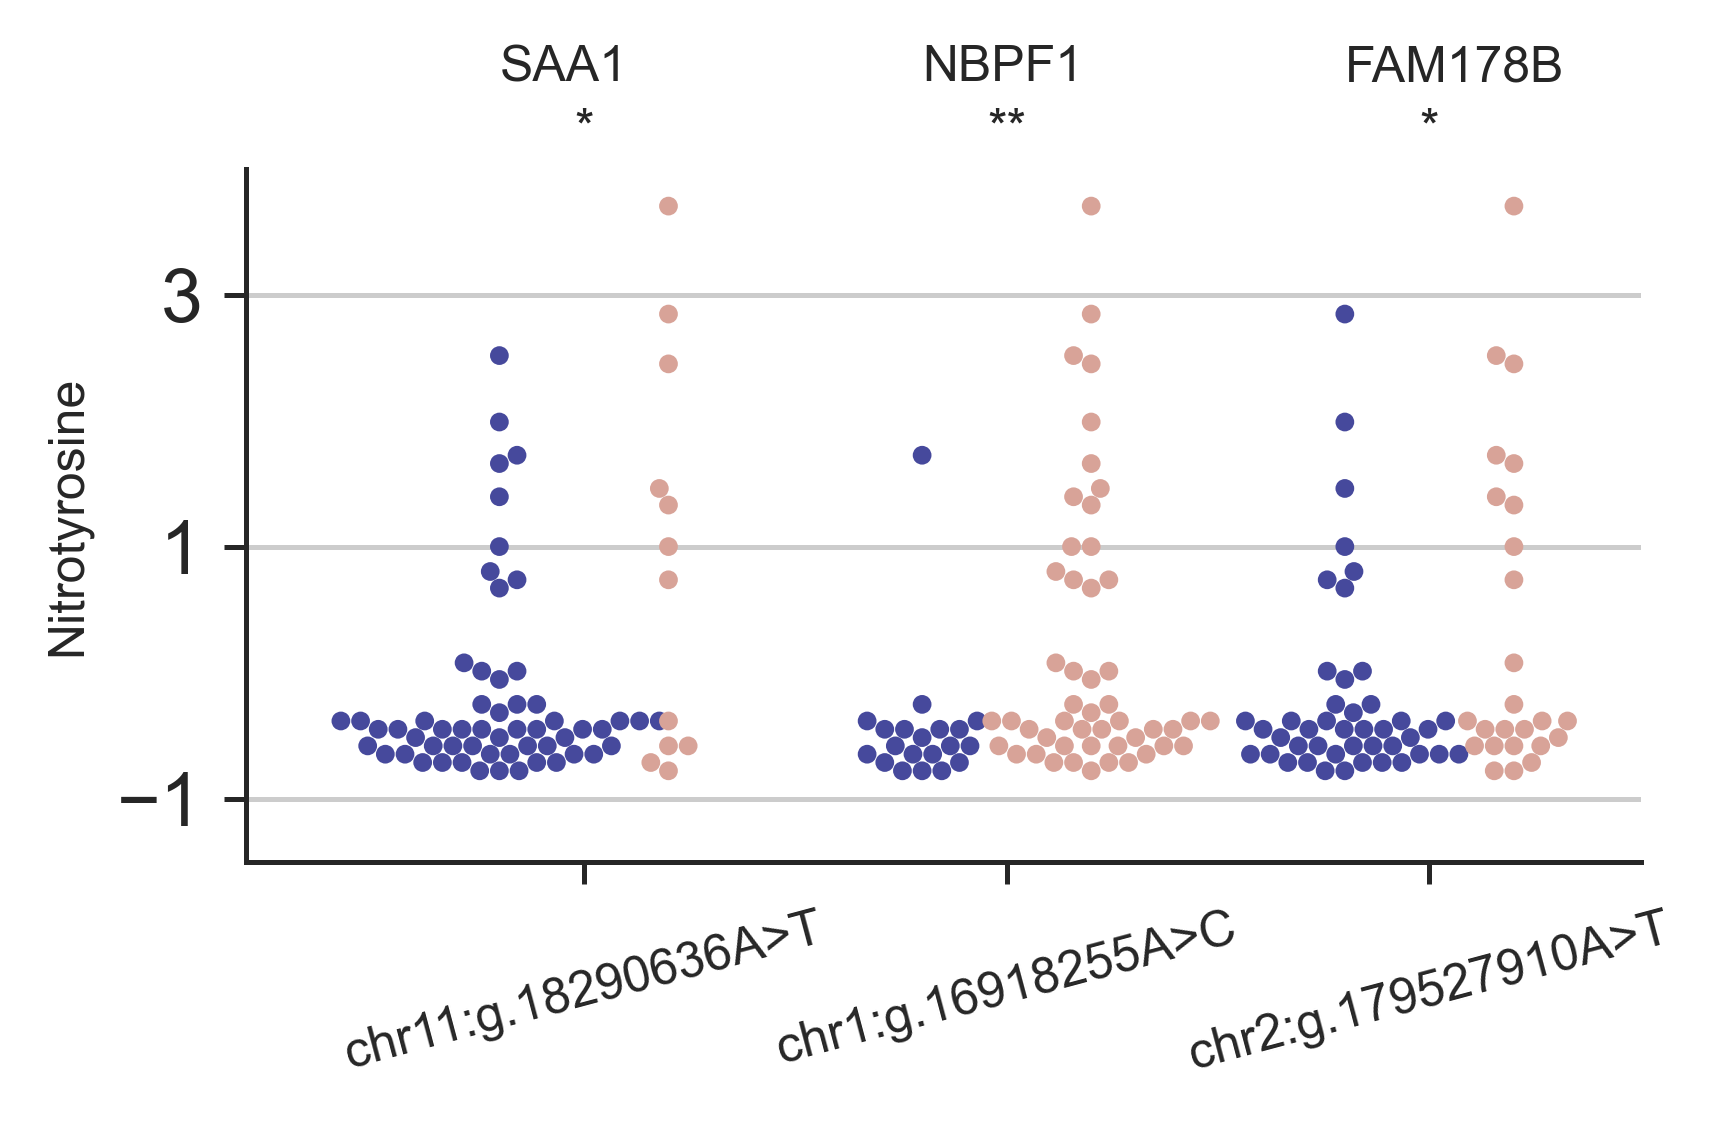

In [999]:
plt.subplots(figsize=(4,2),dpi=450)
sns.swarmplot(data=plot8,x='variable',hue='value',y='硝化酪氨酸',dodge=True,size=3,palette=['#46499c','#d8a398'])
for i,gene in enumerate(['chr11-18290636-18290636-A-T-SAA1',
 'chr1-16918255-16918255-A-C-NBPF1',
  'chr2-97712581-97712581-A-C-FAM178B']):
    mutant_data =    merged_df[merged_df[gene] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = merged_df[merged_df[gene] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    mutant_indicator_data    = mutant_data['硝化酪氨酸'].dropna()
    nonmutant_indicator_data = nonmutant_data['硝化酪氨酸'].dropna()
    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 4.2, star, ha='center', fontsize=8)
    plt.text(i-0.2,4.7,gene.split('-')[-1], fontsize=8)
plt.yticks([-1,1,3])
plt.xticks(range(3),[
    loci_dict2[x] for x in ['chr11-18290636-18290636-A-T-SAA1',
 'chr1-16918255-16918255-A-C-NBPF1',
 'chr2-179527910-179527910-A-T-TTN'] ],rotation=15,fontsize=8)
plt.ylim(-1.5,4)
plt.xlim(-0.8,2.5)
plt.xlabel('')
plt.ylabel("Nitrotyrosine",fontsize=8)
sns.despine(bottom=False )
plt.legend(loc=[0,1.1])
plt.grid(axis='y')
ax = plt.gca()if ax.get_legend():    ax.get_legend().remove()
plt.savefig('Fig3B1.pdf', bbox_inches='tight')
plt.show()

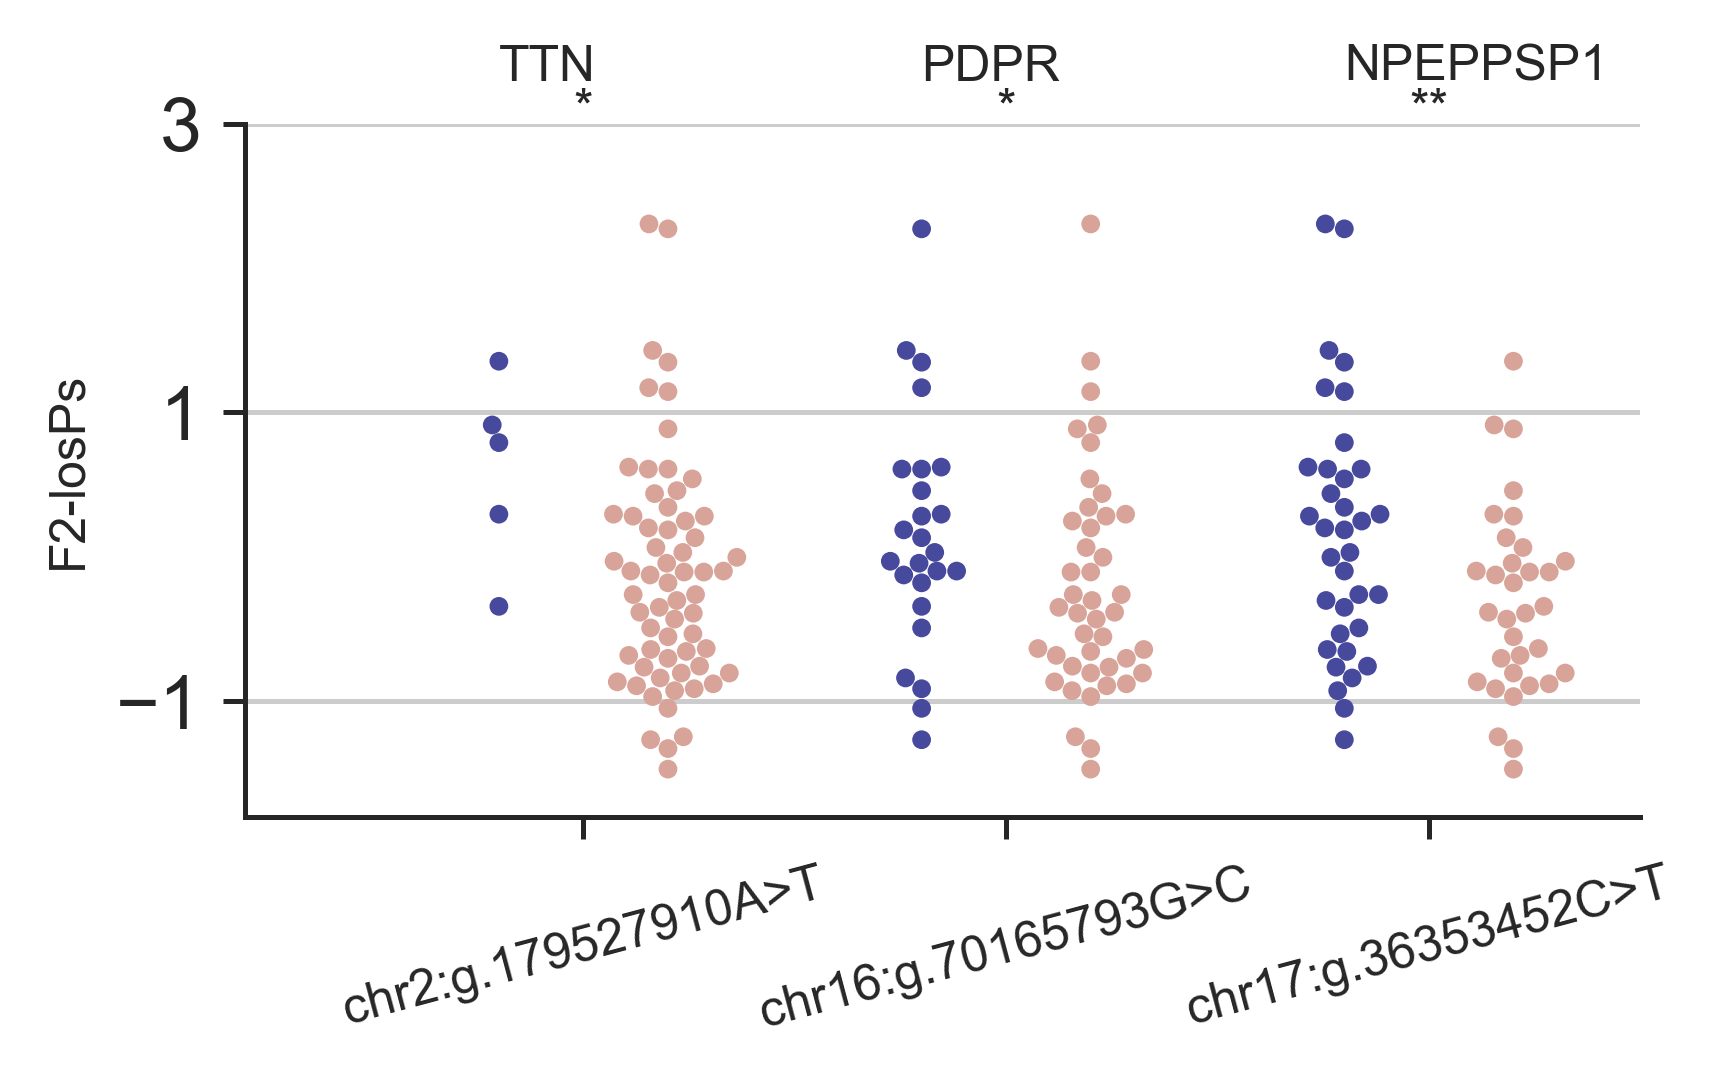

In [1000]:
plt.subplots(figsize=(4,2),dpi=450)
sns.swarmplot(data=plot7,x='variable',hue='value',y='花生四烯酸过氧化物',dodge=True,size=3,palette=['#46499c','#d8a398'])
for i,gene in enumerate(['chr2-179527910-179527910-A-T-TTN',
 'chr16-70165793-70165793-G-C-PDPR',
 'chr17-36353452-36353452-C-T-NPEPPSP1']):
    mutant_data =    merged_df[merged_df[gene] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = merged_df[merged_df[gene] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    mutant_indicator_data    = mutant_data['花生四烯酸过氧化物'].dropna()
    nonmutant_indicator_data = nonmutant_data['花生四烯酸过氧化物'].dropna()
    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 3, star, ha='center', fontsize=8)
    plt.text(i-0.2,3.3,gene.split('-')[-1], fontsize=8)
plt.yticks([-1,1,3])
plt.xticks(range(3),[
    loci_dict2[x] for x in ['chr2-179527910-179527910-A-T-TTN',
 'chr16-70165793-70165793-G-C-PDPR',
 'chr17-36353452-36353452-C-T-NPEPPSP1'] ],rotation=15,fontsize=8)
plt.ylim(-1.8,3)
plt.xlim(-0.8,2.5)
plt.xlabel('')
plt.ylabel("F2-losPs",fontsize=8)
sns.despine(bottom=False )
plt.legend(loc=[0,1.1])
plt.grid(axis='y')
ax = plt.gca()if ax.get_legend():    ax.get_legend().remove()
plt.savefig('Fig3B2.pdf', bbox_inches='tight')
plt.show()

In [ ]:
'丙二醛','chr2-112616040-112616040-T-C-ANAPC1',
    'chr3-195447805-195447805-T-C-MUC20',
    'chr1-16969246-16969246-G-A-CROCCP2'

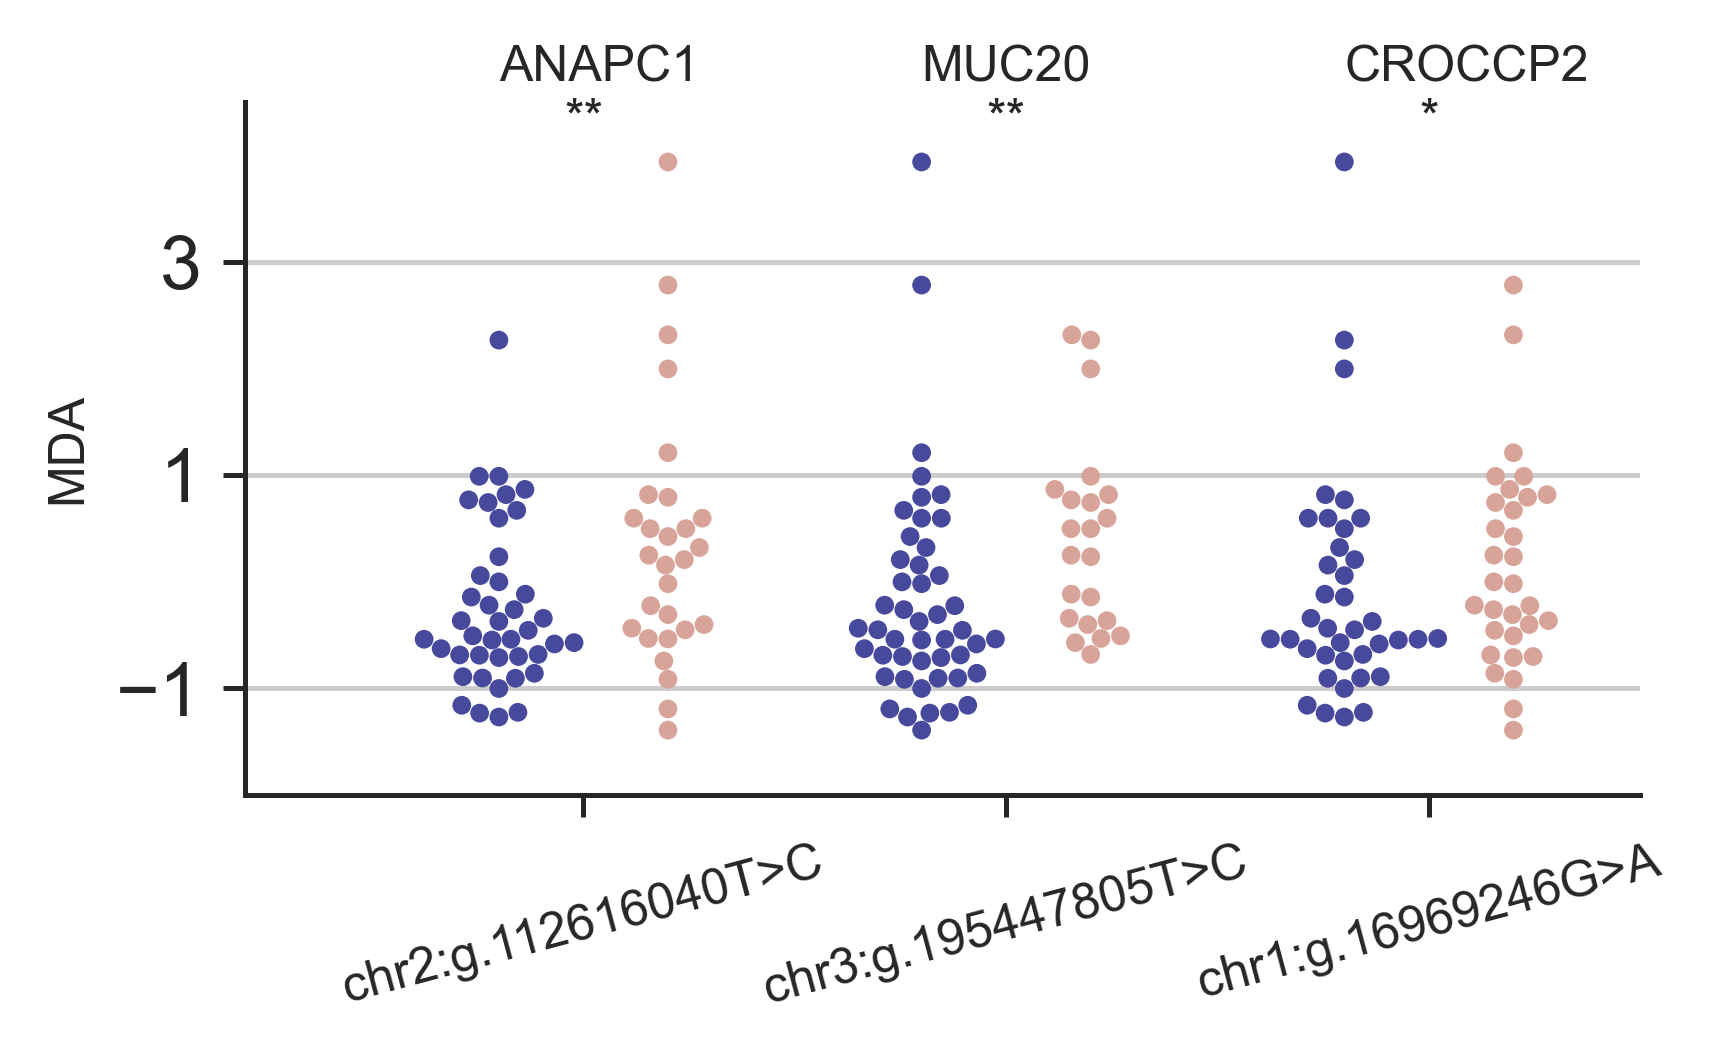

In [1003]:
plt.subplots(figsize=(4,2),dpi=450)
sns.swarmplot(data=plot10,x='variable',hue='value',y='丙二醛',dodge=True,size=3,palette=['#46499c','#d8a398'])
for i,gene in enumerate(['chr2-112616040-112616040-T-C-ANAPC1',
    'chr3-195447805-195447805-T-C-MUC20',
    'chr1-16969246-16969246-G-A-CROCCP2']):
    mutant_data =    merged_df[merged_df[gene] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = merged_df[merged_df[gene] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    mutant_indicator_data    = mutant_data['丙二醛'].dropna()
    nonmutant_indicator_data = nonmutant_data['丙二醛'].dropna()
    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 4.2, star, ha='center', fontsize=8)
    plt.text(i-0.2,4.7,gene.split('-')[-1], fontsize=8)
plt.yticks([-1,1,3])
plt.xticks(range(3),[
    loci_dict2[x] for x in ['chr2-112616040-112616040-T-C-ANAPC1',
    'chr3-195447805-195447805-T-C-MUC20',
    'chr1-16969246-16969246-G-A-CROCCP2'] ],rotation=15,fontsize=8)
plt.ylim(-2,4.5)
plt.xlim(-0.8,2.5)
plt.xlabel('')
plt.ylabel("MDA",fontsize=8)
sns.despine(bottom=False )
plt.legend(loc=[0,1.1])
plt.grid(axis='y')
ax = plt.gca()if ax.get_legend():    ax.get_legend().remove()
plt.savefig('Fig3B3.pdf', bbox_inches='tight')
plt.show()

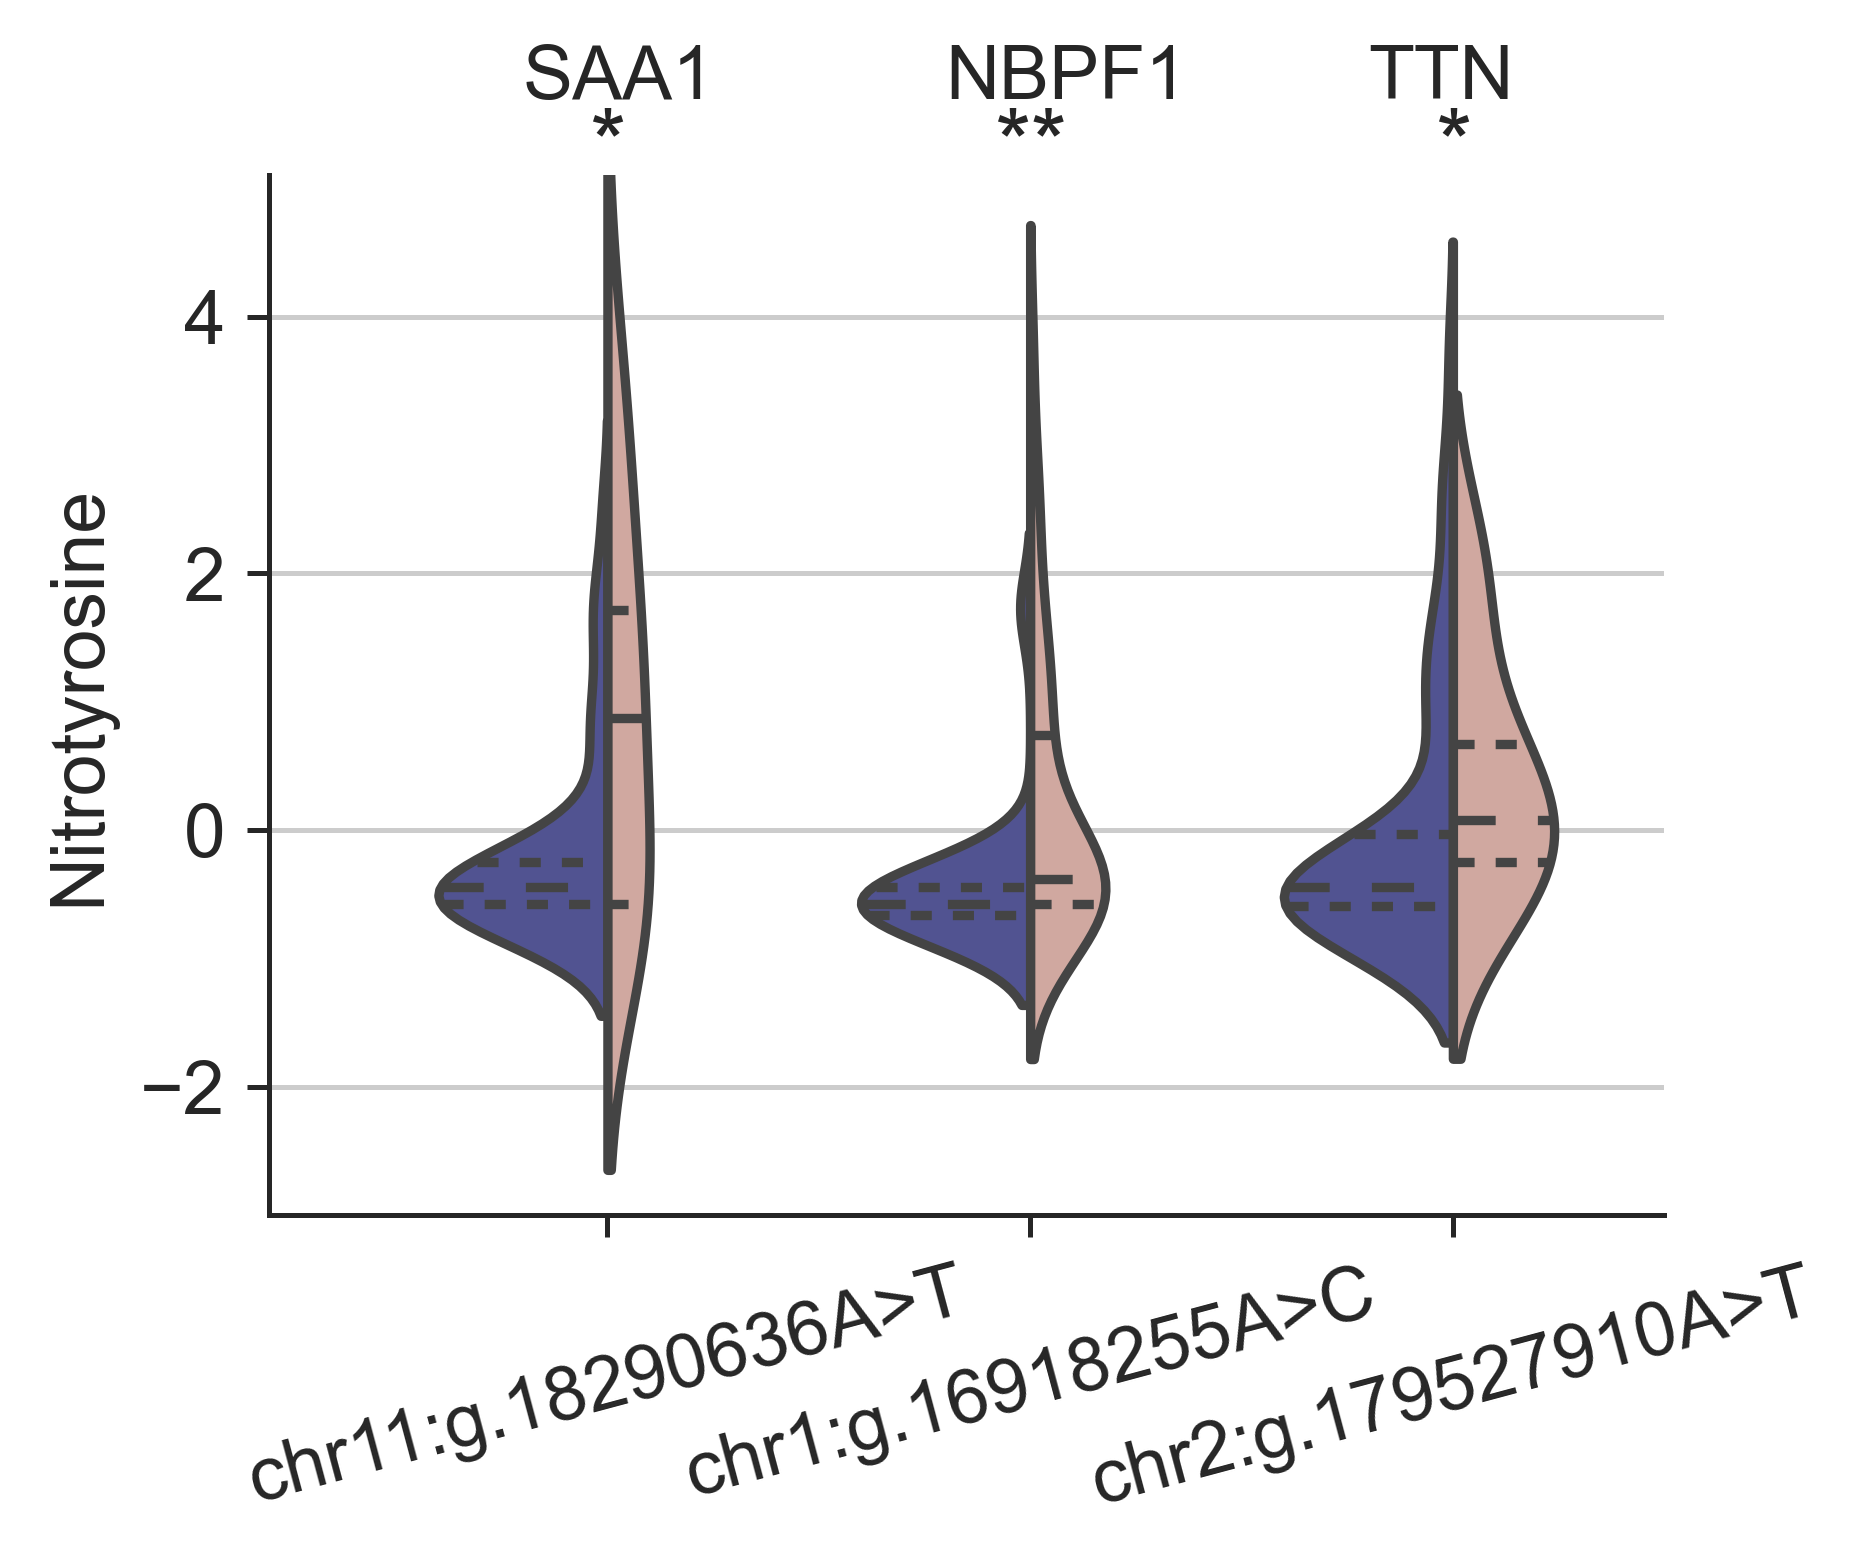

In [650]:
plt.subplots(figsize=(4,3),dpi=450)
sns.violinplot(data=plot8,x='variable',hue='value',y='硝化酪氨酸',dodge=True,size=6,palette=['#46499c','#d8a398'],
              split=True, inner="quart", legend=False, hue_order=['nonmutant','mut',],
              )

for i,gene in enumerate(['chr11-18290636-18290636-A-T-SAA1',
 'chr1-16918255-16918255-A-C-NBPF1',
 'chr2-179527910-179527910-A-T-TTN']):
    mutant_data =    merged_df[merged_df[gene] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = merged_df[merged_df[gene] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    mutant_indicator_data    = mutant_data['硝化酪氨酸'].dropna()
    nonmutant_indicator_data = nonmutant_data['硝化酪氨酸'].dropna()
        

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 5.1, star, ha='center', fontsize=15)
    plt.text(i-0.2,5.7,gene.split('-')[-1], fontsize=12)
plt.yticks([-2,0,2,4])
plt.xticks(range(3),[
    loci_dict2[x] for x in ['chr11-18290636-18290636-A-T-SAA1',
 'chr1-16918255-16918255-A-C-NBPF1',
 'chr2-179527910-179527910-A-T-TTN'] ],rotation=15)
plt.ylim(-3,5.1)
plt.xlim(-0.8,2.5)
plt.ylabel("Nitrotyrosine")
plt.xlabel("")
sns.despine(bottom=False
           )

plt.grid(axis='y')
plt.legend().remove()
plt.savefig('Fig3B1.pdf', bbox_inches='tight')
plt.show()


In [640]:
plot7=scaled_df2[['花生四烯酸过氧化物','chr2-179527910-179527910-A-T-TTN',
 'chr16-70165793-70165793-G-C-PDPR',
 'chr17-36353452-36353452-C-T-NPEPPSP1']].\
melt(id_vars='花生四烯酸过氧化物')
plot7['eng']=eng_chi_dict['花生四烯酸过氧化物']
plot7

花生四烯酸过氧化物                              variable      value       eng
0     0.294412      chr2-179527910-179527910-A-T-TTN        mut  F2-losPs
1    -0.099515      chr2-179527910-179527910-A-T-TTN  nonmutant  F2-losPs
2     2.270837      chr2-179527910-179527910-A-T-TTN  nonmutant  F2-losPs
3    -0.656446      chr2-179527910-179527910-A-T-TTN  nonmutant  F2-losPs
4     0.294412      chr2-179527910-179527910-A-T-TTN  nonmutant  F2-losPs
..         ...                                   ...        ...       ...
202  -1.471467  chr17-36353452-36353452-C-T-NPEPPSP1  nonmutant  F2-losPs
203  -0.099515  chr17-36353452-36353452-C-T-NPEPPSP1  nonmutant  F2-losPs
204   0.620420  chr17-36353452-36353452-C-T-NPEPPSP1        mut  F2-losPs
205  -0.894161  chr17-36353452-36353452-C-T-NPEPPSP1  nonmutant  F2-losPs
206  -1.267712  chr17-36353452-36353452-C-T-NPEPPSP1        mut  F2-losPs

[207 rows x 4 columns]

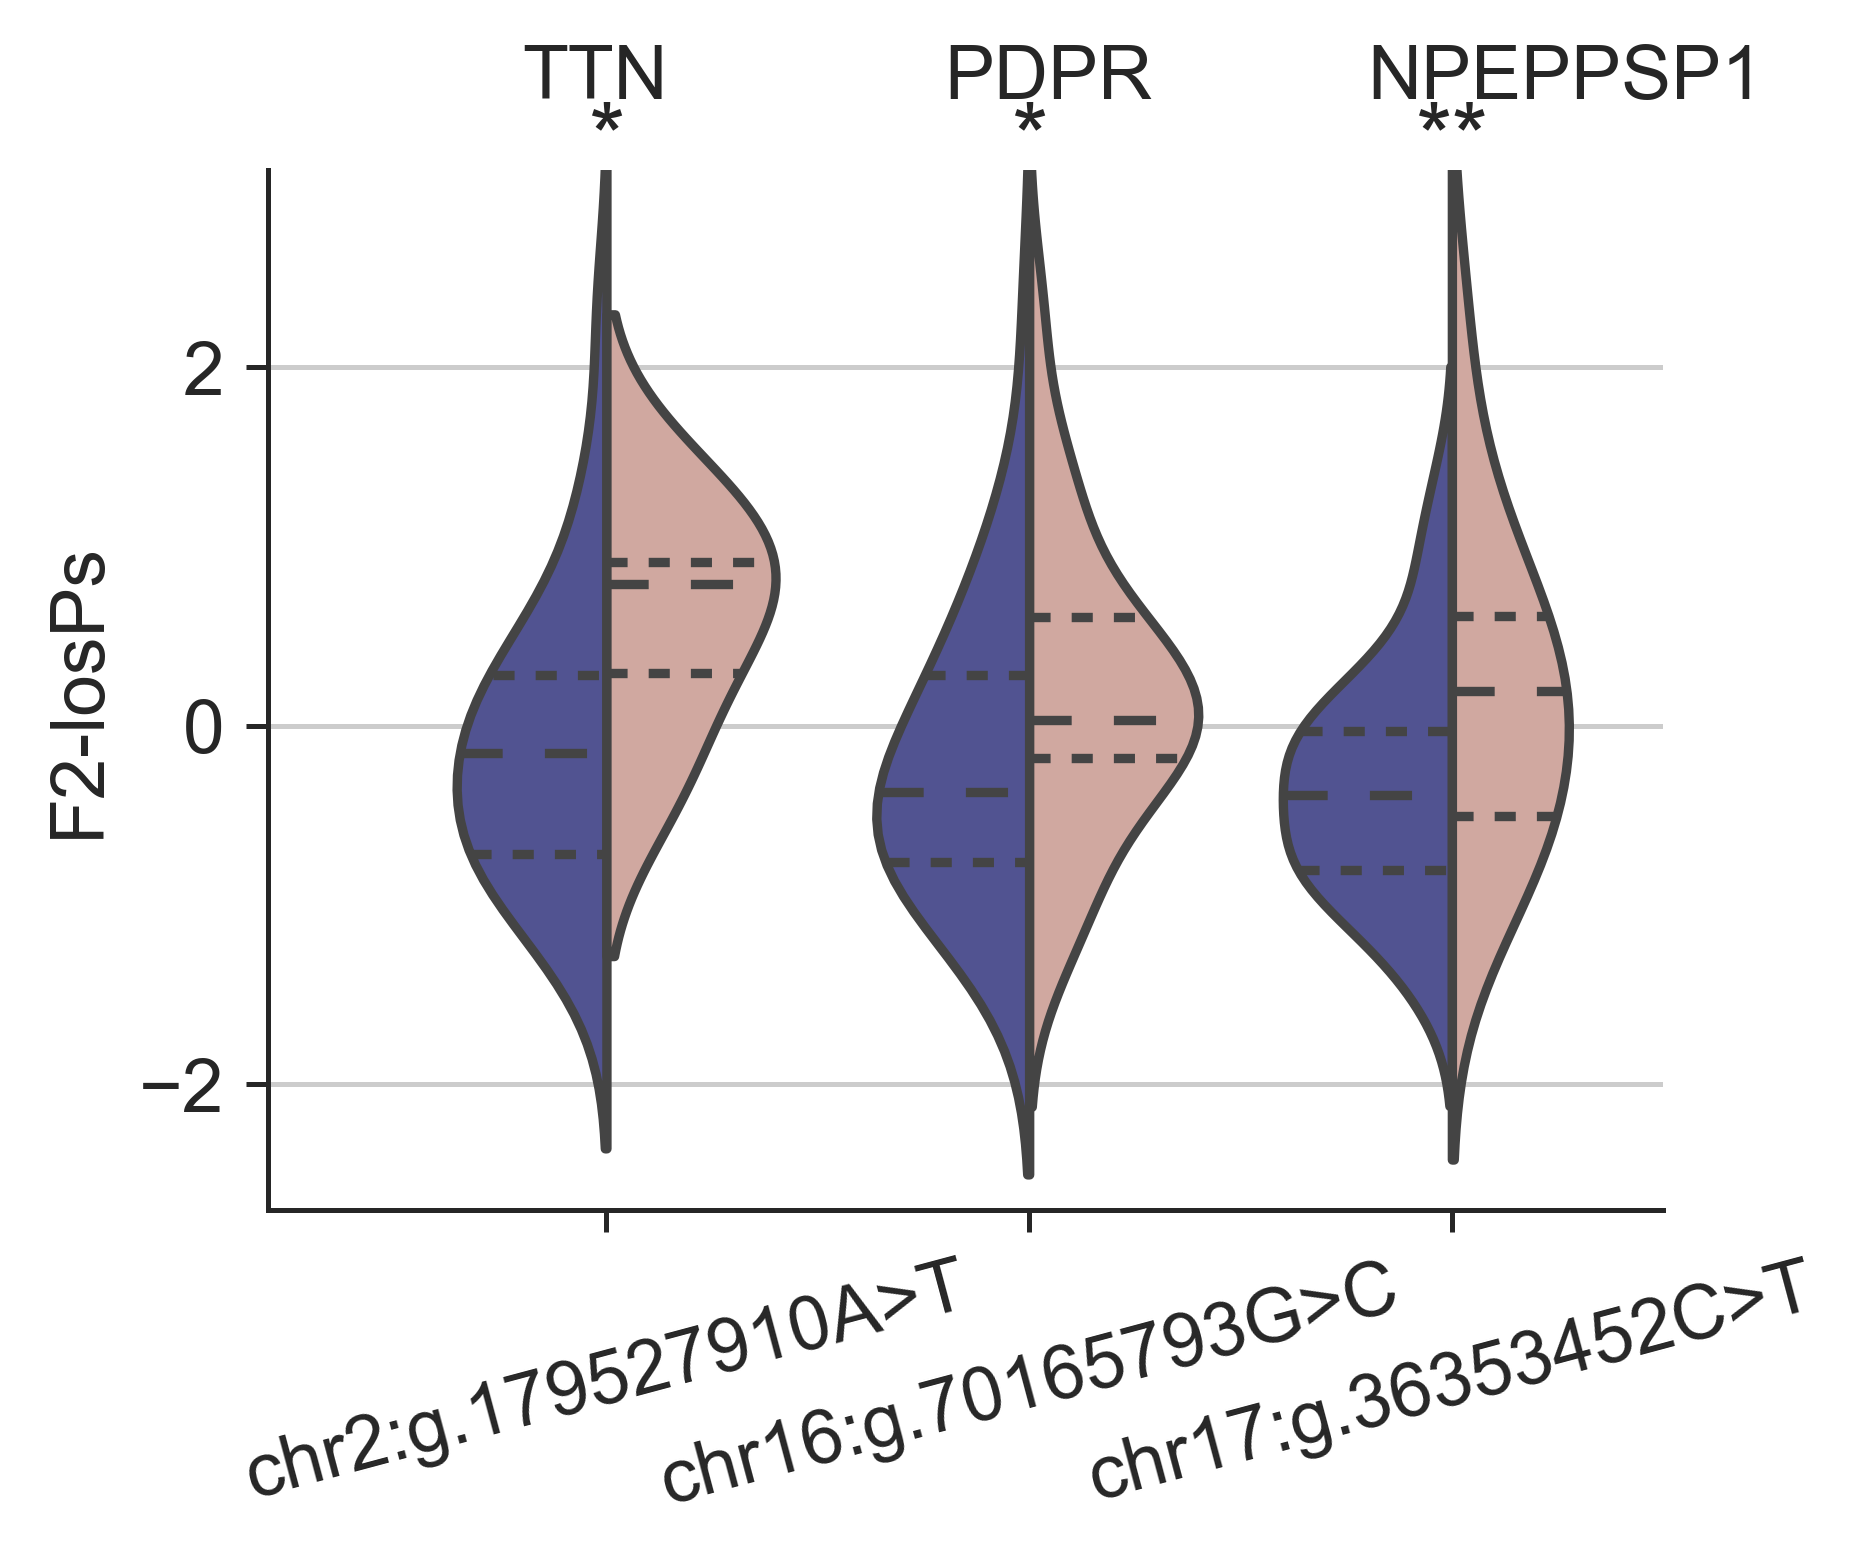

In [645]:
plt.subplots(figsize=(4,3),dpi=450)
sns.violinplot(
    data=plot7,
    x='variable',
    hue='value',
    hue_order=['nonmutant','mut',],
    y='花生四烯酸过氧化物',
    dodge=True,
    palette=['#46499c', '#d8a398'],
    split=True,
    inner="quart",
    legend=False,
    
)
for i,gene in enumerate(['chr2-179527910-179527910-A-T-TTN',
 'chr16-70165793-70165793-G-C-PDPR',
 'chr17-36353452-36353452-C-T-NPEPPSP1']):
    mutant_data =    merged_df[merged_df[gene] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = merged_df[merged_df[gene] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    mutant_indicator_data    = mutant_data['花生四烯酸过氧化物'].dropna()
    nonmutant_indicator_data = nonmutant_data['花生四烯酸过氧化物'].dropna()
        

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 3.1, star, ha='center', fontsize=15)
    plt.text(i-0.2,3.5,gene.split('-')[-1], fontsize=12)
plt.yticks([-2,0,2,4])
plt.xticks(range(3),[
    loci_dict2[x] for x in ['chr2-179527910-179527910-A-T-TTN',
 'chr16-70165793-70165793-G-C-PDPR',
 'chr17-36353452-36353452-C-T-NPEPPSP1',
] ],rotation=15)#ha='right')
plt.ylim(-2.7,3.1)
plt.xlim(-0.8,2.5)
plt.ylabel("F2-losPs")
plt.xlabel("")
sns.despine(bottom=False
           )


plt.legend().remove()
plt.grid(axis='y')
plt.savefig('Fig3C2.pdf', bbox_inches='tight')
plt.show()

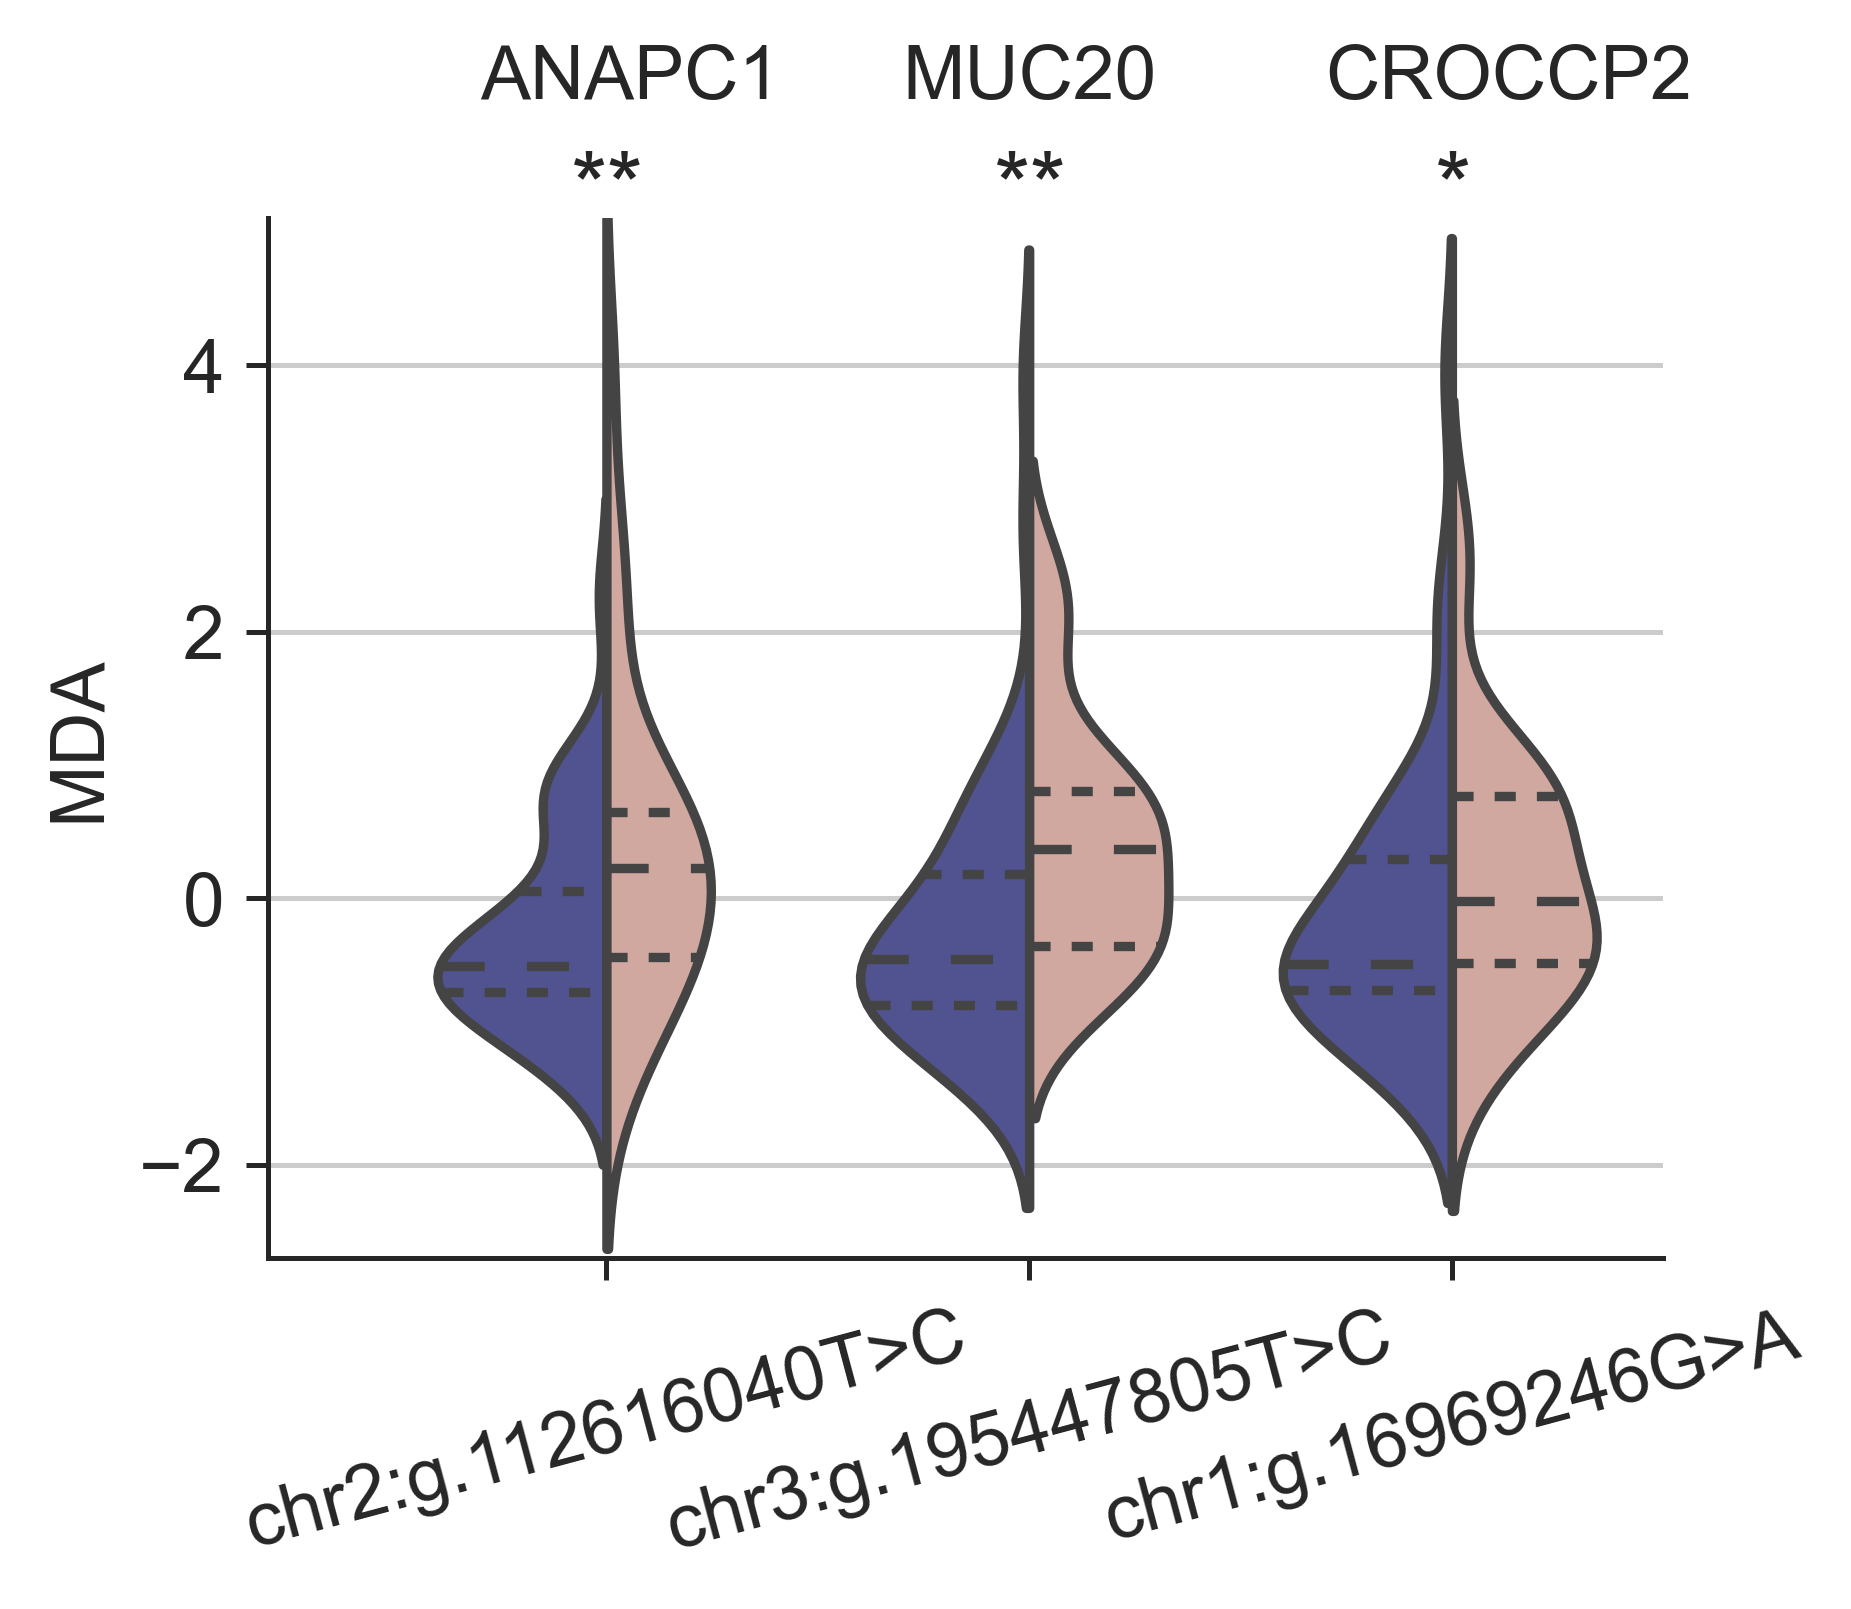

In [646]:
plt.subplots(figsize=(4,3),dpi=450)
sns.violinplot(data=plot6,x='variable',hue='value',y='丙二醛',dodge=True,size=6,palette=['#46499c','#d8a398'],
              split=True, inner="quart", legend=False,hue_order=['nonmutant','mut',],
              )

for i,gene in enumerate(['chr2-112616040-112616040-T-C-ANAPC1',
    'chr3-195447805-195447805-T-C-MUC20',
    'chr1-16969246-16969246-G-A-CROCCP2']):
    mutant_data =    merged_df[merged_df[gene] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = merged_df[merged_df[gene] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    mutant_indicator_data    = mutant_data['丙二醛'].dropna()
    nonmutant_indicator_data = nonmutant_data['丙二醛'].dropna()
        

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 5.1, star, ha='center', fontsize=15)
    plt.text(i-0.3, 6,gene.split('-')[-1], fontsize=12)
plt.yticks([-2,0,2,4])
plt.xticks(range(3),[
    loci_dict2[x] for x in ['chr2-112616040-112616040-T-C-ANAPC1',
    'chr3-195447805-195447805-T-C-MUC20',
    'chr1-16969246-16969246-G-A-CROCCP2'] ],rotation=15)
plt.ylim(-2.7,5.1)
plt.xlim(-0.8,2.5)
plt.ylabel("MDA")
plt.xlabel("")
sns.despine(bottom=False
           )


plt.legend().remove()
plt.grid(axis='y')
plt.savefig('Fig3C3.pdf', bbox_inches='tight')
plt.show()

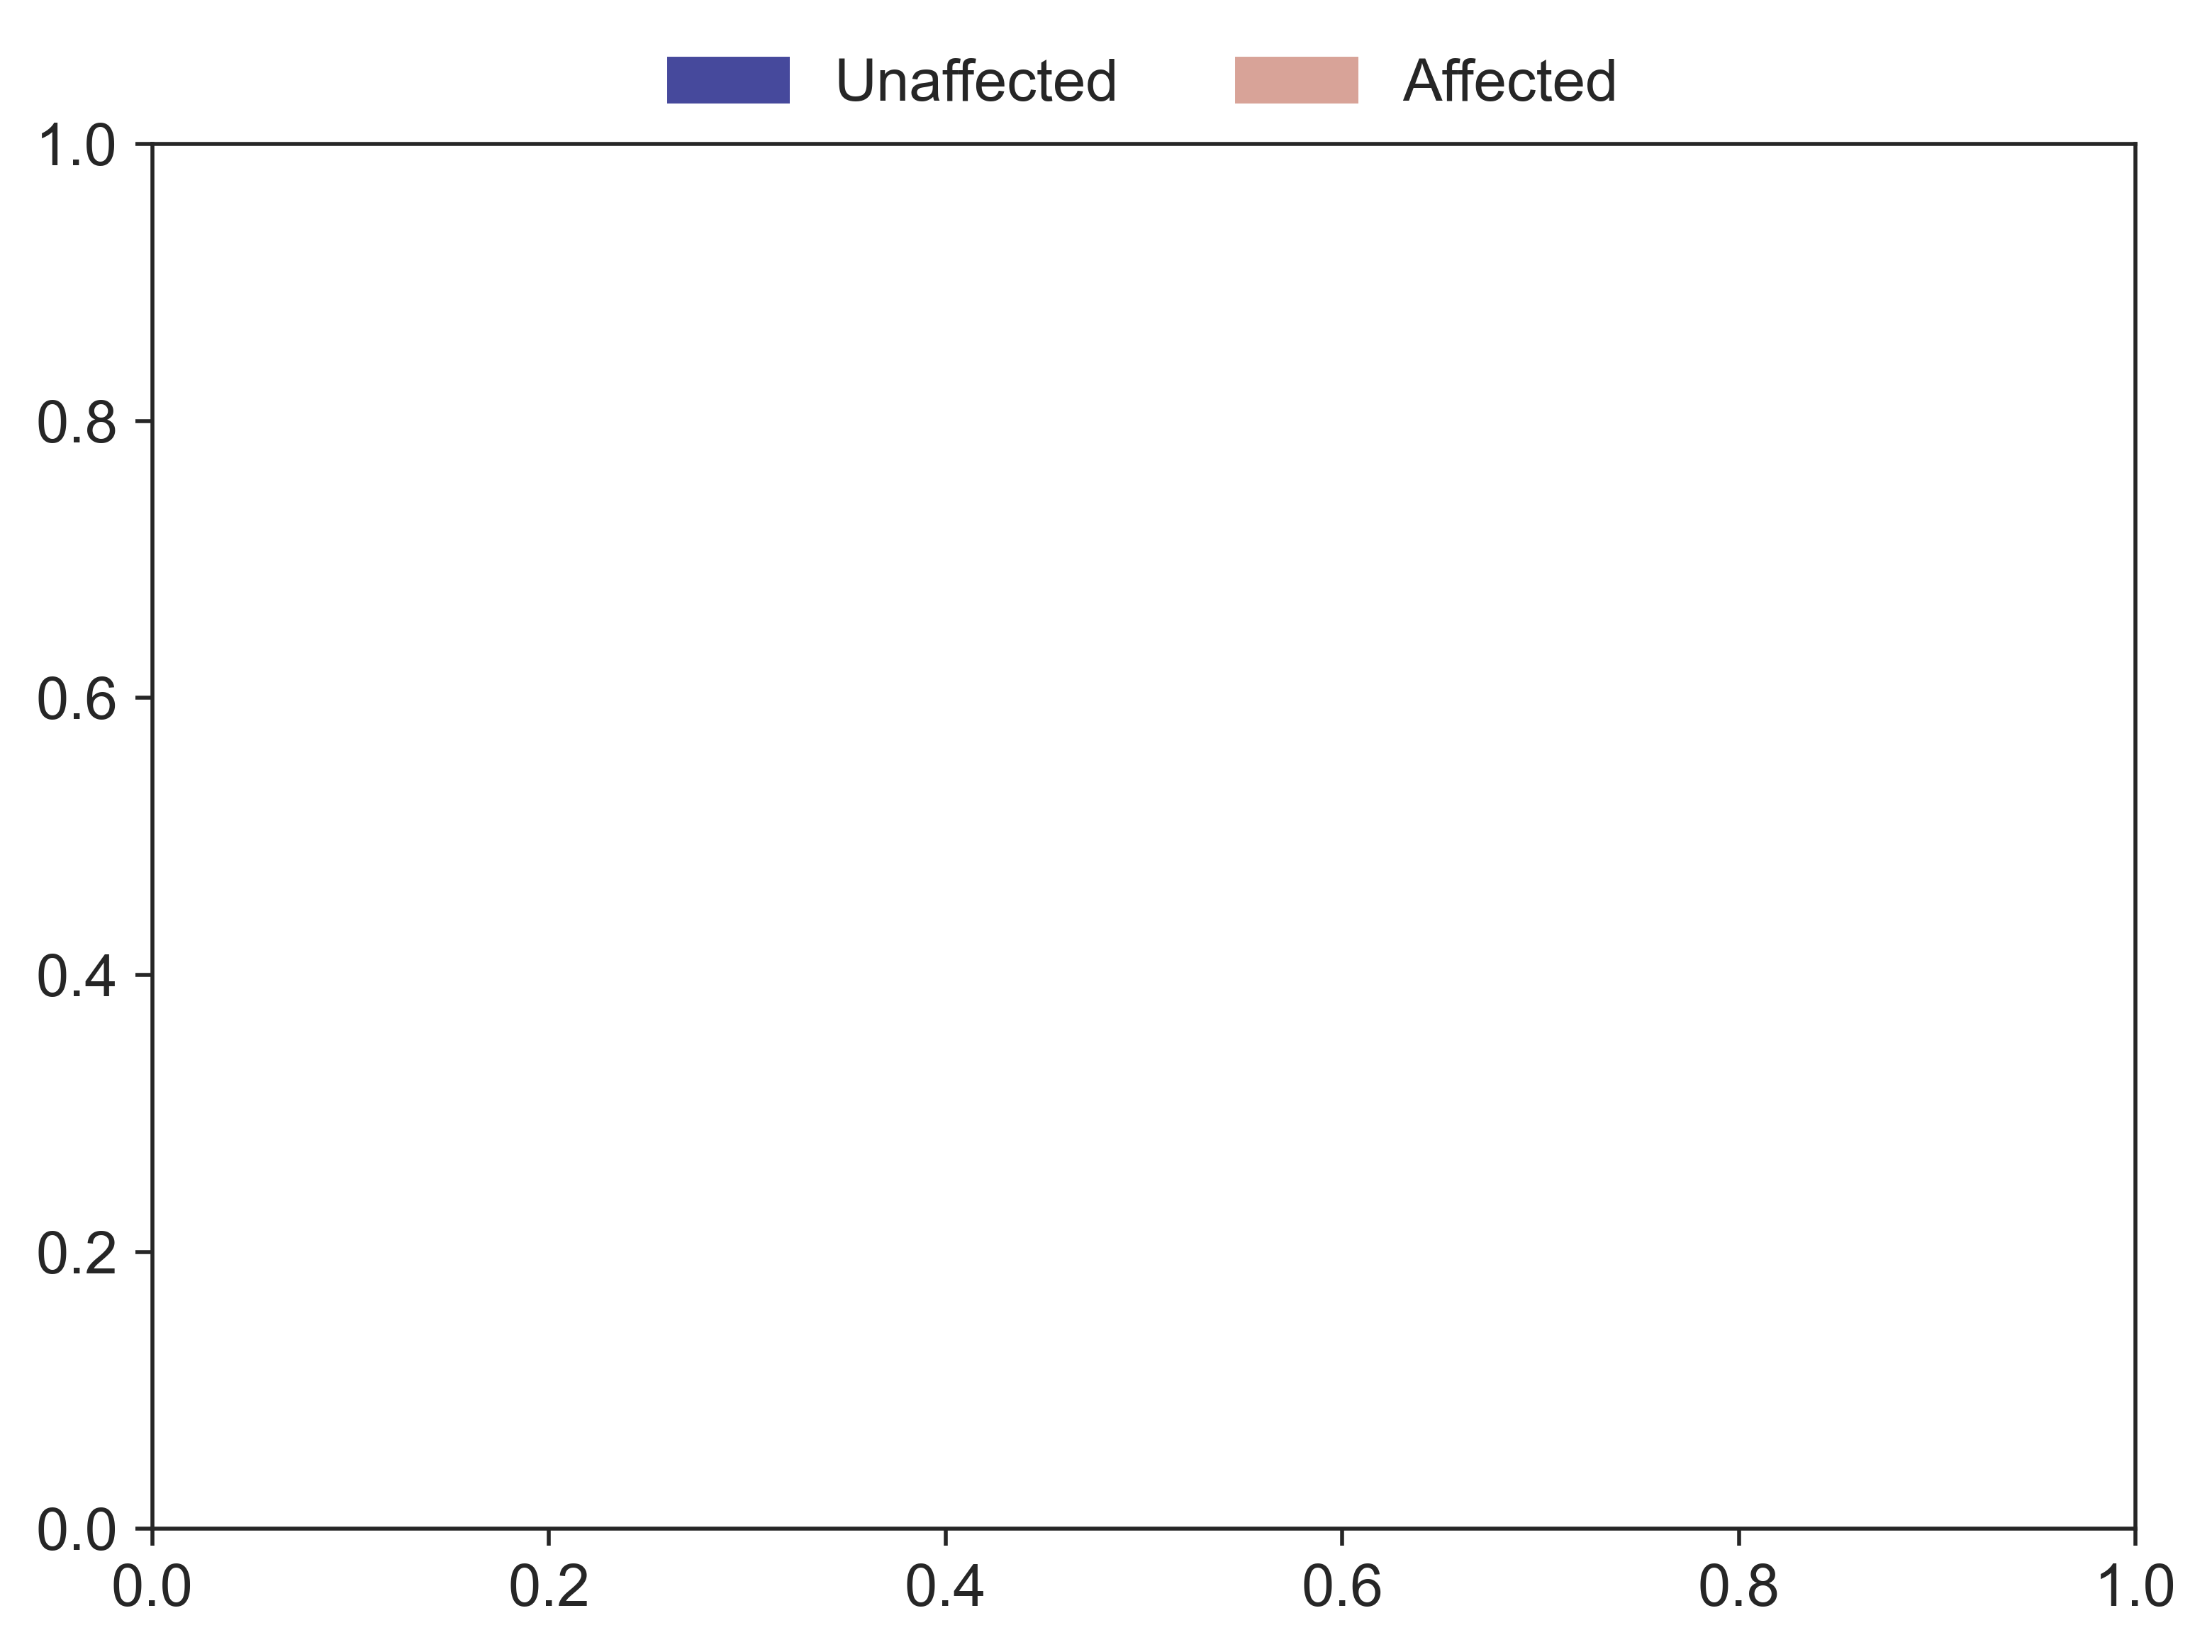

In [1010]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(dpi=500)

blue_patch = mpatches.Patch(facecolor='#d8a398', edgecolor='#d8a398', label='Affected')
red_patch = mpatches.Patch(facecolor='#46499c', edgecolor='#46499c', label='Unaffected')

ax.legend(
    handles=[red_patch, blue_patch],
    ncol=2,    loc='upper center',    bbox_to_anchor=(0.5, 1.1),    frameon=False)

plt.tight_layout()
plt.show()

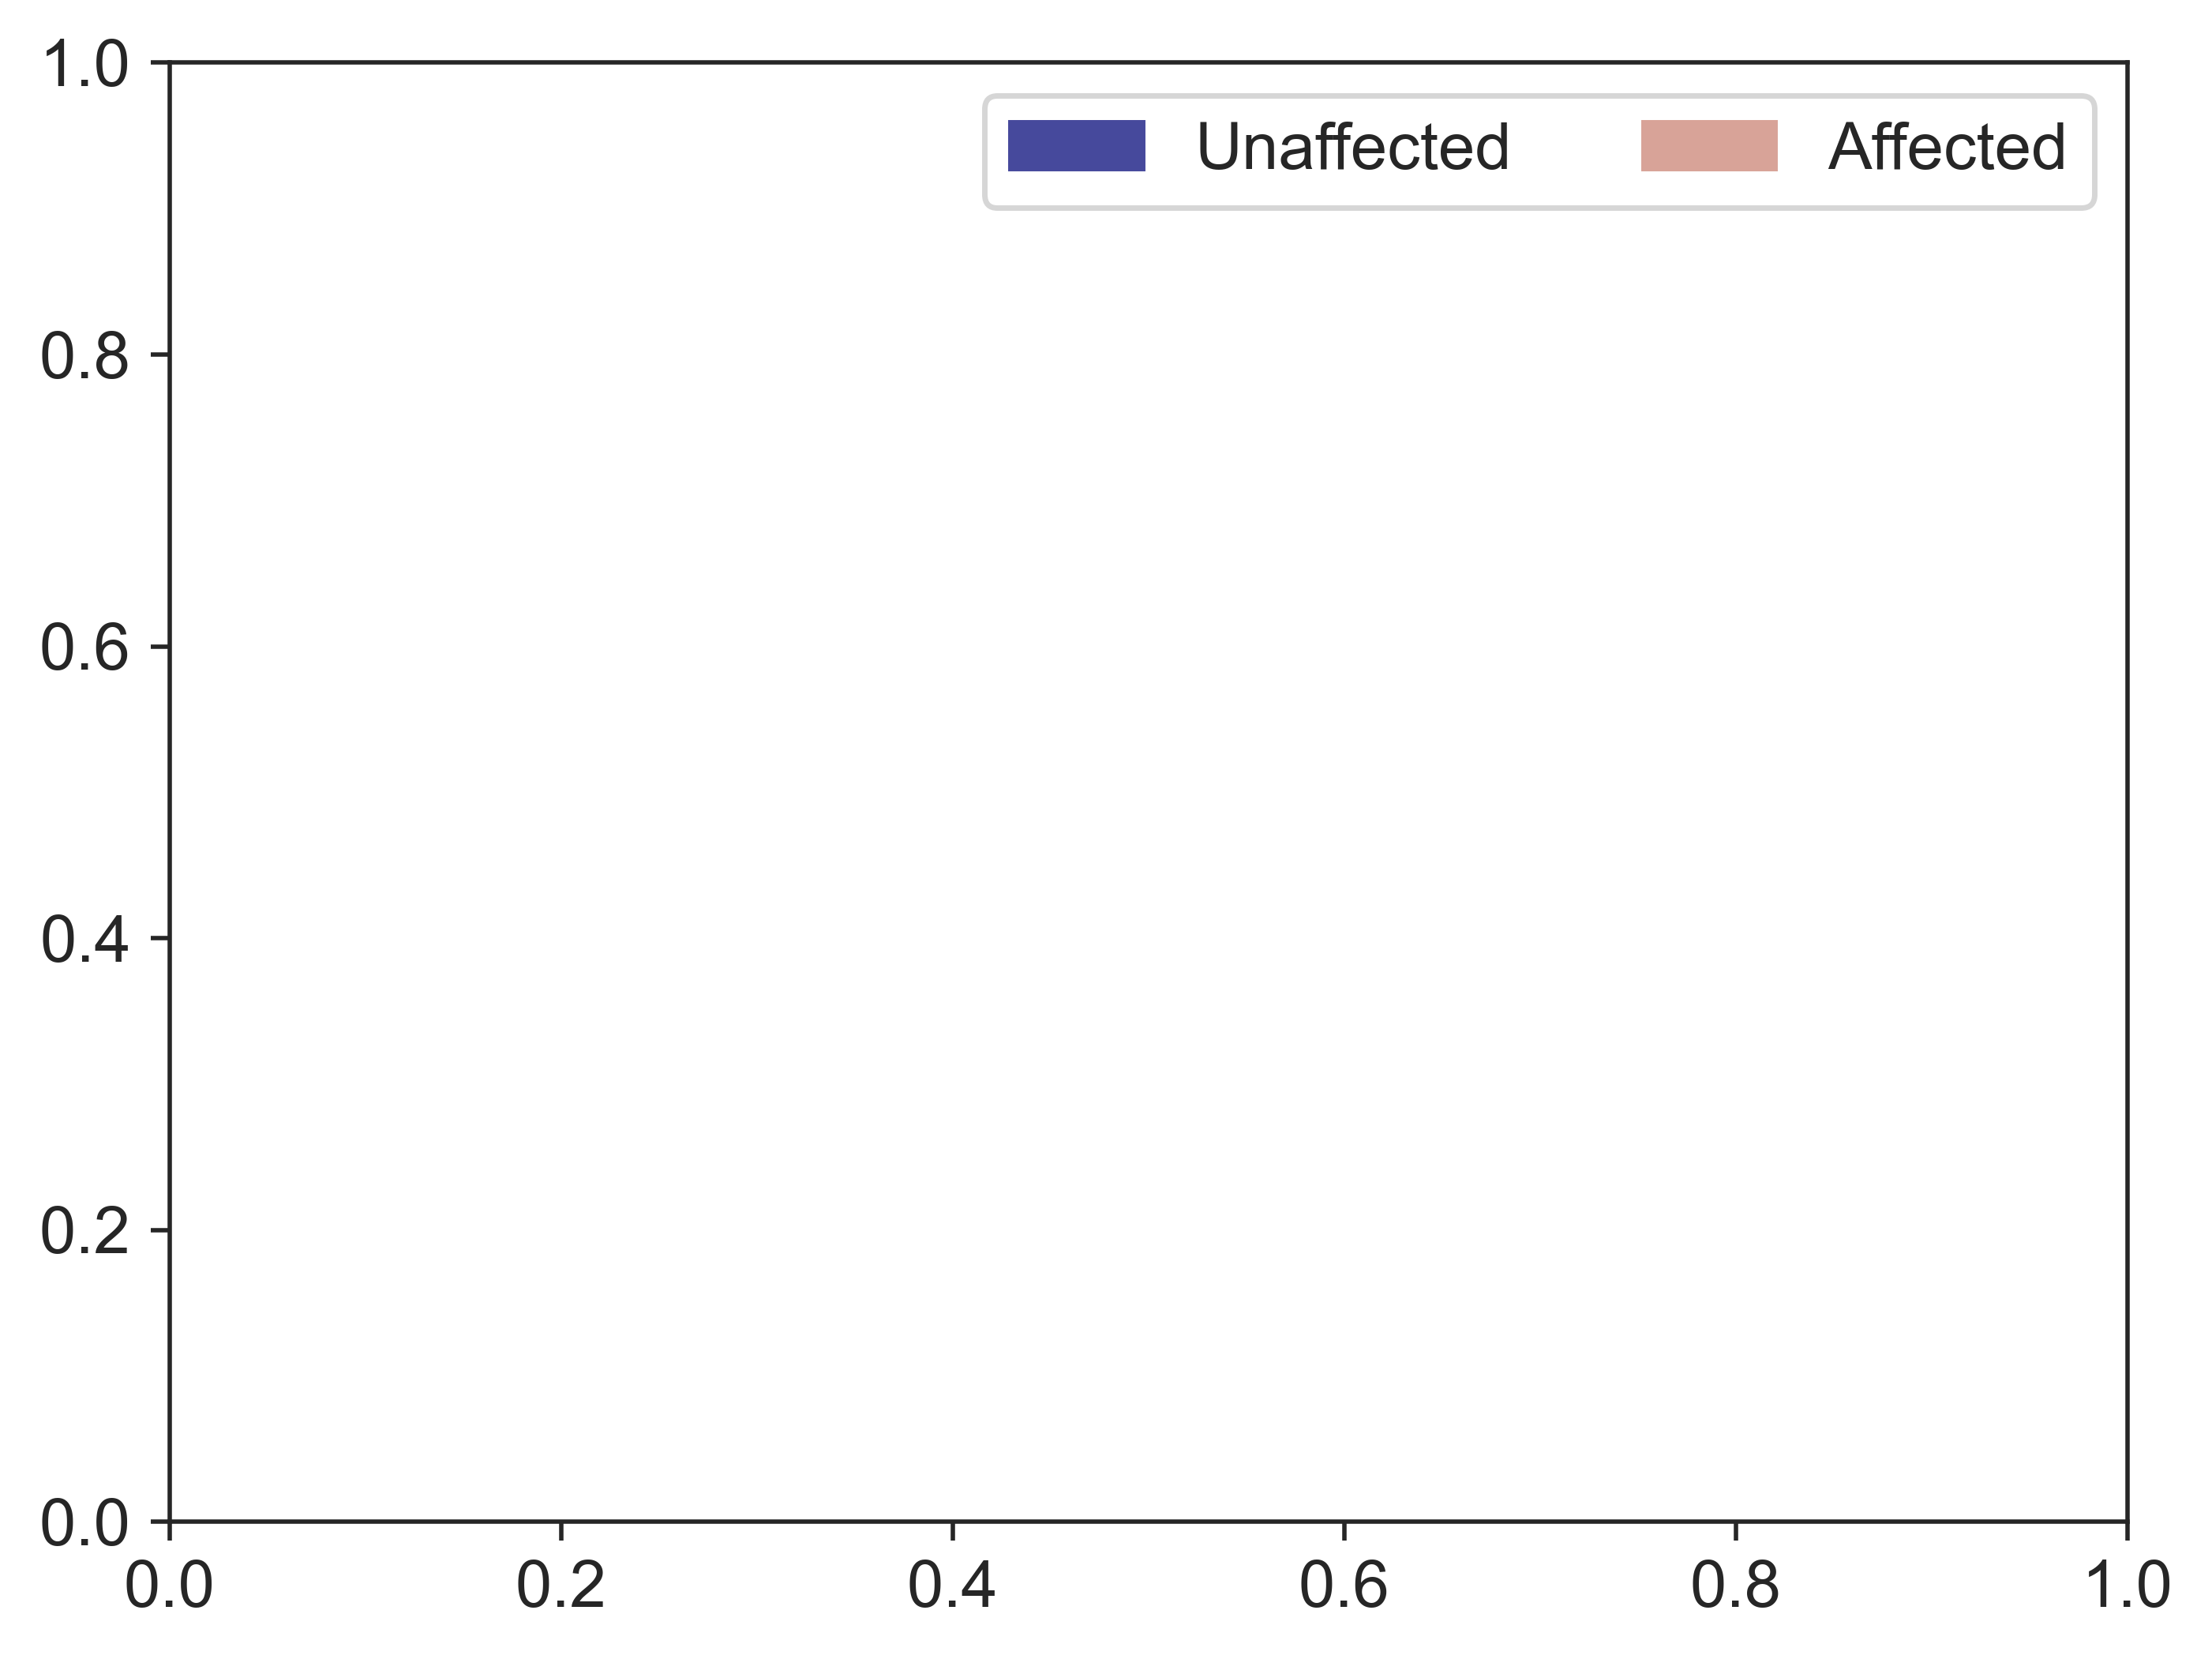

In [1013]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(dpi=500)
blue_patch = mpatches.Patch(facecolor='#d8a398',edgecolor='#d8a398', label='Affected')
red_patch = mpatches.Patch(facecolor='#46499c', edgecolor='#46499c',label='Unaffected')


ax.legend(handles=[red_patch, blue_patch],ncol=2)

plt.savefig('legend.pdf', bbox_inches='tight')
plt.show()


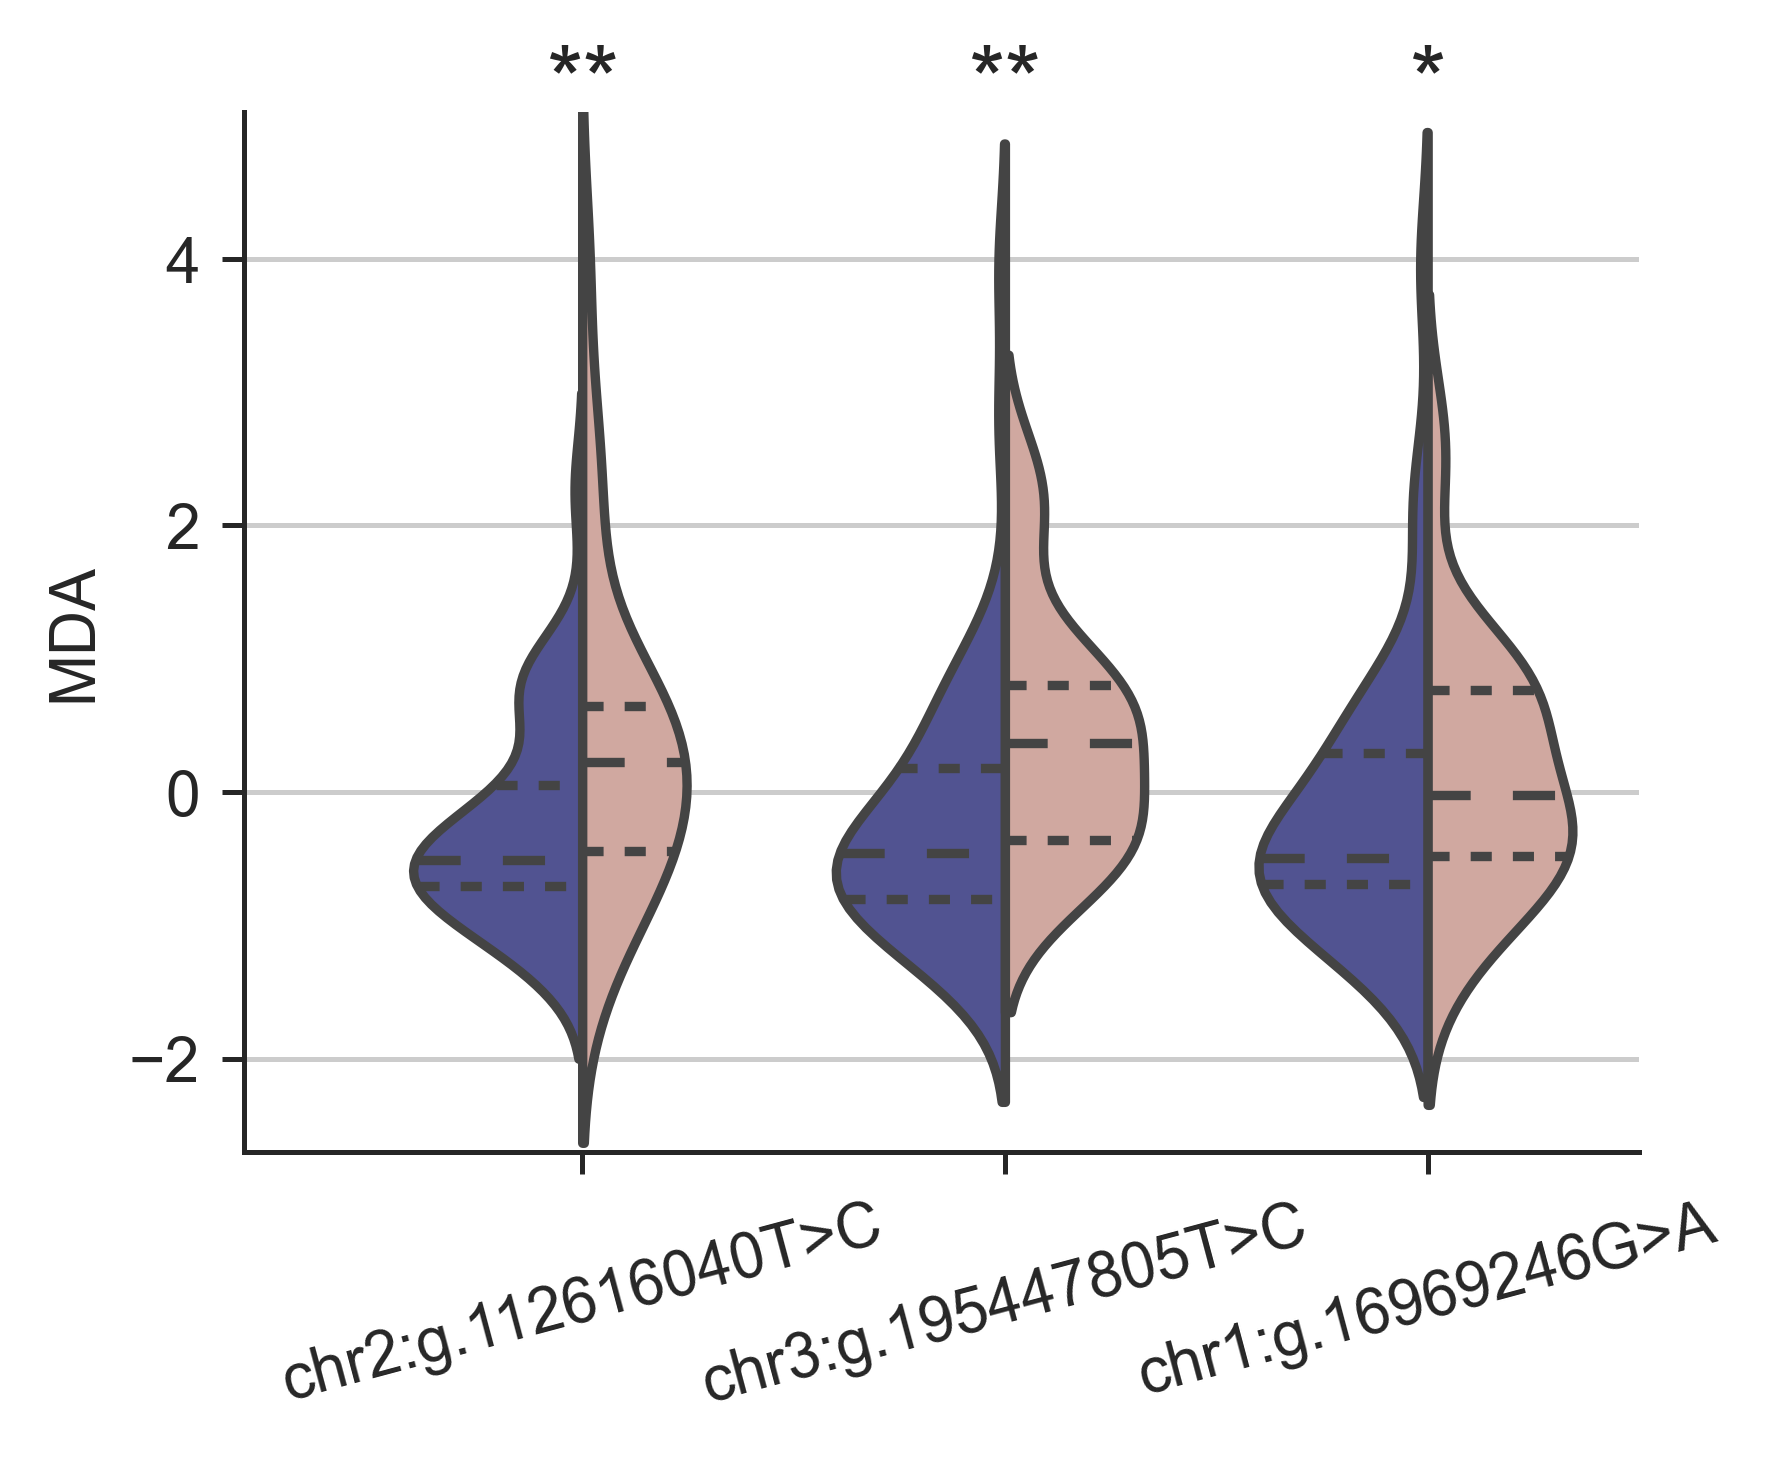

In [174]:
plt.subplots(figsize=(4,3),dpi=450)
sns.violinplot(data=plot6,x='variable',hue='value',y='丙二醛',dodge=True,size=6,palette=['#46499c','#d8a398'],
              split=True, inner="quart", legend=False
              )

for i,gene in enumerate(['chr2-112616040-112616040-T-C-ANAPC1',
    'chr3-195447805-195447805-T-C-MUC20',
    'chr1-16969246-16969246-G-A-CROCCP2']):
    mutant_data =    merged_df[merged_df[gene] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = merged_df[merged_df[gene] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    mutant_indicator_data    = mutant_data['丙二醛'].dropna()
    nonmutant_indicator_data = nonmutant_data['丙二醛'].dropna()
        

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 5.1, star, ha='center', fontsize=15)
plt.yticks([-2,0,2,4])
plt.xticks(range(3),[
    loci_dict2[x] for x in ['chr2-112616040-112616040-T-C-ANAPC1',
    'chr3-195447805-195447805-T-C-MUC20',
    'chr1-16969246-16969246-G-A-CROCCP2'] ],rotation=15)
plt.ylim(-2.7,5.1)
plt.xlim(-0.8,2.5)
plt.ylabel("MDA")
plt.xlabel("")
sns.despine(bottom=False
           )


plt.legend().remove()
plt.grid(axis='y')
plt.show()

In [176]:
oxidativedf[oxidativedf['geneloci']=='chr14-19114642-19114642-A-G-OR11H12']

geneloci indicator   p_value  \
10  chr14-19114642-19114642-A-G-OR11H12  8-羟基脱氧鸟苷  0.024744   
11  chr14-19114642-19114642-A-G-OR11H12   超氧化物歧化酶  0.048725   

        gene2_formatted  
10  chr14:g.19114642A>G  
11  chr14:g.19114642A>G

In [177]:
plot7=scaled_df2[['8-羟基脱氧鸟苷','超氧化物歧化酶','chr14-19114642-19114642-A-G-OR11H12']].\
melt(id_vars='chr14-19114642-19114642-A-G-OR11H12')
plot7['eng']=plot7['variable'].map(eng_chi_dict)
plot7

chr14-19114642-19114642-A-G-OR11H12  variable     value     eng
0                             nonmutant  8-羟基脱氧鸟苷  0.258814  8-OHdG
1                             nonmutant  8-羟基脱氧鸟苷 -0.692328  8-OHdG
2                             nonmutant  8-羟基脱氧鸟苷 -1.051432  8-OHdG
3                             nonmutant  8-羟基脱氧鸟苷 -0.226462  8-OHdG
4                             nonmutant  8-羟基脱氧鸟苷 -1.197015  8-OHdG
..                                  ...       ...       ...     ...
133                           nonmutant   超氧化物歧化酶  1.803703     SOD
134                           nonmutant   超氧化物歧化酶  1.585893     SOD
135                           nonmutant   超氧化物歧化酶  0.477040     SOD
136                           nonmutant   超氧化物歧化酶  1.467087     SOD
137                           nonmutant   超氧化物歧化酶  0.747653     SOD

[138 rows x 4 columns]

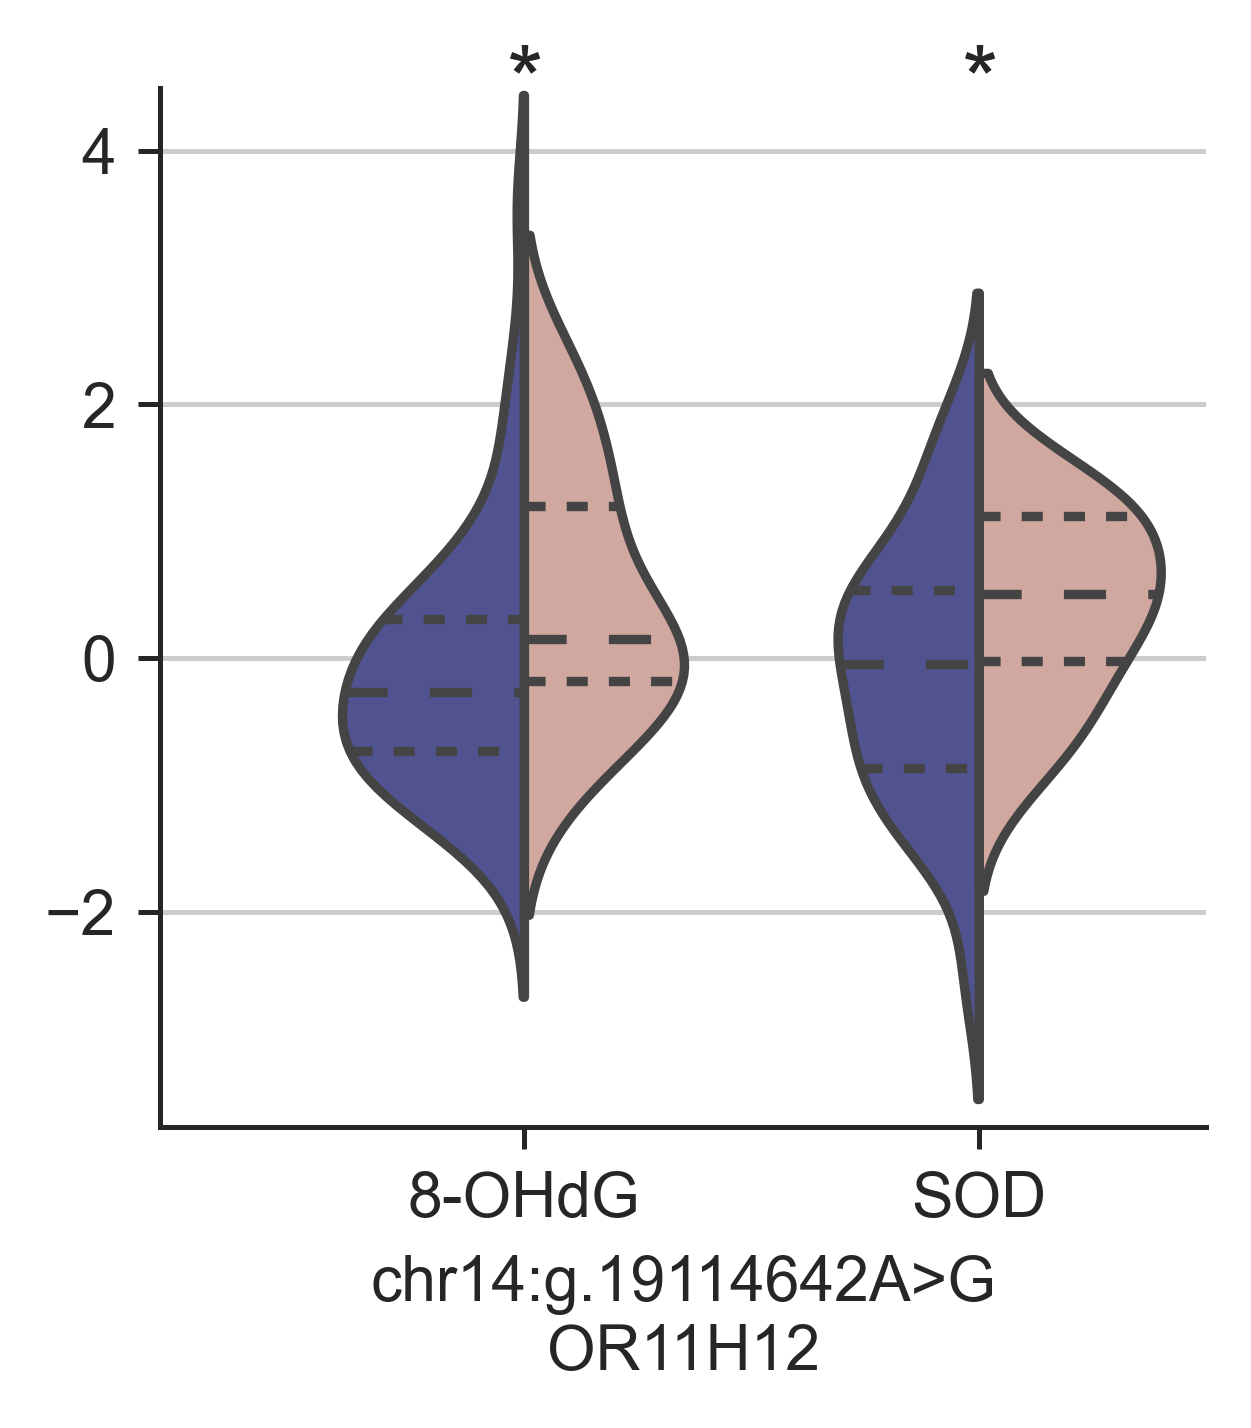

In [178]:
mutant_data =    merged_df[merged_df['chr14-19114642-19114642-A-G-OR11H12'] == 'mut']#.drop(columns=gene_sites + ['type'])
nonmutant_data = merged_df[merged_df['chr14-19114642-19114642-A-G-OR11H12'] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    

plt.subplots(figsize=(3,3),dpi=450)
sns.violinplot(data=plot7,x='eng',hue='chr14-19114642-19114642-A-G-OR11H12',y='value',dodge=True,size=6,palette=['#46499c','#d8a398'],
              split=True, inner="quart", 
              )
for i,indicator in enumerate(['8-羟基脱氧鸟苷','超氧化物歧化酶',]):
    
    
    mutant_indicator_data = mutant_data[indicator].dropna()
    nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 4.3, star, ha='center', fontsize=15)
plt.xlabel(loci_dict2['chr14-19114642-19114642-A-G-OR11H12']+"\nOR11H12")
plt.yticks([-2,0,2,4])
plt.ylim(-3.7,4.5)
plt.xlim(-0.8,1.5)
plt.ylabel("")

sns.despine(bottom=False
           )
plt.legend().remove()
plt.grid(axis='y')
plt.show()

In [179]:
oxidativedf[oxidativedf['geneloci']=='chr5-122737709-122737709-C-T-CEP120']

geneloci indicator   p_value  \
53  chr5-122737709-122737709-C-T-CEP120      谷胱甘肽  0.049651   
54  chr5-122737709-122737709-C-T-CEP120  谷胱甘肽硫转移酶  0.039637   

        gene2_formatted  
53  chr5:g.122737709C>T  
54  chr5:g.122737709C>T

In [180]:
plot8=scaled_df2[['谷胱甘肽','谷胱甘肽硫转移酶','chr5-122737709-122737709-C-T-CEP120']].\
melt(id_vars='chr5-122737709-122737709-C-T-CEP120')
plot8['eng']=plot8['variable'].map(eng_chi_dict)
plot8

chr5-122737709-122737709-C-T-CEP120  variable     value    eng
0                             nonmutant      谷胱甘肽 -0.795675  t-GSH
1                                   mut      谷胱甘肽  0.151829  t-GSH
2                                   mut      谷胱甘肽  3.334011  t-GSH
3                             nonmutant      谷胱甘肽  1.224474  t-GSH
4                             nonmutant      谷胱甘肽  0.902681  t-GSH
..                                  ...       ...       ...    ...
133                           nonmutant  谷胱甘肽硫转移酶       NaN   GSTs
134                           nonmutant  谷胱甘肽硫转移酶       NaN   GSTs
135                           nonmutant  谷胱甘肽硫转移酶       NaN   GSTs
136                           nonmutant  谷胱甘肽硫转移酶       NaN   GSTs
137                           nonmutant  谷胱甘肽硫转移酶       NaN   GSTs

[138 rows x 4 columns]

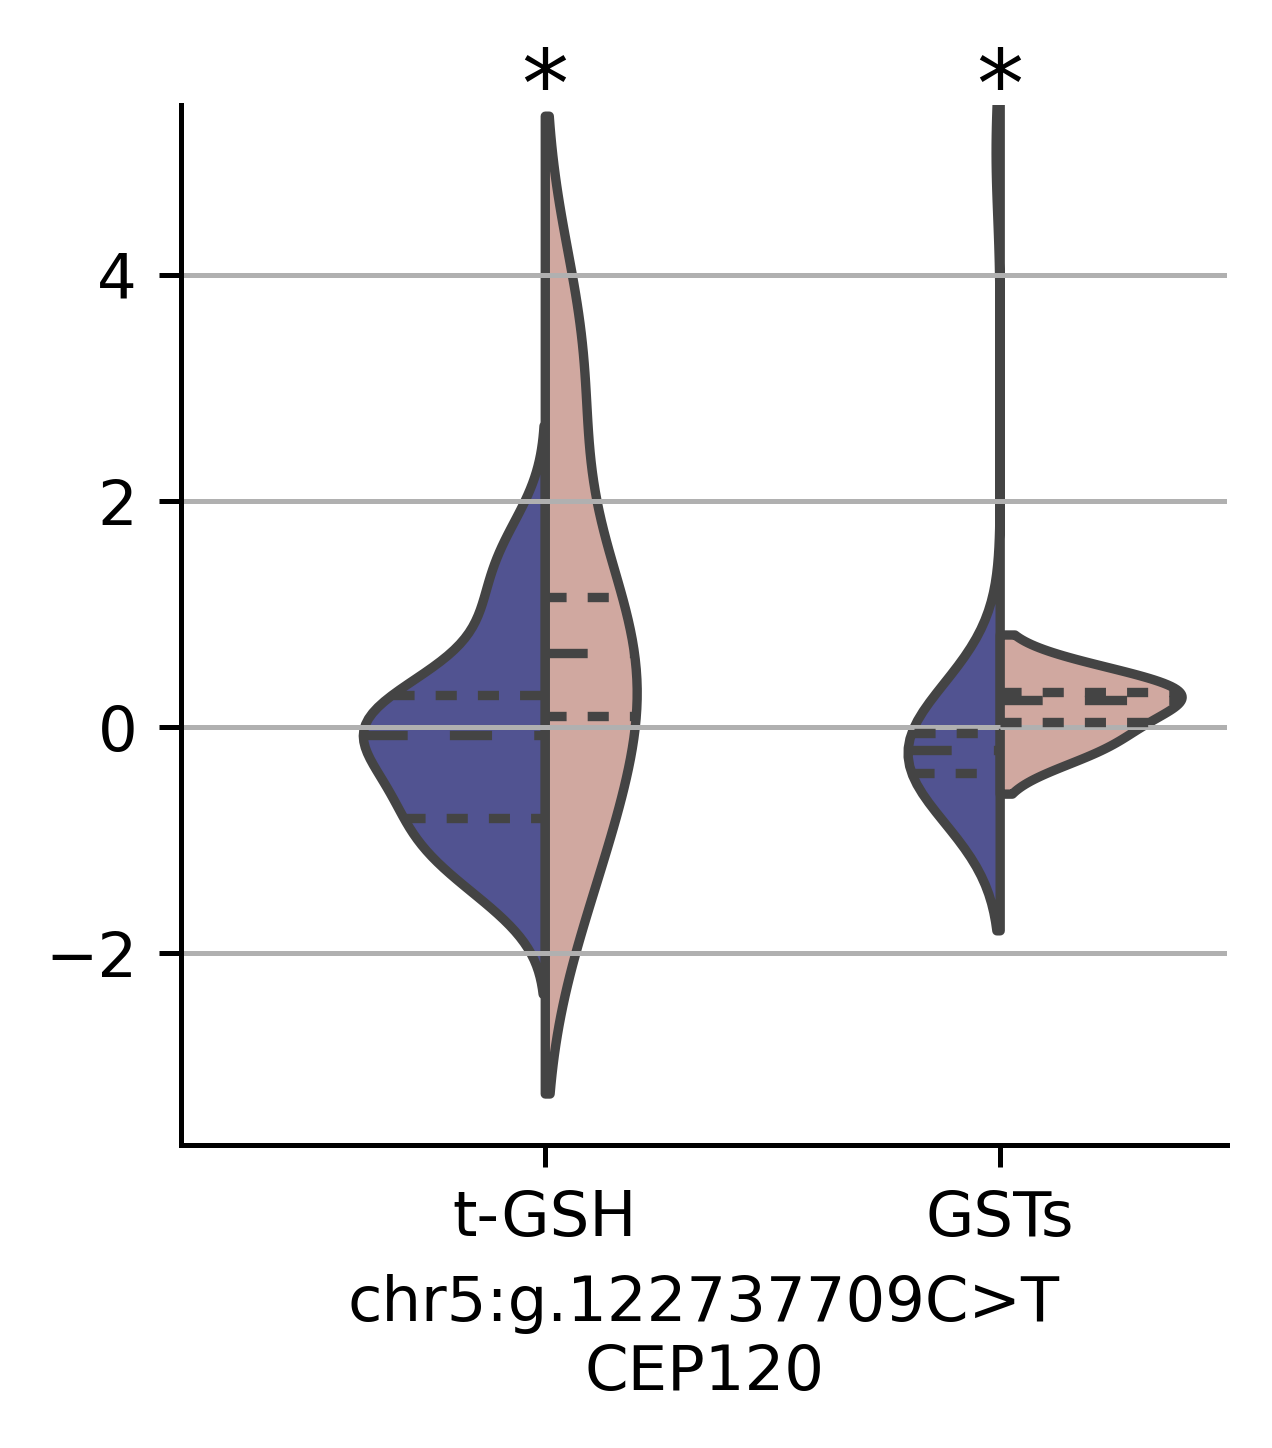

In [1083]:
mutant_data =    merged_df[merged_df['chr5-122737709-122737709-C-T-CEP120'] == 'mut']#.drop(columns=gene_sites + ['type'])
nonmutant_data = merged_df[merged_df['chr5-122737709-122737709-C-T-CEP120'] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    

plt.subplots(figsize=(3,3),dpi=450)
sns.violinplot(data=plot8,x='eng',hue='chr5-122737709-122737709-C-T-CEP120',y='value',dodge=True,size=6,palette=['#46499c','#d8a398'],
              split=True, inner="quart", 
              )
for i,indicator in enumerate(['谷胱甘肽','谷胱甘肽硫转移酶',]):
    
    
    mutant_indicator_data = mutant_data[indicator].dropna()
    nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        

    u_statistic, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
    if p_value>0.05:
            star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
            star='*'
    elif (p_value <=0.01) &(p_value >0.001):
            star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
            star='***'
    else:
            star='****'
    plt.text(i, 5.4, star, ha='center', fontsize=15)
plt.xlabel(loci_dict2['chr5-122737709-122737709-C-T-CEP120']+"\nCEP120")
plt.yticks([-2,0,2,4])
plt.ylim(-3.7,5.5)
plt.xlim(-0.8,1.5)
plt.ylabel("")

sns.despine(bottom=False
           )
plt.legend().remove()
plt.grid(axis='y')
plt.show()

In [ ]:
chr2-179527910-179527910-A-T-TTN   
chr14-19114642-19114642-A-G-OR11H12  
chr5-122737709-122737709-C-T-CEP120
chr1-16918717-16918717-C-T-NBPF1   
chr2-131984320-131984320-C-T-POTEE

In [983]:
listoxi=[
    "8-羟基脱氧鸟苷",
    "丙二醛",
    "谷胱甘肽",
    "含硫化合物",
    "谷胱甘肽硫转移酶",
    "谷胱甘肽过氧化物酶",
    "超氧化物歧化酶",
    "尿肌酐-1131", 
    "花生四烯酸过氧化物",
    "硝化酪氨酸",

    
]+list(alldata_pivot.columns[187:475] )

In [604]:
oxidativedf=significantdf[significantdf['indicator'].isin(oxidative)]

In [605]:
oxidativedf

geneloci indicator   p_value  \
6         chr16-33380263-33380263-C-G-ENPP7P13     含硫化合物  0.008518   
42           chr1-16969246-16969246-G-A-MST1P2       丙二醛  0.042595   
87    chr15-22344739-22344739-T-C-LOC101927079     含硫化合物  0.023581   
103       chr16-33544403-33544403-A-G-ENPP7P13       丙二醛  0.006277   
135        chr17-18400868-18400868-C-T-LGALS9C     硝化酪氨酸  0.019586   
...                                        ...       ...       ...   
1518      chr17-20459506-20459506-A-G-CDRT15L2  8-羟基脱氧鸟苷  0.031064   
1531         chr1-16973519-16973519-G-A-MST1P2       丙二醛  0.005779   
1535         chr1-16973519-16973519-G-A-MST1P2      谷胱甘肽  0.024731   
1572       chr1-248738133-248738133-A-G-OR2T34  8-羟基脱氧鸟苷  0.043472   
1622       chr15-23293713-23293713-C-T-HERC2P2  谷胱甘肽硫转移酶  0.018100   

          gene2_formatted  
6     chr16:g.33380263C>G  
42     chr1:g.16969246G>A  
87    chr15:g.22344739T>C  
103   chr16:g.33544403A>G  
135   chr17:g.18400868C>T  
...                   ...  
1518  chr17:g.20459506A>G  
1531   chr1:g.16973519G>A  
1535   chr1:g.16973519G>A  
1572  chr1:g.248738133A>G  
1622  chr15:g.23293713C>T  

[105 rows x 4 columns]

In [606]:
oxidativedf['geneloci'].value_counts().iloc[:30]


chr1-148903313-148903313-T-C-DRD5P2                     3
chr14-19114642-19114642-A-G-OR11H12                     3
chr2-179527910-179527910-A-T-TTN                        3
chr14-19114642-19114642-A-G-NONE                        3
chr16-21771726-21771726-C-G-OTOA                        3
chr14-19807329-19807329-G-C-LNCRNA-ATB                  3
chr1-16953672-16953672-C-T-CROCCP2                      3
chr14-19807329-19807329-G-C-LINC01297-DUXAP10-NBEAP6    3
chr1-148903313-148903313-T-C-LOC101060524               3
chr2-112616040-112616040-T-C-ANAPC1                     2
chr1-148891790-148891790-T-A-LOC101927429               2
chr1-148891790-148891790-T-A-NBPF25P                    2
chr1-16973519-16973519-G-A-MST1P2                       2
chr2-107042620-107042620-C-T-RGPD3                      2
chr15-21937964-21937964-A-G-LOC646214                   2
chr1-16976193-16976193-C-T-MST1P2                       2
chr1-17087682-17087682-A-G-MST1L                        2
chr16-32077240

In [ ]:
chr1-148903313-148903313-T-C-DRD5P2                     3
~chr14-19114642-19114642-A-G-OR11H12                     3
~chr2-179527910-179527910-A-T-TTN                        3
~chr2-112616040-112616040-T-C-ANAPC1                     2
chr1-148891790-148891790-T-A-LOC101927429               2
chr1-148891790-148891790-T-A-NBPF25P                    2
chr1-16973519-16973519-G-A-MST1P2                       2
chr2-107042620-107042620-C-T-RGPD3                      2
chr15-21937964-21937964-A-G-LOC646214                   2
chr1-16976193-16976193-C-T-MST1P2                       2
~（促炎基因）chr1-17087682-17087682-A-G-MST1L           2

chr16-33380263-33380263-C-G-ENPP7P13                    1
chr1-206567165-206567165-T-A-SRGAP2D                    1
chr7-151970695-151970695-A-T-KMT2C                      1
chr6-312023-312023-C-T-DUSP22                           1
chr7-142467540-142467540-A-G-PRSS1                      1
chr2-109278823-109278823-T-C-LIMS1                      1
chr1-145281780-145281780-T-A-NOTCH2NLR                  1
chr4-122997459-122997459-G-A-TRPC3                      1
chr4-122997459-122997459-G-A-KIAA1109                   1
chr1-145021024-145021024-G-C-LOC100996724               1
chr17-20459506-20459506-A-G-KRT16P3                     1
chr1-144676646-144676646-T-C-LOC653513                  1

In [607]:
oxidativedf['indicator'].value_counts().iloc[:30]

超氧化物歧化酶      17
丙二醛          16
含硫化合物        15
8-羟基脱氧鸟苷     15
硝化酪氨酸        14
谷胱甘肽硫转移酶     10
谷胱甘肽         10
谷胱甘肽过氧化物酶     4
花生四烯酸过氧化物     4
Name: indicator, dtype: int64

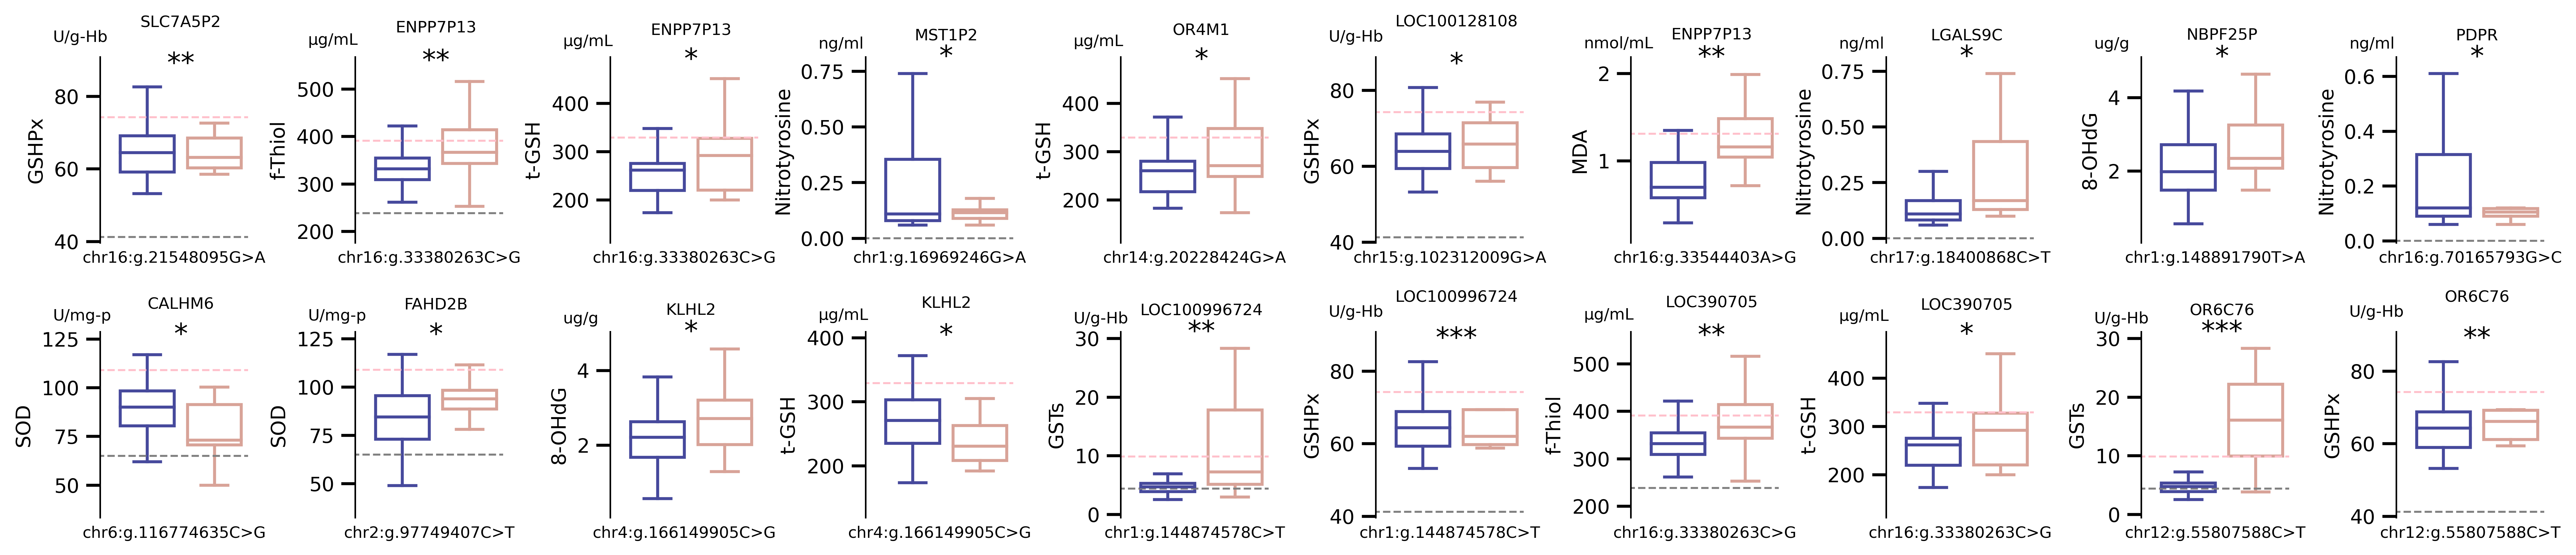

In [360]:
listA=[i for i in  result_list if (i[1] in listoxi)& (i[1]!='尿肌酐-1131')]
for i in listA:
    if i[1] not in dictlower.keys():
        dictlower[  i[1]  ] = 0
plt.subplots(figsize=(18,4),dpi=450)
for j,i in enumerate(listA[:20]):
    plt.subplot(2,10,j+1)
    plt.rcParams['font.family'] = 'Arial'
    colors=['grey','red']
    clsls=['nonmutant','mut']
    
    data=[ 
    alldata_pivot[alldata_pivot[ i[0] ]=='nonmutant'][ i[1] ].dropna().tolist(),
    alldata_pivot[alldata_pivot[ i[0] ]==      'mut'][ i[1] ].dropna().tolist(),
    ]
    colors =['#46499c','#d8a398']
    wkls1=[]
    wkls2=[]
    for num, d in enumerate(data):
        box=plt.boxplot(d, positions=[num + 1], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor='white',edgecolor =colors[num],linewidth=1.5),
                    medianprops=dict(color=colors[num],linewidth=1.5),
                    whiskerprops={'color': colors[num],'linewidth':1.5},
                    capprops={'color': colors[num],'linewidth':1.5},
                    flierprops=dict(marker='o', color='black', markersize=0))
        
        lower_whisker = box['whiskers'][0].get_ydata()[1]        upper_whisker = box['whiskers'][1].get_ydata()[1]        wkls1.append(lower_whisker)
        wkls2.append(upper_whisker)

    plt.ylim(np.min(wkls1)*0.9-0.1*np.max(wkls2),np.max(wkls2)*1.1)

    u_statistic, p_value = stats.ttest_ind(data[0],data[1])
    if p_value>0.05:
        star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
        star='*'
    elif (p_value <=0.01) &(p_value >0.001):
        star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
        star='***'
    else:
        star='****'
    plt.text(1.5, np.max(wkls2)*1.05, star, ha='center', fontsize=14)
    plt.text(1.5, np.max(wkls2)*1.20, i[0].split('-')[-1], ha='center', fontsize=8)
    plt.xticks([])
    plt.xlim(0.3,len(clsls)+0.5)
    plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
    plt.xlabel(combine_snp[i[0]], fontsize=8)
    plt.ylabel(eng_chi_dict[i[1]], fontsize=10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.hlines(dictlower[i[1]],-1,3,lw=1,color='grey',ls='--')
    plt.hlines(dicthigh[i[1]],-1,3,lw=1,color='pink',ls='--')
    plt.text(-.4,np.max(wkls2)*1.15,dictunit[i[1]],fontsize=8)
plt.tight_layout()
plt.show()

In [118]:
listacid=['尿肌酐-1073'
,'46. 阿拉伯糖醇'
,'45. 酒石酸'
,'44. 柠苹酸'
,'43. 丙三羧酸'
,'42. 二羟基苯丙酸'
,'41. 吲哚乙酸'
,'40. 4-羟基苯乙酸'
,'39. 4-羟基苯甲酸'
,'38. 苯丙酸'
,'37. 苯乙酸'
,'36. 马尿酸'
,'35. 苯甲酸'
,'34. 乳清酸'
,'33. 焦谷氨酸'
,'32. α-羟丁酸'
,'31. 葡萄糖二酸'
,'30. 苯基乙醛酸'
,'29. 杏仁酸'
,'28. 2-甲基马尿酸'
,'1. 己二酸'
,'2. 辛二酸'
,'3. 乙基丙二酸'
,'4. 丙酮酸'
,'5. 乳酸'
,'6. β-羟基丁酸'
,'7. 柠檬酸'
,'8. 顺式乌头酸'
,'9. 异柠檬酸'
,'10. α-酮戊二酸'
,'11. 琥珀酸'
,'12. 富马酸'
,'13. 苹果酸'
,'14. 羟甲基戊二酸'
,'15. α-酮异戊酸'
,'16. α-酮异己酸'
,'17. α-酮-β-甲基戊酸'
,'18. 黄尿酸'
,'19. β-羟基异戊酸'
,'20. 甲基丙二酸'
,'22. 高香草酸'
,'23. 香草基扁桃酸'
,'24. 5-羟吲哚乙酸'
,'25. 犬尿喹啉酸'
,'26. 吡啶甲酸'
,'27. 喹啉酸'
,'21. 亚胺甲基谷氨酸'
]+list(alldata_pivot2.columns[187:220] )

## 尿液有机酸与基因突变的关系

In [1015]:
import pandas as pd
from scipy import stats

gene_sites = alldata_pivot.columns[187:475]indicators = organic_acid
df=merged_df
t_test_results = {}

for gene_site in gene_sites:
    mutant_data = df[df[gene_site] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = df[df[gene_site] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    gene_site_results = {}
    
    for indicator in indicators:
        mutant_indicator_data = mutant_data[indicator].dropna()
        nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        
        if len(mutant_indicator_data) > 1 and len(nonmutant_indicator_data) > 1:
            t_stat, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
            gene_site_results[indicator] = {'t_stat': t_stat, 'p_value': p_value}
        else:
            gene_site_results[indicator] = {'t_stat': None, 'p_value': None}
    
    t_test_results[gene_site] = gene_site_results

In [1016]:
significant_results = {}

for gene_site, indicator_results in t_test_results.items():
    significant_indicators = {}
    
    for indicator, stats1 in indicator_results.items():
        if str(stats1['p_value']) !='None':
            if stats1['p_value'] < 0.05:
                significant_indicators[indicator] = stats1
    
    if significant_indicators:
        significant_results[gene_site] = significant_indicators

result_list = []
 
for gene_site, indicators in significant_results.items():
    for indicator, stats1 in indicators.items():
        result_list.append([gene_site, indicator, stats1['p_value']])
 


In [1017]:
significantdfacid1=pd.DataFrame(result_list,columns=['geneloci','indicator','p_value'])

significantdfacid1

geneloci   indicator   p_value
0        chr15-22345490-22345490-A-G-LINC02203      7. 柠檬酸  0.002127
1        chr15-22345490-22345490-A-G-LINC02203    8. 顺式乌头酸  0.035054
2        chr15-22345490-22345490-A-G-LINC02203     9. 异柠檬酸  0.016534
3        chr15-22345490-22345490-A-G-LINC02203  10. α-酮戊二酸  0.025192
4        chr15-22345490-22345490-A-G-LINC02203     11. 琥珀酸  0.004705
..                                         ...         ...       ...
152  chr1-145021024-145021024-G-C-LOC100996724     9. 异柠檬酸  0.025749
153        chr1-248738183-248738183-G-T-OR2T34      7. 柠檬酸  0.021207
154    chr14-106919301-106919301-T-C-LINC00226     11. 琥珀酸  0.031203
155      chr14-19476226-19476226-C-T-LINC02297   6. β-羟基丁酸  0.002048
156       chr2-88019376-88019376-C-T-LOC730268   6. β-羟基丁酸  0.038204

[157 rows x 3 columns]

In [1019]:
import pandas as pd
from scipy import stats

gene_sites = alldata_pivot.columns[187:475]indicators = organic_acid
df=merged_df
t_test_results = {}

for gene_site in gene_sites:
    mutant_data = df[df[gene_site] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = df[df[gene_site] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    gene_site_results = {}
    
    for indicator in indicators:
        mutant_indicator_data = mutant_data[indicator].dropna()
        nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        
        if len(mutant_indicator_data) > 1 and len(nonmutant_indicator_data) > 1:
            t_stat, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='less')
            gene_site_results[indicator] = {'t_stat': t_stat, 'p_value': p_value}
        else:
            gene_site_results[indicator] = {'t_stat': None, 'p_value': None}
    
    t_test_results[gene_site] = gene_site_results

In [1020]:
significant_results = {}

for gene_site, indicator_results in t_test_results.items():
    significant_indicators = {}
    
    for indicator, stats1 in indicator_results.items():
        if str(stats1['p_value']) !='None':
            if stats1['p_value'] < 0.05:
                significant_indicators[indicator] = stats1
    
    if significant_indicators:
        significant_results[gene_site] = significant_indicators

result_list = []
 
for gene_site, indicators in significant_results.items():
    for indicator, stats1 in indicators.items():
        result_list.append([gene_site, indicator, stats1['p_value']])
 
for item in result_list:
    print(item)

['chr1-145281247-145281247-T-A-NOTCH2NLR', '9. 异柠檬酸', 0.03835007378118029]
['chr1-206567165-206567165-T-A-SRGAP2D', '11. 琥珀酸', 0.0307300961530763]
['chr1-143743325-143743325-C-A-LINC01138', '12. 富马酸', 0.039951138747934746]
['chr7-72081604-72081604-G-T-TYW1B', '8. 顺式乌头酸', 0.03978612560086431]
['chr3-10091252-10091252-A-C-FANCD2', '6. β-羟基丁酸', 0.02260222372852637]
['chr2-109278823-109278823-T-C-LIMS1', '6. β-羟基丁酸', 0.04669640286799705]
['chr12-92551-92551-C-G-WASH8P', '7. 柠檬酸', 0.04662747642859869]
['chr2-131936113-131936113-G-C-PLEKHB2', '5. 乳酸', 0.046110940360644004]
['chr7-149990333-149990333-A-T-ACTR3C', '14. 羟甲基戊二酸', 0.04463106752722547]
['chr1-16972920-16972920-C-T-MST1P2', '9. 异柠檬酸', 0.032322330185968806]
['chr12-92551-92551-C-G-IQSEC3', '7. 柠檬酸', 0.04662747642859869]
['chr17-20451093-20451093-C-T-KRT16P3', '10. α-酮戊二酸', 0.014411534582021662]
['chr2-114353282-114353282-G-T-WASH2P', '6. β-羟基丁酸', 0.04561302104123672]
['chr7-76796928-76796928-A-G-CCDC146', '11. 琥珀酸', 0.03160764440876

In [1022]:
significantdfacid2=pd.DataFrame(result_list,columns=['geneloci','indicator','p_value'])

significantdfacid2

geneloci   indicator   p_value
0      chr1-145281247-145281247-T-A-NOTCH2NLR     9. 异柠檬酸  0.038350
1        chr1-206567165-206567165-T-A-SRGAP2D     11. 琥珀酸  0.030730
2      chr1-143743325-143743325-C-A-LINC01138     12. 富马酸  0.039951
3            chr7-72081604-72081604-G-T-TYW1B    8. 顺式乌头酸  0.039786
4           chr3-10091252-10091252-A-C-FANCD2   6. β-羟基丁酸  0.022602
5          chr2-109278823-109278823-T-C-LIMS1   6. β-羟基丁酸  0.046696
6                chr12-92551-92551-C-G-WASH8P      7. 柠檬酸  0.046627
7        chr2-131936113-131936113-G-C-PLEKHB2       5. 乳酸  0.046111
8         chr7-149990333-149990333-A-T-ACTR3C  14. 羟甲基戊二酸  0.044631
9           chr1-16972920-16972920-C-T-MST1P2     9. 异柠檬酸  0.032322
10               chr12-92551-92551-C-G-IQSEC3      7. 柠檬酸  0.046627
11        chr17-20451093-20451093-C-T-KRT16P3  10. α-酮戊二酸  0.014412
12        chr2-114353282-114353282-G-T-WASH2P   6. β-羟基丁酸  0.045613
13         chr7-76796928-76796928-A-G-CCDC146     11. 琥珀酸  0.031608
14       chr1-145304787-145304787-G-T-NBPF25P      7. 柠檬酸  0.021818
15       chr1-145304787-145304787-G-T-NBPF25P     9. 异柠檬酸  0.040037
16       chr1-145304787-145304787-G-T-NBPF25P     11. 琥珀酸  0.021162
17       chr1-145304787-145304787-G-T-NBPF25P     12. 富马酸  0.012933
18           chr9-66517550-66517550-G-A-LERFS       5. 乳酸  0.014064
19           chr1-16891963-16891963-T-A-NBPF1      7. 柠檬酸  0.032065
20           chr1-16891963-16891963-T-A-NBPF1    8. 顺式乌头酸  0.030674
21           chr1-16891963-16891963-T-A-NBPF1     12. 富马酸  0.011367
22     chr1-144676646-144676646-T-C-LOC653513     11. 琥珀酸  0.002725
23  chr1-144874578-144874578-C-T-LOC100996724     12. 富马酸  0.013517
24  chr1-144874578-144874578-C-T-LOC100996724     13. 苹果酸  0.025908
25           chr1-16890320-16890320-T-C-NBPF1   6. β-羟基丁酸  0.046437
26  chr1-148024903-148024903-C-T-LOC100996740     12. 富马酸  0.037226
27         chr4-122997459-122997459-G-A-TRPC3   6. β-羟基丁酸  0.024990
28     chr2-243037022-243037022-A-T-LINC01881      7. 柠檬酸  0.032527
29              chr6-312023-312023-C-T-DUSP22   6. β-羟基丁酸  0.006590
30              chr6-312023-312023-C-T-DUSP22    8. 顺式乌头酸  0.011919
31              chr6-312023-312023-C-T-DUSP22     9. 异柠檬酸  0.005914
32              chr6-312023-312023-C-T-DUSP22  14. 羟甲基戊二酸  0.001629
33     chr1-144676632-144676632-T-C-LOC653513     11. 琥珀酸  0.045233
34           chr1-17087682-17087682-A-G-MST1L    8. 顺式乌头酸  0.037963
35       chr17-20451093-20451093-C-T-CDRT15L2  10. α-酮戊二酸  0.014412
36         chr7-151970695-151970695-A-T-KMT2C   6. β-羟基丁酸  0.010771
37          chr3-10106623-10106623-C-T-FANCD2     12. 富马酸  0.045164
38          chr3-10106623-10106623-C-T-FANCD2     13. 苹果酸  0.048968
39        chr7-143964381-143964381-T-C-CTAGE8     12. 富马酸  0.049462
40         chr2-131984320-131984320-C-T-POTEE      7. 柠檬酸  0.040811
41         chr2-131984320-131984320-C-T-POTEE     11. 琥珀酸  0.019452
42          chr4-9245671-9245671-T-C-USP17L17      7. 柠檬酸  0.014302
43          chr4-9245671-9245671-T-C-USP17L17     12. 富马酸  0.035470
44      chr4-122997459-122997459-G-A-KIAA1109   6. β-羟基丁酸  0.024990
45        chr7-143964381-143964381-T-C-CTAGE4     12. 富马酸  0.049462
46       chr1-206567084-206567084-C-T-SRGAP2D   6. β-羟基丁酸  0.003625
47         chr2-131936113-131936113-G-C-POTEE       5. 乳酸  0.046111

## 环境内分泌干扰物在ASD和TD组是否有显著差异

In [336]:
path='/home2/zhenglijing/work/annovar/data.csv'
df=pd.read_csv(path,encoding='GBK')
df

检测项目           检测套餐 性别      病历号  年龄   结果数据 结果说明
0      尿肌酐-1073  全套有机酸代谢分析(尿液)  女  ASD_B22   5  118.9   正常
1     46. 阿拉伯糖醇  全套有机酸代谢分析(尿液)  女  ASD_B22   5  54.67   正常
2       45. 酒石酸  全套有机酸代谢分析(尿液)  女  ASD_B22   5   3.06   偏高
3       44. 柠苹酸  全套有机酸代谢分析(尿液)  女  ASD_B22   5   3.07   正常
4      43. 丙三羧酸  全套有机酸代谢分析(尿液)  女  ASD_B22   5   2.43   偏高
...         ...            ... ..      ...  ..    ...  ...
7918       解连蛋白   肠道功能健康评估（粪便）  男  ASD_076   7    254   偏高
7919       钙卫蛋白   肠道功能健康评估（粪便）  男  ASD_076   7    208   偏高
7920   分泌型免疫球蛋白   肠道功能健康评估（粪便）  男  ASD_076   7   2977   偏高
7921   组织转麸胺酶抗体   肠道功能健康评估（粪便）  男  ASD_076   7    629   偏高
7922     麦胶蛋白抗体   肠道功能健康评估（粪便）  男  ASD_076   7   87.6   正常

[7923 rows x 7 columns]

In [342]:
import pandas as pd
from scipy.stats import mannwhitneyu

hormone_df = df[df['检测套餐'] == '环境荷尔蒙分析（尿液）'].copy()
hormone_df['结果数据'] = pd.to_numeric(hormone_df['结果数据'], errors='coerce')hormone_df['结果数据'] = hormone_df['结果数据'].fillna(0)
asd_group = hormone_df[hormone_df['病历号'].str.contains('ASD')]
td_group = hormone_df[hormone_df['病历号'].str.contains('TD')]

test_items = hormone_df['检测项目'].unique()

results = []
for item in test_items:
    asd_data = asd_group[asd_group['检测项目'] == item]['结果数据']
    td_data = td_group[td_group['检测项目'] == item]['结果数据']
    
    if len(asd_data) == 0 or len(td_data) == 0:
        print(f"跳过 '{item}'：ASD组样本数={len(asd_data)}, TD组样本数={len(td_data)}")
        continue
    
    try:
        stat, p_value = mannwhitneyu(asd_data, td_data, alternative='two-sided')
        results.append({
            '检测项目': item,
            'ASD组样本数': len(asd_data),
            'TD组样本数': len(td_data),
            'U统计量': stat,
            'p值': p_value
        })
    except Exception as e:
        print(f"检验失败 '{item}'：{e}")

if results:
    results_df = pd.DataFrame(results)
    print(results_df)
else:
    print("无有效检验结果：请检查数据分组或样本量。")

        检测项目  ASD组样本数  TD组样本数   U统计量        p值
0        三氯沙       21      26  290.5  0.716017
1        双酚A       21      26  311.0  0.422280
2       单甲基酯       21      26  350.0  0.101631
3       单乙基酯       21      26  282.0  0.855674
4       单丁基酯       21      26  267.0  0.906314
5       单苄基酯       21      26  220.0  0.261090
6     单乙基己基酯       21      26  319.0  0.330250
7         甲酯       21      26  284.0  0.822229
8         乙酯       21      26  240.0  0.486744
9         丙酯       21      26  278.0  0.923285
10        丁酯       21      26  289.0  0.692538
11      壬基苯酯       21      26  317.0  0.304354
12      辛基苯酯       21      26  297.5  0.570864
13      丁基苯酯       21      26  277.0  0.927505
14  尿肌酐-1055       21      26  259.0  0.772678


In [339]:
import pandas as pd
from scipy.stats import mannwhitneyu

hormone_df = df[df['检测套餐'] == '环境荷尔蒙分析（尿液）'].copy()
hormone_df['结果数据'] = pd.to_numeric(hormone_df['结果数据'], errors='coerce')hormone_df = hormone_df.dropna(subset=['结果数据'])
asd_group = hormone_df[hormone_df['病历号'].str.contains('ASD')]
td_group = hormone_df[hormone_df['病历号'].str.contains('TD')]

test_items = hormone_df['检测项目'].unique()

results = []
for item in test_items:
    asd_data = asd_group[asd_group['检测项目'] == item]['结果数据']
    td_data = td_group[td_group['检测项目'] == item]['结果数据']
    
    if len(asd_data) == 0 or len(td_data) == 0:
        print(f"跳过 '{item}'：ASD组样本数={len(asd_data)}, TD组样本数={len(td_data)}")
        continue
    
    try:
        stat, p_value = ttest_ind(asd_data, td_data, alternative='two-sided')
        results.append({
            '检测项目': item,
            'ASD组样本数': len(asd_data),
            'TD组样本数': len(td_data),
            'U统计量': stat,
            'p值': p_value
        })
    except Exception as e:
        print(f"检验失败 '{item}'：{e}")

if results:
    results_df = pd.DataFrame(results)
    print(results_df)
else:
    print("无有效检验结果：请检查数据分组或样本量。")

        检测项目  ASD组样本数  TD组样本数      U统计量        p值
0        三氯沙       21      26  1.267197  0.211604
1        双酚A       21      26  0.197820  0.844077
2       单甲基酯       21      26  1.486024  0.144246
3       单乙基酯       21      26  0.100769  0.920181
4       单丁基酯       21      26 -0.204736  0.838701
5       单苄基酯       21      26  0.300440  0.765225
6     单乙基己基酯       21      26 -0.376148  0.708575
7         甲酯       21      26 -1.076398  0.287486
8         乙酯       21      26  1.409286  0.165624
9         丙酯       21      26 -1.413998  0.164244
10        丁酯       21      26 -0.859209  0.394779
11      壬基苯酯       21      26  1.523348  0.134669
12      辛基苯酯       21      26  1.066308  0.291972
13      丁基苯酯       21      26 -1.212047  0.231820
14  尿肌酐-1055       21      26 -0.322077  0.748886


In [340]:
results_df

检测项目  ASD组样本数  TD组样本数      U统计量        p值
0        三氯沙       21      26  1.267197  0.211604
1        双酚A       21      26  0.197820  0.844077
2       单甲基酯       21      26  1.486024  0.144246
3       单乙基酯       21      26  0.100769  0.920181
4       单丁基酯       21      26 -0.204736  0.838701
5       单苄基酯       21      26  0.300440  0.765225
6     单乙基己基酯       21      26 -0.376148  0.708575
7         甲酯       21      26 -1.076398  0.287486
8         乙酯       21      26  1.409286  0.165624
9         丙酯       21      26 -1.413998  0.164244
10        丁酯       21      26 -0.859209  0.394779
11      壬基苯酯       21      26  1.523348  0.134669
12      辛基苯酯       21      26  1.066308  0.291972
13      丁基苯酯       21      26 -1.212047  0.231820
14  尿肌酐-1055       21      26 -0.322077  0.748886

## 热图展示基因和指标显著性

In [761]:
resultdf1 = pd.concat([significantdf3, significantdf4,significantdfkangyang,stressdf])

In [734]:
resultdf2 = pd.concat([significantdf3, significantdf4,significantdfkangyang,stressdf,significantdfacid1,significantdfacid2])

In [743]:
resultdf2

geneloci    indicator   p_value  \
0    chr15-21937964-21937964-A-G-LOC646214       麦胶蛋白抗体  0.012301   
1     chr15-20868230-20868230-T-C-GOLGA8CP       麦胶蛋白抗体  0.026601   
2     chr15-20868230-20868230-T-C-GOLGA8CP     组织转麸胺酶抗体  0.047850   
3     chr15-20868230-20868230-T-C-GOLGA8CP     分泌型免疫球蛋白  0.018547   
4       chr1-17185602-17185602-A-G-MIR3675       胰弹性蛋白酶  0.049492   
..                                     ...          ...       ...   
312   chr1-206567084-206567084-C-T-SRGAP2D    6. β-羟基丁酸  0.003625   
313   chr1-206567084-206567084-C-T-SRGAP2D   16. α-酮异己酸  0.032716   
314   chr1-206567084-206567084-C-T-SRGAP2D  21. 亚胺甲基谷氨酸  0.040238   
315     chr2-131936113-131936113-G-C-POTEE      35. 苯甲酸  0.038115   
316     chr2-131936113-131936113-G-C-POTEE        5. 乳酸  0.046111   

         gene2_formatted  
0    chr15:g.21937964A>G  
1    chr15:g.20868230T>C  
2    chr15:g.20868230T>C  
3    chr15:g.20868230T>C  
4     chr1:g.17185602A>G  
..                   ...  
312  chr1:g.206567084C>T  
313  chr1:g.206567084C>T  
314  chr1:g.206567084C>T  
315  chr2:g.131936113G>C  
316  chr2:g.131936113G>C  

[1325 rows x 4 columns]

In [736]:
def format_gene2(row):
    parts = row.split('-')    chrom = parts[0]    pos = parts[1]    ref = parts[3]    alt = parts[4]    return f"{chrom}:g.{pos}{ref}>{alt}"
resultdf2['gene2_formatted'] = resultdf2['geneloci'].apply(format_gene2)

resultdf2

geneloci    indicator   p_value  \
0    chr15-21937964-21937964-A-G-LOC646214       麦胶蛋白抗体  0.012301   
1     chr15-20868230-20868230-T-C-GOLGA8CP       麦胶蛋白抗体  0.026601   
2     chr15-20868230-20868230-T-C-GOLGA8CP     组织转麸胺酶抗体  0.047850   
3     chr15-20868230-20868230-T-C-GOLGA8CP     分泌型免疫球蛋白  0.018547   
4       chr1-17185602-17185602-A-G-MIR3675       胰弹性蛋白酶  0.049492   
..                                     ...          ...       ...   
312   chr1-206567084-206567084-C-T-SRGAP2D    6. β-羟基丁酸  0.003625   
313   chr1-206567084-206567084-C-T-SRGAP2D   16. α-酮异己酸  0.032716   
314   chr1-206567084-206567084-C-T-SRGAP2D  21. 亚胺甲基谷氨酸  0.040238   
315     chr2-131936113-131936113-G-C-POTEE      35. 苯甲酸  0.038115   
316     chr2-131936113-131936113-G-C-POTEE        5. 乳酸  0.046111   

         gene2_formatted  
0    chr15:g.21937964A>G  
1    chr15:g.20868230T>C  
2    chr15:g.20868230T>C  
3    chr15:g.20868230T>C  
4     chr1:g.17185602A>G  
..                   ...  
312  chr1:g.206567084C>T  
313  chr1:g.206567084C>T  
314  chr1:g.206567084C>T  
315  chr2:g.131936113G>C  
316  chr2:g.131936113G>C  

[1325 rows x 4 columns]

In [762]:
def format_gene2(row):
    parts = row.split('-')    chrom = parts[0]    pos = parts[1]    ref = parts[3]    alt = parts[4]    return f"{chrom}:g.{pos}{ref}>{alt}"
resultdf1['gene2_formatted'] = resultdf1['geneloci'].apply(format_gene2)

resultdf1

geneloci  indicator   p_value  \
0    chr15-21937964-21937964-A-G-LOC646214     麦胶蛋白抗体  0.012301   
1     chr15-20868230-20868230-T-C-GOLGA8CP     麦胶蛋白抗体  0.026601   
2     chr15-20868230-20868230-T-C-GOLGA8CP   组织转麸胺酶抗体  0.047850   
3     chr15-20868230-20868230-T-C-GOLGA8CP   分泌型免疫球蛋白  0.018547   
4       chr1-17185602-17185602-A-G-MIR3675     胰弹性蛋白酶  0.049492   
..                                     ...        ...       ...   
104     chr2-97712581-97712581-A-C-FAM178B      硝化酪氨酸  0.043584   
105    chr1-248738133-248738133-A-G-OR2T34   8-羟基脱氧鸟苷  0.021736   
107    chr1-248738183-248738183-G-T-OR2T34   8-羟基脱氧鸟苷  0.020113   
108       chr16-70165793-70165793-G-C-PDPR  花生四烯酸过氧化物  0.038651   
110  chr14-19476226-19476226-C-T-LINC02297   8-羟基脱氧鸟苷  0.032920   

         gene2_formatted  
0    chr15:g.21937964A>G  
1    chr15:g.20868230T>C  
2    chr15:g.20868230T>C  
3    chr15:g.20868230T>C  
4     chr1:g.17185602A>G  
..                   ...  
104   chr2:g.97712581A>C  
105  chr1:g.248738133A>G  
107  chr1:g.248738183G>T  
108  chr16:g.70165793G>C  
110  chr14:g.19476226C>T  

[390 rows x 4 columns]

In [763]:
resultdf_pivot1=resultdf1[['gene2_formatted','indicator','p_value']].pivot_table(index='gene2_formatted', columns='indicator', values='p_value',aggfunc='sum')
resultdf_pivot2=resultdf2[['gene2_formatted','indicator','p_value']].pivot_table(index='gene2_formatted', columns='indicator', values='p_value',aggfunc='sum')

In [764]:
resultdf1_pivot=resultdf1[['geneloci','indicator','p_value']].pivot_table(index='geneloci', columns='indicator', values='p_value',aggfunc='sum')
resultdf2_pivot=resultdf2[['geneloci','indicator','p_value']].pivot_table(index='geneloci', columns='indicator', values='p_value',aggfunc='sum')

In [765]:
resultdf1_pivot

indicator                               8-羟基脱氧鸟苷  丙二醛  分泌型免疫球蛋白     含硫化合物  \
geneloci                                                                    
chr1-120539213-120539213-G-T-NOTCH2NLC       NaN  NaN       NaN       NaN   
chr1-121484945-121484945-T-C-EMBP1      0.044650  NaN       NaN       NaN   
chr1-121484945-121484945-T-C-NONE       0.044650  NaN       NaN       NaN   
chr1-13418-13418-G-A-DDX11L1            0.033471  NaN       NaN       NaN   
chr1-13418-13418-G-A-LOC102725121       0.033471  NaN       NaN       NaN   
...                                          ...  ...       ...       ...   
chr7-5949865-5949865-C-G-CCZ1                NaN  NaN       NaN  0.008209   
chr7-72081604-72081604-G-T-TYW1B             NaN  NaN       NaN       NaN   
chr7-76796928-76796928-A-G-CCDC146           NaN  NaN       NaN       NaN   
chr9-66516728-66516728-G-A-LERFS             NaN  NaN       NaN       NaN   
chrY-16952347-16952347-T-C-NLGN4Y            NaN  NaN       NaN       NaN   

indicator                                   干扰素α  干扰素γ  白介素10  白介素12  \
geneloci                                                               
chr1-120539213-120539213-G-T-NOTCH2NLC       NaN   NaN    NaN    NaN   
chr1-121484945-121484945-T-C-EMBP1           NaN   NaN    NaN    NaN   
chr1-121484945-121484945-T-C-NONE            NaN   NaN    NaN    NaN   
chr1-13418-13418-G-A-DDX11L1                 NaN   NaN    NaN    NaN   
chr1-13418-13418-G-A-LOC102725121            NaN   NaN    NaN    NaN   
...                                          ...   ...    ...    ...   
chr7-5949865-5949865-C-G-CCZ1                NaN   NaN    NaN    NaN   
chr7-72081604-72081604-G-T-TYW1B             NaN   NaN    NaN    NaN   
chr7-76796928-76796928-A-G-CCDC146           NaN   NaN    NaN    NaN   
chr9-66516728-66516728-G-A-LERFS             NaN   NaN    NaN    NaN   
chrY-16952347-16952347-T-C-NLGN4Y       0.048835   NaN    NaN    NaN   

indicator                                  白介素17  白介素1β  ...    胰弹性蛋白酶  \
geneloci                                                 ...             
chr1-120539213-120539213-G-T-NOTCH2NLC       NaN    NaN  ...       NaN   
chr1-121484945-121484945-T-C-EMBP1      0.024186    NaN  ...       NaN   
chr1-121484945-121484945-T-C-NONE       0.024186    NaN  ...       NaN   
chr1-13418-13418-G-A-DDX11L1                 NaN    NaN  ...  0.012141   
chr1-13418-13418-G-A-LOC102725121            NaN    NaN  ...  0.012141   
...                                          ...    ...  ...       ...   
chr7-5949865-5949865-C-G-CCZ1                NaN    NaN  ...       NaN   
chr7-72081604-72081604-G-T-TYW1B             NaN    NaN  ...       NaN   
chr7-76796928-76796928-A-G-CCDC146           NaN    NaN  ...       NaN   
chr9-66516728-66516728-G-A-LERFS             NaN    NaN  ...       NaN   
chrY-16952347-16952347-T-C-NLGN4Y            NaN    NaN  ...       NaN   

indicator                               花生四烯酸过氧化物    葡萄糖醛酸酶      解连蛋白  谷胱甘肽  \
geneloci                                                                      
chr1-120539213-120539213-G-T-NOTCH2NLC        NaN       NaN  0.037756   NaN   
chr1-121484945-121484945-T-C-EMBP1            NaN       NaN       NaN   NaN   
chr1-121484945-121484945-T-C-NONE             NaN       NaN       NaN   NaN   
chr1-13418-13418-G-A-DDX11L1                  NaN       NaN       NaN   NaN   
chr1-13418-13418-G-A-LOC102725121             NaN       NaN       NaN   NaN   
...                                           ...       ...       ...   ...   
chr7-5949865-5949865-C-G-CCZ1                 NaN       NaN       NaN   NaN   
chr7-72081604-72081604-G-T-TYW1B              NaN       NaN       NaN   NaN   
chr7-76796928-76796928-A-G-CCDC146            NaN  0.034919  0.030047   NaN   
chr9-66516728-66516728-G-A-LERFS         0.035118       NaN       NaN   NaN   
chrY-16952347-16952347-T-C-NLGN4Y             NaN       NaN       NaN   NaN   

indicator                               谷胱甘肽硫转移酶  谷胱甘肽过氧化物酶  超氧化物歧化酶  

In [766]:
import pandas as pd

non_nan_counts = resultdf1_pivot.notna().sum(axis=1)

top_50_loci = non_nan_counts.sort_values(ascending=False).head(100)

top_50_resultdf_pivot = resultdf1_pivot.loc[top_50_loci.index]

top_50_resultdf_pivot

indicator                                 8-羟基脱氧鸟苷       丙二醛  分泌型免疫球蛋白  含硫化合物  \
geneloci                                                                        
chr1-16953672-16953672-C-T-CROCCP2             NaN       NaN       NaN    NaN   
chr1-16969246-16969246-G-A-MST1P2              NaN  0.045035       NaN    NaN   
chr1-16972920-16972920-C-T-MST1P2              NaN       NaN       NaN    NaN   
chr15-21937964-21937964-A-G-LOC646214          NaN       NaN       NaN    NaN   
chr1-16969246-16969246-G-A-CROCCP2             NaN  0.045035       NaN    NaN   
...                                            ...       ...       ...    ...   
chr1-664468-664468-G-T-LOC100133331            NaN       NaN       NaN    NaN   
chr15-21937097-21937097-G-A-LOC646214          NaN       NaN       NaN    NaN   
chr1-17185572-17185572-C-G-MIR3675             NaN  0.048493       NaN    NaN   
chr15-22332859-22332859-G-T-LINC02203          NaN       NaN       NaN    NaN   
chr15-22332859-22332859-G-T-LOC101927079       NaN       NaN       NaN    NaN   

indicator                                     干扰素α      干扰素γ     白介素10  \
geneloci                                                                 
chr1-16953672-16953672-C-T-CROCCP2        0.036801       NaN  0.002414   
chr1-16969246-16969246-G-A-MST1P2         0.049810       NaN       NaN   
chr1-16972920-16972920-C-T-MST1P2         0.008606       NaN  0.008711   
chr15-21937964-21937964-A-G-LOC646214          NaN       NaN  0.004072   
chr1-16969246-16969246-G-A-CROCCP2        0.049810       NaN       NaN   
...                                            ...       ...       ...   
chr1-664468-664468-G-T-LOC100133331            NaN       NaN       NaN   
chr15-21937097-21937097-G-A-LOC646214          NaN       NaN  0.041051   
chr1-17185572-17185572-C-G-MIR3675             NaN  0.029987       NaN   
chr15-22332859-22332859-G-T-LINC02203          NaN       NaN       NaN   
chr15-22332859-22332859-G-T-LOC101927079       NaN       NaN       NaN   

indicator                                    白介素12     白介素17     白介素1β  ...  \
geneloci                                                                ...   
chr1-16953672-16953672-C-T-CROCCP2        0.019046       NaN  0.006756  ...   
chr1-16969246-16969246-G-A-MST1P2         0.046186  0.000224  0.024371  ...   
chr1-16972920-16972920-C-T-MST1P2         0.012265       NaN  0.002972  ...   
chr15-21937964-21937964-A-G-LOC646214     0.001678       NaN       NaN  ...   
chr1-16969246-16969246-G-A-CROCCP2        0.046186  0.000224  0.024371  ...   
...                                            ...       ...       ...  ...   
chr1-664468-664468-G-T-LOC100133331            NaN       NaN       NaN  ...   
chr15-21937097-21937097-G-A-LOC646214          NaN  0.032882       NaN  ...   
chr1-17185572-17185572-C-G-MIR3675             NaN       NaN       NaN  ...   
chr15-22332859-22332859-G-T-LINC02203          NaN       NaN       NaN  ...   
chr15-22332859-22332859-G-T-LOC101927079       NaN       NaN       NaN  ...   

indicator                                  胰弹性蛋白酶  花生四烯酸过氧化物    葡萄糖醛酸酶  \
geneloci                                                                 
chr1-16953672-16953672-C-T-CROCCP2            NaN        NaN       NaN   
chr1-16969246-16969246-G-A-MST1P2             NaN        NaN       NaN   
chr1-16972920-16972920-C-T-MST1P2             NaN        NaN       NaN   
chr15-21937964-21937964-A-G-LOC646214         NaN        NaN       NaN   
chr1-16969246-16969246-G-A-CROCCP2            NaN        NaN       NaN   
...                                           ...        ...       ...   
chr1-664468-664468-G-T-LOC100133331       0.01247        NaN       NaN   
chr15-21937097-21937097-G-A-LOC646214         NaN        NaN       NaN   
chr1-17185572-17185572-C-G-MIR3675            NaN        NaN       NaN   
chr15-22332859-22332859-G-T-LINC02203         NaN        NaN  0.020603   
chr15-22332859-22332859-G-T-LOC101927079      NaN        NaN  0.020

In [732]:
import pandas as pd

non_nan_counts = resultdf2_pivot.notna().sum(axis=1)

top_50_loci = non_nan_counts.sort_values(ascending=False).head(100)

top_50_resultdf_pivot2 = resultdf2_pivot.loc[top_50_loci.index]

top_50_resultdf_pivot2

indicator                                1. 己二酸  10. α-酮戊二酸   11. 琥珀酸  \
geneloci                                                                
chr6-312023-312023-C-T-DUSP22          0.013836         NaN       NaN   
chr17-21201579-21201579-C-T-MAP2K3          NaN         NaN  0.015234   
chr1-145304787-145304787-G-T-NBPF25P   0.003685         NaN  0.021162   
chr12-31247819-31247819-A-G-DDX11           NaN    0.001352       NaN   
chr1-152284377-152284377-G-A-FLG            NaN    0.024811       NaN   
...                                         ...         ...       ...   
chr15-22344739-22344739-T-C-LINC02203       NaN    0.047884  0.017141   
chr17-20459506-20459506-A-G-CDRT15L2        NaN         NaN       NaN   
chr4-122997459-122997459-G-A-TRPC3          NaN         NaN       NaN   
chr1-121484945-121484945-T-C-EMBP1          NaN         NaN       NaN   
chr7-142467540-142467540-A-G-PRSS3P2        NaN         NaN       NaN   

indicator                               12. 富马酸   13. 苹果酸  14. 羟甲基戊二酸  \
geneloci                                                                
chr6-312023-312023-C-T-DUSP22               NaN       NaN    0.001629   
chr17-21201579-21201579-C-T-MAP2K3          NaN       NaN         NaN   
chr1-145304787-145304787-G-T-NBPF25P   0.012933       NaN         NaN   
chr12-31247819-31247819-A-G-DDX11      0.031031  0.000176    0.038962   
chr1-152284377-152284377-G-A-FLG            NaN  0.049389         NaN   
...                                         ...       ...         ...   
chr15-22344739-22344739-T-C-LINC02203  0.007854  0.041029         NaN   
chr17-20459506-20459506-A-G-CDRT15L2        NaN       NaN         NaN   
chr4-122997459-122997459-G-A-TRPC3          NaN       NaN         NaN   
chr1-121484945-121484945-T-C-EMBP1     0.044618       NaN         NaN   
chr7-142467540-142467540-A-G-PRSS3P2        NaN       NaN         NaN   

indicator                              15. α-酮异戊酸  16. α-酮异己酸  17. α-酮-β-甲基戊酸  \
geneloci                                                                        
chr6-312023-312023-C-T-DUSP22            0.003836    0.002788        0.021263   
chr17-21201579-21201579-C-T-MAP2K3            NaN         NaN             NaN   
chr1-145304787-145304787-G-T-NBPF25P          NaN         NaN             NaN   
chr12-31247819-31247819-A-G-DDX11        0.000154    0.001945        0.000333   
chr1-152284377-152284377-G-A-FLG         0.033475         NaN        0.010713   
...                                           ...         ...             ...   
chr15-22344739-22344739-T-C-LINC02203         NaN         NaN             NaN   
chr17-20459506-20459506-A-G-CDRT15L2          NaN    0.028665             NaN   
chr4-122997459-122997459-G-A-TRPC3            NaN         NaN             NaN   
chr1-121484945-121484945-T-C-EMBP1            NaN         NaN             NaN   
chr7-142467540-142467540-A-G-PRSS3P2          NaN         NaN             NaN   

indicator                               18. 黄尿酸  ...  胰弹性蛋白酶  花生四烯酸过氧化物  \
geneloci                                         ...                      
chr6-312023-312023-C-T-DUSP22               NaN  ...     NaN        NaN   
chr17-21201579-21201579-C-T-MAP2K3     0.030127  ...     NaN        NaN   
chr1-145304787-145304787-G-T-NBPF25P        NaN  ...     NaN        NaN   
chr12-31247819-31247819-A-G-DDX11           NaN  ...     NaN        NaN   
chr1-152284377-152284377-G-A-FLG       0.023165  ...  0.0335        NaN   
...                                         ...  ...     ...        ...   
chr15-22344739-22344739-T-C-LINC02203       NaN  ...     NaN        NaN   
chr17-20459506-20459506-A-G-CDRT15L2        NaN  ...     NaN        NaN   
chr4-122997459-122997459-G-A-TRPC3          NaN  ...     NaN        NaN   
chr1-121484945-121484945-T-C-EMBP1          NaN  ...     NaN        NaN   
chr7-142467540-142467540-A-G-PRSS3P2        NaN  ...     NaN        NaN   

indicator                              葡萄糖醛酸酶  解连蛋白  谷胱甘肽  谷胱甘肽硫转移酶  \

In [ ]:
gut = ['分泌型免疫球蛋白', '钙卫蛋白','解连蛋白']
cytokine = ['干扰素α', '肿瘤坏死因子', '干扰素γ', '白介素12', '白介素1β', '白介素17',
            '白介素10', '白介素8', '白介素6', '白介素5', '白介素4', '白介素2']
oxidative = ['8-羟基脱氧鸟苷', '丙二醛', '谷胱甘肽', '含硫化合物', '谷胱甘肽硫转移酶', 
             '谷胱甘肽过氧化物酶', '超氧化物歧化酶', '花生四烯酸过氧化物', '硝化酪氨酸']
organic_acid=["5. 乳酸", '6. β-羟基丁酸', '7. 柠檬酸', '8. 顺式乌头酸', '9. 异柠檬酸',
              "10. α-酮戊二酸","11. 琥珀酸","12. 富马酸",'13. 苹果酸','14. 羟甲基戊二酸']
gut_counts = top_50_resultdf_pivot2[gut].notna().sum(axis=1)

cytokine_counts = top_50_resultdf_pivot2[cytokine].notna().sum(axis=1)

oxidative_counts = top_50_resultdf_pivot2[oxidative].notna().sum(axis=1)
organic_acid_counts = top_50_resultdf_pivot2[organic_acid].notna().sum(axis=1)
result_df2 = pd.DataFrame({
    'gut_count': gut_counts,
    'cytokine_count': cytokine_counts,
    'oxidative_count': oxidative_counts,
    "organic_acid_count": organic_acid_counts
})

result_df2 = result_df2.sort_values(by='organic_acid_count', ascending=False)

In [799]:
gut = ['分泌型免疫球蛋白', '钙卫蛋白','解连蛋白']
cytokine = ['干扰素α', '肿瘤坏死因子', '干扰素γ', '白介素12', '白介素1β', '白介素17',
            '白介素10', '白介素8', '白介素6', '白介素5', '白介素4', '白介素2']
oxidative = ['8-羟基脱氧鸟苷', '丙二醛', '谷胱甘肽', '含硫化合物', '谷胱甘肽硫转移酶', 
             '谷胱甘肽过氧化物酶', '超氧化物歧化酶', '花生四烯酸过氧化物', '硝化酪氨酸']

gut_counts = top_50_resultdf_pivot[gut].notna().sum(axis=1)

cytokine_counts = top_50_resultdf_pivot[cytokine].notna().sum(axis=1)

oxidative_counts = top_50_resultdf_pivot[oxidative].notna().sum(axis=1)

result_df1 = pd.DataFrame({
    'gut_count': gut_counts,
    'cytokine_count': cytokine_counts,
    'oxidative_count': oxidative_counts,
   
})

result_df1 = result_df1.sort_values(by='gut_count', ascending=False)

In [800]:
result_df1.iloc[:50]

gut_count  cytokine_count  \
geneloci                                                                        
chr7-48886193-48886193-G-A-ABCA13                           1               0   
chr1-120539213-120539213-G-T-NOTCH2NLC                      1               2   
chr14-19117129-19117129-A---NONE                            1               0   
chr14-19117129-19117129-A---OR11H12                         1               0   
chr7-48886193-48886193-G-A-CDC14C                           1               0   
chr7-151970695-151970695-A-T-KMT2C                          1               0   
chr3-195709088-195709088-T-C-SDHAP1                         1               0   
chr11-18290636-18290636-A-T-SAA1                            1               0   
chr2-85570186-85570186-G-A-RETSAT                           1               1   
chr15-20868230-20868230-T-C-NBEAP1                          1               0   
chr15-20868230-20868230-T-C-GOLGA8CP                        1               0   
chr1-16890320-16890320-T-C-NBPF1                            1               0   
chr16-72088652-72088652-C-T-HP                              1               1   
chr7-76796928-76796928-A-G-CCDC146                          1               0   
chr1-16969246-16969246-G-A-MST1P2                           1               6   
chr15-20433733-20433733-A-C-NONE                            1               4   
chr1-16969246-16969246-G-A-CROCCP2                          1               6   
chr2-109278823-109278823-T-C-LIMS1                          1               0   
chr16-32077240-32077240-T-C-LOC102723753                    1               4   
chr13-24893113-24893113-C-T-C1QTNF9                         1               2   
chr16-32077240-32077240-T-C-ZNF267                          1               4   
chr15-20433733-20433733-A-C-CHEK2P2                         1               4   
chr1-144816621-144816621-A-G-NBPF9                          0               0   
chr16-33534075-33534075-C-T-ENPP7P13                        0               2   
chr1-148891790-148891790-T-A-NBPF25P                        0               0   
chr16-33534075-33534075-C-T-LOC390705                       0               2   
chr14-106919301-106919301-T-C-LINC00221                     0               1   
chr16-70163691-70163691-C-T-PDPR                            0               2   
chr14-106919301-106919301-T-C-LINC00226                     0               1   
chr7-142467540-142467540-A-G-PRSS1                          0               0   
chr1-16891963-16891963-T-A-NBPF1                            0               1   
chr1-144816621-144816621-A-G-NBPF8                          0               0   
chr17-18400868-18400868-C-T-LGALS9C                         0               0   
chr16-70177618-70177618-G-A-PDPR                            0               1   
chr1-16953672-16953672-C-T-CROCCP2                          0               7   
chr7-72081604-72081604-G-T-TYW1B                            0               1   
chr1-13418-13418-G-A-LOC102725121                           0               0   
chr15-22332859-22332859-G-T-LINC02203                       0               0   
chr1-17185572-17185572-C-G-MIR3675                          0               1   
chr15-21937097-21937097-G-A-LOC646214                       0               2   
chr1-664468-664468-G-T-LOC100133331                         0               0   
chr14-19807329-19807329-G-C-LNCRNA-ATB                      0               0   
chr14-19807329-19807329-G-C-LINC01297-DUXAP10-N...          0               0   
chr15-22345038-22345038-T-C-LOC101927079                    0               2   
chr1-16918255-16918255-A-C-NBPF1                            0               0   
chr17-18395647-18395647-G-T-LGALS9C                         0               1   
chr4-166149905-166149905-C-G-KLHL2                          0               0   
chr7-5949865-5949865-C-G-CCZ1                               0               1   
ch

In [809]:
gut_gene=['KMT2C','SAA1']# 2
cytokine_gene=['CROCCP2','TUBA3E','PDPR','MST1P2','CCDC115','CALHM6'] # 6
oxidative_gene=['TTN',"OR2T34",'ANAPC1','MST1L','OR11H12','OTOA','NPEPPSP1'] #8
organic_acid_gene=['IGHV1OR15-3','FLG','DDX11','NBEAP6','NBPF25P','GOLGA6L4','EMBP1','NBPF1','DUSP22'] #9

In [567]:
"""gut_gene=['SAA1','OR11H12','OR4Q3','CDRT1','OR4M1','KMT2C','NBEAP1']
cytokine_gene=['CCDC115','TUBA3E','PDPR','DRD5P2','DSE','CALHM6']
oxidative_gene=['TTN',"NBPF1",'ANAPC1',"MUC20"]
organic_acid_gene=['DUSP22','MAP2K3','NOS2','LGALS9','C1QTNF9','KIAA1109','TRPC3','EMBP1',]"""

In [792]:
result_df2.iloc[0:50]

gut_count  cytokine_count  \
geneloci                                                                        
chr15-22345490-22345490-A-G-LOC101927079                    0               0   
chr15-22482721-22482721-T-C-IGHV1OR15-3                     0               0   
chr15-22482721-22482721-T-C-MIR1268A                        0               0   
chr15-22345490-22345490-A-G-LINC02203                       0               0   
chr1-152284377-152284377-G-A-FLG                            0               0   
chr15-21937168-21937168-C-T-LOC646214                       0               3   
chr15-22344739-22344739-T-C-LINC02203                       0               0   
chr15-22344739-22344739-T-C-LOC101927079                    0               0   
chr6-312023-312023-C-T-DUSP22                               0               0   
chr1-145304787-145304787-G-T-NBPF25P                        0               0   
chr12-31247819-31247819-A-G-DDX11                           0               0   
chr14-19807178-19807178-C-T-LNCRNA-ATB                      0               0   
chr14-19807178-19807178-C-T-LINC01297-DUXAP10-N...          0               0   
chr17-26080008-26080008-G-A-NOS2                            0               0   
chr17-26080008-26080008-G-A-LGALS9                          0               0   
chr15-84908411-84908411-G-A-GOLGA6L4                        0               0   
chr1-121484945-121484945-T-C-NONE                           0               1   
chr15-32717010-32717010-G-A-ULK4P2                          0               1   
chr1-121484945-121484945-T-C-EMBP1                          0               1   
chr1-16891963-16891963-T-A-NBPF1                            0               1   
chr15-32717010-32717010-G-A-ULK4P1                          0               1   
chr1-17014940-17014940-C-T-ESPNP                            0               0   
chr15-21937097-21937097-G-A-LOC646214                       0               2   
chr2-91766609-91766609-G-A-NONE                             0               0   
chr7-143964381-143964381-T-C-CTAGE4                         0               0   
chr7-143964381-143964381-T-C-CTAGE8                         0               0   
chr2-131984320-131984320-C-T-POTEE                          0               0   
chr14-19114642-19114642-A-G-NONE                            0               1   
chr14-19114642-19114642-A-G-OR11H12                         0               1   
chr2-179527910-179527910-A-T-TTN                            0               0   
chr2-97749407-97749407-C-T-FAHD2B                           0               1   
chr15-21937964-21937964-A-G-LOC646214                       0               6   
chr2-91766609-91766609-G-A-LOC107985911                     0               0   
chr1-17014940-17014940-C-T-MIR3675                          0               0   
chr1-145021024-145021024-G-C-LOC100996724                   0               0   
chr3-10106623-10106623-C-T-FANCD2                           0               0   
chr2-97749417-97749417-C-T-FAHD2B                           0               5   
chr1-16972920-16972920-C-T-MST1P2                           0               7   
chr5-34191582-34191582-G-A-LOC646652                        0               0   
chr16-33380263-33380263-C-G-LOC390705                       0               5   
chr7-76796928-76796928-A-G-CCDC146                          1               0   
chr1-206567084-206567084-C-T-SRGAP2D                        0               2   
chr14-19117129-19117129-A---NONE                            1               0   
chr14-19117129-19117129-A---OR11H12                         1               0   
chr6-116774616-116774616-A-G-CALHM6                         0               1   
chr2-109278823-109278823-T-C-LIMS1                          1               0   
chr15-22344780-22344780-T-C-LOC101927079                    0               4   
chr1-16890320-16890320-T-C-NBPF1                            1               0   
ch